# Dual data types (low and high moment seperately)


In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # #%load_ext autoreload
    # # #%autoreload 2
    pass

In [2]:
import integrate as ig
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

import h5py
import numpy as np
import matplotlib.pyplot as plt
hardcopy=True

Notebook detected. Parallel processing is OK


In [3]:
case = 'DAUGAARD'
files = ig.get_case_data(case=case)
f_data_h5 = files[0]
f_data_h5 = 'DAUGAARD_AVG.h5'
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)

Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD
Using data file: DAUGAARD_AVG.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex


## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d})$

In this example a simple layered prior model will be considered

### 1a. first, a sample of the prior model parameters, $\rho(\mathbf{m})$, will be generated

In [4]:
N=25000
# Layered model
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=3, RHO_min=1, RHO_max=3000)
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, parallel=parallel, showInfo=0)
ig.integrate_update_prior_attributes(f_prior_data_h5)

prior_layered:   0%|                                                                        | 0/25000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:   0%|                                                                              | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/782 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                              | 0/781 [00:00<?, ?it/s]

gatdaem1d:   6%|███▉                                                                 | 45/781 [00:01<00:16, 44.94it/s]

gatdaem1d:   6%|████▏                                                                | 47/782 [00:01<00:15, 46.41it/s]

gatdaem1d:   5%|███▏                                                                 | 36/781 [00:01<00:20, 35.68it/s]

gatdaem1d:   6%|████                                                                 | 46/782 [00:01<00:16, 45.36it/s]

gatdaem1d:   4%|██▉                                                                  | 33/781 [00:01<00:22, 32.63it/s]

gatdaem1d:   4%|███                                                                  | 35/782 [00:01<00:21, 34.52it/s]

gatdaem1d:   6%|████▏                                                                | 48/781 [00:01<00:15, 47.77it/s]

gatdaem1d:   6%|███▉                                                                 | 45/781 [00:01<00:16, 44.99it/s]

gatdaem1d:   4%|███                                                                  | 34/781 [00:01<00:22, 33.78it/s]

gatdaem1d:   4%|███                                                                  | 35/781 [00:01<00:21, 34.86it/s]

gatdaem1d:   6%|████                                                                 | 46/781 [00:01<00:16, 45.54it/s]

gatdaem1d:   6%|███▉                                                                 | 45/781 [00:01<00:16, 44.28it/s]

gatdaem1d:   4%|███                                                                  | 34/782 [00:01<00:22, 33.35it/s]

gatdaem1d:   4%|███                                                                  | 35/782 [00:01<00:21, 34.38it/s]

gatdaem1d:   6%|████                                                                 | 46/781 [00:01<00:16, 45.28it/s]

gatdaem1d:   5%|███▏                                                                 | 36/781 [00:01<00:20, 35.74it/s]

gatdaem1d:   5%|███▏                                                                 | 36/781 [00:01<00:21, 35.36it/s]

gatdaem1d:   4%|███                                                                  | 34/781 [00:01<00:22, 33.48it/s]

gatdaem1d:   5%|███▏                                                                 | 36/781 [00:01<00:20, 35.57it/s]

gatdaem1d:   4%|███                                                                  | 34/782 [00:01<00:22, 33.59it/s]

gatdaem1d:   4%|███                                                                  | 35/781 [00:01<00:21, 34.45it/s]

gatdaem1d:   6%|███▊                                                                 | 43/781 [00:01<00:17, 42.85it/s]

gatdaem1d:   6%|████                                                                 | 46/781 [00:01<00:16, 45.85it/s]

gatdaem1d:   4%|███                                                                  | 35/782 [00:01<00:21, 34.34it/s]

gatdaem1d:   6%|███▉                                                                 | 44/781 [00:01<00:16, 43.69it/s]

gatdaem1d:   6%|████▏                                                                | 47/781 [00:01<00:15, 46.49it/s]

gatdaem1d:   6%|████                                                                 | 46/781 [00:01<00:16, 45.35it/s]

gatdaem1d:   6%|███▉                                                                 | 44/781 [00:01<00:16, 43.46it/s]

gatdaem1d:   4%|██▉                                                                  | 33/781 [00:01<00:23, 32.16it/s]

gatdaem1d:   5%|███▏                                                                 | 36/781 [00:01<00:21, 35.24it/s]

gatdaem1d:   6%|████▏                                                                | 48/782 [00:01<00:15, 47.13it/s]

gatdaem1d:   6%|███▉                                                                 | 45/781 [00:01<00:16, 44.18it/s]

gatdaem1d:  12%|████████▎                                                            | 94/782 [00:02<00:14, 46.72it/s]

gatdaem1d:   8%|█████▊                                                               | 66/781 [00:02<00:21, 32.83it/s]

gatdaem1d:   9%|██████▏                                                              | 70/782 [00:02<00:20, 34.66it/s]

gatdaem1d:  12%|████████▏                                                            | 92/781 [00:02<00:15, 45.71it/s]

gatdaem1d:  12%|████████▏                                                            | 93/782 [00:02<00:14, 46.06it/s]

gatdaem1d:  13%|████████▋                                                            | 99/781 [00:02<00:13, 49.26it/s]

gatdaem1d:   9%|██████▏                                                              | 70/781 [00:02<00:20, 34.91it/s]

gatdaem1d:  11%|███████▎                                                             | 83/782 [00:02<00:16, 41.88it/s]

gatdaem1d:  10%|███████▏                                                             | 81/781 [00:02<00:17, 40.70it/s]

gatdaem1d:   9%|██████▎                                                              | 71/781 [00:02<00:20, 35.26it/s]

gatdaem1d:  10%|███████▏                                                             | 81/782 [00:02<00:17, 41.00it/s]

gatdaem1d:  11%|███████▊                                                             | 89/781 [00:02<00:15, 44.32it/s]

gatdaem1d:  10%|███████▏                                                             | 82/781 [00:02<00:16, 41.30it/s]

gatdaem1d:  12%|████████▏                                                            | 92/781 [00:02<00:15, 44.32it/s]

gatdaem1d:  12%|███████▉                                                             | 90/781 [00:02<00:15, 44.80it/s]

gatdaem1d:  12%|████████▍                                                            | 96/781 [00:02<00:14, 47.44it/s]

gatdaem1d:   9%|██████▎                                                              | 72/782 [00:02<00:19, 35.53it/s]

gatdaem1d:   9%|██████▏                                                              | 70/781 [00:02<00:21, 33.57it/s]

gatdaem1d:   9%|██████▍                                                              | 73/781 [00:02<00:19, 35.86it/s]

gatdaem1d:   8%|█████▊                                                               | 66/781 [00:02<00:22, 31.99it/s]

gatdaem1d:  12%|████████▏                                                            | 92/781 [00:02<00:15, 44.29it/s]

gatdaem1d:   9%|██████▏                                                              | 70/782 [00:02<00:21, 32.73it/s]

gatdaem1d:   9%|██████▎                                                              | 72/781 [00:02<00:21, 33.10it/s]

gatdaem1d:  12%|████████▍                                                            | 96/782 [00:02<00:15, 45.20it/s]

gatdaem1d:   9%|██████▏                                                              | 70/781 [00:02<00:21, 32.59it/s]

gatdaem1d:   9%|██████▎                                                              | 72/781 [00:02<00:22, 31.37it/s]

gatdaem1d:  12%|███████▉                                                             | 90/781 [00:02<00:18, 38.07it/s]

gatdaem1d:  12%|███████▉                                                             | 90/781 [00:02<00:18, 38.01it/s]

gatdaem1d:  11%|███████▌                                                             | 86/781 [00:02<00:18, 36.81it/s]

gatdaem1d:  12%|████████▏                                                            | 92/781 [00:02<00:18, 37.85it/s]

gatdaem1d:  12%|████████▏                                                            | 92/781 [00:02<00:18, 38.02it/s]

gatdaem1d:  12%|███████▉                                                             | 90/781 [00:02<00:19, 35.34it/s]

gatdaem1d:  14%|█████████▋                                                          | 111/781 [00:03<00:17, 38.26it/s]

gatdaem1d:  14%|█████████▎                                                          | 107/782 [00:03<00:19, 35.46it/s]

gatdaem1d:  14%|█████████▎                                                          | 107/781 [00:03<00:18, 35.68it/s]

gatdaem1d:  16%|███████████▏                                                        | 128/782 [00:03<00:15, 43.05it/s]

gatdaem1d:  18%|████████████▏                                                       | 140/782 [00:03<00:14, 45.45it/s]

gatdaem1d:  16%|███████████                                                         | 127/782 [00:03<00:15, 43.17it/s]

gatdaem1d:  17%|███████████▊                                                        | 136/781 [00:03<00:14, 45.25it/s]

gatdaem1d:  16%|███████████                                                         | 127/781 [00:03<00:15, 42.68it/s]

gatdaem1d:  16%|███████████                                                         | 127/781 [00:03<00:15, 42.61it/s]

gatdaem1d:  15%|██████████                                                          | 116/782 [00:03<00:16, 39.21it/s]

gatdaem1d:  15%|██████████▎                                                         | 118/781 [00:03<00:16, 39.72it/s]

gatdaem1d:  18%|████████████                                                        | 138/781 [00:03<00:14, 44.68it/s]

gatdaem1d:  15%|██████████                                                          | 115/781 [00:03<00:17, 38.52it/s]

gatdaem1d:  19%|████████████▉                                                       | 149/781 [00:03<00:13, 47.72it/s]

gatdaem1d:  13%|████████▉                                                           | 102/781 [00:03<00:20, 33.53it/s]

gatdaem1d:  14%|█████████▎                                                          | 107/781 [00:03<00:19, 34.68it/s]

gatdaem1d:  18%|████████████▌                                                       | 144/781 [00:03<00:13, 46.82it/s]

gatdaem1d:  13%|█████████▏                                                          | 105/782 [00:03<00:20, 33.68it/s]

gatdaem1d:  14%|█████████▍                                                          | 108/781 [00:03<00:19, 34.03it/s]

gatdaem1d:  14%|█████████▏                                                          | 106/781 [00:03<00:19, 33.76it/s]

gatdaem1d:  18%|████████████▎                                                       | 142/782 [00:03<00:14, 44.87it/s]

gatdaem1d:  14%|█████████▍                                                          | 108/781 [00:03<00:20, 33.06it/s]

gatdaem1d:  18%|████████████                                                        | 138/781 [00:03<00:16, 40.18it/s]

gatdaem1d:  17%|███████████▊                                                        | 135/781 [00:03<00:15, 40.63it/s]

gatdaem1d:  17%|███████████▋                                                        | 134/781 [00:03<00:16, 39.62it/s]

gatdaem1d:  18%|████████████▎                                                       | 141/782 [00:03<00:15, 40.36it/s]

gatdaem1d:  18%|███████████▉                                                        | 137/781 [00:03<00:15, 40.80it/s]

gatdaem1d:  18%|███████████▉                                                        | 137/781 [00:03<00:16, 38.76it/s]

gatdaem1d:  17%|███████████▏                                                        | 129/781 [00:03<00:17, 36.28it/s]

gatdaem1d:  16%|██████████▊                                                         | 124/781 [00:03<00:18, 35.39it/s]

gatdaem1d:  17%|███████████▍                                                        | 131/781 [00:03<00:17, 36.21it/s]

gatdaem1d:  16%|███████████                                                         | 127/781 [00:03<00:18, 35.86it/s]

gatdaem1d:  20%|█████████████▌                                                      | 156/781 [00:04<00:15, 40.82it/s]

gatdaem1d:  18%|████████████▍                                                       | 143/781 [00:04<00:17, 35.64it/s]

gatdaem1d:  22%|███████████████▏                                                    | 174/782 [00:04<00:13, 44.02it/s]

gatdaem1d:  22%|██████████████▊                                                     | 171/782 [00:04<00:14, 43.41it/s]

gatdaem1d:  18%|████████████▍                                                       | 143/782 [00:04<00:18, 34.94it/s]

gatdaem1d:  21%|██████████████▎                                                     | 164/781 [00:04<00:14, 42.15it/s]

gatdaem1d:  20%|█████████████▉                                                      | 160/782 [00:04<00:15, 40.96it/s]

gatdaem1d:  23%|███████████████▉                                                    | 183/781 [00:04<00:13, 44.60it/s]

gatdaem1d:  22%|██████████████▉                                                     | 172/781 [00:04<00:14, 43.18it/s]

gatdaem1d:  24%|████████████████▏                                                   | 186/782 [00:04<00:13, 44.85it/s]

gatdaem1d:  23%|███████████████▊                                                    | 182/781 [00:04<00:13, 44.78it/s]

gatdaem1d:  17%|███████████▊                                                        | 136/781 [00:04<00:19, 33.35it/s]

gatdaem1d:  24%|████████████████▋                                                   | 191/781 [00:04<00:12, 46.52it/s]

gatdaem1d:  18%|████████████▍                                                       | 143/781 [00:04<00:18, 34.82it/s]

gatdaem1d:  18%|████████████                                                        | 139/782 [00:04<00:19, 33.40it/s]

gatdaem1d:  18%|████████████▌                                                       | 144/781 [00:04<00:18, 34.75it/s]

gatdaem1d:  25%|█████████████████▏                                                  | 197/781 [00:04<00:12, 46.44it/s]

gatdaem1d:  18%|████████████▎                                                       | 141/781 [00:04<00:18, 34.20it/s]

gatdaem1d:  22%|██████████████▊                                                     | 170/781 [00:04<00:14, 40.91it/s]

gatdaem1d:  24%|████████████████▎                                                   | 187/782 [00:04<00:13, 44.59it/s]

gatdaem1d:  20%|█████████████▍                                                      | 154/781 [00:04<00:17, 36.41it/s]

gatdaem1d:  23%|███████████████▉                                                    | 183/781 [00:04<00:14, 41.91it/s]

gatdaem1d:  23%|███████████████▋                                                    | 180/781 [00:04<00:14, 42.06it/s]

gatdaem1d:  18%|████████████▎                                                       | 142/781 [00:04<00:19, 32.84it/s]

gatdaem1d:  23%|███████████████▊                                                    | 182/781 [00:04<00:14, 42.19it/s]

gatdaem1d:  21%|██████████████▎                                                     | 165/781 [00:04<00:16, 37.18it/s]

gatdaem1d:  22%|███████████████▏                                                    | 175/781 [00:04<00:16, 37.40it/s]

gatdaem1d:  22%|██████████████▋                                                     | 168/781 [00:04<00:17, 35.63it/s]

gatdaem1d:  23%|███████████████▉                                                    | 183/782 [00:04<00:15, 37.77it/s]

gatdaem1d:  23%|███████████████▍                                                    | 177/781 [00:04<00:16, 37.24it/s]

gatdaem1d:  21%|██████████████▍                                                     | 166/781 [00:04<00:17, 34.49it/s]

gatdaem1d:  21%|██████████████▎                                                     | 164/781 [00:04<00:17, 35.18it/s]

gatdaem1d:  26%|█████████████████▌                                                  | 201/781 [00:05<00:13, 42.05it/s]

gatdaem1d:  27%|██████████████████▋                                                 | 215/782 [00:05<00:13, 43.60it/s]

gatdaem1d:  27%|██████████████████                                                  | 208/781 [00:05<00:13, 42.75it/s]

gatdaem1d:  28%|███████████████████                                                 | 219/782 [00:05<00:12, 43.86it/s]

gatdaem1d:  23%|███████████████▌                                                    | 179/781 [00:05<00:17, 35.08it/s]

gatdaem1d:  24%|████████████████▍                                                   | 189/782 [00:05<00:15, 38.57it/s]

gatdaem1d:  26%|█████████████████▊                                                  | 205/782 [00:05<00:13, 42.16it/s]

gatdaem1d:  29%|███████████████████▉                                                | 229/781 [00:05<00:12, 44.73it/s]

gatdaem1d:  29%|███████████████████▊                                                | 227/781 [00:05<00:12, 44.53it/s]

gatdaem1d:  28%|██████████████████▊                                                 | 216/781 [00:05<00:13, 42.82it/s]

gatdaem1d:  24%|████████████████▎                                                   | 187/781 [00:05<00:15, 37.96it/s]

gatdaem1d:  22%|██████████████▊                                                     | 170/781 [00:05<00:18, 33.35it/s]

gatdaem1d:  22%|███████████████▏                                                    | 174/782 [00:05<00:18, 33.68it/s]

gatdaem1d:  23%|███████████████▌                                                    | 179/781 [00:05<00:17, 34.69it/s]

gatdaem1d:  23%|███████████████▍                                                    | 177/781 [00:05<00:17, 34.74it/s]

gatdaem1d:  27%|██████████████████▋                                                 | 214/781 [00:05<00:13, 41.89it/s]

gatdaem1d:  30%|████████████████████▎                                               | 233/782 [00:05<00:12, 45.01it/s]

gatdaem1d:  31%|█████████████████████▏                                              | 244/781 [00:05<00:11, 45.28it/s]

gatdaem1d:  29%|███████████████████▊                                                | 227/781 [00:05<00:13, 42.47it/s]

gatdaem1d:  24%|████████████████▋                                                   | 191/781 [00:05<00:16, 35.49it/s]

gatdaem1d:  29%|███████████████████▋                                                | 226/781 [00:05<00:12, 43.36it/s]

gatdaem1d:  23%|███████████████▍                                                    | 178/781 [00:05<00:17, 33.85it/s]

gatdaem1d:  30%|████████████████████                                                | 231/782 [00:05<00:13, 40.55it/s]

gatdaem1d:  29%|███████████████████▊                                                | 227/781 [00:05<00:12, 43.12it/s]

gatdaem1d:  30%|████████████████████▋                                               | 238/781 [00:05<00:13, 41.54it/s]

gatdaem1d:  26%|█████████████████▋                                                  | 203/781 [00:05<00:16, 35.67it/s]

gatdaem1d:  27%|██████████████████▌                                                 | 213/781 [00:05<00:15, 36.39it/s]

gatdaem1d:  26%|█████████████████▌                                                  | 201/781 [00:05<00:16, 34.41it/s]

gatdaem1d:  26%|█████████████████▊                                                  | 204/781 [00:05<00:16, 34.76it/s]

gatdaem1d:  28%|███████████████████▎                                                | 222/782 [00:05<00:15, 36.89it/s]

gatdaem1d:  26%|█████████████████▍                                                  | 200/781 [00:05<00:16, 34.47it/s]

gatdaem1d:  28%|██████████████████▋                                                 | 215/781 [00:05<00:15, 35.88it/s]

gatdaem1d:  32%|█████████████████████▌                                              | 247/781 [00:06<00:12, 43.07it/s]

gatdaem1d:  29%|███████████████████▊                                                | 227/781 [00:06<00:14, 39.38it/s]

gatdaem1d:  30%|████████████████████                                                | 231/782 [00:06<00:13, 39.67it/s]

gatdaem1d:  34%|███████████████████████▏                                            | 266/782 [00:06<00:11, 44.74it/s]

gatdaem1d:  32%|██████████████████████                                              | 253/781 [00:06<00:12, 43.33it/s]

gatdaem1d:  32%|█████████████████████▉                                              | 252/782 [00:06<00:12, 43.72it/s]

gatdaem1d:  35%|███████████████████████▉                                            | 275/781 [00:06<00:11, 45.13it/s]

gatdaem1d:  33%|██████████████████████▋                                             | 261/781 [00:06<00:11, 43.54it/s]

gatdaem1d:  35%|███████████████████████▊                                            | 273/781 [00:06<00:11, 44.84it/s]

gatdaem1d:  26%|█████████████████▊                                                  | 205/781 [00:06<00:17, 33.73it/s]

gatdaem1d:  27%|██████████████████▌                                                 | 213/782 [00:06<00:16, 35.25it/s]

gatdaem1d:  29%|███████████████████▌                                                | 224/781 [00:06<00:14, 37.91it/s]

gatdaem1d:  27%|██████████████████▌                                                 | 213/781 [00:06<00:16, 35.12it/s]

gatdaem1d:  33%|██████████████████████▋                                             | 260/781 [00:06<00:12, 42.93it/s]

gatdaem1d:  36%|████████████████████████▎                                           | 279/782 [00:06<00:11, 45.12it/s]

gatdaem1d:  29%|███████████████████▋                                                | 226/781 [00:06<00:15, 36.89it/s]

gatdaem1d:  37%|█████████████████████████▏                                          | 290/781 [00:06<00:10, 45.26it/s]

gatdaem1d:  33%|██████████████████████▌                                             | 259/782 [00:06<00:13, 39.86it/s]

gatdaem1d:  29%|███████████████████▊                                                | 227/781 [00:06<00:15, 35.45it/s]

gatdaem1d:  35%|███████████████████████▌                                            | 270/781 [00:06<00:12, 42.46it/s]

gatdaem1d:  35%|███████████████████████▊                                            | 273/781 [00:06<00:11, 43.92it/s]

gatdaem1d:  27%|██████████████████▍                                                 | 212/781 [00:06<00:17, 32.91it/s]

gatdaem1d:  35%|███████████████████████▌                                            | 270/781 [00:06<00:13, 38.74it/s]

gatdaem1d:  31%|████████████████████▊                                               | 239/781 [00:06<00:15, 35.51it/s]

gatdaem1d:  35%|███████████████████████▋                                            | 273/782 [00:06<00:13, 38.21it/s]

gatdaem1d:  31%|████████████████████▊                                               | 239/781 [00:06<00:15, 34.68it/s]

gatdaem1d:  31%|████████████████████▊                                               | 239/781 [00:06<00:15, 35.17it/s]

gatdaem1d:  31%|████████████████████▉                                               | 241/781 [00:06<00:14, 36.52it/s]

gatdaem1d:  32%|█████████████████████▊                                              | 250/781 [00:06<00:14, 35.61it/s]

gatdaem1d:  36%|████████████████████████▍                                           | 281/781 [00:06<00:12, 38.59it/s]

gatdaem1d:  33%|██████████████████████▌                                             | 260/782 [00:06<00:14, 35.45it/s]

gatdaem1d:  32%|█████████████████████▉                                              | 252/781 [00:06<00:15, 34.58it/s]

gatdaem1d:  37%|█████████████████████████▍                                          | 292/781 [00:07<00:11, 43.65it/s]

gatdaem1d:  35%|███████████████████████▊                                            | 273/781 [00:07<00:12, 41.42it/s]

gatdaem1d:  38%|█████████████████████████▉                                          | 298/781 [00:07<00:11, 43.74it/s]

gatdaem1d:  36%|████████████████████████▏                                           | 278/782 [00:07<00:12, 41.73it/s]

gatdaem1d:  38%|█████████████████████████▉                                          | 298/782 [00:07<00:10, 44.21it/s]

gatdaem1d:  41%|████████████████████████████                                        | 322/781 [00:07<00:10, 45.53it/s]

gatdaem1d:  39%|██████████████████████████▋                                         | 306/781 [00:07<00:10, 43.80it/s]

gatdaem1d:  41%|███████████████████████████▊                                        | 319/781 [00:07<00:10, 44.96it/s]

gatdaem1d:  31%|████████████████████▊                                               | 239/781 [00:07<00:16, 33.74it/s]

gatdaem1d:  34%|███████████████████████▏                                            | 266/781 [00:07<00:13, 39.10it/s]

gatdaem1d:  39%|██████████████████████████▍                                         | 304/781 [00:07<00:11, 43.23it/s]

gatdaem1d:  42%|████████████████████████████▎                                       | 325/782 [00:07<00:10, 45.17it/s]

gatdaem1d:  32%|█████████████████████▋                                              | 249/782 [00:07<00:15, 34.67it/s]

gatdaem1d:  32%|█████████████████████▋                                              | 249/781 [00:07<00:15, 34.58it/s]

gatdaem1d:  35%|███████████████████████▋                                            | 272/781 [00:07<00:12, 39.60it/s]

gatdaem1d:  40%|███████████████████████████                                         | 311/782 [00:07<00:11, 42.07it/s]

gatdaem1d:  43%|█████████████████████████████▎                                      | 336/781 [00:07<00:09, 44.99it/s]

gatdaem1d:  34%|███████████████████████                                             | 265/781 [00:07<00:14, 36.15it/s]

gatdaem1d:  41%|███████████████████████████▊                                        | 319/781 [00:07<00:10, 44.53it/s]

gatdaem1d:  32%|█████████████████████▌                                              | 248/781 [00:07<00:15, 33.58it/s]

gatdaem1d:  38%|██████████████████████████                                          | 300/782 [00:07<00:12, 37.72it/s]

gatdaem1d:  41%|███████████████████████████▋                                        | 318/782 [00:07<00:11, 40.09it/s]

gatdaem1d:  40%|███████████████████████████▎                                        | 313/781 [00:07<00:11, 39.69it/s]

gatdaem1d:  35%|███████████████████████▉                                            | 275/781 [00:07<00:14, 35.46it/s]

gatdaem1d:  37%|████████████████████████▉                                           | 287/781 [00:07<00:12, 39.25it/s]

gatdaem1d:  35%|███████████████████████▊                                            | 274/781 [00:07<00:14, 34.14it/s]

gatdaem1d:  38%|█████████████████████████▊                                          | 296/781 [00:07<00:12, 38.40it/s]

gatdaem1d:  35%|███████████████████████▉                                            | 275/781 [00:07<00:14, 34.27it/s]

gatdaem1d:  40%|██████████████████████████▉                                         | 310/781 [00:07<00:12, 37.33it/s]

gatdaem1d:  38%|█████████████████████████▋                                          | 296/782 [00:07<00:13, 35.09it/s]

gatdaem1d:  37%|████████████████████████▉                                           | 287/781 [00:07<00:14, 34.01it/s]

gatdaem1d:  41%|███████████████████████████▉                                        | 321/781 [00:07<00:12, 36.76it/s]

gatdaem1d:  43%|█████████████████████████████▎                                      | 336/781 [00:08<00:10, 43.14it/s]

gatdaem1d:  44%|█████████████████████████████▊                                      | 342/781 [00:08<00:10, 43.73it/s]

gatdaem1d:  41%|███████████████████████████▋                                        | 318/781 [00:08<00:10, 42.28it/s]

gatdaem1d:  41%|████████████████████████████                                        | 322/782 [00:08<00:10, 42.35it/s]

gatdaem1d:  44%|█████████████████████████████▊                                      | 343/782 [00:08<00:09, 44.40it/s]

gatdaem1d:  45%|██████████████████████████████▍                                     | 350/781 [00:08<00:09, 43.76it/s]

gatdaem1d:  47%|████████████████████████████████                                    | 368/781 [00:08<00:09, 45.11it/s]

gatdaem1d:  47%|███████████████████████████████▋                                    | 364/781 [00:08<00:09, 44.74it/s]

gatdaem1d:  35%|███████████████████████▊                                            | 274/781 [00:08<00:14, 34.00it/s]

gatdaem1d:  45%|██████████████████████████████▎                                     | 348/781 [00:08<00:10, 43.23it/s]

gatdaem1d:  47%|████████████████████████████████▎                                   | 371/782 [00:08<00:09, 45.26it/s]

gatdaem1d:  36%|████████████████████████▊                                           | 285/782 [00:08<00:14, 34.85it/s]

gatdaem1d:  36%|████████████████████████▋                                           | 284/781 [00:08<00:14, 34.52it/s]

gatdaem1d:  49%|█████████████████████████████████▎                                  | 382/781 [00:08<00:08, 44.88it/s]

gatdaem1d:  40%|███████████████████████████▏                                        | 312/781 [00:08<00:12, 38.66it/s]

gatdaem1d:  39%|██████████████████████████▋                                         | 306/781 [00:08<00:12, 37.42it/s]

gatdaem1d:  39%|██████████████████████████▎                                         | 302/781 [00:08<00:13, 35.85it/s]

gatdaem1d:  36%|████████████████████████▊                                           | 285/781 [00:08<00:14, 34.62it/s]

gatdaem1d:  45%|██████████████████████████████▊                                     | 354/782 [00:08<00:10, 39.58it/s]

gatdaem1d:  47%|███████████████████████████████▋                                    | 364/781 [00:08<00:09, 41.83it/s]

gatdaem1d:  46%|███████████████████████████████▏                                    | 358/781 [00:08<00:10, 41.11it/s]

gatdaem1d:  43%|█████████████████████████████▍                                      | 339/782 [00:08<00:12, 36.82it/s]

gatdaem1d:  40%|███████████████████████████                                         | 311/781 [00:08<00:13, 35.08it/s]

gatdaem1d:  43%|█████████████████████████████                                       | 334/781 [00:08<00:10, 41.45it/s]

gatdaem1d:  44%|█████████████████████████████▊                                      | 342/781 [00:08<00:10, 40.56it/s]

gatdaem1d:  40%|██████████████████████████▉                                         | 309/781 [00:08<00:13, 33.92it/s]

gatdaem1d:  45%|██████████████████████████████▊                                     | 354/781 [00:08<00:10, 39.25it/s]

gatdaem1d:  41%|███████████████████████████▊                                        | 319/781 [00:08<00:12, 37.04it/s]

gatdaem1d:  46%|███████████████████████████████▏                                    | 359/782 [00:08<00:11, 38.27it/s]

gatdaem1d:  42%|████████████████████████████▊                                       | 332/782 [00:08<00:12, 34.69it/s]

gatdaem1d:  41%|████████████████████████████                                        | 322/781 [00:09<00:13, 33.42it/s]

gatdaem1d:  46%|███████████████████████████████▎                                    | 359/781 [00:09<00:11, 36.09it/s]

gatdaem1d:  49%|█████████████████████████████████▎                                  | 382/781 [00:09<00:09, 43.78it/s]

gatdaem1d:  50%|█████████████████████████████████▋                                  | 387/781 [00:09<00:08, 44.07it/s]

gatdaem1d:  46%|███████████████████████████████▌                                    | 363/781 [00:09<00:09, 42.96it/s]

gatdaem1d:  50%|█████████████████████████████████▋                                  | 388/782 [00:09<00:08, 44.52it/s]

gatdaem1d:  47%|████████████████████████████████                                    | 368/782 [00:09<00:09, 43.21it/s]

gatdaem1d:  51%|██████████████████████████████████▍                                 | 395/781 [00:09<00:08, 43.85it/s]

gatdaem1d:  40%|██████████████████████████▉                                         | 309/781 [00:09<00:13, 34.24it/s]

gatdaem1d:  52%|███████████████████████████████████▋                                | 410/781 [00:09<00:08, 44.92it/s]

gatdaem1d:  50%|██████████████████████████████████▏                                 | 392/781 [00:09<00:09, 42.98it/s]

gatdaem1d:  41%|███████████████████████████▊                                        | 319/781 [00:09<00:13, 34.53it/s]

gatdaem1d:  41%|███████████████████████████▊                                        | 320/782 [00:09<00:13, 34.45it/s]

gatdaem1d:  46%|███████████████████████████████▏                                    | 358/781 [00:09<00:10, 40.70it/s]

gatdaem1d:  44%|██████████████████████████████▏                                     | 347/781 [00:09<00:11, 38.45it/s]

gatdaem1d:  53%|████████████████████████████████████                                | 414/781 [00:09<00:08, 42.03it/s]

gatdaem1d:  44%|█████████████████████████████▉                                      | 344/781 [00:09<00:12, 36.22it/s]

gatdaem1d:  53%|████████████████████████████████████▎                               | 417/782 [00:09<00:08, 42.30it/s]

gatdaem1d:  42%|████████████████████████████▊                                       | 331/781 [00:09<00:11, 37.93it/s]

gatdaem1d:  52%|███████████████████████████████████▏                                | 404/781 [00:09<00:08, 42.50it/s]

gatdaem1d:  50%|██████████████████████████████████▎                                 | 394/782 [00:09<00:10, 38.01it/s]

gatdaem1d:  55%|█████████████████████████████████████▏                              | 427/781 [00:09<00:08, 40.60it/s]

gatdaem1d:  44%|██████████████████████████████▏                                     | 347/781 [00:09<00:12, 35.06it/s]

gatdaem1d:  48%|████████████████████████████████▊                                   | 377/782 [00:09<00:11, 36.44it/s]

gatdaem1d:  50%|█████████████████████████████████▊                                  | 388/781 [00:09<00:09, 42.15it/s]

gatdaem1d:  44%|█████████████████████████████▉                                      | 344/781 [00:09<00:12, 34.03it/s]

gatdaem1d:  51%|██████████████████████████████████▋                                 | 398/781 [00:09<00:09, 40.51it/s]

gatdaem1d:  47%|███████████████████████████████▋                                    | 364/781 [00:09<00:10, 39.27it/s]

gatdaem1d:  52%|███████████████████████████████████▏                                | 404/782 [00:09<00:09, 40.11it/s]

gatdaem1d:  52%|███████████████████████████████████▍                                | 407/781 [00:09<00:09, 39.54it/s]

gatdaem1d:  47%|████████████████████████████████                                    | 368/782 [00:10<00:11, 34.79it/s]

gatdaem1d:  48%|████████████████████████████████▋                                   | 376/781 [00:09<00:10, 38.56it/s]

gatdaem1d:  47%|███████████████████████████████▊                                    | 366/781 [00:10<00:11, 36.42it/s]

gatdaem1d:  55%|█████████████████████████████████████▎                              | 428/781 [00:10<00:07, 44.20it/s]

gatdaem1d:  52%|███████████████████████████████████▌                                | 408/781 [00:10<00:08, 43.45it/s]

gatdaem1d:  56%|█████████████████████████████████████▊                              | 435/782 [00:10<00:07, 45.17it/s]

gatdaem1d:  58%|███████████████████████████████████████▋                            | 456/781 [00:10<00:07, 44.97it/s]

gatdaem1d:  51%|██████████████████████████████████▍                                 | 396/781 [00:10<00:11, 34.72it/s]

gatdaem1d:  44%|█████████████████████████████▉                                      | 344/781 [00:10<00:12, 33.82it/s]

gatdaem1d:  56%|█████████████████████████████████████▉                              | 436/781 [00:10<00:08, 43.06it/s]

gatdaem1d:  47%|███████████████████████████████▋                                    | 364/781 [00:10<00:11, 37.49it/s]

gatdaem1d:  56%|██████████████████████████████████████▏                             | 439/781 [00:10<00:08, 41.75it/s]

gatdaem1d:  51%|███████████████████████████████████                                 | 402/781 [00:10<00:09, 41.63it/s]

gatdaem1d:  45%|██████████████████████████████▊                                     | 355/782 [00:10<00:12, 33.83it/s]

gatdaem1d:  53%|███████████████████████████████████▊                                | 412/782 [00:10<00:09, 40.14it/s]

gatdaem1d:  50%|██████████████████████████████████                                  | 391/781 [00:10<00:09, 40.00it/s]

gatdaem1d:  59%|████████████████████████████████████████▏                           | 461/781 [00:10<00:07, 43.36it/s]

gatdaem1d:  55%|█████████████████████████████████████▌                              | 432/781 [00:10<00:08, 39.55it/s]

gatdaem1d:  49%|█████████████████████████████████▏                                  | 381/781 [00:10<00:11, 35.92it/s]

gatdaem1d:  58%|███████████████████████████████████████▏                            | 450/781 [00:10<00:07, 43.38it/s]

gatdaem1d:  56%|██████████████████████████████████████                              | 438/782 [00:10<00:08, 39.55it/s]

gatdaem1d:  47%|████████████████████████████████▏                                   | 370/781 [00:10<00:11, 35.99it/s]

gatdaem1d:  59%|████████████████████████████████████████                            | 460/782 [00:10<00:08, 40.00it/s]

gatdaem1d:  60%|█████████████████████████████████████████                           | 472/781 [00:10<00:07, 41.61it/s]

gatdaem1d:  53%|████████████████████████████████████                                | 414/782 [00:10<00:10, 36.24it/s]

gatdaem1d:  55%|█████████████████████████████████████▌                              | 431/781 [00:10<00:08, 41.97it/s]

gatdaem1d:  57%|██████████████████████████████████████▌                             | 443/781 [00:10<00:08, 41.64it/s]

gatdaem1d:  49%|████████████████████████████████▉                                   | 379/781 [00:10<00:11, 34.00it/s]

gatdaem1d:  52%|███████████████████████████████████▌                                | 409/781 [00:10<00:09, 40.74it/s]

gatdaem1d:  49%|█████████████████████████████████▎                                  | 383/781 [00:10<00:11, 34.26it/s]

gatdaem1d:  57%|███████████████████████████████████████                             | 449/782 [00:10<00:08, 41.33it/s]

gatdaem1d:  52%|███████████████████████████████████                                 | 403/782 [00:11<00:10, 34.81it/s]

gatdaem1d:  57%|███████████████████████████████████████                             | 448/781 [00:10<00:08, 38.45it/s]

gatdaem1d:  53%|███████████████████████████████████▊                                | 412/781 [00:11<00:09, 39.09it/s]

gatdaem1d:  53%|████████████████████████████████████▏                               | 416/781 [00:11<00:09, 37.45it/s]

gatdaem1d:  62%|█████████████████████████████████████████▊                          | 481/782 [00:11<00:06, 44.68it/s]

gatdaem1d:  61%|█████████████████████████████████████████▏                          | 473/781 [00:11<00:07, 43.59it/s]

gatdaem1d:  64%|███████████████████████████████████████████▋                        | 502/781 [00:11<00:06, 45.14it/s]

gatdaem1d:  49%|████████████████████████████████▉                                   | 379/781 [00:11<00:11, 33.89it/s]

gatdaem1d:  55%|█████████████████████████████████████▌                              | 431/781 [00:11<00:10, 34.34it/s]

gatdaem1d:  62%|█████████████████████████████████████████▉                          | 481/781 [00:11<00:06, 43.61it/s]

gatdaem1d:  59%|███████████████████████████████████████▊                            | 458/782 [00:11<00:07, 41.79it/s]

gatdaem1d:  51%|██████████████████████████████████▊                                 | 400/782 [00:11<00:10, 36.93it/s]

gatdaem1d:  58%|███████████████████████████████████████▎                            | 452/781 [00:11<00:08, 40.02it/s]

gatdaem1d:  56%|██████████████████████████████████████                              | 437/781 [00:11<00:08, 41.70it/s]

gatdaem1d:  51%|███████████████████████████████████                                 | 402/781 [00:11<00:10, 35.99it/s]

gatdaem1d:  61%|█████████████████████████████████████████▍                          | 476/781 [00:11<00:07, 40.78it/s]

gatdaem1d:  62%|█████████████████████████████████████████▉                          | 481/781 [00:11<00:07, 39.16it/s]

gatdaem1d:  54%|████████████████████████████████████▍                               | 418/781 [00:11<00:10, 35.51it/s]

gatdaem1d:  57%|██████████████████████████████████████▋                             | 444/781 [00:11<00:08, 38.30it/s]

gatdaem1d:  64%|███████████████████████████████████████████▏                        | 496/781 [00:11<00:06, 44.00it/s]

gatdaem1d:  62%|██████████████████████████████████████████                          | 483/782 [00:11<00:07, 41.01it/s]

gatdaem1d:  66%|█████████████████████████████████████████████                       | 517/781 [00:11<00:06, 42.53it/s]

gatdaem1d:  65%|███████████████████████████████████████████▉                        | 505/781 [00:11<00:06, 39.83it/s]

gatdaem1d:  59%|███████████████████████████████████████▉                            | 459/782 [00:11<00:08, 38.64it/s]

gatdaem1d:  52%|███████████████████████████████████▍                                | 407/781 [00:11<00:10, 35.19it/s]

gatdaem1d:  58%|███████████████████████████████████████▍                            | 453/781 [00:11<00:07, 41.70it/s]

gatdaem1d:  63%|██████████████████████████████████████████▌                         | 489/781 [00:11<00:06, 42.63it/s]

gatdaem1d:  53%|████████████████████████████████████                                | 414/781 [00:11<00:10, 34.06it/s]

gatdaem1d:  54%|████████████████████████████████████▍                               | 418/781 [00:11<00:10, 34.21it/s]

gatdaem1d:  63%|██████████████████████████████████████████▊                         | 492/782 [00:11<00:06, 41.52it/s]

gatdaem1d:  64%|███████████████████████████████████████████▌                        | 501/782 [00:11<00:07, 37.77it/s]

gatdaem1d:  56%|██████████████████████████████████████                              | 438/782 [00:12<00:09, 34.55it/s]

gatdaem1d:  61%|█████████████████████████████████████████▎                          | 474/781 [00:12<00:07, 39.11it/s]

gatdaem1d:  59%|████████████████████████████████████████                            | 460/781 [00:12<00:08, 39.19it/s]

gatdaem1d:  62%|██████████████████████████████████████████▍                         | 487/781 [00:12<00:07, 37.12it/s]

gatdaem1d:  67%|█████████████████████████████████████████████▊                      | 527/782 [00:12<00:05, 45.03it/s]

gatdaem1d:  66%|█████████████████████████████████████████████                       | 517/781 [00:12<00:06, 43.69it/s]

gatdaem1d:  70%|███████████████████████████████████████████████▋                    | 548/781 [00:12<00:05, 45.31it/s]

gatdaem1d:  58%|███████████████████████████████████████▎                            | 452/781 [00:12<00:08, 36.92it/s]

gatdaem1d:  60%|████████████████████████████████████████▌                           | 466/781 [00:12<00:09, 34.44it/s]

gatdaem1d:  67%|█████████████████████████████████████████████▊                      | 526/781 [00:12<00:05, 43.90it/s]

gatdaem1d:  53%|████████████████████████████████████▏                               | 415/781 [00:12<00:10, 34.27it/s]

gatdaem1d:  64%|███████████████████████████████████████████▋                        | 503/782 [00:12<00:06, 42.69it/s]

gatdaem1d:  57%|██████████████████████████████████████▌                             | 444/782 [00:12<00:08, 38.86it/s]

gatdaem1d:  61%|█████████████████████████████████████████▋                          | 479/781 [00:12<00:07, 40.81it/s]

gatdaem1d:  56%|██████████████████████████████████████▏                             | 439/781 [00:12<00:09, 35.67it/s]

gatdaem1d:  67%|█████████████████████████████████████████████▎                      | 521/781 [00:12<00:06, 41.70it/s]

gatdaem1d:  59%|████████████████████████████████████████▏                           | 462/781 [00:12<00:08, 37.93it/s]

gatdaem1d:  63%|██████████████████████████████████████████▉                         | 493/781 [00:12<00:07, 37.72it/s]

gatdaem1d:  69%|███████████████████████████████████████████████                     | 541/781 [00:12<00:05, 44.17it/s]

gatdaem1d:  67%|█████████████████████████████████████████████▊                      | 527/782 [00:12<00:06, 41.76it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████                   | 563/781 [00:12<00:05, 43.36it/s]

gatdaem1d:  67%|█████████████████████████████████████████████▎                      | 521/781 [00:12<00:06, 37.59it/s]

gatdaem1d:  65%|████████████████████████████████████████████                        | 506/782 [00:12<00:06, 40.87it/s]

gatdaem1d:  62%|██████████████████████████████████████████                          | 483/781 [00:12<00:08, 36.98it/s]

gatdaem1d:  57%|██████████████████████████████████████▌                             | 443/781 [00:12<00:09, 35.06it/s]

gatdaem1d:  69%|██████████████████████████████████████████████▌                     | 535/781 [00:12<00:05, 43.43it/s]

gatdaem1d:  58%|███████████████████████████████████████▌                            | 454/781 [00:12<00:09, 34.58it/s]

gatdaem1d:  69%|██████████████████████████████████████████████▊                     | 539/782 [00:12<00:05, 43.01it/s]

gatdaem1d:  57%|███████████████████████████████████████                             | 449/781 [00:12<00:09, 33.88it/s]

gatdaem1d:  63%|███████████████████████████████████████████                         | 495/781 [00:12<00:07, 40.79it/s]

gatdaem1d:  70%|███████████████████████████████████████████████▌                    | 546/781 [00:12<00:06, 38.15it/s]

gatdaem1d:  60%|█████████████████████████████████████████▏                          | 473/782 [00:13<00:09, 34.09it/s]

gatdaem1d:  69%|██████████████████████████████████████████████▉                     | 540/782 [00:13<00:06, 36.41it/s]

gatdaem1d:  65%|████████████████████████████████████████████                        | 506/781 [00:13<00:06, 41.12it/s]

gatdaem1d:  72%|████████████████████████████████████████████████▉                   | 562/781 [00:13<00:04, 43.92it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████                  | 575/782 [00:13<00:04, 45.64it/s]

gatdaem1d:  67%|█████████████████████████████████████████████▋                      | 525/781 [00:13<00:07, 36.26it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████▋                | 594/781 [00:13<00:04, 44.97it/s]

gatdaem1d:  66%|████████████████████████████████████████████▊                       | 514/781 [00:13<00:07, 37.20it/s]

gatdaem1d:  64%|███████████████████████████████████████████▌                        | 501/781 [00:13<00:08, 34.44it/s]

gatdaem1d:  59%|████████████████████████████████████████▏                           | 461/781 [00:13<00:08, 37.61it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████▋                  | 570/781 [00:13<00:04, 43.66it/s]

gatdaem1d:  63%|██████████████████████████████████████████▋                         | 490/781 [00:13<00:07, 36.68it/s]

gatdaem1d:  63%|██████████████████████████████████████████▌                         | 489/782 [00:13<00:07, 40.65it/s]

gatdaem1d:  70%|███████████████████████████████████████████████▋                    | 548/782 [00:13<00:05, 43.09it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████▎                  | 566/781 [00:13<00:05, 42.58it/s]

gatdaem1d:  61%|█████████████████████████████████████████▎                          | 475/781 [00:13<00:08, 35.53it/s]

gatdaem1d:  65%|████████████████████████████████████████████                        | 506/781 [00:13<00:06, 39.56it/s]

gatdaem1d:  67%|█████████████████████████████████████████████▎                      | 520/781 [00:13<00:06, 38.70it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████▋                  | 571/782 [00:13<00:04, 42.40it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████                 | 586/781 [00:13<00:04, 44.01it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████               | 609/781 [00:13<00:03, 43.92it/s]

gatdaem1d:  70%|███████████████████████████████████████████████▉                    | 551/782 [00:13<00:05, 41.86it/s]

gatdaem1d:  68%|██████████████████████████████████████████████▎                     | 532/781 [00:13<00:06, 36.36it/s]

gatdaem1d:  72%|████████████████████████████████████████████████▋                   | 559/781 [00:13<00:06, 36.69it/s]

gatdaem1d:  61%|█████████████████████████████████████████▋                          | 479/781 [00:13<00:08, 35.26it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████▋                 | 582/781 [00:13<00:04, 44.32it/s]

gatdaem1d:  63%|██████████████████████████████████████████▌                         | 489/781 [00:13<00:08, 34.64it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████▊                 | 585/782 [00:13<00:04, 43.60it/s]

gatdaem1d:  62%|██████████████████████████████████████████▏                         | 484/781 [00:13<00:08, 33.98it/s]

gatdaem1d:  67%|█████████████████████████████████████████████▎                      | 521/781 [00:13<00:07, 35.71it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████▉                 | 585/781 [00:14<00:05, 36.81it/s]

gatdaem1d:  65%|████████████████████████████████████████████▏                       | 508/782 [00:14<00:08, 34.08it/s]

gatdaem1d:  69%|██████████████████████████████████████████████▋                     | 536/781 [00:14<00:06, 38.53it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████▏                 | 577/782 [00:14<00:05, 36.31it/s]

gatdaem1d:  70%|███████████████████████████████████████████████▉                    | 550/781 [00:14<00:05, 41.77it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████▊               | 607/781 [00:14<00:03, 44.20it/s]

gatdaem1d:  71%|████████████████████████████████████████████████▍                   | 557/781 [00:14<00:05, 38.57it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████▋            | 639/781 [00:14<00:03, 44.29it/s]

gatdaem1d:  65%|████████████████████████████████████████████                        | 506/781 [00:14<00:06, 39.68it/s]

gatdaem1d:  72%|████████████████████████████████████████████████▉                   | 562/781 [00:14<00:06, 35.60it/s]

gatdaem1d:  67%|█████████████████████████████████████████████▉                      | 527/781 [00:14<00:06, 36.33it/s]

gatdaem1d:  69%|██████████████████████████████████████████████▋                     | 536/781 [00:14<00:07, 33.94it/s]

gatdaem1d:  68%|██████████████████████████████████████████████▎                     | 533/782 [00:14<00:05, 41.50it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████▋                | 594/782 [00:14<00:04, 43.83it/s]

gatdaem1d:  79%|██████████████████████████████████████████████████████              | 621/782 [00:14<00:03, 41.84it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████▏              | 611/781 [00:14<00:03, 43.15it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████▍              | 614/781 [00:14<00:04, 40.93it/s]

gatdaem1d:  66%|████████████████████████████████████████████▌                       | 512/781 [00:14<00:07, 35.84it/s]

gatdaem1d:  71%|███████████████████████████████████████████████▉                    | 551/781 [00:14<00:05, 40.89it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████▋              | 617/782 [00:14<00:03, 43.38it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████▉           | 654/781 [00:14<00:02, 44.22it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████▊                | 596/782 [00:14<00:04, 42.75it/s]

gatdaem1d:  72%|████████████████████████████████████████████████▋                   | 559/781 [00:14<00:05, 37.40it/s]

gatdaem1d:  67%|█████████████████████████████████████████████▍                      | 522/781 [00:14<00:06, 37.50it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████▌                  | 569/781 [00:14<00:05, 36.12it/s]

gatdaem1d:  68%|██████████████████████████████████████████████▍                     | 534/781 [00:14<00:06, 37.53it/s]

gatdaem1d:  66%|█████████████████████████████████████████████                       | 518/781 [00:14<00:07, 33.94it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████▊             | 630/782 [00:14<00:03, 43.80it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████▉                | 596/781 [00:14<00:05, 35.92it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████▉             | 631/781 [00:14<00:03, 41.46it/s]

gatdaem1d:  71%|████████████████████████████████████████████████▌                   | 558/781 [00:15<00:06, 35.43it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████▎                 | 578/781 [00:15<00:05, 39.42it/s]

gatdaem1d:  69%|███████████████████████████████████████████████▏                    | 543/782 [00:15<00:07, 33.80it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████▋                | 594/781 [00:15<00:04, 42.26it/s]

gatdaem1d:  80%|██████████████████████████████████████████████████████▌             | 627/781 [00:15<00:03, 40.76it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████▍              | 614/782 [00:15<00:04, 36.09it/s]

gatdaem1d:  80%|██████████████████████████████████████████████████████▏             | 623/781 [00:15<00:04, 36.06it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████▊           | 652/781 [00:15<00:02, 44.25it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████▎               | 601/781 [00:15<00:04, 40.06it/s]

gatdaem1d:  71%|████████████████████████████████████████████████                    | 552/781 [00:15<00:05, 41.42it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████▊               | 606/781 [00:15<00:04, 37.94it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████▌        | 684/781 [00:15<00:02, 43.68it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████▋                  | 571/781 [00:15<00:06, 34.02it/s]

gatdaem1d:  72%|█████████████████████████████████████████████████                   | 564/781 [00:15<00:06, 35.59it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████           | 655/781 [00:15<00:02, 43.20it/s]

gatdaem1d:  71%|████████████████████████████████████████████████▌                   | 558/781 [00:15<00:05, 38.63it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████▉                | 596/781 [00:15<00:04, 41.98it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████                  | 575/782 [00:15<00:05, 39.04it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████▋          | 664/782 [00:15<00:02, 44.25it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████▋          | 664/782 [00:15<00:02, 39.66it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████▌            | 639/782 [00:15<00:03, 40.38it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████▊       | 699/781 [00:15<00:01, 44.11it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████           | 656/781 [00:15<00:03, 38.47it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████▋            | 640/782 [00:15<00:03, 43.08it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████▌               | 603/781 [00:15<00:04, 39.08it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████▎                  | 567/781 [00:15<00:05, 39.47it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████▍                 | 579/781 [00:15<00:05, 39.61it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████▊               | 606/781 [00:15<00:04, 36.05it/s]

gatdaem1d:  71%|████████████████████████████████████████████████                    | 552/781 [00:15<00:06, 33.93it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████▊         | 676/782 [00:15<00:02, 44.38it/s]

gatdaem1d:  81%|███████████████████████████████████████████████████████             | 633/781 [00:15<00:04, 35.36it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████▋                | 594/781 [00:16<00:05, 34.96it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████▌         | 673/781 [00:16<00:02, 39.40it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████▎                 | 578/782 [00:16<00:06, 33.96it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████▋            | 640/781 [00:16<00:03, 43.15it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████▏         | 668/781 [00:16<00:02, 38.43it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████▋       | 697/781 [00:16<00:01, 44.25it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████▊              | 618/781 [00:16<00:04, 37.90it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████▎           | 647/781 [00:16<00:03, 41.68it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████▌           | 651/782 [00:16<00:03, 35.09it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████▉                | 597/781 [00:16<00:04, 42.44it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████▋           | 651/781 [00:16<00:03, 39.75it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████▊               | 606/781 [00:16<00:05, 34.20it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████▏         | 669/781 [00:16<00:02, 38.33it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████▏               | 600/781 [00:16<00:05, 35.47it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████▉       | 700/781 [00:16<00:01, 43.51it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████▌               | 603/781 [00:16<00:04, 40.43it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████▉            | 642/781 [00:16<00:03, 43.10it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████▍    | 728/781 [00:16<00:01, 40.38it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████▋      | 710/782 [00:16<00:01, 44.74it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████▊   | 744/781 [00:16<00:00, 44.24it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████▍              | 615/782 [00:16<00:04, 37.83it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████▌        | 685/782 [00:16<00:02, 43.62it/s]

gatdaem1d:  82%|████████████████████████████████████████████████████████            | 644/781 [00:16<00:03, 39.61it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████▏        | 681/782 [00:16<00:02, 39.80it/s]

gatdaem1d:  80%|██████████████████████████████████████████████████████▎             | 624/781 [00:16<00:03, 41.20it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████▊     | 722/782 [00:16<00:01, 44.84it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████▎      | 705/782 [00:16<00:02, 37.93it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████                 | 586/781 [00:16<00:05, 33.67it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████▌       | 695/781 [00:16<00:02, 37.03it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████▊               | 607/781 [00:16<00:04, 38.16it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████▉            | 643/781 [00:17<00:03, 35.23it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████▏         | 669/781 [00:17<00:03, 34.58it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████▊             | 630/781 [00:17<00:04, 34.57it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████▋        | 685/781 [00:17<00:02, 43.64it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████▏              | 612/782 [00:17<00:05, 33.72it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████      | 713/781 [00:17<00:01, 40.22it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████▊   | 744/781 [00:17<00:00, 44.74it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████▎       | 693/782 [00:17<00:02, 36.82it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████▉            | 642/781 [00:17<00:03, 43.20it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████      | 713/781 [00:17<00:01, 37.53it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████▋       | 697/781 [00:17<00:02, 41.46it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████▏          | 657/781 [00:17<00:03, 36.63it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████▎           | 647/781 [00:17<00:03, 35.96it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████▏           | 645/781 [00:17<00:03, 38.00it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████▋      | 708/781 [00:17<00:01, 37.12it/s]

gatdaem1d:  88%|████████████████████████████████████████████████████████████        | 690/781 [00:17<00:02, 38.87it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████▌           | 649/781 [00:17<00:03, 41.99it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████▉   | 746/781 [00:17<00:00, 44.06it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████▋        | 686/781 [00:17<00:02, 43.12it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████▋  | 756/782 [00:17<00:00, 45.05it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████▌    | 731/782 [00:17<00:01, 44.11it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████▉ | 769/781 [00:17<00:00, 38.48it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████     | 725/782 [00:17<00:01, 40.73it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████▏         | 669/781 [00:17<00:02, 42.14it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████▊           | 654/782 [00:17<00:03, 36.73it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████▉    | 734/781 [00:17<00:01, 37.37it/s]

gatdaem1d:  80%|██████████████████████████████████████████████████████              | 621/781 [00:17<00:04, 33.78it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████▏           | 646/781 [00:17<00:03, 38.29it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████▌        | 684/781 [00:18<00:02, 37.97it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████         | 679/781 [00:18<00:02, 34.65it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████▋   | 744/782 [00:18<00:01, 36.60it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████▍      | 705/781 [00:18<00:02, 34.79it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████▉          | 666/781 [00:18<00:03, 34.80it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████▌    | 730/781 [00:18<00:01, 43.93it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████▋ | 767/782 [00:18<00:00, 41.17it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████▉  | 758/781 [00:18<00:00, 41.40it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████▎           | 648/782 [00:18<00:03, 34.13it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████▍       | 694/781 [00:18<00:01, 45.60it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████▌  | 753/781 [00:18<00:00, 38.04it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████▍    | 730/782 [00:18<00:01, 36.39it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████▊   | 744/781 [00:18<00:00, 43.06it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████▍      | 705/781 [00:18<00:01, 39.60it/s]

gatdaem1d:  88%|████████████████████████████████████████████████████████████▏       | 691/781 [00:18<00:02, 38.10it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████▎       | 692/781 [00:18<00:02, 40.55it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████▌    | 730/781 [00:18<00:01, 38.76it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████▎       | 692/781 [00:18<00:02, 41.65it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████▉   | 746/781 [00:18<00:00, 36.46it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████▌    | 730/781 [00:18<00:01, 42.53it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████▊       | 699/782 [00:18<00:02, 39.02it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████▏          | 657/781 [00:19<00:03, 34.32it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████▉    | 735/781 [00:19<00:01, 41.62it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████▏| 772/781 [00:19<00:00, 36.89it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████▋ | 767/782 [00:19<00:00, 38.90it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████▏    | 726/781 [00:19<00:01, 38.05it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████▋        | 685/781 [00:19<00:02, 37.38it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████▍| 776/782 [00:19<00:00, 41.11it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████▉| 781/782 [00:19<00:00, 36.58it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████▉      | 712/781 [00:19<00:01, 39.88it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████▉  | 758/781 [00:19<00:00, 39.97it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████▎      | 704/781 [00:19<00:02, 35.47it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████▍        | 684/782 [00:19<00:02, 34.62it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████▏  | 748/781 [00:19<00:00, 48.09it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████| 782/782 [00:19<00:00, 40.71it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████▏   | 737/781 [00:19<00:01, 40.42it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████▊   | 745/781 [00:19<00:00, 39.02it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████▊   | 745/781 [00:19<00:00, 44.02it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████ | 770/781 [00:19<00:00, 38.89it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████▉    | 734/781 [00:19<00:01, 40.49it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████▌| 776/781 [00:19<00:00, 43.34it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████▎   | 739/782 [00:19<00:01, 39.01it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████       | 702/781 [00:20<00:02, 37.38it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████▌   | 742/781 [00:20<00:00, 43.01it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████▊ | 768/781 [00:20<00:00, 39.05it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████▉  | 758/781 [00:20<00:00, 41.56it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████▉  | 757/781 [00:20<00:00, 40.50it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████▉     | 724/782 [00:20<00:01, 35.98it/s]

gatdaem1d:  97%|██████████████████████████████████████████████████████████████████▎ | 761/781 [00:21<00:00, 43.71it/s]

prior_data_gaaem: Time= 21.7s/25000 soundings.  0.9ms/sounding, 1150.6it/s


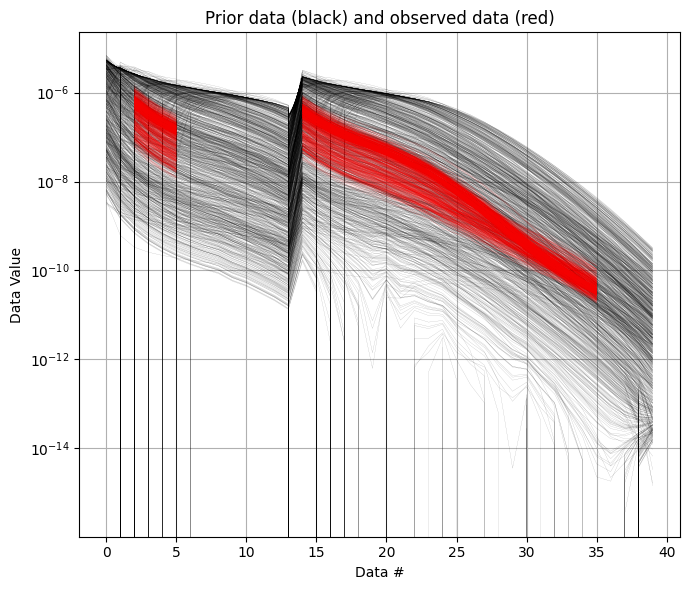

True

In [5]:
# into TWO data sets, LOW and HIGH moment.

ig.plot_data_prior(f_prior_data_h5, f_data_h5)

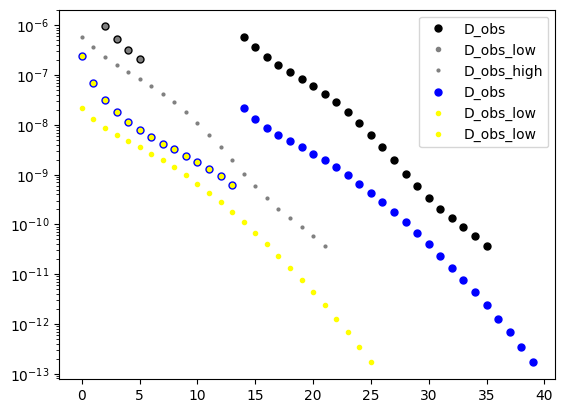

In [6]:
# Read D_obs from f_data_h5
with h5py.File(f_data_h5, 'r') as f:
    D_obs = f['D1/d_obs'][:]
    D_std = f['D1/d_std'][:]
# Alternatively, use the ig.load_data function    
#D_obs = ig.load_data(f_data_h5, id=1, showInfo=1)['d_obs'][0]
#D_std = ig.load_data(f_data_h5, id=1, showInfo=1)['d_std'][0]

with h5py.File(f_prior_data_h5, 'r') as f:
    D = f['/D1'][:]
# Alternatively, use the ig.load_prior_data function    
#D = ig.load_prior_data(f_prior_data_h5)[0][0]
    
# Now splot the into low and high moment data sets
# The low moment data set will be the first 14 columns, and the high moment data set will be the last columns.
nd = D_obs.shape[1]
n_low = 14
n_high = nd - n_low
# set i low to 0:n_low-1
i_low = range(n_low)
i_high = range(n_low, nd)

# Split prior data
D_low = D[:,i_low]
D_high = D[:,i_high]
# Split observed data
D_obs_low = D_obs[:,i_low]
D_std_low = D_std[:,i_low]*2
D_obs_high = D_obs[:,i_high]
D_std_high = D_std[:,i_high]*2


plt.semilogy(D_obs[0],'k.',markersize=10, label='D_obs')
plt.semilogy(D_obs_low[0],'.', color='gray', markersize=6, label='D_obs_low')
plt.semilogy(D_obs_high[0],'.', color='gray',markersize=4, label='D_obs_high')

plt.semilogy(D[0],'b.',markersize=10, label='D_obs')
plt.semilogy(D_low[0],'.', color='yellow', markersize=6, label='D_obs_low')
plt.semilogy(D_high[0],'.', color='yellow', markersize=6, label='D_obs_low')
plt.legend()

In [7]:
f_data_dual_h5 = 'DAUGAARD_AVG_dual.h5'

useOldMethod = False
if useOldMethod:
    ig.copy_hdf5_file(f_data_h5,f_data_dual_h5)
    # Delete D1
    with h5py.File(f_data_dual_h5, 'a') as f:
        # show groups in f['']
        if 'D1' in f.keys():
            del(f['D1'])
    # Update D1 and D2      
    with h5py.File(f_data_dual_h5, 'a') as f:
        # remove 'D1' 
        #del f['D1']
        f.create_dataset('D1/d_obs', data=D_obs_low)
        f.create_dataset('D1/d_std', data=D_std_low)
        f['D1'].attrs['noise_model'] = 'gaussian'
        f.create_dataset('D2/d_obs', data=D_obs_high)
        f.create_dataset('D2/d_std', data=D_std_high)
        f['D2'].attrs['noise_model'] = 'gaussian'
else:
    # Alternatively, use the ig.save_data_gaussian function
    ig.copy_hdf5_file(f_data_h5,f_data_dual_h5)
    ig.save_data_gaussian(D_obs_low, D_std = D_std_low, f_data_h5 = f_data_dual_h5, id=1, showInfo=0)
    ig.save_data_gaussian(D_obs_high, D_std = D_std_high, f_data_h5 = f_data_dual_h5, id=2, showInfo=0)



Data has 11693 stations and 14 channels
Removing group DAUGAARD_AVG_dual.h5:D1 
Adding group DAUGAARD_AVG_dual.h5:D1 
Data has 11693 stations and 26 channels
Adding group DAUGAARD_AVG_dual.h5:D2 


In [8]:
f_prior_data_dual_h5 = 'PRIOR_dual.h5'
ig.copy_hdf5_file(f_prior_data_h5,f_prior_data_dual_h5)
if useOldMethod:

    with h5py.File(f_prior_data_dual_h5, 'a') as f:
        # show groups in f['']
        if 'D1' in f.keys():
            del(f['D1'])
        f.create_dataset('D1', data=D_low)
        f.create_dataset('D2', data=D_high)
else:
    # Alternatively, use the ig.save_data_gaussian function 
    ig.save_prior_data(f_prior_data_dual_h5, D_low, id=1, force_delete=True)
    ig.save_prior_data(f_prior_data_dual_h5, D_high, id=2, force_delete=False)

Saving new prior data '/D1' to file: PRIOR_dual.h5 
Deleting prior data '/D1' from file: <HDF5 file "PRIOR_dual.h5" (mode r+)> 
New prior data '/D1' saved to file: PRIOR_dual.h5 
Saving new prior data '/D2' to file: PRIOR_dual.h5 
New prior data '/D2' saved to file: PRIOR_dual.h5 


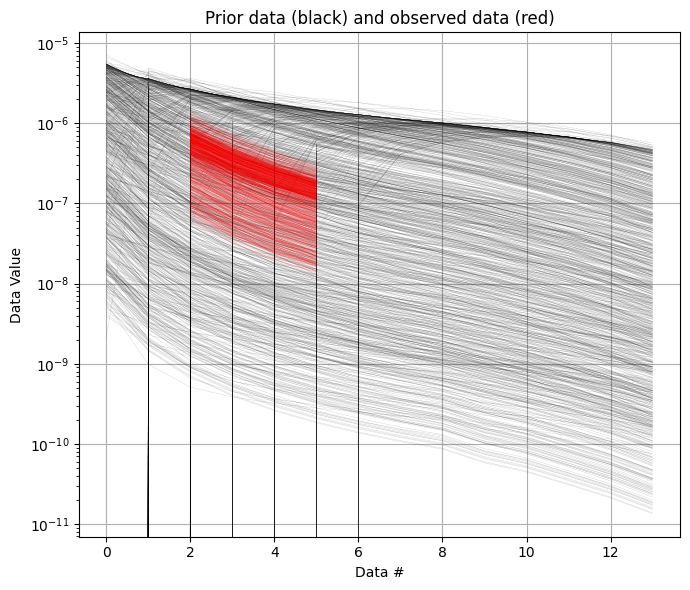

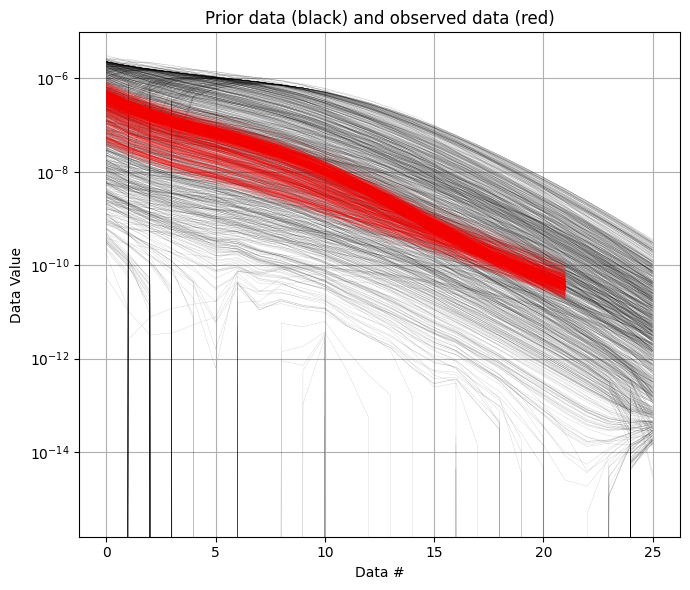

True

In [9]:
ig.plot_data_prior(f_prior_data_dual_h5, f_data_dual_h5, id=1)
ig.plot_data_prior(f_prior_data_dual_h5, f_data_dual_h5, id=2)

## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [10]:
N_use = 100000 #%N
N_cpu = 8
f_post_arr = []
updatePostStat=False
showInfo = 1

import time
t_inversion = []

for itype in [0,1,2,3]:
    t_start = time.time()
    if itype == 0:
        # LOW AND HIGH MOMENT AS ONE DATA SET - THE ORIGINAL METHOD
        f_post_h5 = ig.integrate_rejection(f_prior_data_h5, 
                                    f_data_h5, 
                                    f_post_h5='POST_type%d.h5' % itype,
                                    N_use = N_use, Ncpu=N_cpu,
                                    showInfo=showInfo, 
                                    updatePostStat=updatePostStat)
    elif itype == 1:
        # LOW MOMENT ONLY
        f_post_h5 = ig.integrate_rejection(f_prior_data_dual_h5, 
                                   f_data_dual_h5, 
                                   f_post_h5='POST_type%d.h5' % itype,
                                   N_use = N_use, Ncpu=N_cpu,
                                   showInfo=showInfo, 
                                   updatePostStat=updatePostStat,
                                   id_use = [1])
    elif itype == 2:
        # HIGH MOMENT ONLY
        f_post_h5 = ig.integrate_rejection(f_prior_data_dual_h5, 
                                   f_data_dual_h5, 
                                #    f_post_h5='POST_type%d.h5' % itype,
                                   N_use = N_use, Ncpu=N_cpu,
                                   showInfo=showInfo, 
                                   updatePostStat=updatePostStat,  
                                   id_use = [2])
    elif itype == 3:
        # JOINT INVERSION USING BOTH LOW AND HIGH MOMENT
        f_post_h5 = ig.integrate_rejection(f_prior_data_dual_h5, 
                                   f_data_dual_h5, 
                                   f_post_h5='POST_type%d.h5' % itype,
                                   N_use = N_use, Ncpu=N_cpu,
                                   showInfo=showInfo, 
                                   updatePostStat=updatePostStat,  
                                   id_use = [1,2])

    t_inversion.append(time.time() - t_start)
    f_post_arr.append(f_post_h5)



File POST_type0.h5 allready exists
Overwriting...
Loading data from DAUGAARD_AVG.h5. Using data types: [1]
  - D1: id_use=1,    gaussian, Using 11693/40 data
Loading prior data from PRIOR_CHI2_NF_3_log-uniform_N25000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5. Using prior data ids: [1]
  - /D1:  N,nd = 25000/40
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_CHI2_NF_3_log-uniform_N25000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5, f_data_h5=DAUGAARD_AVG.h5
f_post_h5=POST_type0.h5


Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   1%|▌                                                         | 14/1462 [00:00<00:11, 130.56it/s]

Rejection Sampling:   1%|▍                                                         | 12/1462 [00:00<00:12, 116.19it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   1%|▍                                                         | 11/1462 [00:00<00:13, 107.33it/s]

Rejection Sampling:   1%|▍                                                          | 10/1462 [00:00<00:14, 98.08it/s]

Rejection Sampling:   1%|▍                                                          | 10/1462 [00:00<00:15, 95.35it/s]

Rejection Sampling:   1%|▎                                                           | 9/1461 [00:00<00:16, 89.92it/s]

Rejection Sampling:   0%|▏                                                           | 6/1461 [00:00<00:25, 56.16it/s]

Rejection Sampling:   1%|▎                                                           | 8/1461 [00:00<00:18, 79.61it/s]

Rejection Sampling:   2%|▉                                                          | 22/1462 [00:00<00:15, 93.81it/s]

Rejection Sampling:   1%|▊                                                          | 20/1462 [00:00<00:15, 91.16it/s]

Rejection Sampling:   2%|▉                                                          | 24/1462 [00:00<00:14, 96.88it/s]

Rejection Sampling:   1%|▊                                                          | 20/1462 [00:00<00:16, 85.93it/s]

Rejection Sampling:   1%|▋                                                          | 18/1461 [00:00<00:17, 84.06it/s]

Rejection Sampling:   2%|█▏                                                         | 28/1462 [00:00<00:14, 97.15it/s]

Rejection Sampling:   1%|▌                                                          | 15/1461 [00:00<00:20, 71.29it/s]

Rejection Sampling:   1%|▋                                                          | 17/1461 [00:00<00:17, 80.43it/s]

Rejection Sampling:   2%|█▏                                                         | 30/1462 [00:00<00:16, 86.20it/s]

Rejection Sampling:   2%|█▎                                                         | 32/1462 [00:00<00:16, 87.77it/s]

Rejection Sampling:   2%|█▎                                                         | 34/1462 [00:00<00:15, 89.61it/s]

Rejection Sampling:   2%|█▏                                                         | 29/1462 [00:00<00:17, 84.29it/s]

Rejection Sampling:   2%|█                                                          | 27/1461 [00:00<00:18, 79.33it/s]

Rejection Sampling:   3%|█▌                                                         | 39/1462 [00:00<00:15, 91.03it/s]

Rejection Sampling:   2%|▉                                                          | 24/1461 [00:00<00:18, 76.30it/s]

Rejection Sampling:   2%|█                                                          | 26/1461 [00:00<00:17, 81.54it/s]

Rejection Sampling:   3%|█▌                                                         | 39/1462 [00:00<00:16, 84.89it/s]

Rejection Sampling:   3%|█▌                                                         | 38/1462 [00:00<00:17, 83.25it/s]

Rejection Sampling:   3%|█▋                                                         | 41/1462 [00:00<00:17, 82.39it/s]

Rejection Sampling:   2%|█▍                                                         | 36/1461 [00:00<00:17, 79.96it/s]

Rejection Sampling:   3%|█▊                                                         | 44/1462 [00:00<00:17, 80.25it/s]

Rejection Sampling:   2%|█▎                                                         | 32/1461 [00:00<00:18, 77.37it/s]

Rejection Sampling:   3%|█▉                                                         | 49/1462 [00:00<00:16, 86.92it/s]

Rejection Sampling:   2%|█▍                                                         | 35/1461 [00:00<00:17, 80.51it/s]

Rejection Sampling:   3%|█▉                                                         | 48/1462 [00:00<00:17, 82.80it/s]

Rejection Sampling:   3%|██                                                         | 50/1462 [00:00<00:17, 81.38it/s]

Rejection Sampling:   3%|█▉                                                         | 47/1462 [00:00<00:17, 81.88it/s]

Rejection Sampling:   3%|█▊                                                         | 45/1461 [00:00<00:17, 80.21it/s]

Rejection Sampling:   3%|█▌                                                         | 40/1461 [00:00<00:18, 77.04it/s]

Rejection Sampling:   4%|██▏                                                        | 53/1462 [00:00<00:17, 80.90it/s]

Rejection Sampling:   4%|██▎                                                        | 58/1462 [00:00<00:16, 85.35it/s]

Rejection Sampling:   3%|█▊                                                         | 44/1461 [00:00<00:17, 80.94it/s]

Rejection Sampling:   4%|██▎                                                        | 57/1462 [00:00<00:16, 82.83it/s]

Rejection Sampling:   4%|██▎                                                        | 56/1462 [00:00<00:17, 79.62it/s]

Rejection Sampling:   4%|██▏                                                        | 54/1461 [00:00<00:17, 81.19it/s]

Rejection Sampling:   3%|█▉                                                         | 49/1461 [00:00<00:17, 80.67it/s]

Rejection Sampling:   4%|██▍                                                        | 59/1462 [00:00<00:17, 78.16it/s]

Rejection Sampling:   4%|██▌                                                        | 62/1462 [00:00<00:17, 81.59it/s]

Rejection Sampling:   5%|██▋                                                        | 67/1462 [00:00<00:16, 84.98it/s]

Rejection Sampling:   4%|██▏                                                        | 53/1461 [00:00<00:17, 79.05it/s]

Rejection Sampling:   5%|██▋                                                        | 66/1462 [00:00<00:17, 80.16it/s]

Rejection Sampling:   4%|██▌                                                        | 65/1462 [00:00<00:17, 80.33it/s]

Rejection Sampling:   5%|██▋                                                        | 68/1462 [00:00<00:17, 80.48it/s]

Rejection Sampling:   4%|██▎                                                        | 58/1461 [00:00<00:17, 81.05it/s]

Rejection Sampling:   5%|██▊                                                        | 71/1462 [00:00<00:17, 81.68it/s]

Rejection Sampling:   4%|██▌                                                        | 63/1461 [00:00<00:17, 78.92it/s]

Rejection Sampling:   5%|███                                                        | 76/1462 [00:00<00:16, 84.07it/s]

Rejection Sampling:   4%|██▌                                                        | 62/1461 [00:00<00:17, 80.21it/s]

Rejection Sampling:   5%|███                                                        | 75/1462 [00:00<00:17, 80.90it/s]

Rejection Sampling:   5%|██▋                                                        | 67/1461 [00:00<00:17, 81.57it/s]

Rejection Sampling:   5%|███▏                                                       | 80/1462 [00:00<00:16, 81.45it/s]

Rejection Sampling:   5%|██▉                                                        | 74/1462 [00:00<00:17, 78.14it/s]

Rejection Sampling:   5%|███                                                        | 77/1462 [00:00<00:17, 78.28it/s]

Rejection Sampling:   5%|██▉                                                        | 72/1461 [00:00<00:17, 79.53it/s]

Rejection Sampling:   6%|███▍                                                       | 85/1462 [00:00<00:16, 83.00it/s]

Rejection Sampling:   5%|██▊                                                        | 71/1461 [00:00<00:17, 80.33it/s]

Rejection Sampling:   6%|███▍                                                       | 84/1462 [00:01<00:17, 80.77it/s]

Rejection Sampling:   5%|███                                                        | 76/1461 [00:00<00:17, 81.24it/s]

Rejection Sampling:   6%|███▌                                                       | 89/1462 [00:01<00:16, 81.19it/s]

Rejection Sampling:   6%|███▍                                                       | 86/1462 [00:01<00:17, 79.01it/s]

Rejection Sampling:   6%|███▎                                                       | 83/1462 [00:01<00:17, 78.90it/s]

Rejection Sampling:   5%|███▏                                                       | 80/1461 [00:01<00:17, 77.09it/s]

Rejection Sampling:   6%|███▊                                                       | 94/1462 [00:01<00:16, 82.31it/s]

Rejection Sampling:   5%|███▏                                                       | 80/1461 [00:00<00:17, 80.55it/s]

Rejection Sampling:   6%|███▊                                                       | 93/1462 [00:01<00:16, 81.05it/s]

Rejection Sampling:   6%|███▍                                                       | 85/1461 [00:01<00:16, 81.39it/s]

Rejection Sampling:   6%|███▊                                                       | 95/1462 [00:01<00:17, 80.12it/s]

Rejection Sampling:   7%|███▉                                                       | 98/1462 [00:01<00:16, 81.57it/s]

Rejection Sampling:   6%|███▋                                                       | 92/1462 [00:01<00:17, 79.95it/s]

Rejection Sampling:   6%|███▌                                                       | 88/1461 [00:01<00:18, 73.31it/s]

Rejection Sampling:   7%|████                                                      | 103/1462 [00:01<00:16, 82.01it/s]

Rejection Sampling:   6%|███▌                                                       | 89/1461 [00:01<00:17, 80.43it/s]

Rejection Sampling:   7%|████                                                      | 102/1462 [00:01<00:16, 80.58it/s]

Rejection Sampling:   6%|███▊                                                       | 94/1461 [00:01<00:16, 80.73it/s]

Rejection Sampling:   7%|████                                                      | 101/1462 [00:01<00:17, 79.63it/s]

Rejection Sampling:   7%|████▏                                                     | 107/1462 [00:01<00:16, 80.71it/s]

Rejection Sampling:   7%|████▏                                                     | 104/1462 [00:01<00:17, 79.61it/s]

Rejection Sampling:   7%|███▉                                                       | 96/1461 [00:01<00:18, 74.91it/s]

Rejection Sampling:   8%|████▍                                                     | 112/1462 [00:01<00:16, 81.39it/s]

Rejection Sampling:   7%|███▉                                                       | 98/1461 [00:01<00:16, 80.62it/s]

Rejection Sampling:   8%|████▍                                                     | 111/1462 [00:01<00:16, 80.92it/s]

Rejection Sampling:   7%|████                                                      | 103/1461 [00:01<00:16, 81.08it/s]

Rejection Sampling:   8%|████▌                                                     | 116/1462 [00:01<00:16, 81.02it/s]

Rejection Sampling:   8%|████▍                                                     | 113/1462 [00:01<00:16, 80.26it/s]

Rejection Sampling:   8%|████▎                                                     | 110/1462 [00:01<00:16, 80.25it/s]

Rejection Sampling:   8%|████▊                                                     | 121/1462 [00:01<00:16, 81.41it/s]

Rejection Sampling:   7%|████▏                                                     | 104/1461 [00:01<00:18, 71.87it/s]

Rejection Sampling:   7%|████▏                                                     | 107/1461 [00:01<00:16, 80.53it/s]

Rejection Sampling:   8%|████▊                                                     | 120/1462 [00:01<00:16, 80.58it/s]

Rejection Sampling:   8%|████▍                                                     | 112/1461 [00:01<00:16, 80.68it/s]

Rejection Sampling:   9%|████▉                                                     | 125/1462 [00:01<00:16, 80.65it/s]

Rejection Sampling:   8%|████▍                                                     | 112/1461 [00:01<00:18, 73.95it/s]

Rejection Sampling:   8%|████▋                                                     | 119/1462 [00:01<00:16, 80.09it/s]

Rejection Sampling:   8%|████▊                                                     | 122/1462 [00:01<00:16, 80.09it/s]

Rejection Sampling:   9%|█████▏                                                    | 130/1462 [00:01<00:16, 81.12it/s]

Rejection Sampling:   8%|████▌                                                     | 116/1461 [00:01<00:16, 80.93it/s]

Rejection Sampling:   9%|█████                                                     | 129/1462 [00:01<00:16, 80.88it/s]

Rejection Sampling:   8%|████▊                                                     | 121/1461 [00:01<00:16, 80.96it/s]

Rejection Sampling:   9%|█████▎                                                    | 134/1462 [00:01<00:16, 80.93it/s]

Rejection Sampling:   9%|█████▏                                                    | 131/1462 [00:01<00:16, 80.54it/s]

Rejection Sampling:   9%|█████                                                     | 128/1462 [00:01<00:16, 80.53it/s]

Rejection Sampling:   8%|████▊                                                     | 120/1461 [00:01<00:18, 73.48it/s]

Rejection Sampling:  10%|█████▌                                                    | 139/1462 [00:01<00:16, 81.13it/s]

Rejection Sampling:   9%|████▉                                                     | 125/1461 [00:01<00:16, 80.50it/s]

Rejection Sampling:   9%|█████▍                                                    | 138/1462 [00:01<00:16, 80.45it/s]

Rejection Sampling:   9%|█████                                                     | 128/1461 [00:01<00:17, 75.22it/s]

Rejection Sampling:   9%|█████▏                                                    | 130/1461 [00:01<00:16, 80.46it/s]

Rejection Sampling:  10%|█████▋                                                    | 143/1462 [00:01<00:16, 80.51it/s]

Rejection Sampling:  10%|█████▌                                                    | 140/1462 [00:01<00:16, 80.25it/s]

Rejection Sampling:   9%|█████▍                                                    | 137/1462 [00:01<00:16, 80.23it/s]

Rejection Sampling:  10%|█████▊                                                    | 148/1462 [00:01<00:16, 80.41it/s]

Rejection Sampling:   9%|█████▎                                                    | 134/1461 [00:01<00:16, 80.04it/s]

Rejection Sampling:   9%|█████▍                                                    | 136/1461 [00:01<00:17, 76.38it/s]

Rejection Sampling:  10%|█████▊                                                    | 147/1462 [00:01<00:16, 80.05it/s]

Rejection Sampling:  10%|█████▌                                                    | 139/1461 [00:01<00:16, 80.24it/s]

Rejection Sampling:  10%|██████                                                    | 152/1462 [00:01<00:16, 80.30it/s]

Rejection Sampling:  10%|█████▊                                                    | 146/1462 [00:01<00:16, 80.13it/s]

Rejection Sampling:  10%|█████▉                                                    | 149/1462 [00:01<00:16, 80.09it/s]

Rejection Sampling:  11%|██████▏                                                   | 157/1462 [00:01<00:16, 80.44it/s]

Rejection Sampling:  10%|█████▋                                                    | 143/1461 [00:01<00:16, 80.22it/s]

Rejection Sampling:  10%|█████▊                                                    | 145/1461 [00:01<00:16, 77.71it/s]

Rejection Sampling:  11%|██████▏                                                   | 156/1462 [00:01<00:16, 77.55it/s]

Rejection Sampling:  10%|█████▉                                                    | 148/1461 [00:01<00:16, 80.16it/s]

Rejection Sampling:  11%|██████▍                                                   | 161/1462 [00:01<00:16, 80.20it/s]

Rejection Sampling:  11%|██████▎                                                   | 158/1462 [00:01<00:16, 80.09it/s]

Rejection Sampling:  11%|██████▏                                                   | 155/1462 [00:01<00:16, 80.07it/s]

Rejection Sampling:  11%|██████▌                                                   | 166/1462 [00:01<00:16, 80.08it/s]

Rejection Sampling:  10%|██████                                                    | 152/1461 [00:01<00:16, 80.38it/s]

Rejection Sampling:  11%|██████                                                    | 154/1461 [00:01<00:16, 78.54it/s]

Rejection Sampling:  11%|██████▌                                                   | 165/1462 [00:02<00:16, 78.45it/s]

Rejection Sampling:  11%|██████▏                                                   | 157/1461 [00:01<00:16, 80.30it/s]

Rejection Sampling:  12%|██████▋                                                   | 170/1462 [00:02<00:16, 80.25it/s]

Rejection Sampling:  11%|██████▋                                                   | 167/1462 [00:02<00:16, 80.15it/s]

Rejection Sampling:  11%|██████▌                                                   | 164/1462 [00:02<00:16, 77.49it/s]

Rejection Sampling:  12%|██████▉                                                   | 175/1462 [00:02<00:16, 80.01it/s]

Rejection Sampling:  11%|██████▍                                                   | 161/1461 [00:02<00:16, 79.76it/s]

Rejection Sampling:  11%|██████▍                                                   | 162/1461 [00:02<00:16, 78.44it/s]

Rejection Sampling:  12%|██████▊                                                   | 173/1462 [00:02<00:16, 78.61it/s]

Rejection Sampling:  12%|███████                                                   | 179/1462 [00:02<00:15, 80.23it/s]

Rejection Sampling:  12%|██████▉                                                   | 176/1462 [00:02<00:16, 80.18it/s]

Rejection Sampling:  11%|██████▌                                                   | 166/1461 [00:02<00:16, 77.49it/s]

Rejection Sampling:  13%|███████▎                                                  | 184/1462 [00:02<00:15, 80.20it/s]

Rejection Sampling:  12%|██████▊                                                   | 173/1462 [00:02<00:16, 78.29it/s]

Rejection Sampling:  12%|██████▋                                                   | 170/1461 [00:02<00:16, 79.92it/s]

Rejection Sampling:  12%|███████▏                                                  | 181/1462 [00:02<00:16, 78.91it/s]

Rejection Sampling:  12%|██████▊                                                   | 171/1461 [00:02<00:16, 79.04it/s]

Rejection Sampling:  12%|██████▉                                                   | 174/1461 [00:02<00:16, 77.86it/s]

Rejection Sampling:  13%|███████▎                                                  | 185/1462 [00:02<00:16, 79.57it/s]

Rejection Sampling:  12%|███████▏                                                  | 181/1462 [00:02<00:16, 78.28it/s]

Rejection Sampling:  13%|███████▍                                                  | 188/1462 [00:02<00:16, 79.59it/s]

Rejection Sampling:  13%|███████▋                                                  | 193/1462 [00:02<00:15, 79.84it/s]

Rejection Sampling:  12%|███████                                                   | 179/1461 [00:02<00:16, 80.01it/s]

Rejection Sampling:  12%|███████▏                                                  | 180/1461 [00:02<00:16, 79.47it/s]

Rejection Sampling:  13%|███████▌                                                  | 190/1462 [00:02<00:16, 79.35it/s]

Rejection Sampling:  13%|███████▎                                                  | 183/1461 [00:02<00:16, 78.64it/s]

Rejection Sampling:  13%|███████▊                                                  | 197/1462 [00:02<00:15, 79.87it/s]

Rejection Sampling:  14%|███████▉                                                  | 201/1462 [00:02<00:15, 79.82it/s]

Rejection Sampling:  13%|███████▋                                                  | 194/1462 [00:02<00:15, 79.85it/s]

Rejection Sampling:  13%|███████▍                                                  | 189/1462 [00:02<00:16, 76.24it/s]

Rejection Sampling:  13%|███████▍                                                  | 188/1461 [00:02<00:15, 80.01it/s]

Rejection Sampling:  13%|███████▍                                                  | 188/1461 [00:02<00:15, 79.60it/s]

Rejection Sampling:  14%|███████▊                                                  | 198/1462 [00:02<00:15, 79.52it/s]

Rejection Sampling:  13%|███████▌                                                  | 191/1461 [00:02<00:16, 79.00it/s]

Rejection Sampling:  14%|████████                                                  | 202/1462 [00:02<00:15, 79.87it/s]

Rejection Sampling:  14%|████████▏                                                 | 206/1462 [00:02<00:15, 79.91it/s]

Rejection Sampling:  14%|████████▎                                                 | 210/1462 [00:02<00:15, 79.87it/s]

Rejection Sampling:  14%|███████▊                                                  | 198/1462 [00:02<00:16, 77.36it/s]

Rejection Sampling:  13%|███████▊                                                  | 196/1461 [00:02<00:15, 79.48it/s]

Rejection Sampling:  14%|████████▏                                                 | 206/1462 [00:02<00:15, 79.41it/s]

Rejection Sampling:  13%|███████▊                                                  | 197/1461 [00:02<00:15, 79.73it/s]

Rejection Sampling:  14%|███████▉                                                  | 199/1461 [00:02<00:15, 79.09it/s]

Rejection Sampling:  14%|████████▎                                                 | 210/1462 [00:02<00:15, 79.71it/s]

Rejection Sampling:  15%|████████▋                                                 | 218/1462 [00:02<00:15, 79.66it/s]

Rejection Sampling:  15%|████████▍                                                 | 214/1462 [00:02<00:15, 79.67it/s]

Rejection Sampling:  14%|████████▏                                                 | 206/1462 [00:02<00:16, 77.84it/s]

Rejection Sampling:  14%|████████                                                  | 204/1461 [00:02<00:15, 79.33it/s]

Rejection Sampling:  15%|████████▍                                                 | 214/1462 [00:02<00:15, 79.30it/s]

Rejection Sampling:  14%|████████▏                                                 | 205/1461 [00:02<00:15, 79.53it/s]

Rejection Sampling:  14%|████████▏                                                 | 207/1461 [00:02<00:15, 79.16it/s]

Rejection Sampling:  15%|████████▋                                                 | 218/1462 [00:02<00:15, 79.60it/s]

Rejection Sampling:  15%|████████▊                                                 | 222/1462 [00:02<00:15, 79.57it/s]

Rejection Sampling:  15%|████████▍                                                 | 214/1462 [00:02<00:15, 78.26it/s]

Rejection Sampling:  15%|████████▉                                                 | 226/1462 [00:02<00:15, 79.46it/s]

Rejection Sampling:  15%|████████▍                                                 | 212/1461 [00:02<00:15, 79.31it/s]

Rejection Sampling:  15%|████████▊                                                 | 222/1462 [00:02<00:15, 79.29it/s]

Rejection Sampling:  15%|████████▍                                                 | 213/1461 [00:02<00:15, 79.45it/s]

Rejection Sampling:  15%|████████▌                                                 | 215/1461 [00:02<00:15, 79.14it/s]

Rejection Sampling:  15%|████████▉                                                 | 226/1462 [00:02<00:15, 79.52it/s]

Rejection Sampling:  16%|█████████                                                 | 230/1462 [00:02<00:15, 79.52it/s]

Rejection Sampling:  16%|█████████▎                                                | 234/1462 [00:02<00:15, 79.52it/s]

Rejection Sampling:  15%|████████▊                                                 | 222/1462 [00:02<00:15, 78.61it/s]

Rejection Sampling:  15%|████████▋                                                 | 220/1461 [00:02<00:15, 79.32it/s]

Rejection Sampling:  16%|█████████                                                 | 230/1462 [00:02<00:15, 79.31it/s]

Rejection Sampling:  15%|████████▊                                                 | 221/1461 [00:02<00:15, 78.94it/s]

Rejection Sampling:  15%|████████▊                                                 | 223/1461 [00:02<00:15, 79.36it/s]

Rejection Sampling:  16%|█████████▎                                                | 235/1462 [00:02<00:15, 79.79it/s]

Rejection Sampling:  16%|█████████▍                                                | 239/1462 [00:02<00:15, 79.86it/s]

Rejection Sampling:  16%|█████████▏                                                | 231/1462 [00:02<00:15, 79.24it/s]

Rejection Sampling:  17%|█████████▋                                                | 243/1462 [00:02<00:15, 79.83it/s]

Rejection Sampling:  16%|█████████▏                                                | 230/1461 [00:02<00:15, 80.26it/s]

Rejection Sampling:  16%|█████████                                                 | 229/1461 [00:02<00:15, 79.84it/s]

Rejection Sampling:  16%|█████████▍                                                | 238/1462 [00:02<00:15, 76.96it/s]

Rejection Sampling:  16%|█████████▏                                                | 232/1461 [00:02<00:15, 79.93it/s]

Rejection Sampling:  17%|█████████▋                                                | 244/1462 [00:03<00:15, 80.15it/s]

Rejection Sampling:  17%|█████████▉                                                | 252/1462 [00:03<00:15, 80.20it/s]

Rejection Sampling:  16%|█████████▌                                                | 240/1462 [00:03<00:15, 79.68it/s]

Rejection Sampling:  17%|█████████▊                                                | 248/1462 [00:03<00:15, 80.08it/s]

Rejection Sampling:  16%|█████████▍                                                | 239/1461 [00:02<00:15, 80.66it/s]

Rejection Sampling:  17%|█████████▊                                                | 246/1462 [00:03<00:16, 75.73it/s]

Rejection Sampling:  16%|█████████▍                                                | 238/1461 [00:03<00:15, 80.53it/s]

Rejection Sampling:  16%|█████████▌                                                | 241/1461 [00:03<00:15, 80.49it/s]

Rejection Sampling:  17%|██████████                                                | 253/1462 [00:03<00:15, 80.57it/s]

Rejection Sampling:  18%|██████████▎                                               | 261/1462 [00:03<00:14, 80.59it/s]

Rejection Sampling:  17%|█████████▉                                                | 249/1462 [00:03<00:15, 80.29it/s]

Rejection Sampling:  18%|██████████▏                                               | 257/1462 [00:03<00:15, 77.82it/s]

Rejection Sampling:  17%|██████████                                                | 254/1462 [00:03<00:15, 76.91it/s]

Rejection Sampling:  17%|█████████▊                                                | 248/1461 [00:03<00:15, 80.37it/s]

Rejection Sampling:  17%|█████████▊                                                | 247/1461 [00:03<00:15, 80.30it/s]

Rejection Sampling:  17%|█████████▉                                                | 250/1461 [00:03<00:15, 80.13it/s]

Rejection Sampling:  18%|██████████▍                                               | 262/1462 [00:03<00:14, 80.17it/s]

Rejection Sampling:  18%|██████████▋                                               | 270/1462 [00:03<00:14, 80.14it/s]

Rejection Sampling:  18%|██████████▌                                               | 265/1462 [00:03<00:15, 78.25it/s]

Rejection Sampling:  18%|██████████▏                                               | 258/1462 [00:03<00:15, 79.92it/s]

Rejection Sampling:  18%|██████████▍                                               | 262/1462 [00:03<00:15, 77.60it/s]

Rejection Sampling:  18%|██████████▏                                               | 257/1461 [00:03<00:15, 80.02it/s]

Rejection Sampling:  18%|██████████▏                                               | 256/1461 [00:03<00:15, 79.98it/s]

Rejection Sampling:  18%|██████████▎                                               | 259/1461 [00:03<00:15, 79.85it/s]

Rejection Sampling:  19%|██████████▊                                               | 271/1462 [00:03<00:14, 79.87it/s]

Rejection Sampling:  19%|██████████▊                                               | 273/1462 [00:03<00:15, 78.51it/s]

Rejection Sampling:  18%|██████████▌                                               | 266/1462 [00:03<00:15, 79.72it/s]

Rejection Sampling:  19%|███████████                                               | 279/1462 [00:03<00:14, 79.90it/s]

Rejection Sampling:  18%|██████████▋                                               | 270/1462 [00:03<00:15, 78.06it/s]

Rejection Sampling:  18%|██████████▍                                               | 264/1461 [00:03<00:15, 79.80it/s]

Rejection Sampling:  18%|██████████▌                                               | 266/1461 [00:03<00:14, 79.81it/s]

Rejection Sampling:  18%|██████████▌                                               | 267/1461 [00:03<00:14, 79.83it/s]

Rejection Sampling:  19%|███████████                                               | 279/1462 [00:03<00:14, 79.81it/s]

Rejection Sampling:  19%|███████████▏                                              | 281/1462 [00:03<00:14, 78.86it/s]

Rejection Sampling:  19%|██████████▊                                               | 274/1462 [00:03<00:14, 79.73it/s]

Rejection Sampling:  20%|███████████▍                                              | 288/1462 [00:03<00:14, 80.71it/s]

Rejection Sampling:  19%|███████████                                               | 278/1462 [00:03<00:15, 78.50it/s]

Rejection Sampling:  19%|██████████▊                                               | 272/1461 [00:03<00:14, 79.73it/s]

Rejection Sampling:  19%|██████████▉                                               | 275/1461 [00:03<00:14, 79.95it/s]

Rejection Sampling:  19%|██████████▉                                               | 275/1461 [00:03<00:14, 79.69it/s]

Rejection Sampling:  20%|███████████▍                                              | 287/1462 [00:03<00:14, 79.75it/s]

Rejection Sampling:  20%|███████████▍                                              | 289/1462 [00:03<00:14, 79.08it/s]

Rejection Sampling:  19%|███████████▏                                              | 282/1462 [00:03<00:14, 79.69it/s]

Rejection Sampling:  20%|███████████▊                                              | 297/1462 [00:03<00:14, 82.57it/s]

Rejection Sampling:  20%|███████████▍                                              | 287/1462 [00:03<00:14, 79.04it/s]

Rejection Sampling:  19%|███████████▏                                              | 281/1461 [00:03<00:14, 79.95it/s]

Rejection Sampling:  19%|███████████▎                                              | 284/1461 [00:03<00:14, 81.42it/s]

Rejection Sampling:  19%|███████████▎                                              | 284/1461 [00:03<00:14, 79.93it/s]

Rejection Sampling:  20%|███████████▋                                              | 296/1462 [00:03<00:14, 79.90it/s]

Rejection Sampling:  20%|███████████▊                                              | 298/1462 [00:03<00:14, 79.44it/s]

Rejection Sampling:  20%|███████████▌                                              | 291/1462 [00:03<00:14, 79.83it/s]

Rejection Sampling:  21%|████████████▏                                             | 306/1462 [00:03<00:14, 82.50it/s]

Rejection Sampling:  20%|███████████▋                                              | 295/1462 [00:03<00:14, 79.28it/s]

Rejection Sampling:  20%|███████████▍                                              | 289/1461 [00:03<00:14, 79.79it/s]

Rejection Sampling:  20%|███████████▋                                              | 293/1461 [00:03<00:14, 81.97it/s]

Rejection Sampling:  20%|███████████▌                                              | 292/1461 [00:03<00:14, 79.66it/s]

Rejection Sampling:  21%|████████████▏                                             | 306/1462 [00:03<00:14, 79.31it/s]

Rejection Sampling:  21%|████████████                                              | 304/1462 [00:03<00:14, 79.64it/s]

Rejection Sampling:  20%|███████████▊                                              | 299/1462 [00:03<00:14, 79.58it/s]

Rejection Sampling:  22%|████████████▍                                             | 315/1462 [00:03<00:13, 83.37it/s]

Rejection Sampling:  21%|████████████                                              | 303/1462 [00:03<00:14, 79.32it/s]

Rejection Sampling:  20%|███████████▊                                              | 297/1461 [00:03<00:14, 79.68it/s]

Rejection Sampling:  21%|███████████▉                                              | 300/1461 [00:03<00:14, 79.64it/s]

Rejection Sampling:  21%|███████████▉                                              | 302/1461 [00:03<00:14, 81.19it/s]

Rejection Sampling:  21%|████████████▍                                             | 314/1462 [00:03<00:14, 79.46it/s]

Rejection Sampling:  21%|████████████▍                                             | 312/1462 [00:03<00:14, 79.69it/s]

Rejection Sampling:  21%|████████████▏                                             | 307/1462 [00:03<00:14, 79.68it/s]

Rejection Sampling:  21%|████████████▍                                             | 312/1462 [00:03<00:14, 81.32it/s]

Rejection Sampling:  22%|████████████▊                                             | 324/1462 [00:03<00:13, 83.23it/s]

Rejection Sampling:  21%|████████████▏                                             | 306/1461 [00:03<00:14, 81.47it/s]

Rejection Sampling:  21%|████████████▎                                             | 309/1461 [00:03<00:14, 81.26it/s]

Rejection Sampling:  21%|████████████▎                                             | 311/1461 [00:03<00:14, 79.56it/s]

Rejection Sampling:  22%|████████████▊                                             | 322/1462 [00:03<00:14, 78.19it/s]

Rejection Sampling:  22%|████████████▍                                             | 315/1462 [00:03<00:14, 78.35it/s]

Rejection Sampling:  22%|████████████▋                                             | 320/1462 [00:03<00:14, 78.34it/s]

Rejection Sampling:  23%|█████████████▏                                            | 333/1462 [00:04<00:13, 83.23it/s]

Rejection Sampling:  22%|████████████▋                                             | 321/1462 [00:04<00:14, 78.70it/s]

Rejection Sampling:  22%|████████████▌                                             | 315/1461 [00:03<00:14, 81.44it/s]

Rejection Sampling:  22%|████████████▌                                             | 318/1461 [00:03<00:14, 81.47it/s]

Rejection Sampling:  22%|████████████▊                                             | 324/1462 [00:04<00:14, 79.77it/s]

Rejection Sampling:  22%|████████████▋                                             | 320/1461 [00:03<00:14, 80.53it/s]

Rejection Sampling:  23%|█████████████▏                                            | 331/1462 [00:04<00:14, 79.64it/s]

Rejection Sampling:  23%|█████████████                                             | 329/1462 [00:04<00:14, 79.74it/s]

Rejection Sampling:  23%|█████████████▌                                            | 342/1462 [00:04<00:13, 82.75it/s]

Rejection Sampling:  23%|█████████████                                             | 329/1462 [00:04<00:14, 79.03it/s]

Rejection Sampling:  22%|████████████▊                                             | 324/1461 [00:04<00:14, 81.19it/s]

Rejection Sampling:  22%|████████████▉                                             | 327/1461 [00:04<00:13, 81.30it/s]

Rejection Sampling:  23%|█████████████▍                                            | 339/1462 [00:04<00:14, 79.70it/s]

Rejection Sampling:  23%|█████████████▎                                            | 337/1462 [00:04<00:14, 79.79it/s]

Rejection Sampling:  23%|█████████████▏                                            | 332/1462 [00:04<00:14, 79.78it/s]

Rejection Sampling:  23%|█████████████                                             | 329/1461 [00:04<00:14, 80.47it/s]

Rejection Sampling:  24%|█████████████▉                                            | 351/1462 [00:04<00:13, 82.00it/s]

Rejection Sampling:  23%|█████████████▍                                            | 338/1462 [00:04<00:14, 79.54it/s]

Rejection Sampling:  23%|█████████████▏                                            | 333/1461 [00:04<00:13, 81.04it/s]

Rejection Sampling:  23%|█████████████▎                                            | 336/1461 [00:04<00:13, 81.03it/s]

Rejection Sampling:  24%|█████████████▊                                            | 347/1462 [00:04<00:14, 77.18it/s]

Rejection Sampling:  24%|█████████████▋                                            | 346/1462 [00:04<00:13, 80.04it/s]

Rejection Sampling:  23%|█████████████▌                                            | 341/1462 [00:04<00:14, 80.04it/s]

Rejection Sampling:  23%|█████████████▍                                            | 338/1461 [00:04<00:13, 80.36it/s]

Rejection Sampling:  24%|█████████████▋                                            | 346/1462 [00:04<00:14, 79.45it/s]

Rejection Sampling:  25%|██████████████▎                                           | 360/1462 [00:04<00:13, 81.16it/s]

Rejection Sampling:  23%|█████████████▌                                            | 342/1461 [00:04<00:13, 80.49it/s]

Rejection Sampling:  24%|█████████████▋                                            | 345/1461 [00:04<00:13, 80.48it/s]

Rejection Sampling:  24%|██████████████                                            | 355/1462 [00:04<00:14, 77.78it/s]

Rejection Sampling:  24%|█████████████▉                                            | 350/1462 [00:04<00:13, 79.80it/s]

Rejection Sampling:  24%|██████████████                                            | 355/1462 [00:04<00:13, 79.79it/s]

Rejection Sampling:  24%|█████████████▊                                            | 347/1461 [00:04<00:13, 80.08it/s]

Rejection Sampling:  24%|██████████████                                            | 354/1462 [00:04<00:13, 79.57it/s]

Rejection Sampling:  25%|██████████████▋                                           | 369/1462 [00:04<00:13, 80.88it/s]

Rejection Sampling:  24%|█████████████▉                                            | 351/1461 [00:04<00:13, 80.46it/s]

Rejection Sampling:  24%|██████████████                                            | 354/1461 [00:04<00:13, 80.46it/s]

Rejection Sampling:  25%|██████████████▍                                           | 364/1462 [00:04<00:13, 78.61it/s]

Rejection Sampling:  25%|██████████████▏                                           | 359/1462 [00:04<00:13, 80.07it/s]

Rejection Sampling:  25%|██████████████▍                                           | 363/1462 [00:04<00:14, 77.31it/s]

Rejection Sampling:  24%|██████████████▏                                           | 356/1461 [00:04<00:13, 80.31it/s]

Rejection Sampling:  25%|██████████████▍                                           | 363/1462 [00:04<00:13, 79.99it/s]

Rejection Sampling:  26%|██████████████▉                                           | 378/1462 [00:04<00:14, 77.12it/s]

Rejection Sampling:  25%|██████████████▎                                           | 360/1461 [00:04<00:13, 80.76it/s]

Rejection Sampling:  25%|██████████████▍                                           | 363/1461 [00:04<00:13, 80.88it/s]

Rejection Sampling:  26%|██████████████▊                                           | 373/1462 [00:04<00:13, 79.60it/s]

Rejection Sampling:  25%|██████████████▌                                           | 368/1462 [00:04<00:13, 80.57it/s]

Rejection Sampling:  25%|██████████████▊                                           | 372/1462 [00:04<00:13, 78.66it/s]

Rejection Sampling:  25%|██████████████▍                                           | 365/1461 [00:04<00:13, 80.65it/s]

Rejection Sampling:  25%|██████████████▊                                           | 372/1462 [00:04<00:13, 80.24it/s]

Rejection Sampling:  26%|███████████████▎                                          | 386/1462 [00:04<00:14, 76.50it/s]

Rejection Sampling:  25%|██████████████▋                                           | 369/1461 [00:04<00:13, 80.46it/s]

Rejection Sampling:  26%|███████████████                                           | 381/1462 [00:04<00:13, 79.64it/s]

Rejection Sampling:  25%|██████████████▊                                           | 372/1461 [00:04<00:13, 80.64it/s]

Rejection Sampling:  26%|███████████████                                           | 380/1462 [00:04<00:13, 79.00it/s]

Rejection Sampling:  26%|██████████████▉                                           | 377/1462 [00:04<00:13, 80.65it/s]

Rejection Sampling:  26%|██████████████▊                                           | 374/1461 [00:04<00:13, 81.18it/s]

Rejection Sampling:  26%|███████████████                                           | 381/1462 [00:04<00:13, 81.38it/s]

Rejection Sampling:  26%|███████████████                                           | 378/1461 [00:04<00:13, 81.83it/s]

Rejection Sampling:  27%|███████████████▋                                          | 394/1462 [00:04<00:14, 71.40it/s]

Rejection Sampling:  27%|███████████████▍                                          | 390/1462 [00:04<00:13, 81.09it/s]

Rejection Sampling:  26%|███████████████▏                                          | 381/1461 [00:04<00:13, 81.66it/s]

Rejection Sampling:  27%|███████████████▍                                          | 388/1462 [00:04<00:13, 77.77it/s]

Rejection Sampling:  26%|███████████████▎                                          | 386/1462 [00:04<00:13, 79.12it/s]

Rejection Sampling:  26%|███████████████▏                                          | 383/1461 [00:04<00:13, 81.57it/s]

Rejection Sampling:  27%|███████████████▍                                          | 390/1462 [00:04<00:13, 81.37it/s]

Rejection Sampling:  26%|███████████████▎                                          | 387/1461 [00:04<00:13, 81.40it/s]

Rejection Sampling:  28%|███████████████▉                                          | 403/1462 [00:04<00:14, 74.04it/s]

Rejection Sampling:  27%|███████████████▊                                          | 399/1462 [00:04<00:13, 80.93it/s]

Rejection Sampling:  27%|███████████████▍                                          | 390/1461 [00:04<00:13, 81.57it/s]

Rejection Sampling:  27%|███████████████▋                                          | 397/1462 [00:04<00:13, 78.91it/s]

Rejection Sampling:  27%|███████████████▋                                          | 395/1462 [00:04<00:13, 80.12it/s]

Rejection Sampling:  27%|███████████████▌                                          | 392/1461 [00:04<00:13, 82.00it/s]

Rejection Sampling:  27%|███████████████▊                                          | 399/1462 [00:04<00:12, 81.94it/s]

Rejection Sampling:  27%|███████████████▋                                          | 396/1461 [00:04<00:12, 82.22it/s]

Rejection Sampling:  28%|████████████████▎                                         | 411/1462 [00:05<00:14, 74.45it/s]

Rejection Sampling:  28%|████████████████▏                                         | 408/1462 [00:05<00:12, 82.12it/s]

Rejection Sampling:  28%|████████████████                                          | 406/1462 [00:05<00:13, 80.62it/s]

Rejection Sampling:  27%|███████████████▉                                          | 401/1461 [00:04<00:12, 82.61it/s]

Rejection Sampling:  28%|████████████████▏                                         | 408/1462 [00:05<00:12, 82.51it/s]

Rejection Sampling:  28%|████████████████                                          | 404/1462 [00:05<00:13, 78.60it/s]

Rejection Sampling:  27%|███████████████▊                                          | 399/1461 [00:05<00:14, 71.05it/s]

Rejection Sampling:  28%|████████████████                                          | 405/1461 [00:05<00:12, 82.60it/s]

Rejection Sampling:  29%|████████████████▋                                         | 420/1462 [00:05<00:13, 76.91it/s]

Rejection Sampling:  29%|████████████████▌                                         | 417/1462 [00:05<00:12, 82.34it/s]

Rejection Sampling:  28%|████████████████▍                                         | 415/1462 [00:05<00:12, 81.07it/s]

Rejection Sampling:  28%|████████████████▎                                         | 410/1461 [00:05<00:12, 82.06it/s]

Rejection Sampling:  28%|████████████████▍                                         | 413/1462 [00:05<00:13, 79.26it/s]

Rejection Sampling:  29%|████████████████▌                                         | 417/1462 [00:05<00:12, 81.95it/s]

Rejection Sampling:  28%|████████████████▏                                         | 407/1461 [00:05<00:14, 72.57it/s]

Rejection Sampling:  28%|████████████████▍                                         | 414/1461 [00:05<00:12, 81.83it/s]

Rejection Sampling:  29%|█████████████████                                         | 429/1462 [00:05<00:13, 77.88it/s]

Rejection Sampling:  29%|████████████████▉                                         | 426/1462 [00:05<00:12, 81.67it/s]

Rejection Sampling:  29%|████████████████▊                                         | 424/1462 [00:05<00:12, 81.21it/s]

Rejection Sampling:  29%|████████████████▋                                         | 419/1461 [00:05<00:12, 82.62it/s]

Rejection Sampling:  29%|████████████████▋                                         | 422/1462 [00:05<00:12, 80.77it/s]

Rejection Sampling:  29%|████████████████▉                                         | 426/1462 [00:05<00:12, 82.74it/s]

Rejection Sampling:  28%|████████████████▍                                         | 415/1461 [00:05<00:14, 73.37it/s]

Rejection Sampling:  29%|████████████████▊                                         | 423/1461 [00:05<00:12, 82.84it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 435/1462 [00:05<00:12, 79.93it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 433/1462 [00:05<00:12, 81.97it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 437/1462 [00:05<00:13, 74.69it/s]

Rejection Sampling:  29%|████████████████▉                                         | 428/1461 [00:05<00:12, 82.07it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 435/1462 [00:05<00:12, 81.95it/s]

Rejection Sampling:  29%|█████████████████                                         | 431/1462 [00:05<00:12, 80.59it/s]

Rejection Sampling:  29%|████████████████▊                                         | 424/1461 [00:05<00:13, 76.15it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 432/1461 [00:05<00:12, 82.70it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 442/1462 [00:05<00:12, 82.54it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 444/1462 [00:05<00:12, 79.79it/s]

Rejection Sampling:  30%|█████████████████▋                                        | 445/1462 [00:05<00:13, 73.49it/s]

Rejection Sampling:  30%|█████████████████▎                                        | 437/1461 [00:05<00:12, 83.25it/s]

Rejection Sampling:  30%|█████████████████▍                                        | 440/1462 [00:05<00:12, 82.39it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 444/1462 [00:05<00:12, 83.37it/s]

Rejection Sampling:  30%|█████████████████▏                                        | 432/1461 [00:05<00:13, 76.49it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 441/1461 [00:05<00:12, 83.62it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 451/1462 [00:05<00:12, 82.99it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 453/1462 [00:05<00:13, 75.02it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 452/1462 [00:05<00:13, 76.87it/s]

Rejection Sampling:  31%|█████████████████▋                                        | 446/1461 [00:05<00:12, 82.86it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 449/1462 [00:05<00:12, 82.20it/s]

Rejection Sampling:  31%|█████████████████▉                                        | 453/1462 [00:05<00:12, 82.89it/s]

Rejection Sampling:  30%|█████████████████▌                                        | 441/1461 [00:05<00:13, 77.99it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 450/1461 [00:05<00:12, 83.32it/s]

Rejection Sampling:  32%|██████████████████▎                                       | 462/1462 [00:05<00:12, 77.54it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 460/1462 [00:05<00:12, 83.03it/s]

Rejection Sampling:  32%|██████████████████▎                                       | 461/1462 [00:05<00:12, 78.67it/s]

Rejection Sampling:  31%|██████████████████                                        | 455/1461 [00:05<00:12, 82.96it/s]

Rejection Sampling:  32%|██████████████████▎                                       | 462/1462 [00:05<00:12, 82.99it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 458/1462 [00:05<00:12, 79.87it/s]

Rejection Sampling:  31%|█████████████████▊                                        | 449/1461 [00:05<00:13, 76.82it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 459/1461 [00:05<00:12, 82.95it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 471/1462 [00:05<00:12, 78.75it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 469/1462 [00:05<00:12, 82.69it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 469/1462 [00:05<00:12, 77.10it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 464/1461 [00:05<00:12, 82.85it/s]

Rejection Sampling:  32%|██████████████████▋                                       | 471/1462 [00:05<00:11, 82.81it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 467/1462 [00:05<00:12, 80.58it/s]

Rejection Sampling:  31%|██████████████████▏                                       | 457/1461 [00:05<00:13, 75.73it/s]

Rejection Sampling:  32%|██████████████████▌                                       | 468/1461 [00:05<00:12, 82.38it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 478/1462 [00:05<00:11, 82.18it/s]

Rejection Sampling:  33%|███████████████████                                       | 479/1462 [00:05<00:12, 76.71it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 478/1462 [00:05<00:12, 77.07it/s]

Rejection Sampling:  32%|██████████████████▊                                       | 473/1461 [00:05<00:11, 82.53it/s]

Rejection Sampling:  33%|███████████████████                                       | 480/1462 [00:05<00:11, 82.63it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 476/1462 [00:05<00:12, 81.06it/s]

Rejection Sampling:  32%|██████████████████▍                                       | 466/1461 [00:05<00:12, 77.66it/s]

Rejection Sampling:  33%|██████████████████▉                                       | 477/1461 [00:05<00:11, 82.59it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 487/1462 [00:06<00:11, 82.47it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 486/1462 [00:06<00:12, 77.21it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 487/1462 [00:06<00:13, 73.17it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 482/1461 [00:05<00:11, 82.00it/s]

Rejection Sampling:  33%|███████████████████▍                                      | 489/1462 [00:06<00:11, 81.95it/s]

Rejection Sampling:  33%|██████████████████▊                                       | 475/1461 [00:06<00:12, 78.61it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 485/1462 [00:06<00:12, 80.91it/s]

Rejection Sampling:  33%|███████████████████▎                                      | 486/1461 [00:06<00:11, 82.18it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 496/1462 [00:06<00:11, 82.08it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 496/1462 [00:06<00:12, 75.74it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 495/1462 [00:06<00:12, 78.46it/s]

Rejection Sampling:  34%|███████████████████▍                                      | 491/1461 [00:06<00:11, 82.18it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 498/1462 [00:06<00:11, 82.42it/s]

Rejection Sampling:  33%|███████████████████▏                                      | 483/1461 [00:06<00:12, 77.42it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 494/1462 [00:06<00:11, 81.72it/s]

Rejection Sampling:  34%|███████████████████▋                                      | 495/1461 [00:06<00:11, 82.45it/s]

Rejection Sampling:  35%|████████████████████                                      | 505/1462 [00:06<00:11, 82.66it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 503/1462 [00:06<00:12, 77.38it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 500/1461 [00:06<00:11, 82.46it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 504/1462 [00:06<00:13, 70.63it/s]

Rejection Sampling:  35%|████████████████████                                      | 507/1462 [00:06<00:11, 82.24it/s]

Rejection Sampling:  34%|███████████████████▌                                      | 492/1461 [00:06<00:12, 78.56it/s]

Rejection Sampling:  34%|███████████████████▉                                      | 503/1462 [00:06<00:11, 80.57it/s]

Rejection Sampling:  34%|████████████████████                                      | 504/1461 [00:06<00:11, 82.02it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 514/1462 [00:06<00:11, 81.89it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 512/1462 [00:06<00:12, 78.20it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 509/1461 [00:06<00:11, 81.75it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 513/1462 [00:06<00:12, 73.37it/s]

Rejection Sampling:  35%|████████████████████▍                                     | 516/1462 [00:06<00:11, 81.59it/s]

Rejection Sampling:  34%|███████████████████▊                                      | 500/1461 [00:06<00:12, 78.90it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 512/1462 [00:06<00:11, 80.48it/s]

Rejection Sampling:  35%|████████████████████▎                                     | 513/1461 [00:06<00:11, 81.60it/s]

Rejection Sampling:  36%|████████████████████▋                                     | 523/1462 [00:06<00:11, 81.56it/s]

Rejection Sampling:  36%|████████████████████▋                                     | 521/1462 [00:06<00:11, 79.10it/s]

Rejection Sampling:  35%|████████████████████▌                                     | 518/1461 [00:06<00:11, 81.65it/s]

Rejection Sampling:  36%|████████████████████▋                                     | 522/1462 [00:06<00:12, 75.83it/s]

Rejection Sampling:  35%|████████████████████▏                                     | 509/1461 [00:06<00:11, 79.85it/s]

Rejection Sampling:  36%|████████████████████▊                                     | 525/1462 [00:06<00:11, 81.68it/s]

Rejection Sampling:  36%|████████████████████▋                                     | 521/1462 [00:06<00:12, 76.69it/s]

Rejection Sampling:  36%|████████████████████▋                                     | 522/1461 [00:06<00:11, 81.40it/s]

Rejection Sampling:  36%|█████████████████████                                     | 532/1462 [00:06<00:11, 81.35it/s]

Rejection Sampling:  36%|█████████████████████                                     | 530/1462 [00:06<00:11, 79.53it/s]

Rejection Sampling:  36%|█████████████████████                                     | 530/1462 [00:06<00:12, 76.90it/s]

Rejection Sampling:  35%|████████████████████▌                                     | 517/1461 [00:06<00:11, 79.83it/s]

Rejection Sampling:  36%|████████████████████▉                                     | 527/1461 [00:06<00:11, 81.20it/s]

Rejection Sampling:  37%|█████████████████████▏                                    | 534/1462 [00:06<00:11, 81.40it/s]

Rejection Sampling:  36%|█████████████████████                                     | 530/1462 [00:06<00:11, 78.85it/s]

Rejection Sampling:  36%|█████████████████████                                     | 531/1461 [00:06<00:11, 82.27it/s]

Rejection Sampling:  37%|█████████████████████▍                                    | 541/1462 [00:06<00:11, 82.20it/s]

Rejection Sampling:  37%|█████████████████████▎                                    | 538/1462 [00:06<00:11, 78.21it/s]

Rejection Sampling:  37%|█████████████████████▍                                    | 539/1462 [00:06<00:11, 79.11it/s]

Rejection Sampling:  37%|█████████████████████▎                                    | 536/1461 [00:06<00:11, 82.12it/s]

Rejection Sampling:  36%|████████████████████▊                                     | 525/1461 [00:06<00:12, 75.69it/s]

Rejection Sampling:  37%|█████████████████████▌                                    | 543/1462 [00:06<00:11, 81.97it/s]

Rejection Sampling:  37%|█████████████████████▍                                    | 539/1462 [00:06<00:11, 79.45it/s]

Rejection Sampling:  37%|█████████████████████▍                                    | 540/1461 [00:06<00:11, 81.96it/s]

Rejection Sampling:  38%|█████████████████████▊                                    | 550/1462 [00:06<00:11, 81.88it/s]

Rejection Sampling:  37%|█████████████████████▋                                    | 547/1462 [00:06<00:11, 79.11it/s]

Rejection Sampling:  37%|█████████████████████▋                                    | 548/1462 [00:06<00:11, 79.72it/s]

Rejection Sampling:  37%|█████████████████████▋                                    | 545/1461 [00:06<00:11, 81.85it/s]

Rejection Sampling:  36%|█████████████████████▏                                    | 533/1461 [00:06<00:12, 74.55it/s]

Rejection Sampling:  38%|█████████████████████▉                                    | 552/1462 [00:06<00:11, 81.68it/s]

Rejection Sampling:  37%|█████████████████████▋                                    | 547/1462 [00:06<00:11, 79.46it/s]

Rejection Sampling:  38%|█████████████████████▊                                    | 549/1461 [00:06<00:11, 81.01it/s]

Rejection Sampling:  38%|██████████████████████                                    | 555/1462 [00:06<00:11, 79.05it/s]

Rejection Sampling:  38%|██████████████████████▏                                   | 559/1462 [00:06<00:11, 81.02it/s]

Rejection Sampling:  38%|██████████████████████                                    | 556/1462 [00:06<00:11, 79.46it/s]

Rejection Sampling:  38%|█████████████████████▉                                    | 554/1461 [00:06<00:11, 80.91it/s]

Rejection Sampling:  37%|█████████████████████▍                                    | 541/1461 [00:06<00:12, 75.77it/s]

Rejection Sampling:  38%|██████████████████████▎                                   | 561/1462 [00:06<00:11, 80.96it/s]

Rejection Sampling:  38%|██████████████████████                                    | 555/1462 [00:06<00:11, 79.55it/s]

Rejection Sampling:  38%|██████████████████████▏                                   | 558/1461 [00:06<00:11, 80.60it/s]

Rejection Sampling:  39%|██████████████████████▎                                   | 563/1462 [00:07<00:11, 79.22it/s]

Rejection Sampling:  39%|██████████████████████▌                                   | 568/1462 [00:07<00:11, 80.54it/s]

Rejection Sampling:  39%|██████████████████████▎                                   | 564/1462 [00:07<00:11, 79.48it/s]

Rejection Sampling:  38%|█████████████████████▊                                    | 549/1461 [00:06<00:11, 76.86it/s]

Rejection Sampling:  39%|██████████████████████▎                                   | 563/1461 [00:06<00:11, 80.46it/s]

Rejection Sampling:  39%|██████████████████████▎                                   | 563/1462 [00:07<00:11, 79.22it/s]

Rejection Sampling:  39%|██████████████████████▌                                   | 570/1462 [00:07<00:11, 80.31it/s]

Rejection Sampling:  39%|██████████████████████▌                                   | 567/1461 [00:07<00:11, 78.12it/s]

Rejection Sampling:  39%|██████████████████████▋                                   | 572/1462 [00:07<00:11, 79.81it/s]

Rejection Sampling:  39%|██████████████████████▋                                   | 573/1462 [00:07<00:11, 80.10it/s]

Rejection Sampling:  39%|██████████████████████▉                                   | 577/1462 [00:07<00:10, 80.81it/s]

Rejection Sampling:  38%|██████████████████████▏                                   | 558/1461 [00:07<00:11, 78.23it/s]

Rejection Sampling:  39%|██████████████████████▋                                   | 572/1461 [00:07<00:11, 80.64it/s]

Rejection Sampling:  40%|██████████████████████▉                                   | 579/1462 [00:07<00:10, 80.59it/s]

Rejection Sampling:  39%|██████████████████████▋                                   | 571/1462 [00:07<00:11, 77.03it/s]

Rejection Sampling:  40%|███████████████████████                                   | 580/1462 [00:07<00:11, 79.51it/s]

Rejection Sampling:  39%|██████████████████████▊                                   | 575/1461 [00:07<00:11, 78.29it/s]

Rejection Sampling:  39%|██████████████████████▍                                   | 566/1461 [00:07<00:11, 78.43it/s]

Rejection Sampling:  40%|███████████████████████▏                                  | 586/1462 [00:07<00:10, 80.14it/s]

Rejection Sampling:  40%|███████████████████████                                   | 582/1462 [00:07<00:11, 79.62it/s]

Rejection Sampling:  40%|███████████████████████                                   | 581/1461 [00:07<00:10, 80.60it/s]

Rejection Sampling:  40%|███████████████████████                                   | 580/1462 [00:07<00:11, 78.17it/s]

Rejection Sampling:  40%|███████████████████████▎                                  | 588/1462 [00:07<00:10, 80.59it/s]

Rejection Sampling:  40%|███████████████████████▎                                  | 589/1462 [00:07<00:10, 81.11it/s]

Rejection Sampling:  40%|███████████████████████▏                                  | 584/1461 [00:07<00:10, 80.17it/s]

Rejection Sampling:  39%|██████████████████████▊                                   | 575/1461 [00:07<00:11, 80.26it/s]

Rejection Sampling:  41%|███████████████████████▌                                  | 595/1462 [00:07<00:10, 81.40it/s]

Rejection Sampling:  40%|███████████████████████▍                                  | 590/1462 [00:07<00:11, 75.77it/s]

Rejection Sampling:  40%|███████████████████████▍                                  | 590/1461 [00:07<00:10, 81.90it/s]

Rejection Sampling:  40%|███████████████████████▎                                  | 588/1462 [00:07<00:11, 77.54it/s]

Rejection Sampling:  41%|███████████████████████▋                                  | 597/1462 [00:07<00:10, 82.01it/s]

Rejection Sampling:  41%|███████████████████████▋                                  | 598/1462 [00:07<00:10, 82.25it/s]

Rejection Sampling:  41%|███████████████████████▌                                  | 593/1461 [00:07<00:10, 81.55it/s]

Rejection Sampling:  41%|███████████████████████▉                                  | 604/1462 [00:07<00:10, 82.98it/s]

Rejection Sampling:  41%|███████████████████████▋                                  | 598/1462 [00:07<00:11, 76.31it/s]

Rejection Sampling:  41%|███████████████████████▊                                  | 600/1461 [00:07<00:10, 85.09it/s]

Rejection Sampling:  41%|███████████████████████▋                                  | 597/1462 [00:07<00:10, 80.08it/s]

Rejection Sampling:  41%|████████████████████████                                  | 606/1462 [00:07<00:10, 83.25it/s]

Rejection Sampling:  40%|███████████████████████▏                                  | 584/1461 [00:07<00:11, 74.01it/s]

Rejection Sampling:  42%|████████████████████████                                  | 607/1462 [00:07<00:10, 83.45it/s]

Rejection Sampling:  42%|████████████████████████                                  | 607/1462 [00:07<00:10, 78.88it/s]

Rejection Sampling:  42%|████████████████████████▎                                 | 613/1462 [00:07<00:10, 80.96it/s]

Rejection Sampling:  42%|████████████████████████▏                                 | 609/1461 [00:07<00:09, 86.28it/s]

Rejection Sampling:  41%|███████████████████████▉                                  | 602/1461 [00:07<00:11, 71.92it/s]

Rejection Sampling:  41%|███████████████████████▌                                  | 593/1461 [00:07<00:11, 78.00it/s]

Rejection Sampling:  41%|████████████████████████                                  | 606/1462 [00:07<00:10, 81.74it/s]

Rejection Sampling:  42%|████████████████████████▍                                 | 615/1462 [00:07<00:10, 83.95it/s]

Rejection Sampling:  42%|████████████████████████▍                                 | 616/1462 [00:07<00:10, 84.18it/s]

Rejection Sampling:  42%|████████████████████████▍                                 | 616/1462 [00:07<00:10, 81.09it/s]

Rejection Sampling:  42%|████████████████████████▌                                 | 618/1461 [00:07<00:09, 85.85it/s]

Rejection Sampling:  43%|████████████████████████▋                                 | 622/1462 [00:07<00:10, 78.66it/s]

Rejection Sampling:  42%|████████████████████████▏                                 | 610/1461 [00:07<00:11, 72.14it/s]

Rejection Sampling:  42%|████████████████████████▍                                 | 615/1462 [00:07<00:10, 82.81it/s]

Rejection Sampling:  41%|███████████████████████▉                                  | 602/1461 [00:07<00:10, 80.04it/s]

Rejection Sampling:  43%|████████████████████████▊                                 | 624/1462 [00:07<00:09, 84.13it/s]

Rejection Sampling:  43%|████████████████████████▊                                 | 625/1462 [00:07<00:10, 81.05it/s]

Rejection Sampling:  43%|████████████████████████▊                                 | 625/1462 [00:07<00:10, 81.35it/s]

Rejection Sampling:  43%|████████████████████████▉                                 | 627/1461 [00:07<00:09, 84.63it/s]

Rejection Sampling:  43%|█████████████████████████                                 | 631/1462 [00:07<00:10, 80.16it/s]

Rejection Sampling:  42%|████████████████████████▌                                 | 619/1461 [00:07<00:11, 74.74it/s]

Rejection Sampling:  43%|████████████████████████▊                                 | 624/1462 [00:07<00:10, 82.34it/s]

Rejection Sampling:  43%|█████████████████████████                                 | 633/1462 [00:07<00:09, 83.18it/s]

Rejection Sampling:  42%|████████████████████████▎                                 | 611/1461 [00:07<00:10, 79.91it/s]

Rejection Sampling:  43%|█████████████████████████▏                                | 634/1462 [00:07<00:10, 81.74it/s]

Rejection Sampling:  43%|█████████████████████████▏                                | 634/1462 [00:07<00:10, 81.72it/s]

Rejection Sampling:  44%|█████████████████████████▏                                | 636/1461 [00:07<00:09, 83.93it/s]

Rejection Sampling:  44%|█████████████████████████▍                                | 640/1462 [00:07<00:10, 81.43it/s]

Rejection Sampling:  43%|████████████████████████▉                                 | 628/1461 [00:07<00:10, 76.96it/s]

Rejection Sampling:  44%|█████████████████████████▍                                | 642/1462 [00:07<00:09, 83.29it/s]

Rejection Sampling:  43%|█████████████████████████                                 | 633/1462 [00:07<00:10, 79.77it/s]

Rejection Sampling:  42%|████████████████████████▌                                 | 620/1461 [00:07<00:10, 78.56it/s]

Rejection Sampling:  44%|█████████████████████████▌                                | 643/1462 [00:08<00:09, 82.30it/s]

Rejection Sampling:  44%|█████████████████████████▌                                | 643/1462 [00:08<00:09, 82.72it/s]

Rejection Sampling:  44%|█████████████████████████▌                                | 645/1461 [00:07<00:09, 84.39it/s]

Rejection Sampling:  45%|█████████████████████████▊                                | 651/1462 [00:08<00:09, 84.03it/s]

Rejection Sampling:  44%|█████████████████████████▎                                | 637/1461 [00:08<00:10, 79.43it/s]

Rejection Sampling:  43%|████████████████████████▉                                 | 628/1461 [00:07<00:10, 77.81it/s]

Rejection Sampling:  44%|█████████████████████████▍                                | 642/1462 [00:08<00:10, 81.27it/s]

Rejection Sampling:  44%|█████████████████████████▋                                | 649/1462 [00:08<00:11, 72.48it/s]

Rejection Sampling:  45%|█████████████████████████▊                                | 652/1462 [00:08<00:09, 81.67it/s]

Rejection Sampling:  45%|█████████████████████████▊                                | 652/1462 [00:08<00:09, 81.91it/s]

Rejection Sampling:  45%|█████████████████████████▉                                | 654/1461 [00:08<00:09, 82.93it/s]

Rejection Sampling:  45%|██████████████████████████▏                               | 660/1462 [00:08<00:09, 82.62it/s]

Rejection Sampling:  44%|█████████████████████████▏                                | 636/1461 [00:08<00:10, 78.35it/s]

Rejection Sampling:  44%|█████████████████████████▋                                | 646/1461 [00:08<00:10, 79.45it/s]

Rejection Sampling:  45%|█████████████████████████▊                                | 651/1462 [00:08<00:09, 81.19it/s]

Rejection Sampling:  45%|██████████████████████████                                | 657/1462 [00:08<00:10, 73.29it/s]

Rejection Sampling:  45%|██████████████████████████▏                               | 661/1462 [00:08<00:09, 83.09it/s]

Rejection Sampling:  45%|██████████████████████████▏                               | 661/1462 [00:08<00:09, 83.29it/s]

Rejection Sampling:  45%|██████████████████████████▎                               | 663/1461 [00:08<00:09, 84.37it/s]

Rejection Sampling:  46%|██████████████████████████▌                               | 669/1462 [00:08<00:09, 84.31it/s]

Rejection Sampling:  44%|█████████████████████████▌                                | 644/1461 [00:08<00:10, 76.05it/s]

Rejection Sampling:  45%|██████████████████████████▏                               | 660/1462 [00:08<00:09, 80.36it/s]

Rejection Sampling:  46%|██████████████████████████▍                               | 666/1462 [00:08<00:10, 76.09it/s]

Rejection Sampling:  45%|██████████████████████████                                | 655/1461 [00:08<00:11, 71.94it/s]

Rejection Sampling:  46%|██████████████████████████▌                               | 670/1462 [00:08<00:09, 82.69it/s]

Rejection Sampling:  46%|██████████████████████████▌                               | 670/1462 [00:08<00:09, 82.58it/s]

Rejection Sampling:  46%|██████████████████████████▋                               | 672/1461 [00:08<00:09, 82.97it/s]

Rejection Sampling:  45%|█████████████████████████▉                                | 652/1461 [00:08<00:10, 76.66it/s]

Rejection Sampling:  46%|██████████████████████████▉                               | 678/1462 [00:08<00:09, 82.74it/s]

Rejection Sampling:  46%|██████████████████████████▌                               | 669/1462 [00:08<00:09, 79.73it/s]

Rejection Sampling:  46%|██████████████████████████▋                               | 674/1462 [00:08<00:10, 76.95it/s]

Rejection Sampling:  45%|██████████████████████████▎                               | 663/1461 [00:08<00:10, 73.97it/s]

Rejection Sampling:  46%|██████████████████████████▉                               | 679/1462 [00:08<00:09, 81.52it/s]

Rejection Sampling:  46%|██████████████████████████▉                               | 679/1462 [00:08<00:09, 81.47it/s]

Rejection Sampling:  45%|██████████████████████████▏                               | 660/1461 [00:08<00:10, 77.37it/s]

Rejection Sampling:  47%|███████████████████████████                               | 681/1461 [00:08<00:09, 81.80it/s]

Rejection Sampling:  47%|███████████████████████████▎                              | 687/1462 [00:08<00:09, 81.73it/s]

Rejection Sampling:  46%|██████████████████████████▊                               | 677/1462 [00:08<00:09, 79.61it/s]

Rejection Sampling:  47%|███████████████████████████                               | 682/1462 [00:08<00:10, 77.59it/s]

Rejection Sampling:  46%|██████████████████████████▋                               | 671/1461 [00:08<00:10, 75.31it/s]

Rejection Sampling:  47%|███████████████████████████▎                              | 688/1462 [00:08<00:09, 80.74it/s]

Rejection Sampling:  47%|███████████████████████████▎                              | 688/1462 [00:08<00:09, 80.72it/s]

Rejection Sampling:  46%|██████████████████████████▌                               | 668/1461 [00:08<00:10, 77.88it/s]

Rejection Sampling:  47%|███████████████████████████▍                              | 690/1461 [00:08<00:09, 80.95it/s]

Rejection Sampling:  48%|███████████████████████████▌                              | 696/1462 [00:08<00:09, 80.79it/s]

Rejection Sampling:  47%|███████████████████████████▏                              | 685/1462 [00:08<00:09, 79.38it/s]

Rejection Sampling:  47%|███████████████████████████▎                              | 690/1462 [00:08<00:09, 77.93it/s]

Rejection Sampling:  46%|██████████████████████████▉                               | 679/1461 [00:08<00:10, 76.48it/s]

Rejection Sampling:  48%|███████████████████████████▋                              | 697/1462 [00:08<00:09, 80.86it/s]

Rejection Sampling:  46%|██████████████████████████▉                               | 677/1461 [00:08<00:09, 79.13it/s]

Rejection Sampling:  48%|███████████████████████████▋                              | 697/1462 [00:08<00:09, 81.07it/s]

Rejection Sampling:  48%|███████████████████████████▋                              | 699/1461 [00:08<00:09, 81.39it/s]

Rejection Sampling:  48%|███████████████████████████▉                              | 705/1462 [00:08<00:09, 81.23it/s]

Rejection Sampling:  47%|███████████████████████████▍                              | 693/1462 [00:08<00:09, 77.47it/s]

Rejection Sampling:  48%|███████████████████████████▋                              | 699/1462 [00:08<00:09, 79.25it/s]

Rejection Sampling:  47%|███████████████████████████▎                              | 688/1461 [00:08<00:09, 78.21it/s]

Rejection Sampling:  48%|████████████████████████████                              | 706/1462 [00:08<00:09, 81.17it/s]

Rejection Sampling:  48%|████████████████████████████                              | 706/1462 [00:08<00:09, 82.08it/s]

Rejection Sampling:  47%|███████████████████████████▏                              | 686/1461 [00:08<00:09, 80.20it/s]

Rejection Sampling:  48%|████████████████████████████                              | 708/1461 [00:08<00:09, 81.78it/s]

Rejection Sampling:  48%|███████████████████████████▊                              | 702/1462 [00:08<00:09, 79.07it/s]

Rejection Sampling:  48%|████████████████████████████                              | 708/1462 [00:08<00:09, 80.35it/s]

Rejection Sampling:  48%|███████████████████████████▋                              | 697/1461 [00:08<00:09, 79.37it/s]

Rejection Sampling:  49%|████████████████████████████▎                             | 714/1462 [00:08<00:09, 78.90it/s]

Rejection Sampling:  49%|████████████████████████████▎                             | 715/1462 [00:08<00:09, 78.44it/s]

Rejection Sampling:  48%|███████████████████████████▌                              | 695/1461 [00:08<00:09, 79.97it/s]

Rejection Sampling:  49%|████████████████████████████▎                             | 715/1462 [00:08<00:09, 80.74it/s]

Rejection Sampling:  49%|████████████████████████████▍                             | 717/1461 [00:08<00:09, 81.02it/s]

Rejection Sampling:  49%|████████████████████████████▏                             | 710/1462 [00:08<00:09, 79.19it/s]

Rejection Sampling:  49%|████████████████████████████▋                             | 722/1462 [00:08<00:09, 79.06it/s]

Rejection Sampling:  48%|███████████████████████████▉                              | 705/1461 [00:08<00:09, 79.37it/s]

Rejection Sampling:  49%|████████████████████████████▍                             | 717/1462 [00:08<00:09, 79.97it/s]

Rejection Sampling:  49%|████████████████████████████▋                             | 723/1462 [00:09<00:09, 78.66it/s]

Rejection Sampling:  48%|███████████████████████████▉                              | 703/1461 [00:08<00:09, 79.75it/s]

Rejection Sampling:  49%|████████████████████████████▍                             | 718/1462 [00:08<00:09, 79.17it/s]

Rejection Sampling:  50%|████████████████████████████▋                             | 724/1462 [00:09<00:09, 80.35it/s]

Rejection Sampling:  50%|████████████████████████████▉                             | 730/1462 [00:09<00:09, 79.25it/s]

Rejection Sampling:  49%|████████████████████████████▎                             | 713/1461 [00:08<00:09, 79.47it/s]

Rejection Sampling:  50%|████████████████████████████▊                             | 726/1461 [00:08<00:09, 80.52it/s]

Rejection Sampling:  50%|████████████████████████████▊                             | 726/1462 [00:09<00:09, 80.04it/s]

Rejection Sampling:  50%|█████████████████████████████                             | 731/1462 [00:09<00:09, 78.98it/s]

Rejection Sampling:  49%|████████████████████████████▏                             | 711/1461 [00:09<00:09, 79.76it/s]

Rejection Sampling:  50%|████████████████████████████▊                             | 726/1462 [00:09<00:09, 79.23it/s]

Rejection Sampling:  50%|█████████████████████████████▎                            | 738/1462 [00:09<00:09, 79.20it/s]

Rejection Sampling:  50%|█████████████████████████████                             | 733/1462 [00:09<00:09, 80.06it/s]

Rejection Sampling:  49%|████████████████████████████▌                             | 721/1461 [00:09<00:09, 79.36it/s]

Rejection Sampling:  50%|█████████████████████████████▏                            | 735/1461 [00:09<00:09, 80.06it/s]

Rejection Sampling:  50%|█████████████████████████████▏                            | 735/1462 [00:09<00:09, 79.42it/s]

Rejection Sampling:  51%|█████████████████████████████▎                            | 739/1462 [00:09<00:09, 78.74it/s]

Rejection Sampling:  49%|████████████████████████████▌                             | 719/1461 [00:09<00:09, 79.29it/s]

Rejection Sampling:  50%|█████████████████████████████                             | 734/1462 [00:09<00:09, 78.93it/s]

Rejection Sampling:  51%|█████████████████████████████▌                            | 746/1462 [00:09<00:09, 78.88it/s]

Rejection Sampling:  50%|████████████████████████████▉                             | 729/1461 [00:09<00:09, 78.98it/s]

Rejection Sampling:  51%|█████████████████████████████▍                            | 742/1462 [00:09<00:09, 79.49it/s]

Rejection Sampling:  51%|█████████████████████████████▍                            | 743/1462 [00:09<00:09, 79.21it/s]

Rejection Sampling:  51%|█████████████████████████████▌                            | 744/1461 [00:09<00:09, 79.48it/s]

Rejection Sampling:  51%|█████████████████████████████▋                            | 748/1462 [00:09<00:08, 79.52it/s]

Rejection Sampling:  50%|████████████████████████████▉                             | 728/1461 [00:09<00:09, 79.87it/s]

Rejection Sampling:  51%|█████████████████████████████▍                            | 743/1462 [00:09<00:09, 79.76it/s]

Rejection Sampling:  52%|█████████████████████████████▉                            | 755/1462 [00:09<00:08, 79.93it/s]

Rejection Sampling:  51%|█████████████████████████████▎                            | 738/1461 [00:09<00:09, 80.00it/s]

Rejection Sampling:  51%|█████████████████████████████▊                            | 751/1462 [00:09<00:08, 80.54it/s]

Rejection Sampling:  52%|█████████████████████████████▉                            | 753/1461 [00:09<00:08, 80.74it/s]

Rejection Sampling:  51%|█████████████████████████████▊                            | 751/1462 [00:09<00:09, 77.65it/s]

Rejection Sampling:  52%|██████████████████████████████                            | 757/1462 [00:09<00:08, 80.14it/s]

Rejection Sampling:  50%|█████████████████████████████▏                            | 736/1461 [00:09<00:09, 77.65it/s]

Rejection Sampling:  51%|█████████████████████████████▊                            | 752/1462 [00:09<00:08, 80.41it/s]

Rejection Sampling:  52%|██████████████████████████████▎                           | 764/1462 [00:09<00:08, 80.14it/s]

Rejection Sampling:  51%|█████████████████████████████▋                            | 747/1461 [00:09<00:08, 80.19it/s]

Rejection Sampling:  52%|██████████████████████████████▏                           | 760/1462 [00:09<00:08, 80.29it/s]

Rejection Sampling:  52%|██████████████████████████████                            | 759/1462 [00:09<00:08, 78.23it/s]

Rejection Sampling:  52%|██████████████████████████████▎                           | 762/1461 [00:09<00:08, 80.24it/s]

Rejection Sampling:  52%|██████████████████████████████▍                           | 766/1462 [00:09<00:08, 79.75it/s]

Rejection Sampling:  51%|█████████████████████████████▌                            | 744/1461 [00:09<00:09, 77.98it/s]

Rejection Sampling:  52%|██████████████████████████████▏                           | 761/1462 [00:09<00:08, 80.24it/s]

Rejection Sampling:  53%|██████████████████████████████▋                           | 773/1462 [00:09<00:08, 80.24it/s]

Rejection Sampling:  52%|██████████████████████████████                            | 756/1461 [00:09<00:08, 80.28it/s]

Rejection Sampling:  53%|██████████████████████████████▌                           | 769/1462 [00:09<00:08, 80.53it/s]

Rejection Sampling:  53%|██████████████████████████████▍                           | 768/1462 [00:09<00:08, 79.14it/s]

Rejection Sampling:  53%|██████████████████████████████▌                           | 771/1461 [00:09<00:08, 80.74it/s]

Rejection Sampling:  53%|██████████████████████████████▋                           | 775/1462 [00:09<00:08, 80.93it/s]

Rejection Sampling:  53%|██████████████████████████████▌                           | 770/1462 [00:09<00:08, 81.09it/s]

Rejection Sampling:  51%|█████████████████████████████▊                            | 752/1461 [00:09<00:10, 69.96it/s]

Rejection Sampling:  53%|███████████████████████████████                           | 782/1462 [00:09<00:08, 81.31it/s]

Rejection Sampling:  52%|██████████████████████████████▎                           | 765/1461 [00:09<00:08, 81.27it/s]

Rejection Sampling:  53%|██████████████████████████████▊                           | 778/1462 [00:09<00:08, 81.67it/s]

Rejection Sampling:  53%|██████████████████████████████▊                           | 777/1462 [00:09<00:08, 80.70it/s]

Rejection Sampling:  53%|██████████████████████████████▉                           | 780/1461 [00:09<00:08, 82.20it/s]

Rejection Sampling:  54%|███████████████████████████████                           | 784/1462 [00:09<00:08, 82.87it/s]

Rejection Sampling:  52%|██████████████████████████████▏                           | 761/1461 [00:09<00:09, 75.02it/s]

Rejection Sampling:  54%|███████████████████████████████▍                          | 791/1462 [00:09<00:08, 83.52it/s]

Rejection Sampling:  54%|███████████████████████████████▏                          | 787/1462 [00:09<00:08, 83.42it/s]

Rejection Sampling:  54%|███████████████████████████████▏                          | 786/1462 [00:09<00:08, 82.79it/s]

Rejection Sampling:  54%|███████████████████████████████▎                          | 790/1461 [00:09<00:07, 84.54it/s]

Rejection Sampling:  53%|██████████████████████████████▉                           | 779/1462 [00:09<00:09, 74.08it/s]

Rejection Sampling:  53%|██████████████████████████████▋                           | 774/1461 [00:09<00:09, 74.02it/s]

Rejection Sampling:  54%|███████████████████████████████▍                          | 793/1462 [00:09<00:07, 84.10it/s]

Rejection Sampling:  53%|██████████████████████████████▌                           | 770/1461 [00:09<00:08, 78.53it/s]

Rejection Sampling:  55%|███████████████████████████████▋                          | 800/1462 [00:09<00:08, 82.07it/s]

Rejection Sampling:  54%|███████████████████████████████▌                          | 796/1462 [00:09<00:07, 84.93it/s]

Rejection Sampling:  54%|███████████████████████████████▌                          | 795/1462 [00:09<00:07, 84.50it/s]

Rejection Sampling:  55%|███████████████████████████████▊                          | 800/1461 [00:09<00:07, 88.43it/s]

Rejection Sampling:  54%|███████████████████████████████▏                          | 787/1462 [00:09<00:09, 68.64it/s]

Rejection Sampling:  55%|███████████████████████████████▊                          | 802/1462 [00:09<00:07, 85.24it/s]

Rejection Sampling:  54%|███████████████████████████████                           | 782/1461 [00:09<00:09, 68.73it/s]

Rejection Sampling:  53%|██████████████████████████████▉                           | 779/1461 [00:09<00:08, 80.65it/s]

Rejection Sampling:  55%|████████████████████████████████                          | 809/1462 [00:09<00:07, 82.83it/s]

Rejection Sampling:  55%|███████████████████████████████▉                          | 804/1462 [00:09<00:07, 84.54it/s]

Rejection Sampling:  55%|███████████████████████████████▉                          | 805/1462 [00:10<00:07, 84.75it/s]

Rejection Sampling:  55%|████████████████████████████████                          | 809/1461 [00:09<00:07, 88.82it/s]

Rejection Sampling:  54%|███████████████████████████████▌                          | 796/1462 [00:10<00:09, 72.43it/s]

Rejection Sampling:  54%|███████████████████████████████▍                          | 791/1461 [00:10<00:09, 72.47it/s]

Rejection Sampling:  54%|███████████████████████████████▎                          | 788/1461 [00:10<00:08, 81.24it/s]

Rejection Sampling:  56%|████████████████████████████████▍                         | 818/1462 [00:10<00:07, 83.02it/s]

Rejection Sampling:  56%|████████████████████████████████▎                         | 813/1462 [00:10<00:07, 84.24it/s]

Rejection Sampling:  56%|████████████████████████████████▎                         | 814/1462 [00:10<00:07, 84.46it/s]

Rejection Sampling:  56%|████████████████████████████████▍                         | 818/1461 [00:10<00:07, 87.89it/s]

Rejection Sampling:  55%|████████████████████████████████▏                         | 811/1462 [00:10<00:09, 72.29it/s]

Rejection Sampling:  55%|███████████████████████████████▉                          | 805/1462 [00:10<00:08, 76.08it/s]

Rejection Sampling:  55%|███████████████████████████████▊                          | 800/1461 [00:10<00:08, 76.06it/s]

Rejection Sampling:  56%|████████████████████████████████▌                         | 822/1462 [00:10<00:07, 83.93it/s]

Rejection Sampling:  57%|████████████████████████████████▊                         | 827/1462 [00:10<00:07, 83.08it/s]

Rejection Sampling:  56%|████████████████████████████████▍                         | 819/1462 [00:10<00:08, 72.62it/s]

Rejection Sampling:  55%|███████████████████████████████▋                          | 797/1461 [00:10<00:08, 76.72it/s]

Rejection Sampling:  56%|████████████████████████████████▋                         | 823/1462 [00:10<00:07, 81.20it/s]

Rejection Sampling:  57%|████████████████████████████████▊                         | 827/1461 [00:10<00:07, 85.82it/s]

Rejection Sampling:  56%|████████████████████████████████▎                         | 813/1462 [00:10<00:08, 76.73it/s]

Rejection Sampling:  55%|████████████████████████████████                          | 808/1461 [00:10<00:08, 76.66it/s]

Rejection Sampling:  57%|█████████████████████████████████▏                        | 836/1462 [00:10<00:07, 81.79it/s]

Rejection Sampling:  57%|████████████████████████████████▊                         | 827/1462 [00:10<00:08, 74.24it/s]

Rejection Sampling:  55%|███████████████████████████████▉                          | 805/1461 [00:10<00:08, 77.31it/s]

Rejection Sampling:  57%|████████████████████████████████▉                         | 831/1462 [00:10<00:07, 82.33it/s]

Rejection Sampling:  57%|█████████████████████████████████                         | 832/1462 [00:10<00:07, 81.03it/s]

Rejection Sampling:  57%|█████████████████████████████████▏                        | 836/1461 [00:10<00:07, 84.15it/s]

Rejection Sampling:  56%|████████████████████████████████▌                         | 822/1462 [00:10<00:08, 78.03it/s]

Rejection Sampling:  56%|████████████████████████████████▍                         | 817/1461 [00:10<00:08, 78.05it/s]

Rejection Sampling:  56%|████████████████████████████████▎                         | 813/1461 [00:10<00:08, 75.82it/s]

Rejection Sampling:  57%|█████████████████████████████████▏                        | 836/1462 [00:10<00:08, 76.33it/s]

Rejection Sampling:  58%|█████████████████████████████████▌                        | 845/1462 [00:10<00:07, 81.64it/s]

Rejection Sampling:  57%|█████████████████████████████████▎                        | 840/1462 [00:10<00:07, 82.03it/s]

Rejection Sampling:  58%|█████████████████████████████████▌                        | 845/1461 [00:10<00:07, 83.39it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                        | 841/1462 [00:10<00:07, 80.98it/s]

Rejection Sampling:  57%|████████████████████████████████▉                         | 831/1462 [00:10<00:08, 78.63it/s]

Rejection Sampling:  56%|████████████████████████████████▊                         | 825/1461 [00:10<00:08, 78.57it/s]

Rejection Sampling:  56%|████████████████████████████████▌                         | 821/1461 [00:10<00:08, 76.98it/s]

Rejection Sampling:  58%|█████████████████████████████████▌                        | 845/1462 [00:10<00:07, 77.44it/s]

Rejection Sampling:  58%|█████████████████████████████████▉                        | 854/1462 [00:10<00:07, 81.15it/s]

Rejection Sampling:  58%|█████████████████████████████████▋                        | 849/1462 [00:10<00:07, 81.42it/s]

Rejection Sampling:  58%|█████████████████████████████████▋                        | 850/1462 [00:10<00:07, 80.39it/s]

Rejection Sampling:  58%|█████████████████████████████████▉                        | 854/1461 [00:10<00:07, 81.83it/s]

Rejection Sampling:  57%|█████████████████████████████████▎                        | 839/1462 [00:10<00:07, 78.77it/s]

Rejection Sampling:  57%|█████████████████████████████████                         | 833/1461 [00:10<00:07, 78.70it/s]

Rejection Sampling:  57%|████████████████████████████████▉                         | 829/1461 [00:10<00:08, 77.41it/s]

Rejection Sampling:  58%|█████████████████████████████████▊                        | 853/1462 [00:10<00:07, 77.61it/s]

Rejection Sampling:  59%|██████████████████████████████████▏                       | 863/1462 [00:10<00:07, 80.18it/s]

Rejection Sampling:  59%|██████████████████████████████████                        | 858/1462 [00:10<00:07, 80.34it/s]

Rejection Sampling:  59%|██████████████████████████████████                        | 859/1462 [00:10<00:07, 79.61it/s]

Rejection Sampling:  59%|██████████████████████████████████▎                       | 863/1461 [00:10<00:07, 80.63it/s]

Rejection Sampling:  58%|█████████████████████████████████▍                        | 841/1461 [00:10<00:07, 78.84it/s]

Rejection Sampling:  58%|█████████████████████████████████▌                        | 847/1462 [00:10<00:07, 78.80it/s]

Rejection Sampling:  57%|█████████████████████████████████▎                        | 838/1461 [00:10<00:07, 78.71it/s]

Rejection Sampling:  59%|██████████████████████████████████▏                       | 862/1462 [00:10<00:07, 78.98it/s]

Rejection Sampling:  60%|██████████████████████████████████▌                       | 872/1462 [00:10<00:07, 81.13it/s]

Rejection Sampling:  60%|██████████████████████████████████▌                       | 872/1461 [00:10<00:07, 81.95it/s]

Rejection Sampling:  59%|██████████████████████████████████▍                       | 868/1462 [00:10<00:07, 81.18it/s]

Rejection Sampling:  58%|█████████████████████████████████▋                        | 850/1461 [00:10<00:07, 81.04it/s]

Rejection Sampling:  59%|██████████████████████████████████▍                       | 867/1462 [00:10<00:07, 76.97it/s]

Rejection Sampling:  59%|█████████████████████████████████▉                        | 856/1462 [00:10<00:07, 81.00it/s]

Rejection Sampling:  60%|██████████████████████████████████▌                       | 871/1462 [00:10<00:07, 80.74it/s]

Rejection Sampling:  58%|█████████████████████████████████▌                        | 846/1461 [00:10<00:08, 72.96it/s]

Rejection Sampling:  60%|██████████████████████████████████▊                       | 877/1462 [00:10<00:07, 82.17it/s]

Rejection Sampling:  60%|██████████████████████████████████▉                       | 881/1461 [00:10<00:07, 82.69it/s]

Rejection Sampling:  60%|██████████████████████████████████▊                       | 876/1462 [00:10<00:07, 79.00it/s]

Rejection Sampling:  59%|██████████████████████████████████▎                       | 865/1462 [00:10<00:07, 81.96it/s]

Rejection Sampling:  59%|██████████████████████████████████                        | 859/1461 [00:10<00:07, 81.97it/s]

Rejection Sampling:  60%|██████████████████████████████████▉                       | 881/1462 [00:10<00:07, 77.48it/s]

Rejection Sampling:  60%|██████████████████████████████████▉                       | 880/1462 [00:10<00:07, 79.66it/s]

Rejection Sampling:  61%|███████████████████████████████████▏                      | 886/1462 [00:11<00:06, 82.93it/s]

Rejection Sampling:  58%|█████████████████████████████████▉                        | 854/1461 [00:10<00:08, 71.19it/s]

Rejection Sampling:  61%|███████████████████████████████████▎                      | 890/1461 [00:10<00:06, 82.89it/s]

Rejection Sampling:  61%|███████████████████████████████████                       | 885/1462 [00:11<00:07, 80.49it/s]

Rejection Sampling:  60%|██████████████████████████████████▋                       | 874/1462 [00:10<00:07, 82.12it/s]

Rejection Sampling:  61%|███████████████████████████████████▎                      | 890/1462 [00:10<00:07, 79.08it/s]

Rejection Sampling:  59%|██████████████████████████████████▍                       | 868/1461 [00:10<00:07, 82.13it/s]

Rejection Sampling:  61%|███████████████████████████████████▏                      | 888/1462 [00:11<00:07, 79.67it/s]

Rejection Sampling:  59%|██████████████████████████████████▎                       | 863/1461 [00:11<00:08, 73.90it/s]

Rejection Sampling:  61%|███████████████████████████████████▋                      | 898/1462 [00:11<00:07, 79.33it/s]

Rejection Sampling:  61%|███████████████████████████████████▌                      | 895/1462 [00:11<00:06, 81.76it/s]

Rejection Sampling:  62%|███████████████████████████████████▋                      | 899/1461 [00:11<00:06, 82.14it/s]

Rejection Sampling:  61%|███████████████████████████████████▍                      | 894/1462 [00:11<00:07, 80.28it/s]

Rejection Sampling:  60%|██████████████████████████████████▊                       | 877/1461 [00:11<00:07, 81.92it/s]

Rejection Sampling:  60%|███████████████████████████████████                       | 883/1462 [00:11<00:07, 81.90it/s]

Rejection Sampling:  61%|███████████████████████████████████▌                      | 897/1462 [00:11<00:06, 82.12it/s]

Rejection Sampling:  62%|████████████████████████████████████                      | 908/1461 [00:11<00:06, 81.55it/s]

Rejection Sampling:  60%|██████████████████████████████████▌                       | 872/1461 [00:11<00:07, 75.74it/s]

Rejection Sampling:  62%|███████████████████████████████████▉                      | 907/1462 [00:11<00:06, 79.56it/s]

Rejection Sampling:  62%|███████████████████████████████████▊                      | 904/1462 [00:11<00:06, 81.25it/s]

Rejection Sampling:  61%|███████████████████████████████████▍                      | 892/1462 [00:11<00:07, 81.13it/s]

Rejection Sampling:  62%|███████████████████████████████████▊                      | 903/1462 [00:11<00:06, 80.01it/s]

Rejection Sampling:  61%|███████████████████████████████████▏                      | 886/1461 [00:11<00:07, 81.13it/s]

Rejection Sampling:  62%|███████████████████████████████████▉                      | 906/1462 [00:11<00:06, 81.74it/s]

Rejection Sampling:  60%|██████████████████████████████████▉                       | 880/1461 [00:11<00:07, 76.86it/s]

Rejection Sampling:  63%|████████████████████████████████████▎                     | 915/1462 [00:11<00:06, 79.52it/s]

Rejection Sampling:  62%|████████████████████████████████████▏                     | 913/1462 [00:11<00:06, 80.70it/s]

Rejection Sampling:  63%|████████████████████████████████████▍                     | 917/1461 [00:11<00:06, 80.85it/s]

Rejection Sampling:  62%|████████████████████████████████████▏                     | 912/1462 [00:11<00:06, 79.78it/s]

Rejection Sampling:  61%|███████████████████████████████████▌                      | 895/1461 [00:11<00:07, 80.55it/s]

Rejection Sampling:  62%|███████████████████████████████████▋                      | 901/1462 [00:11<00:06, 80.52it/s]

Rejection Sampling:  63%|████████████████████████████████████▎                     | 915/1462 [00:11<00:06, 82.00it/s]

Rejection Sampling:  61%|███████████████████████████████████▎                      | 890/1461 [00:11<00:07, 81.27it/s]

Rejection Sampling:  63%|████████████████████████████████████▋                     | 924/1462 [00:11<00:06, 80.38it/s]

Rejection Sampling:  63%|████████████████████████████████████▊                     | 926/1461 [00:11<00:06, 81.60it/s]

Rejection Sampling:  62%|███████████████████████████████████▉                      | 904/1461 [00:11<00:06, 81.40it/s]

Rejection Sampling:  63%|████████████████████████████████████▌                     | 921/1462 [00:11<00:06, 80.83it/s]

Rejection Sampling:  62%|████████████████████████████████████                      | 910/1462 [00:11<00:06, 81.38it/s]

Rejection Sampling:  63%|████████████████████████████████████▌                     | 922/1462 [00:11<00:07, 76.64it/s]

Rejection Sampling:  63%|████████████████████████████████████▋                     | 924/1462 [00:11<00:06, 81.95it/s]

Rejection Sampling:  62%|███████████████████████████████████▋                      | 899/1461 [00:11<00:07, 79.76it/s]

Rejection Sampling:  64%|█████████████████████████████████████                     | 933/1462 [00:11<00:06, 78.67it/s]

Rejection Sampling:  64%|█████████████████████████████████████                     | 935/1461 [00:11<00:06, 81.97it/s]

Rejection Sampling:  63%|████████████████████████████████████▍                     | 919/1462 [00:11<00:06, 81.83it/s]

Rejection Sampling:  62%|████████████████████████████████████▏                     | 913/1461 [00:11<00:06, 81.74it/s]

Rejection Sampling:  64%|████████████████████████████████████▉                     | 930/1462 [00:11<00:06, 81.29it/s]

Rejection Sampling:  64%|████████████████████████████████████▉                     | 931/1462 [00:11<00:06, 77.91it/s]

Rejection Sampling:  64%|█████████████████████████████████████                     | 933/1462 [00:11<00:06, 78.95it/s]

Rejection Sampling:  62%|████████████████████████████████████                      | 908/1461 [00:11<00:06, 81.75it/s]

Rejection Sampling:  64%|█████████████████████████████████████▎                    | 941/1462 [00:11<00:06, 78.81it/s]

Rejection Sampling:  65%|█████████████████████████████████████▍                    | 944/1461 [00:11<00:06, 81.11it/s]

Rejection Sampling:  64%|█████████████████████████████████████▎                    | 939/1462 [00:11<00:06, 80.57it/s]

Rejection Sampling:  64%|█████████████████████████████████████▎                    | 939/1462 [00:11<00:06, 78.32it/s]

Rejection Sampling:  63%|████████████████████████████████████▌                     | 922/1461 [00:11<00:06, 80.82it/s]

Rejection Sampling:  63%|████████████████████████████████████▊                     | 928/1462 [00:11<00:06, 80.79it/s]

Rejection Sampling:  64%|█████████████████████████████████████▎                    | 941/1462 [00:11<00:06, 79.02it/s]

Rejection Sampling:  65%|█████████████████████████████████████▋                    | 949/1462 [00:11<00:06, 78.93it/s]

Rejection Sampling:  63%|████████████████████████████████████▍                     | 917/1461 [00:11<00:06, 80.93it/s]

Rejection Sampling:  65%|█████████████████████████████████████▌                    | 947/1462 [00:11<00:06, 78.59it/s]

Rejection Sampling:  65%|█████████████████████████████████████▊                    | 953/1461 [00:11<00:06, 80.55it/s]

Rejection Sampling:  64%|█████████████████████████████████████▏                    | 937/1462 [00:11<00:06, 80.56it/s]

Rejection Sampling:  65%|█████████████████████████████████████▌                    | 948/1462 [00:11<00:06, 80.22it/s]

Rejection Sampling:  64%|████████████████████████████████████▉                     | 931/1461 [00:11<00:06, 80.39it/s]

Rejection Sampling:  65%|█████████████████████████████████████▋                    | 950/1462 [00:11<00:06, 80.39it/s]

Rejection Sampling:  66%|██████████████████████████████████████                    | 958/1462 [00:11<00:06, 80.44it/s]

Rejection Sampling:  63%|████████████████████████████████████▊                     | 926/1461 [00:11<00:06, 81.94it/s]

Rejection Sampling:  66%|██████████████████████████████████████▏                   | 962/1461 [00:11<00:06, 81.68it/s]

Rejection Sampling:  65%|█████████████████████████████████████▉                    | 956/1462 [00:11<00:06, 80.29it/s]

Rejection Sampling:  65%|█████████████████████████████████████▌                    | 946/1462 [00:11<00:06, 81.48it/s]

Rejection Sampling:  65%|█████████████████████████████████████▉                    | 957/1462 [00:11<00:06, 78.73it/s]

Rejection Sampling:  64%|█████████████████████████████████████▎                    | 940/1461 [00:11<00:06, 75.89it/s]

Rejection Sampling:  66%|██████████████████████████████████████                    | 959/1462 [00:11<00:06, 80.19it/s]

Rejection Sampling:  66%|██████████████████████████████████████▎                   | 967/1462 [00:11<00:06, 80.11it/s]

Rejection Sampling:  64%|█████████████████████████████████████                     | 935/1461 [00:11<00:06, 82.38it/s]

Rejection Sampling:  66%|██████████████████████████████████████▎                   | 965/1462 [00:12<00:06, 79.90it/s]

Rejection Sampling:  66%|██████████████████████████████████████▌                   | 971/1461 [00:11<00:06, 80.77it/s]

Rejection Sampling:  65%|█████████████████████████████████████▉                    | 955/1462 [00:11<00:06, 80.87it/s]

Rejection Sampling:  66%|██████████████████████████████████████▎                   | 965/1462 [00:12<00:06, 78.84it/s]

Rejection Sampling:  65%|█████████████████████████████████████▋                    | 949/1461 [00:11<00:06, 77.18it/s]

Rejection Sampling:  66%|██████████████████████████████████████▍                   | 968/1462 [00:12<00:06, 80.35it/s]

Rejection Sampling:  65%|█████████████████████████████████████▍                    | 944/1461 [00:12<00:06, 83.64it/s]

Rejection Sampling:  67%|██████████████████████████████████████▋                   | 976/1462 [00:12<00:06, 80.41it/s]

Rejection Sampling:  67%|██████████████████████████████████████▋                   | 974/1462 [00:12<00:06, 80.30it/s]

Rejection Sampling:  67%|██████████████████████████████████████▉                   | 980/1461 [00:12<00:05, 80.95it/s]

Rejection Sampling:  66%|██████████████████████████████████████▏                   | 964/1462 [00:12<00:06, 80.80it/s]

Rejection Sampling:  67%|██████████████████████████████████████▋                   | 974/1462 [00:12<00:06, 79.47it/s]

Rejection Sampling:  66%|█████████████████████████████████████▉                    | 957/1461 [00:12<00:06, 75.89it/s]

Rejection Sampling:  65%|█████████████████████████████████████▊                    | 953/1461 [00:12<00:05, 85.40it/s]

Rejection Sampling:  67%|██████████████████████████████████████▊                   | 977/1462 [00:12<00:06, 80.36it/s]

Rejection Sampling:  67%|███████████████████████████████████████                   | 985/1462 [00:12<00:05, 80.47it/s]

Rejection Sampling:  67%|██████████████████████████████████████▉                   | 983/1462 [00:12<00:05, 80.67it/s]

Rejection Sampling:  68%|███████████████████████████████████████▎                  | 989/1461 [00:12<00:05, 81.12it/s]

Rejection Sampling:  67%|██████████████████████████████████████▌                   | 973/1462 [00:12<00:06, 80.95it/s]

Rejection Sampling:  67%|██████████████████████████████████████▉                   | 982/1462 [00:12<00:06, 77.31it/s]

Rejection Sampling:  66%|██████████████████████████████████████▎                   | 966/1461 [00:12<00:06, 77.30it/s]

Rejection Sampling:  66%|██████████████████████████████████████▏                   | 962/1461 [00:12<00:05, 83.69it/s]

Rejection Sampling:  68%|███████████████████████████████████████▍                  | 994/1462 [00:12<00:05, 80.11it/s]

Rejection Sampling:  67%|███████████████████████████████████████                   | 986/1462 [00:12<00:06, 77.54it/s]

Rejection Sampling:  68%|███████████████████████████████████████▎                  | 990/1462 [00:12<00:06, 77.85it/s]

Rejection Sampling:  68%|███████████████████████████████████████▌                  | 998/1461 [00:12<00:05, 80.50it/s]

Rejection Sampling:  68%|███████████████████████████████████████▎                  | 992/1462 [00:12<00:05, 80.17it/s]

Rejection Sampling:  67%|██████████████████████████████████████▉                   | 982/1462 [00:12<00:05, 80.78it/s]

Rejection Sampling:  67%|██████████████████████████████████████▋                   | 975/1461 [00:12<00:06, 78.82it/s]

Rejection Sampling:  66%|██████████████████████████████████████▌                   | 971/1461 [00:12<00:05, 83.76it/s]

Rejection Sampling:  69%|███████████████████████████████████████                  | 1003/1462 [00:12<00:05, 81.25it/s]

Rejection Sampling:  68%|███████████████████████████████████████▍                  | 994/1462 [00:12<00:06, 74.13it/s]

Rejection Sampling:  68%|███████████████████████████████████████▋                  | 999/1462 [00:12<00:05, 79.38it/s]

Rejection Sampling:  68%|███████████████████████████████████████                  | 1001/1462 [00:12<00:05, 80.98it/s]

Rejection Sampling:  68%|███████████████████████████████████████▎                  | 991/1462 [00:12<00:05, 81.15it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1007/1461 [00:12<00:05, 78.61it/s]

Rejection Sampling:  67%|███████████████████████████████████████                   | 984/1461 [00:12<00:06, 79.46it/s]

Rejection Sampling:  67%|██████████████████████████████████████▉                   | 980/1461 [00:12<00:05, 83.09it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1012/1462 [00:12<00:05, 81.52it/s]

Rejection Sampling:  69%|███████████████████████████████████████                  | 1003/1462 [00:12<00:05, 76.58it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1007/1462 [00:12<00:05, 77.71it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1010/1462 [00:12<00:05, 81.60it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 1000/1462 [00:12<00:05, 81.76it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1016/1461 [00:12<00:05, 79.93it/s]

Rejection Sampling:  68%|███████████████████████████████████████▍                  | 992/1461 [00:12<00:06, 77.54it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1021/1462 [00:12<00:05, 81.15it/s]

Rejection Sampling:  68%|███████████████████████████████████████▎                  | 989/1461 [00:12<00:05, 79.56it/s]

Rejection Sampling:  69%|███████████████████████████████████████▍                 | 1012/1462 [00:12<00:05, 77.63it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1015/1462 [00:12<00:05, 78.26it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1019/1462 [00:12<00:05, 81.00it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1025/1461 [00:12<00:05, 79.67it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1009/1462 [00:12<00:05, 80.90it/s]

Rejection Sampling:  68%|███████████████████████████████████████                  | 1000/1461 [00:12<00:05, 77.93it/s]

Rejection Sampling:  68%|███████████████████████████████████████▌                  | 997/1461 [00:12<00:05, 79.38it/s]

Rejection Sampling:  70%|███████████████████████████████████████▊                 | 1020/1462 [00:12<00:05, 77.93it/s]

Rejection Sampling:  70%|████████████████████████████████████████▏                | 1030/1462 [00:12<00:05, 80.40it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1023/1462 [00:12<00:05, 78.41it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1028/1462 [00:12<00:05, 80.35it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1033/1461 [00:12<00:05, 79.45it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1018/1462 [00:12<00:05, 80.34it/s]

Rejection Sampling:  69%|███████████████████████████████████████▎                 | 1008/1461 [00:12<00:05, 78.31it/s]

Rejection Sampling:  69%|███████████████████████████████████████▏                 | 1005/1461 [00:12<00:05, 79.35it/s]

Rejection Sampling:  71%|████████████████████████████████████████▏                | 1031/1462 [00:12<00:05, 78.80it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1028/1462 [00:12<00:05, 78.42it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1039/1462 [00:12<00:05, 80.32it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1037/1462 [00:12<00:05, 80.62it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 1042/1461 [00:12<00:05, 80.01it/s]

Rejection Sampling:  70%|████████████████████████████████████████                 | 1027/1462 [00:12<00:05, 80.75it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1016/1461 [00:12<00:06, 72.92it/s]

Rejection Sampling:  69%|███████████████████████████████████████▌                 | 1014/1461 [00:12<00:05, 82.31it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1037/1462 [00:12<00:05, 79.79it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1040/1462 [00:12<00:05, 80.08it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 1048/1462 [00:12<00:05, 80.95it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 1046/1462 [00:13<00:05, 80.83it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 1051/1461 [00:12<00:05, 80.41it/s]

Rejection Sampling:  71%|████████████████████████████████████████▍                | 1036/1462 [00:12<00:05, 80.79it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1024/1461 [00:12<00:05, 73.03it/s]

Rejection Sampling:  70%|███████████████████████████████████████▉                 | 1023/1461 [00:12<00:05, 83.46it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 1049/1462 [00:13<00:05, 80.36it/s]

Rejection Sampling:  72%|████████████████████████████████████████▊                | 1046/1462 [00:13<00:05, 80.12it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 1057/1462 [00:13<00:05, 80.93it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▎               | 1060/1461 [00:13<00:04, 80.71it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 1055/1462 [00:13<00:05, 80.97it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1032/1461 [00:13<00:05, 73.95it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 1045/1462 [00:13<00:05, 78.36it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1032/1461 [00:13<00:05, 81.96it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 1058/1462 [00:13<00:05, 80.60it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 1055/1462 [00:13<00:05, 80.42it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 1066/1462 [00:13<00:04, 81.12it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 1064/1462 [00:13<00:04, 80.98it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 1069/1461 [00:13<00:04, 80.79it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1040/1461 [00:13<00:05, 75.38it/s]

Rejection Sampling:  72%|█████████████████████████████████████████                | 1054/1462 [00:13<00:05, 78.99it/s]

Rejection Sampling:  71%|████████████████████████████████████████▌                | 1041/1461 [00:13<00:05, 78.73it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 1067/1462 [00:13<00:04, 80.16it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 1064/1462 [00:13<00:04, 80.08it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 1075/1462 [00:13<00:04, 80.40it/s]

Rejection Sampling:  74%|██████████████████████████████████████████               | 1078/1461 [00:13<00:04, 80.09it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 1073/1462 [00:13<00:04, 80.23it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 1048/1461 [00:13<00:05, 76.28it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▍               | 1062/1462 [00:13<00:05, 78.83it/s]

Rejection Sampling:  72%|████████████████████████████████████████▉                | 1049/1461 [00:13<00:05, 78.56it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 1076/1462 [00:13<00:04, 79.59it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 1073/1462 [00:13<00:04, 79.52it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 1084/1462 [00:13<00:04, 79.79it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 1056/1461 [00:13<00:05, 76.90it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▋               | 1070/1462 [00:13<00:04, 78.75it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▍              | 1087/1461 [00:13<00:04, 79.59it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 1082/1462 [00:13<00:04, 79.66it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 1057/1461 [00:13<00:05, 78.59it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 1081/1462 [00:13<00:04, 79.47it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 1084/1462 [00:13<00:04, 79.41it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 1092/1462 [00:13<00:04, 79.57it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 1064/1461 [00:13<00:05, 77.54it/s]

Rejection Sampling:  74%|██████████████████████████████████████████               | 1078/1462 [00:13<00:04, 78.87it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▍              | 1090/1462 [00:13<00:04, 79.54it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 1095/1461 [00:13<00:04, 79.45it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▌               | 1066/1461 [00:13<00:04, 79.96it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▍              | 1089/1462 [00:13<00:04, 79.31it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▌              | 1092/1462 [00:13<00:04, 79.35it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 1100/1462 [00:13<00:04, 79.45it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▊               | 1072/1461 [00:13<00:04, 77.94it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 1086/1462 [00:13<00:04, 78.89it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 1098/1462 [00:13<00:04, 79.36it/s]

Rejection Sampling:  75%|███████████████████████████████████████████              | 1103/1461 [00:13<00:04, 79.29it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▉               | 1075/1461 [00:13<00:04, 81.71it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 1097/1462 [00:13<00:04, 79.24it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 1100/1462 [00:13<00:04, 79.28it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 1108/1462 [00:13<00:04, 79.35it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▏              | 1080/1461 [00:13<00:04, 78.30it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 1094/1462 [00:13<00:04, 78.93it/s]

Rejection Sampling:  76%|███████████████████████████████████████████              | 1106/1462 [00:13<00:04, 79.27it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 1111/1461 [00:13<00:04, 79.21it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▎              | 1084/1461 [00:13<00:04, 80.47it/s]

Rejection Sampling:  76%|███████████████████████████████████████████              | 1105/1462 [00:13<00:04, 79.06it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 1108/1462 [00:13<00:04, 79.08it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▌             | 1116/1462 [00:13<00:04, 79.27it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▍              | 1088/1461 [00:13<00:04, 78.51it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 1102/1462 [00:13<00:04, 78.97it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 1114/1462 [00:13<00:04, 79.21it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 1119/1461 [00:13<00:04, 79.15it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▌             | 1116/1462 [00:13<00:04, 79.28it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▍             | 1113/1462 [00:13<00:04, 79.23it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 1124/1462 [00:13<00:04, 79.47it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▋              | 1093/1461 [00:13<00:04, 80.40it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▊              | 1097/1461 [00:13<00:04, 79.69it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 1111/1462 [00:13<00:04, 79.96it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 1123/1462 [00:13<00:04, 80.08it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 1128/1461 [00:13<00:04, 80.08it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 1125/1462 [00:14<00:04, 80.44it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 1121/1462 [00:14<00:04, 77.55it/s]

Rejection Sampling:  77%|████████████████████████████████████████████▏            | 1133/1462 [00:14<00:04, 80.37it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▉              | 1102/1461 [00:13<00:04, 75.71it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▏             | 1106/1461 [00:14<00:04, 79.83it/s]

Rejection Sampling:  77%|████████████████████████████████████████████▏            | 1132/1462 [00:14<00:04, 80.36it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 1120/1462 [00:14<00:04, 80.22it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 1137/1461 [00:13<00:04, 80.33it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 1130/1462 [00:14<00:04, 79.12it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▏            | 1134/1462 [00:14<00:04, 81.09it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 1142/1462 [00:14<00:03, 81.29it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▎             | 1110/1461 [00:14<00:04, 75.62it/s]

Rejection Sampling:  76%|███████████████████████████████████████████▌             | 1115/1461 [00:14<00:04, 80.92it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 1141/1462 [00:14<00:03, 81.22it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 1146/1461 [00:14<00:03, 81.18it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 1129/1462 [00:14<00:04, 76.11it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▌            | 1143/1462 [00:14<00:03, 81.37it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 1139/1462 [00:14<00:04, 79.98it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 1151/1462 [00:14<00:03, 81.31it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▋             | 1119/1461 [00:14<00:04, 77.53it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▊             | 1124/1461 [00:14<00:04, 78.43it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 1150/1462 [00:14<00:03, 81.26it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 1155/1461 [00:14<00:03, 81.26it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 1138/1462 [00:14<00:04, 77.28it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 1147/1462 [00:14<00:03, 79.76it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 1152/1462 [00:14<00:03, 80.69it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 1160/1462 [00:14<00:03, 80.53it/s]

Rejection Sampling:  77%|████████████████████████████████████████████             | 1128/1461 [00:14<00:04, 79.89it/s]

Rejection Sampling:  77%|████████████████████████████████████████████▏            | 1132/1461 [00:14<00:04, 78.28it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▏           | 1159/1462 [00:14<00:03, 80.23it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 1164/1461 [00:14<00:03, 80.23it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 1146/1462 [00:14<00:04, 77.44it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 1155/1462 [00:14<00:03, 79.26it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████▎           | 1161/1462 [00:14<00:03, 80.00it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 1169/1462 [00:14<00:03, 80.00it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▎            | 1137/1461 [00:14<00:04, 79.69it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▍            | 1140/1461 [00:14<00:04, 78.55it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 1168/1462 [00:14<00:03, 80.60it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 1173/1461 [00:14<00:03, 80.60it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 1155/1462 [00:14<00:03, 79.05it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 1164/1462 [00:14<00:03, 80.70it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▌           | 1170/1462 [00:14<00:03, 81.12it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 1178/1462 [00:14<00:03, 81.11it/s]

Rejection Sampling:  78%|████████████████████████████████████████████▋            | 1145/1461 [00:14<00:04, 78.14it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▊            | 1148/1461 [00:14<00:04, 74.68it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 1177/1462 [00:14<00:03, 80.95it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 1182/1461 [00:14<00:03, 80.85it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 1164/1462 [00:14<00:03, 79.41it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 1173/1462 [00:14<00:03, 80.25it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 1179/1462 [00:14<00:03, 80.61it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▉            | 1153/1461 [00:14<00:03, 78.54it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 1187/1462 [00:14<00:03, 80.58it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████            | 1156/1461 [00:14<00:04, 76.06it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 1172/1462 [00:14<00:03, 79.44it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 1186/1462 [00:14<00:03, 80.41it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▍          | 1191/1461 [00:14<00:03, 80.46it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 1188/1462 [00:14<00:03, 81.70it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 1182/1462 [00:14<00:03, 76.07it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▎           | 1162/1461 [00:14<00:03, 80.37it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 1196/1462 [00:14<00:03, 81.76it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▍           | 1165/1461 [00:14<00:03, 78.90it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 1200/1461 [00:14<00:03, 82.58it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 1195/1462 [00:14<00:03, 82.54it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████           | 1180/1462 [00:14<00:03, 76.30it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 1197/1462 [00:14<00:03, 82.26it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▍          | 1190/1462 [00:14<00:03, 75.69it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 1205/1462 [00:14<00:03, 82.21it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▊           | 1174/1461 [00:14<00:03, 79.94it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████▋           | 1171/1461 [00:14<00:03, 78.48it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 1204/1462 [00:14<00:03, 82.09it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 1209/1461 [00:14<00:03, 82.12it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 1188/1462 [00:14<00:03, 75.17it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████          | 1206/1462 [00:15<00:03, 81.63it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 1199/1462 [00:15<00:03, 77.04it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 1214/1462 [00:15<00:03, 81.56it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▉           | 1179/1461 [00:14<00:03, 76.27it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▏          | 1183/1461 [00:15<00:03, 79.97it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 1213/1462 [00:15<00:03, 81.21it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 1196/1462 [00:15<00:03, 76.19it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▌         | 1218/1461 [00:14<00:02, 81.23it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 1215/1462 [00:15<00:03, 81.31it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 1208/1462 [00:15<00:03, 78.08it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 1223/1462 [00:15<00:02, 81.25it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▎          | 1188/1461 [00:15<00:03, 77.57it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▌          | 1192/1461 [00:15<00:03, 80.17it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▉          | 1204/1462 [00:15<00:03, 74.83it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 1222/1462 [00:15<00:02, 81.06it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 1227/1461 [00:15<00:02, 81.06it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 1224/1462 [00:15<00:02, 81.44it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▍         | 1217/1462 [00:15<00:03, 79.17it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 1232/1462 [00:15<00:02, 81.48it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▋          | 1197/1461 [00:15<00:03, 78.85it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▊          | 1201/1461 [00:15<00:03, 80.67it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 1213/1462 [00:15<00:03, 76.98it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▏        | 1236/1461 [00:15<00:02, 81.34it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 1231/1462 [00:15<00:03, 76.32it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 1233/1462 [00:15<00:02, 81.35it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▊         | 1226/1462 [00:15<00:02, 79.76it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 1241/1462 [00:15<00:02, 81.30it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▏         | 1210/1461 [00:15<00:03, 80.79it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████          | 1206/1461 [00:15<00:03, 79.50it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▌         | 1221/1462 [00:15<00:03, 75.74it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 1245/1461 [00:15<00:02, 81.52it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 1240/1462 [00:15<00:02, 77.93it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████▏        | 1235/1462 [00:15<00:02, 80.17it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▍        | 1242/1462 [00:15<00:02, 81.27it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 1250/1462 [00:15<00:02, 81.24it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▌         | 1219/1461 [00:15<00:02, 80.97it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▎         | 1214/1461 [00:15<00:03, 77.35it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 1230/1462 [00:15<00:02, 77.71it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 1254/1461 [00:15<00:02, 81.75it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 1249/1462 [00:15<00:02, 79.02it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 1244/1462 [00:15<00:02, 80.56it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 1259/1462 [00:15<00:02, 81.32it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▋         | 1223/1461 [00:15<00:03, 78.51it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 1251/1462 [00:15<00:02, 76.09it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 1228/1461 [00:15<00:02, 81.00it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 1239/1462 [00:15<00:02, 78.62it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▎       | 1263/1461 [00:15<00:02, 81.41it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 1258/1462 [00:15<00:02, 79.59it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▊        | 1253/1462 [00:15<00:02, 80.66it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 1268/1462 [00:15<00:02, 81.20it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████        | 1260/1462 [00:15<00:02, 77.48it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████         | 1231/1461 [00:15<00:03, 76.50it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 1237/1461 [00:15<00:02, 80.94it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 1247/1462 [00:15<00:02, 78.98it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 1272/1461 [00:15<00:02, 80.90it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▎       | 1266/1462 [00:15<00:02, 79.50it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 1262/1462 [00:15<00:02, 80.26it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 1277/1462 [00:15<00:02, 80.65it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 1239/1461 [00:15<00:02, 77.31it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▍       | 1268/1462 [00:15<00:02, 77.98it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 1255/1462 [00:15<00:02, 79.09it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▌        | 1246/1461 [00:15<00:02, 80.50it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 1274/1462 [00:15<00:02, 79.46it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 1281/1461 [00:15<00:02, 80.41it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▋        | 1247/1461 [00:15<00:02, 77.91it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 1271/1462 [00:15<00:02, 79.97it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 1276/1462 [00:15<00:02, 78.37it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▏       | 1263/1462 [00:15<00:02, 79.26it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 1286/1462 [00:15<00:02, 80.39it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 1255/1461 [00:15<00:02, 80.12it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 1282/1462 [00:15<00:02, 79.37it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 1290/1461 [00:15<00:02, 79.99it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▉        | 1255/1461 [00:15<00:02, 78.38it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 1279/1462 [00:16<00:02, 79.86it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████       | 1284/1462 [00:16<00:02, 78.70it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 1271/1462 [00:16<00:02, 79.28it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▍      | 1295/1462 [00:16<00:02, 79.97it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 1290/1462 [00:16<00:02, 79.46it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▎       | 1264/1461 [00:16<00:02, 79.92it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 1299/1461 [00:15<00:02, 79.90it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 1287/1462 [00:16<00:02, 79.64it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████▎       | 1263/1461 [00:16<00:02, 78.59it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 1292/1462 [00:16<00:02, 78.83it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▊       | 1279/1462 [00:16<00:02, 79.24it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 1303/1462 [00:16<00:01, 79.80it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 1298/1462 [00:16<00:02, 79.37it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▋       | 1272/1461 [00:16<00:02, 79.72it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 1307/1461 [00:16<00:01, 79.70it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████▌       | 1271/1461 [00:16<00:02, 78.77it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▍      | 1295/1462 [00:16<00:02, 79.51it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 1300/1462 [00:16<00:02, 78.93it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 1287/1462 [00:16<00:02, 79.23it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████      | 1311/1462 [00:16<00:01, 79.66it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 1306/1462 [00:16<00:01, 79.51it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 1280/1461 [00:16<00:02, 77.75it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 1316/1461 [00:16<00:01, 79.86it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▉       | 1279/1461 [00:16<00:02, 79.13it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 1303/1462 [00:16<00:01, 79.65it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 1308/1462 [00:16<00:01, 79.23it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▍      | 1295/1462 [00:16<00:02, 79.35it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 1319/1462 [00:16<00:01, 79.70it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 1314/1462 [00:16<00:01, 79.46it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▎      | 1289/1461 [00:16<00:02, 80.28it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 1324/1461 [00:16<00:01, 79.60it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████▏      | 1287/1461 [00:16<00:02, 79.10it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 1316/1462 [00:16<00:01, 79.20it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████      | 1311/1462 [00:16<00:01, 79.47it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 1303/1462 [00:16<00:02, 79.23it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 1327/1462 [00:16<00:01, 79.35it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▌     | 1322/1462 [00:16<00:01, 79.17it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▋      | 1298/1461 [00:16<00:02, 79.64it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 1332/1461 [00:16<00:01, 79.19it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 1319/1462 [00:16<00:01, 79.11it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▌     | 1324/1462 [00:16<00:01, 78.92it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▌      | 1295/1461 [00:16<00:02, 78.85it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████      | 1311/1462 [00:16<00:01, 79.30it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 1335/1462 [00:16<00:01, 79.53it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 1331/1462 [00:16<00:01, 79.72it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▉      | 1307/1461 [00:16<00:01, 80.21it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 1341/1461 [00:16<00:01, 79.96it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 1333/1462 [00:16<00:01, 79.98it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 1328/1462 [00:16<00:01, 80.11it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████▊      | 1304/1461 [00:16<00:01, 79.94it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 1344/1462 [00:16<00:01, 79.93it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 1319/1462 [00:16<00:01, 73.40it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 1340/1462 [00:16<00:01, 80.02it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▎     | 1316/1461 [00:16<00:01, 80.28it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▋    | 1350/1461 [00:16<00:01, 80.08it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▏     | 1312/1461 [00:16<00:01, 79.94it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 1342/1462 [00:16<00:01, 79.95it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████▏    | 1337/1462 [00:16<00:01, 80.02it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 1327/1462 [00:16<00:01, 73.55it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 1353/1462 [00:16<00:01, 79.96it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▌    | 1348/1462 [00:16<00:01, 79.79it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▋     | 1325/1461 [00:16<00:01, 79.89it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████▍     | 1320/1461 [00:16<00:01, 79.76it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 1359/1461 [00:16<00:01, 79.86it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 1345/1462 [00:16<00:01, 79.98it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▋    | 1350/1462 [00:16<00:01, 79.90it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 1336/1462 [00:16<00:01, 75.60it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 1362/1462 [00:16<00:01, 80.06it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 1357/1462 [00:16<00:01, 79.99it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████     | 1333/1461 [00:16<00:01, 77.36it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▉    | 1358/1462 [00:16<00:01, 79.80it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▊     | 1329/1461 [00:16<00:01, 79.82it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 1353/1462 [00:16<00:01, 79.83it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▎   | 1368/1461 [00:16<00:01, 79.86it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 1345/1462 [00:16<00:01, 77.27it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 1371/1462 [00:16<00:01, 80.36it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▎   | 1366/1462 [00:17<00:01, 80.44it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 1342/1461 [00:16<00:01, 78.90it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▎   | 1367/1462 [00:17<00:01, 80.72it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▏    | 1337/1461 [00:16<00:01, 77.90it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 1362/1462 [00:17<00:01, 80.74it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 1377/1461 [00:16<00:01, 80.73it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 1353/1462 [00:17<00:01, 75.71it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 1380/1462 [00:17<00:01, 80.59it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▌   | 1375/1462 [00:17<00:01, 80.64it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▋    | 1350/1461 [00:17<00:01, 79.15it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▍    | 1345/1461 [00:17<00:01, 78.50it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 1376/1462 [00:17<00:01, 80.60it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 1386/1461 [00:17<00:00, 80.62it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 1371/1462 [00:17<00:01, 80.61it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 1362/1462 [00:17<00:01, 77.29it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 1389/1462 [00:17<00:00, 80.63it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 1384/1462 [00:17<00:00, 83.23it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████    | 1359/1461 [00:17<00:01, 79.65it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▊    | 1354/1461 [00:17<00:01, 79.34it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▉   | 1385/1462 [00:17<00:00, 80.50it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 1380/1462 [00:17<00:01, 80.51it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▍  | 1395/1461 [00:17<00:00, 80.51it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 1370/1462 [00:17<00:01, 77.97it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 1393/1462 [00:17<00:00, 82.43it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 1398/1462 [00:17<00:00, 80.45it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████▏   | 1362/1461 [00:17<00:01, 79.44it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▎   | 1368/1461 [00:17<00:01, 79.81it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▎  | 1394/1462 [00:17<00:00, 80.38it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 1404/1461 [00:17<00:00, 80.39it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 1389/1462 [00:17<00:00, 80.38it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 1378/1462 [00:17<00:01, 78.53it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 1402/1462 [00:17<00:00, 81.57it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 1407/1462 [00:17<00:00, 80.22it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▍   | 1370/1461 [00:17<00:01, 79.41it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▋   | 1376/1461 [00:17<00:01, 79.63it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▌  | 1398/1462 [00:17<00:00, 80.09it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 1413/1461 [00:17<00:00, 80.09it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 1403/1462 [00:17<00:00, 80.06it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 1386/1462 [00:17<00:00, 78.91it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 1416/1462 [00:17<00:00, 80.52it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 1411/1462 [00:17<00:00, 81.38it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████   | 1385/1461 [00:17<00:00, 80.39it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████▊   | 1379/1461 [00:17<00:01, 80.17it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 1422/1461 [00:17<00:00, 81.58it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 1407/1462 [00:17<00:00, 81.58it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▍  | 1395/1462 [00:17<00:00, 80.55it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 1412/1462 [00:17<00:00, 76.22it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▎ | 1420/1462 [00:17<00:00, 81.89it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▌ | 1425/1462 [00:17<00:00, 81.21it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▏  | 1388/1461 [00:17<00:00, 78.69it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████▍  | 1394/1461 [00:17<00:00, 78.85it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 1431/1461 [00:17<00:00, 81.72it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 1416/1462 [00:17<00:00, 81.72it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 1404/1462 [00:17<00:00, 81.10it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 1421/1462 [00:17<00:00, 78.07it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 1434/1462 [00:17<00:00, 81.84it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▋ | 1429/1462 [00:17<00:00, 79.55it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▋  | 1403/1461 [00:17<00:00, 79.53it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▍  | 1396/1461 [00:17<00:00, 76.01it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▌ | 1425/1462 [00:17<00:00, 81.26it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 1440/1461 [00:17<00:00, 81.25it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 1413/1462 [00:17<00:00, 80.96it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 1430/1462 [00:17<00:00, 78.85it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▎| 1443/1462 [00:17<00:00, 81.50it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████ | 1438/1462 [00:17<00:00, 80.06it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████  | 1412/1461 [00:17<00:00, 80.30it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████▊  | 1405/1461 [00:17<00:00, 78.51it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▌| 1449/1461 [00:17<00:00, 81.53it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 1422/1462 [00:17<00:00, 81.15it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████ | 1439/1462 [00:17<00:00, 79.49it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 1434/1462 [00:17<00:00, 76.20it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▌| 1452/1462 [00:17<00:00, 81.18it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▍| 1447/1462 [00:18<00:00, 80.03it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▏ | 1413/1461 [00:17<00:00, 78.91it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 1421/1461 [00:17<00:00, 80.47it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▉| 1458/1461 [00:17<00:00, 82.13it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 1431/1462 [00:18<00:00, 82.11it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 1442/1462 [00:18<00:00, 76.03it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▍| 1448/1462 [00:18<00:00, 80.97it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▉| 1461/1462 [00:18<00:00, 82.08it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████▍ | 1422/1461 [00:18<00:00, 81.26it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▊| 1456/1462 [00:18<00:00, 77.52it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▊ | 1430/1461 [00:18<00:00, 82.69it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▏| 1442/1462 [00:18<00:00, 88.00it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▌| 1452/1462 [00:18<00:00, 81.63it/s]

Rejection Sampling: 100%|████████████████████████████████████████████████████████▊| 1458/1462 [00:18<00:00, 85.35it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▉ | 1434/1461 [00:18<00:00, 91.78it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████▎| 1443/1461 [00:18<00:00, 94.77it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████▊| 1457/1462 [00:18<00:00, 104.27it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▋| 1452/1461 [00:18<00:00, 116.99it/s]

integrate_rejection: Time= 18.5s/11693 soundings,  1.6ms/sounding, 633.2it/s. T_av=86.1, EV_av=-95.2
File POST_type1.h5 allready exists
Overwriting...
Loading data from DAUGAARD_AVG_dual.h5. Using data types: [1]
  - D1: id_use=1,    gaussian, Using 11693/14 data
Loading prior data from PRIOR_dual.h5. Using prior data ids: [1]
  - /D1:  N,nd = 25000/14
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_dual.h5, f_data_h5=DAUGAARD_AVG_dual.h5
f_post_h5=POST_type1.h5


Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   2%|█▎                                                        | 33/1462 [00:00<00:04, 324.74it/s]

Rejection Sampling:   2%|█▎                                                        | 32/1462 [00:00<00:04, 318.28it/s]

Rejection Sampling:   2%|█▎                                                        | 33/1462 [00:00<00:04, 323.90it/s]

Rejection Sampling:   2%|█▏                                                        | 31/1462 [00:00<00:04, 309.56it/s]

Rejection Sampling:   2%|█▏                                                        | 31/1462 [00:00<00:04, 306.34it/s]

Rejection Sampling:   2%|█▏                                                        | 31/1461 [00:00<00:04, 305.34it/s]

Rejection Sampling:   2%|█▎                                                        | 32/1461 [00:00<00:04, 316.93it/s]

Rejection Sampling:   2%|█                                                         | 27/1461 [00:00<00:05, 268.22it/s]

Rejection Sampling:   5%|██▌                                                       | 66/1462 [00:00<00:04, 324.50it/s]

Rejection Sampling:   5%|██▌                                                       | 66/1462 [00:00<00:04, 326.96it/s]

Rejection Sampling:   4%|██▌                                                       | 64/1462 [00:00<00:04, 320.17it/s]

Rejection Sampling:   4%|██▌                                                       | 63/1461 [00:00<00:04, 313.42it/s]

Rejection Sampling:   4%|██▌                                                       | 65/1461 [00:00<00:04, 321.09it/s]

Rejection Sampling:   5%|██▌                                                       | 66/1462 [00:00<00:04, 285.00it/s]

Rejection Sampling:   4%|██▍                                                       | 62/1462 [00:00<00:05, 274.09it/s]

Rejection Sampling:   4%|██▎                                                       | 59/1461 [00:00<00:04, 294.57it/s]

Rejection Sampling:   7%|███▉                                                      | 99/1462 [00:00<00:04, 314.37it/s]

Rejection Sampling:   7%|███▉                                                      | 99/1462 [00:00<00:04, 310.53it/s]

Rejection Sampling:   7%|███▊                                                      | 97/1462 [00:00<00:04, 309.62it/s]

Rejection Sampling:   7%|███▊                                                      | 95/1461 [00:00<00:04, 304.42it/s]

Rejection Sampling:   7%|███▊                                                      | 96/1462 [00:00<00:04, 290.04it/s]

Rejection Sampling:   7%|███▉                                                      | 98/1461 [00:00<00:04, 315.71it/s]

Rejection Sampling:   6%|███▋                                                      | 92/1462 [00:00<00:04, 282.41it/s]

Rejection Sampling:   6%|███▌                                                      | 90/1461 [00:00<00:04, 299.04it/s]

Rejection Sampling:   9%|█████                                                    | 131/1462 [00:00<00:04, 312.09it/s]

Rejection Sampling:   9%|█████                                                    | 131/1462 [00:00<00:04, 311.85it/s]

Rejection Sampling:   9%|████▉                                                    | 127/1461 [00:00<00:04, 309.25it/s]

Rejection Sampling:   9%|█████▏                                                   | 133/1461 [00:00<00:04, 327.62it/s]

Rejection Sampling:   9%|████▉                                                    | 127/1462 [00:00<00:04, 305.92it/s]

Rejection Sampling:   9%|████▉                                                    | 126/1462 [00:00<00:04, 284.42it/s]

Rejection Sampling:   8%|████▊                                                    | 123/1461 [00:00<00:04, 308.06it/s]

Rejection Sampling:  11%|██████▎                                                  | 163/1462 [00:00<00:04, 314.27it/s]

Rejection Sampling:  11%|██████▎                                                  | 163/1462 [00:00<00:04, 314.24it/s]

Rejection Sampling:   9%|█████                                                    | 129/1462 [00:00<00:06, 222.14it/s]

Rejection Sampling:  11%|██████▏                                                  | 159/1461 [00:00<00:04, 312.18it/s]

Rejection Sampling:  12%|██████▌                                                  | 169/1461 [00:00<00:03, 336.55it/s]

Rejection Sampling:  11%|██████▎                                                  | 163/1462 [00:00<00:04, 322.60it/s]

Rejection Sampling:  11%|██████▏                                                  | 159/1462 [00:00<00:04, 297.76it/s]

Rejection Sampling:  11%|██████                                                   | 154/1461 [00:00<00:04, 292.52it/s]

Rejection Sampling:  13%|███████▋                                                 | 196/1462 [00:00<00:03, 318.68it/s]

Rejection Sampling:  13%|███████▌                                                 | 195/1462 [00:00<00:04, 311.81it/s]

Rejection Sampling:  11%|██████                                                   | 156/1462 [00:00<00:05, 235.33it/s]

Rejection Sampling:  13%|███████▍                                                 | 191/1461 [00:00<00:04, 313.34it/s]

Rejection Sampling:  14%|███████▉                                                 | 203/1461 [00:00<00:03, 336.05it/s]

Rejection Sampling:  13%|███████▋                                                 | 197/1462 [00:00<00:03, 326.38it/s]

Rejection Sampling:  13%|███████▍                                                 | 191/1462 [00:00<00:04, 302.10it/s]

Rejection Sampling:  13%|███████▏                                                 | 185/1461 [00:00<00:04, 296.16it/s]

Rejection Sampling:  16%|████████▉                                                | 228/1462 [00:00<00:03, 312.49it/s]

Rejection Sampling:  16%|████████▊                                                | 227/1462 [00:00<00:04, 306.80it/s]

Rejection Sampling:  13%|███████▎                                                 | 187/1462 [00:00<00:05, 254.33it/s]

Rejection Sampling:  15%|████████▋                                                | 223/1461 [00:00<00:04, 307.66it/s]

Rejection Sampling:  16%|█████████                                                | 231/1462 [00:00<00:03, 328.10it/s]

Rejection Sampling:  15%|████████▋                                                | 222/1462 [00:00<00:04, 300.67it/s]

Rejection Sampling:  16%|█████████▏                                               | 237/1461 [00:00<00:03, 323.36it/s]

Rejection Sampling:  15%|████████▍                                                | 215/1461 [00:00<00:04, 270.03it/s]

Rejection Sampling:  18%|██████████▏                                              | 260/1462 [00:00<00:03, 308.14it/s]

Rejection Sampling:  15%|████████▍                                                | 216/1462 [00:00<00:04, 263.98it/s]

Rejection Sampling:  18%|██████████                                               | 258/1462 [00:00<00:04, 300.80it/s]

Rejection Sampling:  17%|█████████▉                                               | 254/1461 [00:00<00:04, 301.24it/s]

Rejection Sampling:  18%|██████████▎                                              | 264/1462 [00:00<00:03, 322.81it/s]

Rejection Sampling:  17%|█████████▊                                               | 253/1462 [00:00<00:04, 296.37it/s]

Rejection Sampling:  18%|██████████▌                                              | 270/1461 [00:00<00:03, 320.19it/s]

Rejection Sampling:  17%|█████████▌                                               | 245/1461 [00:00<00:04, 277.85it/s]

Rejection Sampling:  20%|███████████▍                                             | 294/1462 [00:00<00:03, 315.59it/s]

Rejection Sampling:  17%|█████████▌                                               | 246/1462 [00:00<00:04, 272.07it/s]

Rejection Sampling:  20%|███████████▎                                             | 289/1462 [00:00<00:03, 297.87it/s]

Rejection Sampling:  20%|███████████                                              | 285/1461 [00:00<00:03, 300.67it/s]

Rejection Sampling:  20%|███████████▌                                             | 297/1462 [00:00<00:03, 323.17it/s]

Rejection Sampling:  19%|███████████                                              | 283/1462 [00:00<00:04, 294.57it/s]

Rejection Sampling:  21%|███████████▊                                             | 303/1461 [00:00<00:03, 310.16it/s]

Rejection Sampling:  19%|██████████▋                                              | 275/1461 [00:00<00:04, 283.84it/s]

Rejection Sampling:  22%|████████████▋                                            | 326/1462 [00:01<00:03, 315.10it/s]

Rejection Sampling:  19%|██████████▊                                              | 276/1462 [00:01<00:04, 277.91it/s]

Rejection Sampling:  22%|████████████▍                                            | 319/1462 [00:01<00:03, 295.79it/s]

Rejection Sampling:  22%|████████████▎                                            | 316/1461 [00:01<00:03, 298.47it/s]

Rejection Sampling:  23%|████████████▊                                            | 330/1462 [00:01<00:03, 319.38it/s]

Rejection Sampling:  21%|████████████▏                                            | 313/1462 [00:01<00:03, 294.73it/s]

Rejection Sampling:  23%|█████████████                                            | 335/1461 [00:01<00:03, 305.23it/s]

Rejection Sampling:  21%|███████████▉                                             | 307/1461 [00:01<00:03, 292.99it/s]

Rejection Sampling:  24%|█████████████▉                                           | 358/1462 [00:01<00:03, 310.94it/s]

Rejection Sampling:  21%|████████████                                             | 308/1462 [00:01<00:03, 289.25it/s]

Rejection Sampling:  24%|█████████████▋                                           | 350/1462 [00:01<00:03, 298.18it/s]

Rejection Sampling:  24%|█████████████▌                                           | 347/1461 [00:01<00:03, 301.41it/s]

Rejection Sampling:  25%|██████████████▏                                          | 363/1462 [00:01<00:03, 322.50it/s]

Rejection Sampling:  24%|█████████████▍                                           | 344/1462 [00:01<00:03, 299.07it/s]

Rejection Sampling:  25%|██████████████▎                                          | 368/1461 [00:01<00:03, 310.27it/s]

Rejection Sampling:  23%|█████████████▏                                           | 339/1461 [00:01<00:03, 300.71it/s]

Rejection Sampling:  23%|█████████████▎                                           | 342/1462 [00:01<00:03, 301.50it/s]

Rejection Sampling:  26%|██████████████▉                                          | 384/1462 [00:01<00:03, 308.23it/s]

Rejection Sampling:  27%|███████████████▏                                         | 390/1462 [00:01<00:03, 299.04it/s]

Rejection Sampling:  27%|███████████████▌                                         | 398/1462 [00:01<00:03, 328.70it/s]

Rejection Sampling:  26%|██████████████▋                                          | 377/1462 [00:01<00:03, 307.39it/s]

Rejection Sampling:  27%|███████████████▌                                         | 400/1461 [00:01<00:03, 312.03it/s]

Rejection Sampling:  26%|██████████████▋                                          | 378/1461 [00:01<00:03, 275.70it/s]

Rejection Sampling:  25%|██████████████▌                                          | 372/1461 [00:01<00:03, 306.90it/s]

Rejection Sampling:  26%|██████████████▌                                          | 374/1462 [00:01<00:03, 304.76it/s]

Rejection Sampling:  28%|████████████████▏                                        | 416/1462 [00:01<00:03, 310.76it/s]

Rejection Sampling:  29%|████████████████▍                                        | 423/1462 [00:01<00:03, 305.24it/s]

Rejection Sampling:  29%|████████████████▊                                        | 431/1462 [00:01<00:03, 327.79it/s]

Rejection Sampling:  28%|███████████████▉                                         | 408/1462 [00:01<00:03, 305.18it/s]

Rejection Sampling:  30%|████████████████▊                                        | 432/1461 [00:01<00:03, 310.79it/s]

Rejection Sampling:  28%|███████████████▉                                         | 409/1461 [00:01<00:03, 284.96it/s]

Rejection Sampling:  28%|███████████████▊                                         | 404/1461 [00:01<00:03, 310.04it/s]

Rejection Sampling:  31%|█████████████████▍                                       | 448/1462 [00:01<00:03, 310.41it/s]

Rejection Sampling:  31%|█████████████████▊                                       | 456/1462 [00:01<00:03, 312.36it/s]

Rejection Sampling:  28%|███████████████▊                                         | 405/1462 [00:01<00:03, 291.24it/s]

Rejection Sampling:  32%|██████████████████                                       | 464/1462 [00:01<00:03, 326.84it/s]

Rejection Sampling:  30%|█████████████████                                        | 439/1462 [00:01<00:03, 305.33it/s]

Rejection Sampling:  32%|██████████████████▏                                      | 465/1461 [00:01<00:03, 315.93it/s]

Rejection Sampling:  30%|█████████████████▏                                       | 441/1461 [00:01<00:03, 294.77it/s]

Rejection Sampling:  30%|█████████████████                                        | 436/1461 [00:01<00:03, 312.38it/s]

Rejection Sampling:  33%|███████████████████                                      | 488/1462 [00:01<00:03, 310.05it/s]

Rejection Sampling:  33%|██████████████████▋                                      | 480/1462 [00:01<00:03, 307.53it/s]

Rejection Sampling:  30%|████████████████▉                                        | 436/1462 [00:01<00:03, 294.91it/s]

Rejection Sampling:  34%|███████████████████▍                                     | 497/1462 [00:01<00:02, 327.67it/s]

Rejection Sampling:  34%|███████████████████▍                                     | 497/1461 [00:01<00:03, 313.77it/s]

Rejection Sampling:  32%|██████████████████▍                                      | 472/1461 [00:01<00:03, 296.74it/s]

Rejection Sampling:  32%|██████████████████▎                                      | 468/1461 [00:01<00:03, 313.33it/s]

Rejection Sampling:  32%|██████████████████▎                                      | 470/1462 [00:01<00:03, 275.30it/s]

Rejection Sampling:  32%|██████████████████▏                                      | 468/1462 [00:01<00:03, 300.10it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 530/1462 [00:01<00:02, 326.18it/s]

Rejection Sampling:  35%|███████████████████▉                                     | 511/1462 [00:01<00:03, 301.82it/s]

Rejection Sampling:  36%|████████████████████▎                                    | 520/1462 [00:01<00:03, 305.61it/s]

Rejection Sampling:  34%|███████████████████▌                                     | 503/1461 [00:01<00:03, 298.39it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 529/1461 [00:01<00:03, 308.75it/s]

Rejection Sampling:  34%|███████████████████▍                                     | 500/1462 [00:01<00:03, 280.91it/s]

Rejection Sampling:  34%|███████████████████▌                                     | 500/1461 [00:01<00:03, 306.84it/s]

Rejection Sampling:  39%|█████████████████████▉                                   | 563/1462 [00:01<00:02, 324.39it/s]

Rejection Sampling:  34%|███████████████████▍                                     | 499/1462 [00:01<00:03, 296.12it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 542/1462 [00:01<00:03, 295.37it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 551/1462 [00:01<00:03, 298.66it/s]

Rejection Sampling:  37%|████████████████████▊                                    | 534/1461 [00:01<00:03, 299.17it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 562/1461 [00:01<00:02, 313.14it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 531/1462 [00:01<00:03, 286.67it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 531/1461 [00:01<00:03, 305.30it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 598/1462 [00:01<00:02, 329.63it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 573/1462 [00:01<00:02, 298.95it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 529/1462 [00:01<00:03, 287.24it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 581/1462 [00:01<00:03, 286.47it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 595/1461 [00:01<00:02, 317.52it/s]

Rejection Sampling:  39%|██████████████████████                                   | 565/1461 [00:01<00:02, 298.73it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 562/1462 [00:01<00:03, 291.88it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 562/1461 [00:01<00:02, 305.14it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 631/1462 [00:01<00:02, 327.83it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 604/1462 [00:01<00:02, 300.55it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 560/1462 [00:01<00:03, 291.94it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 627/1461 [00:01<00:02, 317.41it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 610/1462 [00:02<00:03, 278.48it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 596/1461 [00:01<00:02, 301.37it/s]

Rejection Sampling:  41%|███████████████████████                                  | 593/1462 [00:02<00:02, 295.42it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 596/1461 [00:01<00:02, 315.15it/s]

Rejection Sampling:  45%|█████████████████████████▉                               | 664/1462 [00:02<00:02, 327.17it/s]

Rejection Sampling:  43%|████████████████████████▊                                | 635/1462 [00:02<00:02, 300.72it/s]

Rejection Sampling:  40%|███████████████████████                                  | 591/1462 [00:02<00:02, 296.39it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 660/1461 [00:02<00:02, 320.39it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 641/1462 [00:02<00:02, 285.04it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 629/1461 [00:02<00:02, 307.12it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 625/1462 [00:02<00:02, 301.51it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 629/1461 [00:02<00:02, 318.38it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 698/1462 [00:02<00:02, 329.75it/s]

Rejection Sampling:  46%|██████████████████████████                               | 668/1462 [00:02<00:02, 308.67it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 623/1462 [00:02<00:02, 301.71it/s]

Rejection Sampling:  48%|███████████████████████████                              | 694/1461 [00:02<00:02, 323.93it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 661/1461 [00:02<00:02, 308.22it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 657/1462 [00:02<00:02, 304.72it/s]

Rejection Sampling:  46%|██████████████████████████                               | 670/1462 [00:02<00:02, 275.16it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 661/1461 [00:02<00:02, 315.77it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 731/1462 [00:02<00:02, 327.22it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 700/1462 [00:02<00:02, 310.48it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 655/1462 [00:02<00:02, 305.76it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 727/1461 [00:02<00:02, 321.36it/s]

Rejection Sampling:  47%|███████████████████████████                              | 693/1461 [00:02<00:02, 309.53it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 702/1462 [00:02<00:02, 287.73it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 689/1462 [00:02<00:02, 306.48it/s]

Rejection Sampling:  47%|███████████████████████████                              | 693/1461 [00:02<00:02, 313.43it/s]

Rejection Sampling:  52%|█████████████████████████████▉                           | 767/1462 [00:02<00:02, 335.70it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 733/1462 [00:02<00:02, 313.31it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 688/1462 [00:02<00:02, 310.32it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 761/1461 [00:02<00:02, 324.19it/s]

Rejection Sampling:  50%|████████████████████████████▏                            | 724/1461 [00:02<00:02, 307.40it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 734/1462 [00:02<00:02, 294.88it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 725/1461 [00:02<00:02, 311.61it/s]

Rejection Sampling:  49%|████████████████████████████                             | 720/1462 [00:02<00:02, 295.97it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 801/1462 [00:02<00:01, 333.06it/s]

Rejection Sampling:  49%|████████████████████████████                             | 720/1462 [00:02<00:02, 305.77it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 765/1462 [00:02<00:02, 290.57it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 794/1461 [00:02<00:02, 316.60it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 755/1461 [00:02<00:02, 302.11it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 764/1462 [00:02<00:02, 293.60it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 757/1461 [00:02<00:02, 307.87it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 750/1462 [00:02<00:02, 280.17it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 835/1462 [00:02<00:01, 329.12it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 751/1462 [00:02<00:02, 304.32it/s]

Rejection Sampling:  55%|███████████████████████████████                          | 798/1462 [00:02<00:02, 301.19it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 827/1461 [00:02<00:01, 319.09it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 786/1461 [00:02<00:02, 301.23it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 795/1462 [00:02<00:02, 295.93it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 792/1461 [00:02<00:02, 319.35it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 781/1462 [00:02<00:02, 286.36it/s]

Rejection Sampling:  59%|█████████████████████████████████▉                       | 869/1462 [00:02<00:01, 330.35it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 782/1462 [00:02<00:02, 304.59it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 831/1462 [00:02<00:02, 307.44it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 860/1461 [00:02<00:01, 321.51it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 820/1461 [00:02<00:02, 310.59it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 826/1462 [00:02<00:02, 298.50it/s]

Rejection Sampling:  57%|████████████████████████████████▏                        | 826/1461 [00:02<00:01, 324.36it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 812/1462 [00:02<00:02, 291.41it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 903/1462 [00:02<00:01, 329.73it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 863/1462 [00:02<00:01, 308.31it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 813/1462 [00:02<00:02, 289.79it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 896/1461 [00:02<00:01, 331.47it/s]

Rejection Sampling:  59%|█████████████████████████████████▎                       | 856/1462 [00:02<00:02, 297.55it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 852/1461 [00:02<00:01, 306.78it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 859/1461 [00:02<00:01, 325.07it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 842/1462 [00:02<00:02, 292.20it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 937/1462 [00:02<00:01, 332.65it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 895/1462 [00:02<00:01, 307.82it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 930/1461 [00:02<00:01, 332.69it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 844/1462 [00:02<00:02, 292.80it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 886/1462 [00:02<00:01, 297.88it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 893/1461 [00:02<00:01, 328.92it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 883/1461 [00:02<00:01, 293.54it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 873/1462 [00:02<00:01, 296.56it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 971/1462 [00:02<00:01, 334.12it/s]

Rejection Sampling:  63%|████████████████████████████████████                     | 926/1462 [00:03<00:01, 307.43it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 967/1461 [00:03<00:01, 342.03it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 917/1462 [00:03<00:01, 298.61it/s]

Rejection Sampling:  64%|████████████████████████████████████▏                    | 928/1461 [00:03<00:01, 332.34it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 914/1461 [00:03<00:01, 297.02it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 874/1462 [00:03<00:02, 269.96it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 904/1462 [00:03<00:01, 298.63it/s]

Rejection Sampling:  69%|██████████████████████████████████████▍                 | 1005/1462 [00:03<00:01, 329.43it/s]

Rejection Sampling:  65%|█████████████████████████████████████▎                   | 957/1462 [00:03<00:01, 306.95it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 949/1462 [00:03<00:01, 303.03it/s]

Rejection Sampling:  69%|██████████████████████████████████████▍                 | 1002/1461 [00:03<00:01, 333.29it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 962/1461 [00:03<00:01, 329.41it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 945/1461 [00:03<00:01, 298.77it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 905/1462 [00:03<00:01, 278.90it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 935/1462 [00:03<00:01, 300.02it/s]

Rejection Sampling:  71%|███████████████████████████████████████▊                | 1038/1462 [00:03<00:01, 321.52it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 988/1462 [00:03<00:01, 306.78it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 980/1462 [00:03<00:01, 304.60it/s]

Rejection Sampling:  71%|███████████████████████████████████████▋                | 1036/1461 [00:03<00:01, 334.20it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 995/1461 [00:03<00:01, 321.56it/s]

Rejection Sampling:  67%|██████████████████████████████████████                   | 976/1461 [00:03<00:01, 301.33it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 937/1462 [00:03<00:01, 287.94it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 967/1462 [00:03<00:01, 303.11it/s]

Rejection Sampling:  73%|█████████████████████████████████████████               | 1071/1462 [00:03<00:01, 319.46it/s]

Rejection Sampling:  70%|███████████████████████████████████████                 | 1019/1462 [00:03<00:01, 307.63it/s]

Rejection Sampling:  69%|██████████████████████████████████████▋                 | 1011/1462 [00:03<00:01, 302.10it/s]

Rejection Sampling:  73%|█████████████████████████████████████████               | 1070/1461 [00:03<00:01, 331.57it/s]

Rejection Sampling:  69%|██████████████████████████████████████▌                 | 1007/1461 [00:03<00:01, 302.03it/s]

Rejection Sampling:  70%|███████████████████████████████████████▍                | 1028/1461 [00:03<00:01, 315.35it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 967/1462 [00:03<00:01, 290.92it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 998/1462 [00:03<00:01, 304.96it/s]

Rejection Sampling:  72%|████████████████████████████████████████▏               | 1050/1462 [00:03<00:01, 302.66it/s]

Rejection Sampling:  71%|███████████████████████████████████████▉                | 1042/1462 [00:03<00:01, 297.39it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▏             | 1103/1462 [00:03<00:01, 282.46it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▎             | 1104/1461 [00:03<00:01, 317.22it/s]

Rejection Sampling:  71%|███████████████████████████████████████▊                | 1038/1461 [00:03<00:01, 295.50it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 997/1462 [00:03<00:01, 287.01it/s]

Rejection Sampling:  73%|████████████████████████████████████████▋               | 1060/1461 [00:03<00:01, 304.43it/s]

Rejection Sampling:  70%|███████████████████████████████████████▍                | 1029/1462 [00:03<00:01, 299.14it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▍              | 1082/1462 [00:03<00:01, 305.11it/s]

Rejection Sampling:  73%|█████████████████████████████████████████               | 1072/1462 [00:03<00:01, 293.42it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▍            | 1134/1462 [00:03<00:01, 289.21it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▌            | 1136/1461 [00:03<00:01, 315.46it/s]

Rejection Sampling:  73%|████████████████████████████████████████▉               | 1068/1461 [00:03<00:01, 292.42it/s]

Rejection Sampling:  70%|███████████████████████████████████████▎                | 1026/1462 [00:03<00:01, 286.11it/s]

Rejection Sampling:  72%|████████████████████████████████████████▌               | 1059/1462 [00:03<00:01, 294.52it/s]

Rejection Sampling:  75%|█████████████████████████████████████████▊              | 1091/1461 [00:03<00:01, 298.43it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▋             | 1113/1462 [00:03<00:01, 296.66it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▏             | 1102/1462 [00:03<00:01, 288.55it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▌           | 1164/1462 [00:03<00:01, 288.17it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▊           | 1168/1461 [00:03<00:00, 307.42it/s]

Rejection Sampling:  75%|██████████████████████████████████████████              | 1098/1461 [00:03<00:01, 290.95it/s]

Rejection Sampling:  72%|████████████████████████████████████████▍               | 1055/1462 [00:03<00:01, 284.71it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▋              | 1089/1462 [00:03<00:01, 290.93it/s]

Rejection Sampling:  77%|██████████████████████████████████████████▉             | 1121/1461 [00:03<00:01, 293.94it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▊            | 1143/1462 [00:03<00:01, 293.38it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▍            | 1133/1462 [00:03<00:01, 293.01it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▋          | 1194/1462 [00:03<00:00, 290.79it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▌              | 1084/1462 [00:03<00:01, 285.37it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▏            | 1128/1461 [00:03<00:01, 290.07it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▉          | 1199/1461 [00:03<00:00, 301.72it/s]

Rejection Sampling:  77%|██████████████████████████████████████████▊             | 1119/1462 [00:03<00:01, 290.22it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▏           | 1152/1461 [00:03<00:01, 297.56it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████           | 1176/1462 [00:03<00:00, 303.49it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████▉         | 1227/1462 [00:03<00:00, 299.75it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▋             | 1115/1462 [00:03<00:01, 290.94it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▌           | 1163/1462 [00:03<00:01, 281.16it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▍           | 1159/1461 [00:03<00:01, 294.30it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▏        | 1231/1461 [00:03<00:00, 305.20it/s]

Rejection Sampling:  79%|████████████████████████████████████████████            | 1150/1462 [00:03<00:01, 294.05it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▎          | 1183/1461 [00:03<00:00, 298.79it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▏         | 1207/1462 [00:03<00:00, 300.92it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▏       | 1258/1462 [00:03<00:00, 302.50it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▊          | 1195/1462 [00:03<00:00, 290.72it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▌          | 1189/1461 [00:03<00:00, 294.81it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▎       | 1262/1461 [00:03<00:00, 305.01it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▏          | 1180/1462 [00:03<00:00, 294.09it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▍         | 1213/1461 [00:03<00:00, 298.06it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▊            | 1145/1462 [00:03<00:01, 278.76it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▍        | 1239/1462 [00:04<00:00, 304.16it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▎      | 1289/1462 [00:04<00:00, 302.05it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▋         | 1219/1461 [00:04<00:00, 293.77it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▌      | 1293/1461 [00:04<00:00, 303.37it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████▉         | 1225/1462 [00:04<00:00, 282.30it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▋        | 1243/1461 [00:04<00:00, 295.39it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▉           | 1174/1462 [00:04<00:01, 281.43it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▎         | 1210/1462 [00:04<00:00, 292.47it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▋       | 1272/1462 [00:04<00:00, 309.14it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▋     | 1322/1462 [00:04<00:00, 308.94it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████▊     | 1325/1461 [00:04<00:00, 308.12it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▏       | 1257/1462 [00:04<00:00, 290.32it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▍        | 1240/1462 [00:04<00:00, 294.27it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▉       | 1276/1461 [00:04<00:00, 302.75it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▊        | 1249/1461 [00:04<00:00, 276.69it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████          | 1203/1462 [00:04<00:00, 273.93it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▉      | 1303/1462 [00:04<00:00, 305.79it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████▊    | 1353/1462 [00:04<00:00, 304.71it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████    | 1357/1461 [00:04<00:00, 309.84it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▎      | 1288/1462 [00:04<00:00, 293.67it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▋       | 1270/1462 [00:04<00:00, 294.16it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████      | 1307/1461 [00:04<00:00, 302.28it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████       | 1280/1461 [00:04<00:00, 284.71it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▎        | 1234/1462 [00:04<00:00, 283.05it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▏    | 1335/1462 [00:04<00:00, 308.86it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████   | 1385/1462 [00:04<00:00, 308.14it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▎  | 1390/1461 [00:04<00:00, 313.24it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▌     | 1321/1462 [00:04<00:00, 302.26it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▍    | 1341/1461 [00:04<00:00, 311.36it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▎     | 1312/1461 [00:04<00:00, 294.68it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▍       | 1265/1462 [00:04<00:00, 290.45it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▊      | 1300/1462 [00:04<00:00, 285.90it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▎   | 1366/1462 [00:04<00:00, 299.81it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▏ | 1416/1462 [00:04<00:00, 298.93it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▌ | 1422/1461 [00:04<00:00, 299.40it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▊    | 1352/1462 [00:04<00:00, 291.86it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████▉     | 1329/1462 [00:04<00:00, 280.18it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▍    | 1342/1461 [00:04<00:00, 286.58it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▌      | 1295/1462 [00:04<00:00, 283.70it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▋   | 1373/1461 [00:04<00:00, 298.26it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▌  | 1397/1462 [00:04<00:00, 301.58it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▌| 1449/1462 [00:04<00:00, 307.43it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████▉   | 1383/1462 [00:04<00:00, 295.92it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████    | 1359/1462 [00:04<00:00, 283.67it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▌   | 1372/1461 [00:04<00:00, 288.12it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████▊     | 1326/1462 [00:04<00:00, 288.83it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▊  | 1403/1461 [00:04<00:00, 296.27it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▋| 1453/1461 [00:04<00:00, 279.11it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████▊ | 1430/1462 [00:04<00:00, 308.31it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▎ | 1417/1462 [00:04<00:00, 307.88it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▏  | 1390/1462 [00:04<00:00, 291.26it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▊  | 1405/1461 [00:04<00:00, 297.69it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████ | 1438/1461 [00:04<00:00, 309.72it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████    | 1360/1462 [00:04<00:00, 301.49it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▋| 1453/1462 [00:04<00:00, 321.64it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████▌ | 1426/1462 [00:04<00:00, 310.65it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▏| 1441/1461 [00:04<00:00, 315.51it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▍  | 1396/1462 [00:04<00:00, 318.49it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▏| 1441/1462 [00:04<00:00, 355.68it/s]

integrate_rejection: Time=  5.1s/11693 soundings,  0.4ms/sounding, 2309.2it/s. T_av=1.0, EV_av=-6.2
File /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_dual_Nu100000_aT1.h5 allready exists
Overwriting...
Loading data from DAUGAARD_AVG_dual.h5. Using data types: [2]
  - D2: id_use=2,    gaussian, Using 11693/26 data
Loading prior data from PRIOR_dual.h5. Using prior data ids: [2]
  - /D2:  N,nd = 25000/26
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_dual.h5, f_data_h5=DAUGAARD_AVG_dual.h5
f_post_h5=/mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_dual_Nu100000_aT1.h5


Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   2%|▊                                                         | 22/1462 [00:00<00:06, 212.31it/s]

Rejection Sampling:   2%|▊                                                         | 22/1462 [00:00<00:06, 211.93it/s]

Rejection Sampling:   1%|▊                                                         | 19/1462 [00:00<00:07, 189.89it/s]

Rejection Sampling:   1%|▊                                                         | 19/1462 [00:00<00:07, 187.20it/s]

Rejection Sampling:   1%|▋                                                         | 16/1462 [00:00<00:09, 158.55it/s]

Rejection Sampling:   1%|▋                                                         | 18/1461 [00:00<00:08, 175.68it/s]

Rejection Sampling:   1%|▎                                                           | 8/1461 [00:00<00:20, 72.25it/s]

Rejection Sampling:   1%|▋                                                         | 17/1461 [00:00<00:08, 160.87it/s]

Rejection Sampling:   3%|█▋                                                        | 44/1462 [00:00<00:07, 192.88it/s]

Rejection Sampling:   3%|█▋                                                        | 44/1462 [00:00<00:07, 194.56it/s]

Rejection Sampling:   3%|█▌                                                        | 38/1462 [00:00<00:07, 178.70it/s]

Rejection Sampling:   2%|█▎                                                        | 34/1462 [00:00<00:08, 165.61it/s]

Rejection Sampling:   3%|█▌                                                        | 38/1462 [00:00<00:08, 161.73it/s]

Rejection Sampling:   2%|█▍                                                        | 36/1461 [00:00<00:08, 171.02it/s]

Rejection Sampling:   1%|▋                                                          | 17/1461 [00:00<00:18, 77.52it/s]

Rejection Sampling:   2%|█▎                                                        | 34/1461 [00:00<00:08, 163.58it/s]

Rejection Sampling:   4%|██▌                                                       | 64/1462 [00:00<00:07, 179.49it/s]

Rejection Sampling:   4%|██▏                                                       | 56/1462 [00:00<00:08, 172.59it/s]

Rejection Sampling:   3%|██                                                        | 51/1462 [00:00<00:08, 165.43it/s]

Rejection Sampling:   4%|██▌                                                       | 64/1462 [00:00<00:07, 183.37it/s]

Rejection Sampling:   4%|██▏                                                       | 55/1462 [00:00<00:08, 162.43it/s]

Rejection Sampling:   4%|██▏                                                       | 54/1461 [00:00<00:08, 167.64it/s]

Rejection Sampling:   2%|█                                                          | 25/1461 [00:00<00:18, 77.89it/s]

Rejection Sampling:   4%|██                                                        | 52/1461 [00:00<00:08, 167.49it/s]

Rejection Sampling:   5%|██▉                                                       | 74/1462 [00:00<00:08, 172.51it/s]

Rejection Sampling:   5%|██▋                                                       | 69/1462 [00:00<00:08, 167.17it/s]

Rejection Sampling:   6%|███▎                                                      | 83/1462 [00:00<00:07, 176.95it/s]

Rejection Sampling:   5%|██▉                                                       | 73/1462 [00:00<00:08, 165.68it/s]

Rejection Sampling:   6%|███▎                                                      | 83/1462 [00:00<00:07, 179.71it/s]

Rejection Sampling:   5%|██▊                                                       | 71/1461 [00:00<00:08, 167.48it/s]

Rejection Sampling:   3%|█▍                                                         | 37/1461 [00:00<00:15, 92.95it/s]

Rejection Sampling:   5%|██▋                                                       | 69/1461 [00:00<00:08, 165.51it/s]

Rejection Sampling:   6%|███▍                                                      | 86/1462 [00:00<00:08, 163.93it/s]

Rejection Sampling:   6%|███▋                                                      | 92/1462 [00:00<00:08, 169.75it/s]

Rejection Sampling:   7%|███▉                                                     | 101/1462 [00:00<00:08, 169.55it/s]

Rejection Sampling:   6%|███▌                                                      | 90/1462 [00:00<00:08, 158.96it/s]

Rejection Sampling:   6%|███▍                                                      | 88/1461 [00:00<00:08, 163.72it/s]

Rejection Sampling:   7%|███▉                                                     | 102/1462 [00:00<00:07, 171.86it/s]

Rejection Sampling:   4%|██                                                        | 53/1461 [00:00<00:12, 115.54it/s]

Rejection Sampling:   6%|███▍                                                      | 86/1461 [00:00<00:08, 164.19it/s]

Rejection Sampling:   7%|████                                                     | 103/1462 [00:00<00:08, 162.78it/s]

Rejection Sampling:   7%|████▏                                                    | 109/1462 [00:00<00:08, 166.72it/s]

Rejection Sampling:   7%|████▏                                                    | 106/1462 [00:00<00:08, 156.21it/s]

Rejection Sampling:   8%|████▌                                                    | 118/1462 [00:00<00:08, 165.66it/s]

Rejection Sampling:   7%|████                                                     | 105/1461 [00:00<00:08, 161.86it/s]

Rejection Sampling:   5%|██▋                                                       | 69/1461 [00:00<00:10, 127.69it/s]

Rejection Sampling:   7%|████                                                     | 103/1461 [00:00<00:08, 158.90it/s]

Rejection Sampling:   8%|████▋                                                    | 120/1462 [00:00<00:08, 149.94it/s]

Rejection Sampling:   8%|████▊                                                    | 123/1462 [00:00<00:08, 159.34it/s]

Rejection Sampling:   9%|████▉                                                    | 126/1462 [00:00<00:08, 160.51it/s]

Rejection Sampling:   8%|████▋                                                    | 120/1462 [00:00<00:08, 157.88it/s]

Rejection Sampling:   9%|█████▎                                                   | 135/1462 [00:00<00:08, 161.11it/s]

Rejection Sampling:   8%|████▊                                                    | 122/1461 [00:00<00:08, 158.04it/s]

Rejection Sampling:   6%|███▎                                                      | 85/1461 [00:00<00:10, 135.75it/s]

Rejection Sampling:   8%|████▋                                                    | 119/1461 [00:00<00:08, 159.12it/s]

Rejection Sampling:   9%|█████▎                                                   | 136/1462 [00:00<00:08, 150.30it/s]

Rejection Sampling:  10%|█████▍                                                   | 140/1462 [00:00<00:08, 162.44it/s]

Rejection Sampling:   9%|█████▎                                                   | 136/1462 [00:00<00:08, 158.28it/s]

Rejection Sampling:  10%|█████▌                                                   | 143/1462 [00:00<00:08, 161.46it/s]

Rejection Sampling:  10%|█████▉                                                   | 152/1462 [00:00<00:08, 163.43it/s]

Rejection Sampling:   7%|███▉                                                     | 102/1461 [00:00<00:09, 144.66it/s]

Rejection Sampling:   9%|█████▍                                                   | 138/1461 [00:00<00:09, 146.81it/s]

Rejection Sampling:   9%|█████▎                                                   | 136/1461 [00:00<00:08, 161.61it/s]

Rejection Sampling:  10%|█████▉                                                   | 153/1462 [00:00<00:08, 154.67it/s]

Rejection Sampling:  11%|██████▏                                                  | 158/1462 [00:00<00:07, 165.68it/s]

Rejection Sampling:  11%|██████▏                                                  | 160/1462 [00:00<00:08, 162.04it/s]

Rejection Sampling:  12%|██████▌                                                  | 169/1462 [00:00<00:07, 162.78it/s]

Rejection Sampling:  10%|█████▉                                                   | 152/1462 [00:00<00:09, 143.02it/s]

Rejection Sampling:   8%|████▌                                                    | 118/1461 [00:00<00:09, 146.49it/s]

Rejection Sampling:  11%|██████                                                   | 154/1461 [00:00<00:08, 150.49it/s]

Rejection Sampling:  10%|█████▉                                                   | 153/1461 [00:00<00:08, 159.96it/s]

Rejection Sampling:  12%|██████▌                                                  | 169/1462 [00:01<00:08, 155.22it/s]

Rejection Sampling:  12%|██████▊                                                  | 175/1462 [00:01<00:07, 162.75it/s]

Rejection Sampling:  12%|██████▉                                                  | 177/1462 [00:01<00:08, 158.78it/s]

Rejection Sampling:  13%|███████▎                                                 | 186/1462 [00:01<00:07, 163.22it/s]

Rejection Sampling:   9%|█████▎                                                   | 135/1461 [00:01<00:08, 151.34it/s]

Rejection Sampling:  11%|██████▌                                                  | 167/1462 [00:01<00:09, 141.94it/s]

Rejection Sampling:  12%|██████▋                                                  | 171/1461 [00:01<00:08, 153.42it/s]

Rejection Sampling:  12%|██████▋                                                  | 170/1461 [00:01<00:08, 158.70it/s]

Rejection Sampling:  13%|███████▏                                                 | 185/1462 [00:01<00:08, 152.66it/s]

Rejection Sampling:  13%|███████▌                                                 | 193/1462 [00:01<00:08, 155.38it/s]

Rejection Sampling:  14%|███████▉                                                 | 203/1462 [00:01<00:07, 158.62it/s]

Rejection Sampling:  12%|███████                                                  | 182/1462 [00:01<00:08, 143.02it/s]

Rejection Sampling:  10%|█████▉                                                   | 151/1461 [00:01<00:08, 151.84it/s]

Rejection Sampling:  13%|███████▍                                                 | 192/1462 [00:01<00:08, 147.23it/s]

Rejection Sampling:  13%|███████▎                                                 | 187/1461 [00:01<00:08, 151.53it/s]

Rejection Sampling:  13%|███████▎                                                 | 186/1461 [00:01<00:08, 156.59it/s]

Rejection Sampling:  14%|███████▊                                                 | 201/1462 [00:01<00:08, 152.40it/s]

Rejection Sampling:  14%|████████▏                                                | 209/1462 [00:01<00:08, 156.09it/s]

Rejection Sampling:  15%|████████▌                                                | 219/1462 [00:01<00:07, 158.51it/s]

Rejection Sampling:  14%|███████▊                                                 | 199/1462 [00:01<00:08, 148.82it/s]

Rejection Sampling:  14%|████████▏                                                | 209/1462 [00:01<00:08, 151.97it/s]

Rejection Sampling:  14%|███████▉                                                 | 204/1461 [00:01<00:08, 155.38it/s]

Rejection Sampling:  15%|████████▍                                                | 218/1462 [00:01<00:07, 155.86it/s]

Rejection Sampling:  14%|███████▉                                                 | 204/1461 [00:01<00:07, 161.31it/s]

Rejection Sampling:  11%|██████▌                                                  | 167/1461 [00:01<00:09, 132.42it/s]

Rejection Sampling:  15%|████████▊                                                | 225/1462 [00:01<00:08, 152.59it/s]

Rejection Sampling:  16%|█████████▏                                               | 236/1462 [00:01<00:07, 159.86it/s]

Rejection Sampling:  15%|████████▊                                                | 225/1462 [00:01<00:08, 154.13it/s]

Rejection Sampling:  15%|████████▍                                                | 216/1462 [00:01<00:08, 152.59it/s]

Rejection Sampling:  15%|████████▌                                                | 221/1461 [00:01<00:07, 157.20it/s]

Rejection Sampling:  16%|█████████▏                                               | 235/1462 [00:01<00:07, 159.72it/s]

Rejection Sampling:  15%|████████▌                                                | 221/1461 [00:01<00:08, 154.28it/s]

Rejection Sampling:  17%|█████████▊                                               | 253/1462 [00:01<00:07, 161.37it/s]

Rejection Sampling:  17%|█████████▍                                               | 242/1462 [00:01<00:07, 155.96it/s]

Rejection Sampling:  12%|███████                                                  | 181/1461 [00:01<00:10, 119.07it/s]

Rejection Sampling:  16%|█████████                                                | 233/1462 [00:01<00:07, 155.36it/s]

Rejection Sampling:  17%|█████████▍                                               | 242/1462 [00:01<00:07, 156.39it/s]

Rejection Sampling:  16%|█████████▎                                               | 238/1461 [00:01<00:07, 158.92it/s]

Rejection Sampling:  17%|█████████▊                                               | 252/1462 [00:01<00:07, 160.17it/s]

Rejection Sampling:  16%|█████████▎                                               | 238/1461 [00:01<00:07, 156.46it/s]

Rejection Sampling:  18%|██████████▌                                              | 270/1462 [00:01<00:07, 161.79it/s]

Rejection Sampling:  18%|██████████                                               | 258/1462 [00:01<00:07, 155.34it/s]

Rejection Sampling:  13%|███████▋                                                 | 196/1461 [00:01<00:09, 126.68it/s]

Rejection Sampling:  17%|█████████▋                                               | 249/1462 [00:01<00:07, 155.33it/s]

Rejection Sampling:  17%|█████████▉                                               | 254/1461 [00:01<00:07, 155.05it/s]

Rejection Sampling:  18%|██████████                                               | 258/1462 [00:01<00:08, 146.65it/s]

Rejection Sampling:  18%|██████████▍                                              | 269/1462 [00:01<00:07, 156.04it/s]

Rejection Sampling:  17%|█████████▉                                               | 254/1461 [00:01<00:07, 154.95it/s]

Rejection Sampling:  20%|███████████▏                                             | 287/1462 [00:01<00:07, 164.16it/s]

Rejection Sampling:  19%|██████████▋                                              | 275/1462 [00:01<00:07, 157.91it/s]

Rejection Sampling:  15%|████████▎                                                | 213/1461 [00:01<00:09, 137.05it/s]

Rejection Sampling:  18%|██████████▎                                              | 266/1462 [00:01<00:07, 158.10it/s]

Rejection Sampling:  19%|██████████▌                                              | 272/1461 [00:01<00:07, 160.15it/s]

Rejection Sampling:  20%|███████████▏                                             | 286/1462 [00:01<00:07, 157.34it/s]

Rejection Sampling:  18%|██████████▌                                              | 270/1461 [00:01<00:07, 155.98it/s]

Rejection Sampling:  19%|██████████▋                                              | 273/1462 [00:01<00:09, 132.04it/s]

Rejection Sampling:  21%|███████████▉                                             | 306/1462 [00:01<00:06, 169.98it/s]

Rejection Sampling:  20%|███████████▎                                             | 291/1462 [00:01<00:07, 157.50it/s]

Rejection Sampling:  16%|████████▉                                                | 229/1461 [00:01<00:08, 142.29it/s]

Rejection Sampling:  19%|██████████▉                                              | 282/1462 [00:01<00:07, 156.91it/s]

Rejection Sampling:  20%|███████████▎                                             | 289/1461 [00:01<00:07, 159.32it/s]

Rejection Sampling:  21%|███████████▊                                             | 302/1462 [00:01<00:07, 156.70it/s]

Rejection Sampling:  20%|███████████▏                                             | 286/1461 [00:01<00:07, 155.92it/s]

Rejection Sampling:  20%|███████████▎                                             | 289/1462 [00:01<00:08, 139.05it/s]

Rejection Sampling:  22%|████████████▋                                            | 324/1462 [00:01<00:06, 170.94it/s]

Rejection Sampling:  17%|█████████▌                                               | 246/1461 [00:01<00:08, 147.97it/s]

Rejection Sampling:  20%|███████████▋                                             | 299/1462 [00:01<00:07, 158.78it/s]

Rejection Sampling:  21%|███████████▉                                             | 307/1462 [00:01<00:07, 147.00it/s]

Rejection Sampling:  21%|███████████▉                                             | 306/1461 [00:01<00:07, 160.73it/s]

Rejection Sampling:  22%|████████████▍                                            | 319/1462 [00:01<00:07, 159.37it/s]

Rejection Sampling:  21%|███████████▊                                             | 303/1461 [00:01<00:07, 158.89it/s]

Rejection Sampling:  21%|███████████▉                                             | 306/1462 [00:01<00:07, 145.70it/s]

Rejection Sampling:  23%|█████████████▎                                           | 342/1462 [00:02<00:06, 171.04it/s]

Rejection Sampling:  18%|██████████▏                                              | 262/1461 [00:01<00:07, 150.53it/s]

Rejection Sampling:  22%|████████████▎                                            | 315/1462 [00:02<00:07, 157.98it/s]

Rejection Sampling:  22%|████████████▌                                            | 323/1462 [00:02<00:07, 149.04it/s]

Rejection Sampling:  22%|████████████▌                                            | 323/1461 [00:02<00:07, 160.53it/s]

Rejection Sampling:  23%|█████████████                                            | 335/1462 [00:02<00:07, 158.87it/s]

Rejection Sampling:  22%|████████████▍                                            | 319/1461 [00:02<00:07, 158.23it/s]

Rejection Sampling:  22%|████████████▌                                            | 322/1462 [00:02<00:07, 148.07it/s]

Rejection Sampling:  19%|██████████▊                                              | 278/1461 [00:02<00:07, 151.31it/s]

Rejection Sampling:  25%|██████████████                                           | 360/1462 [00:02<00:06, 165.81it/s]

Rejection Sampling:  23%|████████████▉                                            | 331/1462 [00:02<00:07, 157.08it/s]

Rejection Sampling:  23%|█████████████▎                                           | 340/1462 [00:02<00:07, 153.00it/s]

Rejection Sampling:  23%|█████████████▎                                           | 340/1461 [00:02<00:07, 158.55it/s]

Rejection Sampling:  24%|█████████████▋                                           | 351/1462 [00:02<00:07, 155.84it/s]

Rejection Sampling:  23%|█████████████                                            | 335/1461 [00:02<00:07, 155.57it/s]

Rejection Sampling:  23%|█████████████▏                                           | 338/1462 [00:02<00:07, 149.31it/s]

Rejection Sampling:  20%|███████████▍                                             | 294/1461 [00:02<00:07, 152.07it/s]

Rejection Sampling:  26%|██████████████▋                                          | 377/1462 [00:02<00:06, 164.71it/s]

Rejection Sampling:  24%|█████████████▌                                           | 347/1462 [00:02<00:07, 155.40it/s]

Rejection Sampling:  24%|█████████████▉                                           | 357/1462 [00:02<00:07, 155.50it/s]

Rejection Sampling:  24%|█████████████▉                                           | 356/1461 [00:02<00:07, 157.34it/s]

Rejection Sampling:  25%|██████████████▎                                          | 367/1462 [00:02<00:07, 155.61it/s]

Rejection Sampling:  24%|█████████████▋                                           | 351/1461 [00:02<00:07, 155.80it/s]

Rejection Sampling:  24%|█████████████▊                                           | 354/1462 [00:02<00:07, 151.97it/s]

Rejection Sampling:  21%|████████████                                             | 310/1461 [00:02<00:07, 153.40it/s]

Rejection Sampling:  27%|███████████████▎                                         | 394/1462 [00:02<00:06, 162.84it/s]

Rejection Sampling:  25%|██████████████▏                                          | 363/1462 [00:02<00:07, 156.45it/s]

Rejection Sampling:  26%|██████████████▌                                          | 374/1462 [00:02<00:06, 157.54it/s]

Rejection Sampling:  25%|██████████████▌                                          | 372/1461 [00:02<00:06, 157.68it/s]

Rejection Sampling:  26%|██████████████▉                                          | 383/1462 [00:02<00:06, 156.09it/s]

Rejection Sampling:  25%|██████████████▎                                          | 367/1461 [00:02<00:07, 155.89it/s]

Rejection Sampling:  25%|██████████████▍                                          | 370/1462 [00:02<00:07, 152.32it/s]

Rejection Sampling:  22%|████████████▋                                            | 326/1461 [00:02<00:07, 154.21it/s]

Rejection Sampling:  26%|██████████████▊                                          | 379/1462 [00:02<00:06, 155.49it/s]

Rejection Sampling:  28%|████████████████                                         | 411/1462 [00:02<00:06, 162.71it/s]

Rejection Sampling:  27%|███████████████▏                                         | 390/1462 [00:02<00:06, 157.39it/s]

Rejection Sampling:  27%|███████████████▌                                         | 400/1462 [00:02<00:06, 158.31it/s]

Rejection Sampling:  26%|██████████████▉                                          | 384/1461 [00:02<00:06, 158.32it/s]

Rejection Sampling:  27%|███████████████▏                                         | 388/1461 [00:02<00:07, 144.11it/s]

Rejection Sampling:  26%|███████████████                                          | 386/1462 [00:02<00:07, 153.33it/s]

Rejection Sampling:  23%|█████████████▍                                           | 343/1461 [00:02<00:07, 157.11it/s]

Rejection Sampling:  27%|███████████████▍                                         | 395/1462 [00:02<00:06, 155.38it/s]

Rejection Sampling:  28%|███████████████▊                                         | 406/1462 [00:02<00:06, 157.12it/s]

Rejection Sampling:  29%|████████████████▋                                        | 428/1462 [00:02<00:06, 160.70it/s]

Rejection Sampling:  28%|████████████████▏                                        | 416/1462 [00:02<00:06, 155.23it/s]

Rejection Sampling:  27%|███████████████▌                                         | 400/1461 [00:02<00:06, 154.87it/s]

Rejection Sampling:  28%|███████████████▊                                         | 404/1461 [00:02<00:07, 146.71it/s]

Rejection Sampling:  27%|███████████████▋                                         | 402/1462 [00:02<00:07, 150.59it/s]

Rejection Sampling:  25%|██████████████                                           | 359/1461 [00:02<00:07, 156.49it/s]

Rejection Sampling:  28%|████████████████                                         | 411/1462 [00:02<00:06, 155.11it/s]

Rejection Sampling:  29%|████████████████▍                                        | 422/1462 [00:02<00:06, 156.29it/s]

Rejection Sampling:  30%|█████████████████▎                                       | 445/1462 [00:02<00:06, 161.67it/s]

Rejection Sampling:  30%|████████████████▊                                        | 432/1462 [00:02<00:06, 154.25it/s]

Rejection Sampling:  28%|████████████████▏                                        | 416/1461 [00:02<00:06, 154.49it/s]

Rejection Sampling:  29%|████████████████▍                                        | 420/1461 [00:02<00:06, 149.34it/s]

Rejection Sampling:  29%|████████████████▎                                        | 418/1462 [00:02<00:06, 152.50it/s]

Rejection Sampling:  29%|████████████████▋                                        | 427/1462 [00:02<00:06, 156.48it/s]

Rejection Sampling:  32%|██████████████████                                       | 463/1462 [00:02<00:06, 164.74it/s]

Rejection Sampling:  30%|█████████████████▏                                       | 440/1462 [00:02<00:06, 160.70it/s]

Rejection Sampling:  26%|██████████████▋                                          | 375/1461 [00:02<00:07, 141.81it/s]

Rejection Sampling:  31%|█████████████████▌                                       | 449/1462 [00:02<00:06, 158.47it/s]

Rejection Sampling:  30%|████████████████▊                                        | 432/1461 [00:02<00:06, 155.10it/s]

Rejection Sampling:  30%|█████████████████                                        | 436/1461 [00:02<00:06, 150.25it/s]

Rejection Sampling:  30%|████████████████▉                                        | 435/1462 [00:02<00:06, 155.22it/s]

Rejection Sampling:  30%|█████████████████▎                                       | 443/1462 [00:02<00:06, 156.78it/s]

Rejection Sampling:  33%|██████████████████▊                                      | 481/1462 [00:02<00:05, 167.76it/s]

Rejection Sampling:  31%|█████████████████▊                                       | 458/1462 [00:02<00:06, 164.33it/s]

Rejection Sampling:  27%|███████████████▎                                         | 391/1461 [00:02<00:07, 146.57it/s]

Rejection Sampling:  32%|██████████████████▏                                      | 465/1462 [00:02<00:06, 155.50it/s]

Rejection Sampling:  31%|█████████████████▌                                       | 449/1461 [00:02<00:06, 157.13it/s]

Rejection Sampling:  31%|█████████████████▌                                       | 451/1462 [00:02<00:06, 156.39it/s]

Rejection Sampling:  31%|█████████████████▋                                       | 452/1461 [00:02<00:06, 146.38it/s]

Rejection Sampling:  34%|███████████████████▍                                     | 498/1462 [00:03<00:05, 164.88it/s]

Rejection Sampling:  32%|██████████████████▌                                      | 475/1462 [00:02<00:06, 163.41it/s]

Rejection Sampling:  31%|█████████████████▉                                       | 459/1462 [00:02<00:06, 149.15it/s]

Rejection Sampling:  28%|███████████████▉                                         | 407/1461 [00:02<00:07, 149.94it/s]

Rejection Sampling:  32%|██████████████████▏                                      | 466/1461 [00:02<00:06, 157.94it/s]

Rejection Sampling:  33%|██████████████████▊                                      | 481/1462 [00:03<00:06, 149.28it/s]

Rejection Sampling:  32%|██████████████████▎                                      | 469/1462 [00:03<00:06, 160.62it/s]

Rejection Sampling:  32%|██████████████████▏                                      | 467/1461 [00:03<00:06, 143.48it/s]

Rejection Sampling:  35%|████████████████████                                     | 515/1462 [00:03<00:05, 163.84it/s]

Rejection Sampling:  34%|███████████████████▏                                     | 492/1462 [00:03<00:05, 162.80it/s]

Rejection Sampling:  32%|██████████████████▌                                      | 475/1462 [00:03<00:06, 149.98it/s]

Rejection Sampling:  29%|████████████████▌                                        | 423/1461 [00:03<00:06, 149.95it/s]

Rejection Sampling:  34%|███████████████████▎                                     | 496/1462 [00:03<00:06, 147.28it/s]

Rejection Sampling:  33%|██████████████████▊                                      | 482/1461 [00:03<00:06, 153.36it/s]

Rejection Sampling:  33%|██████████████████▉                                      | 486/1462 [00:03<00:06, 159.51it/s]

Rejection Sampling:  33%|██████████████████▊                                      | 482/1461 [00:03<00:06, 144.89it/s]

Rejection Sampling:  35%|███████████████████▉                                     | 510/1462 [00:03<00:05, 165.86it/s]

Rejection Sampling:  34%|███████████████████▏                                     | 491/1462 [00:03<00:06, 151.12it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 532/1462 [00:03<00:05, 162.15it/s]

Rejection Sampling:  30%|█████████████████▏                                       | 439/1461 [00:03<00:06, 152.46it/s]

Rejection Sampling:  35%|████████████████████                                     | 513/1462 [00:03<00:06, 151.86it/s]

Rejection Sampling:  34%|███████████████████▍                                     | 498/1461 [00:03<00:06, 149.22it/s]

Rejection Sampling:  34%|███████████████████▌                                     | 503/1462 [00:03<00:05, 160.27it/s]

Rejection Sampling:  34%|███████████████████▍                                     | 499/1461 [00:03<00:06, 150.09it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 528/1462 [00:03<00:05, 168.13it/s]

Rejection Sampling:  35%|███████████████████▊                                     | 508/1462 [00:03<00:06, 154.90it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 549/1462 [00:03<00:05, 162.75it/s]

Rejection Sampling:  31%|█████████████████▊                                       | 455/1461 [00:03<00:06, 149.27it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 530/1462 [00:03<00:06, 154.41it/s]

Rejection Sampling:  35%|████████████████████                                     | 515/1461 [00:03<00:06, 153.59it/s]

Rejection Sampling:  36%|████████████████████▎                                    | 520/1462 [00:03<00:05, 159.51it/s]

Rejection Sampling:  35%|████████████████████                                     | 515/1461 [00:03<00:06, 144.01it/s]

Rejection Sampling:  39%|██████████████████████                                   | 566/1462 [00:03<00:05, 162.36it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 545/1462 [00:03<00:05, 164.63it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 524/1462 [00:03<00:06, 150.26it/s]

Rejection Sampling:  32%|██████████████████▍                                      | 471/1461 [00:03<00:06, 151.42it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 547/1462 [00:03<00:05, 156.64it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 531/1461 [00:03<00:06, 154.25it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 536/1462 [00:03<00:05, 158.53it/s]

Rejection Sampling:  36%|████████████████████▋                                    | 531/1461 [00:03<00:06, 148.27it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 562/1462 [00:03<00:05, 163.50it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 583/1462 [00:03<00:05, 161.90it/s]

Rejection Sampling:  33%|███████████████████                                      | 489/1461 [00:03<00:06, 157.31it/s]

Rejection Sampling:  37%|█████████████████████                                    | 540/1462 [00:03<00:06, 147.12it/s]

Rejection Sampling:  39%|█████████████████████▉                                   | 564/1462 [00:03<00:05, 159.35it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 548/1461 [00:03<00:05, 157.14it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 553/1462 [00:03<00:05, 160.63it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 546/1461 [00:03<00:06, 140.47it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 580/1462 [00:03<00:05, 166.29it/s]

Rejection Sampling:  35%|███████████████████▊                                     | 507/1461 [00:03<00:05, 161.57it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 558/1462 [00:03<00:05, 155.58it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 600/1462 [00:03<00:05, 155.01it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 581/1462 [00:03<00:05, 159.81it/s]

Rejection Sampling:  39%|██████████████████████                                   | 565/1461 [00:03<00:05, 158.15it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 570/1462 [00:03<00:05, 162.04it/s]

Rejection Sampling:  38%|█████████████████████▉                                   | 562/1461 [00:03<00:06, 143.87it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 598/1462 [00:03<00:05, 167.57it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 574/1462 [00:03<00:05, 156.38it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 524/1461 [00:03<00:05, 160.83it/s]

Rejection Sampling:  42%|████████████████████████                                 | 616/1462 [00:03<00:05, 155.38it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 597/1462 [00:03<00:05, 158.61it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 581/1461 [00:03<00:05, 157.60it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 587/1462 [00:03<00:05, 161.41it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 578/1461 [00:03<00:05, 147.53it/s]

Rejection Sampling:  42%|████████████████████████                                 | 616/1462 [00:03<00:04, 170.17it/s]

Rejection Sampling:  40%|███████████████████████                                  | 591/1462 [00:03<00:05, 158.01it/s]

Rejection Sampling:  37%|█████████████████████                                    | 541/1461 [00:03<00:05, 160.26it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 633/1462 [00:03<00:05, 157.38it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 598/1461 [00:03<00:05, 160.07it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 613/1462 [00:03<00:05, 152.13it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 604/1462 [00:03<00:05, 161.83it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 634/1462 [00:03<00:04, 168.33it/s]

Rejection Sampling:  41%|███████████████████████▏                                 | 593/1461 [00:03<00:06, 138.91it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 607/1462 [00:03<00:05, 156.07it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 558/1461 [00:03<00:05, 158.75it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 649/1462 [00:03<00:05, 155.35it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 629/1462 [00:03<00:05, 151.42it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 615/1461 [00:03<00:05, 156.56it/s]

Rejection Sampling:  42%|████████████████████████▏                                | 621/1462 [00:03<00:05, 161.13it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 609/1461 [00:04<00:05, 142.99it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 651/1462 [00:04<00:04, 164.64it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 623/1462 [00:04<00:05, 156.07it/s]

Rejection Sampling:  45%|█████████████████████████▉                               | 665/1462 [00:04<00:05, 155.80it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 574/1461 [00:03<00:05, 157.88it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 645/1462 [00:04<00:05, 152.05it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 632/1461 [00:04<00:05, 158.46it/s]

Rejection Sampling:  44%|████████████████████████▊                                | 638/1462 [00:04<00:05, 159.05it/s]

Rejection Sampling:  43%|████████████████████████▍                                | 625/1461 [00:04<00:05, 146.25it/s]

Rejection Sampling:  46%|██████████████████████████                               | 668/1462 [00:04<00:04, 163.64it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 639/1462 [00:04<00:05, 154.81it/s]

Rejection Sampling:  40%|███████████████████████                                  | 590/1461 [00:04<00:05, 156.09it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 681/1462 [00:04<00:05, 149.26it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 661/1462 [00:04<00:05, 152.21it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 648/1461 [00:04<00:05, 156.75it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 655/1462 [00:04<00:04, 161.87it/s]

Rejection Sampling:  44%|█████████████████████████                                | 641/1461 [00:04<00:05, 148.96it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 655/1462 [00:04<00:05, 155.00it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 686/1462 [00:04<00:04, 166.23it/s]

Rejection Sampling:  41%|███████████████████████▋                                 | 606/1461 [00:04<00:05, 156.44it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 697/1462 [00:04<00:05, 151.80it/s]

Rejection Sampling:  45%|█████████████████████████▉                               | 664/1461 [00:04<00:05, 156.84it/s]

Rejection Sampling:  46%|██████████████████████████▍                              | 677/1462 [00:04<00:05, 153.62it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 672/1462 [00:04<00:04, 162.89it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 657/1461 [00:04<00:05, 151.63it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 703/1462 [00:04<00:04, 164.23it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 622/1461 [00:04<00:05, 156.01it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 671/1462 [00:04<00:05, 147.40it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 713/1462 [00:04<00:04, 152.24it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 680/1461 [00:04<00:05, 155.98it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 689/1462 [00:04<00:04, 164.00it/s]

Rejection Sampling:  47%|███████████████████████████                              | 693/1462 [00:04<00:05, 147.41it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 673/1461 [00:04<00:05, 153.13it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 638/1461 [00:04<00:05, 155.98it/s]

Rejection Sampling:  49%|████████████████████████████                             | 720/1462 [00:04<00:04, 164.65it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 729/1462 [00:04<00:04, 153.15it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 686/1462 [00:04<00:05, 136.10it/s]

Rejection Sampling:  48%|███████████████████████████▏                             | 696/1461 [00:04<00:04, 156.26it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 708/1462 [00:04<00:05, 148.07it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 706/1462 [00:04<00:04, 159.33it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 689/1461 [00:04<00:05, 153.02it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 654/1461 [00:04<00:05, 155.86it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 737/1462 [00:04<00:04, 162.09it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 745/1462 [00:04<00:04, 154.70it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 702/1462 [00:04<00:05, 141.73it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 712/1461 [00:04<00:04, 156.49it/s]

Rejection Sampling:  50%|████████████████████████████▏                            | 724/1462 [00:04<00:04, 151.46it/s]

Rejection Sampling:  49%|████████████████████████████▏                            | 722/1462 [00:04<00:04, 159.47it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 705/1461 [00:04<00:04, 154.53it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 754/1462 [00:04<00:04, 164.31it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 671/1461 [00:04<00:05, 157.12it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 761/1462 [00:04<00:04, 156.01it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 728/1461 [00:04<00:04, 156.39it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 717/1462 [00:04<00:05, 140.27it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 739/1462 [00:04<00:04, 160.71it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 740/1462 [00:04<00:04, 151.90it/s]

Rejection Sampling:  49%|████████████████████████████▏                            | 722/1461 [00:04<00:04, 158.61it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 771/1462 [00:04<00:04, 163.32it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 777/1462 [00:04<00:04, 154.21it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 687/1461 [00:04<00:05, 149.07it/s]

Rejection Sampling:  50%|████████████████████████████▌                            | 732/1462 [00:04<00:05, 142.12it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 744/1461 [00:04<00:04, 153.18it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 756/1462 [00:04<00:04, 159.95it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 756/1462 [00:04<00:04, 150.85it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 738/1461 [00:04<00:04, 158.00it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 789/1462 [00:04<00:04, 166.63it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 794/1462 [00:04<00:04, 156.31it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 703/1461 [00:04<00:04, 151.67it/s]

Rejection Sampling:  51%|█████████████████████████████▏                           | 749/1462 [00:04<00:04, 147.60it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 772/1462 [00:04<00:04, 153.18it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 773/1462 [00:04<00:04, 162.04it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 760/1461 [00:04<00:04, 145.08it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 754/1461 [00:04<00:04, 157.73it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 806/1462 [00:04<00:03, 166.08it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 810/1462 [00:05<00:04, 155.53it/s]

Rejection Sampling:  49%|████████████████████████████                             | 719/1461 [00:04<00:04, 151.28it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 766/1462 [00:05<00:04, 152.26it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 788/1462 [00:05<00:04, 154.27it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 790/1462 [00:05<00:04, 159.81it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 777/1461 [00:04<00:04, 150.73it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 771/1461 [00:05<00:04, 159.96it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 824/1462 [00:05<00:03, 168.26it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 735/1461 [00:05<00:04, 152.43it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 826/1462 [00:05<00:04, 147.61it/s]

Rejection Sampling:  53%|██████████████████████████████▍                          | 782/1462 [00:05<00:04, 151.23it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 804/1462 [00:05<00:04, 151.37it/s]

Rejection Sampling:  54%|███████████████████████████████                          | 795/1461 [00:05<00:04, 157.54it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 806/1462 [00:05<00:04, 155.61it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 788/1461 [00:05<00:04, 156.58it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 841/1462 [00:05<00:03, 164.23it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 751/1461 [00:05<00:04, 151.89it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 842/1462 [00:05<00:04, 148.60it/s]

Rejection Sampling:  55%|███████████████████████████████                          | 798/1462 [00:05<00:04, 152.61it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 820/1462 [00:05<00:04, 153.41it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 812/1461 [00:05<00:04, 160.72it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 822/1462 [00:05<00:04, 154.76it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 804/1461 [00:05<00:04, 156.80it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 858/1462 [00:05<00:03, 163.60it/s]

Rejection Sampling:  52%|█████████████████████████████▉                           | 767/1461 [00:05<00:04, 153.75it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 858/1462 [00:05<00:03, 151.18it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 814/1462 [00:05<00:04, 154.37it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 836/1462 [00:05<00:04, 154.90it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 829/1461 [00:05<00:03, 162.82it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 838/1462 [00:05<00:04, 155.22it/s]

Rejection Sampling:  56%|████████████████████████████████                         | 821/1461 [00:05<00:04, 159.38it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 876/1462 [00:05<00:03, 167.01it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 784/1461 [00:05<00:04, 155.52it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 874/1462 [00:05<00:03, 147.99it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 830/1462 [00:05<00:04, 156.00it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 853/1462 [00:05<00:03, 157.14it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 847/1461 [00:05<00:03, 166.81it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 855/1462 [00:05<00:03, 157.25it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 895/1462 [00:05<00:03, 171.14it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 837/1461 [00:05<00:04, 145.21it/s]

Rejection Sampling:  55%|███████████████████████████████▏                         | 800/1461 [00:05<00:04, 149.74it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 846/1462 [00:05<00:03, 157.00it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 891/1462 [00:05<00:03, 152.72it/s]

Rejection Sampling:  59%|█████████████████████████████████▉                       | 869/1462 [00:05<00:03, 157.39it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 864/1461 [00:05<00:03, 164.93it/s]

Rejection Sampling:  60%|█████████████████████████████████▉                       | 871/1462 [00:05<00:03, 153.25it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 913/1462 [00:05<00:03, 172.38it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 853/1461 [00:05<00:04, 147.77it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 818/1461 [00:05<00:04, 156.09it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 863/1462 [00:05<00:03, 158.83it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 886/1462 [00:05<00:03, 158.78it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 881/1461 [00:05<00:03, 165.28it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 887/1462 [00:05<00:03, 154.96it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 907/1462 [00:05<00:04, 138.29it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 931/1462 [00:05<00:03, 171.60it/s]

Rejection Sampling:  60%|█████████████████████████████████▉                       | 871/1461 [00:05<00:03, 154.77it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 880/1462 [00:05<00:03, 161.31it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 903/1462 [00:05<00:03, 161.20it/s]

Rejection Sampling:  62%|███████████████████████████████████                      | 899/1461 [00:05<00:03, 167.96it/s]

Rejection Sampling:  57%|████████████████████████████████▌                        | 834/1461 [00:05<00:04, 143.24it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 923/1462 [00:05<00:03, 143.37it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 903/1462 [00:05<00:03, 147.48it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 949/1462 [00:05<00:03, 170.65it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 887/1461 [00:05<00:03, 155.34it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 920/1462 [00:05<00:03, 163.71it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 849/1461 [00:05<00:04, 145.06it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 916/1461 [00:05<00:03, 164.90it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 897/1462 [00:05<00:03, 146.80it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 938/1462 [00:05<00:03, 144.48it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 919/1462 [00:05<00:03, 149.77it/s]

Rejection Sampling:  62%|███████████████████████████████████▏                     | 903/1461 [00:05<00:03, 155.15it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 967/1462 [00:05<00:02, 170.10it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 937/1462 [00:05<00:03, 162.05it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 933/1461 [00:05<00:03, 165.83it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 864/1461 [00:05<00:04, 143.03it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 914/1462 [00:05<00:03, 150.78it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 955/1462 [00:06<00:03, 149.28it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 936/1462 [00:05<00:03, 153.34it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 985/1462 [00:06<00:02, 170.82it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 919/1461 [00:06<00:03, 149.75it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 954/1462 [00:06<00:03, 160.31it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 950/1461 [00:06<00:03, 163.82it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 879/1461 [00:06<00:04, 141.04it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 931/1462 [00:06<00:03, 154.92it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 971/1462 [00:06<00:03, 151.07it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 953/1462 [00:06<00:03, 157.63it/s]

Rejection Sampling:  69%|██████████████████████████████████████▍                 | 1003/1462 [00:06<00:02, 172.12it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 936/1461 [00:06<00:03, 154.23it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 971/1462 [00:06<00:03, 162.27it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 948/1462 [00:06<00:03, 159.14it/s]

Rejection Sampling:  61%|███████████████████████████████████                      | 898/1461 [00:06<00:03, 152.67it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 989/1462 [00:06<00:03, 156.73it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 970/1462 [00:06<00:03, 160.61it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 967/1461 [00:06<00:03, 143.15it/s]

Rejection Sampling:  70%|███████████████████████████████████████▏                | 1022/1462 [00:06<00:02, 174.15it/s]

Rejection Sampling:  68%|██████████████████████████████████████▌                  | 988/1462 [00:06<00:02, 160.24it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 914/1461 [00:06<00:03, 153.17it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 952/1461 [00:06<00:03, 135.82it/s]

Rejection Sampling:  69%|██████████████████████████████████████▍                 | 1005/1462 [00:06<00:02, 154.86it/s]

Rejection Sampling:  66%|█████████████████████████████████████▌                   | 965/1462 [00:06<00:03, 156.72it/s]

Rejection Sampling:  68%|██████████████████████████████████████▍                  | 987/1462 [00:06<00:03, 156.97it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 983/1461 [00:06<00:03, 146.27it/s]

Rejection Sampling:  71%|███████████████████████████████████████▊                | 1040/1462 [00:06<00:02, 171.73it/s]

Rejection Sampling:  69%|██████████████████████████████████████▍                 | 1005/1462 [00:06<00:02, 158.12it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 930/1461 [00:06<00:03, 155.12it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 967/1461 [00:06<00:03, 136.88it/s]

Rejection Sampling:  70%|███████████████████████████████████████                 | 1021/1462 [00:06<00:02, 153.02it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 981/1462 [00:06<00:03, 154.33it/s]

Rejection Sampling:  69%|██████████████████████████████████████▍                 | 1003/1462 [00:06<00:02, 154.96it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 999/1461 [00:06<00:03, 148.04it/s]

Rejection Sampling:  72%|████████████████████████████████████████▌               | 1058/1462 [00:06<00:02, 169.15it/s]

Rejection Sampling:  70%|███████████████████████████████████████▏                | 1022/1462 [00:06<00:02, 159.97it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 948/1461 [00:06<00:03, 160.98it/s]

Rejection Sampling:  71%|███████████████████████████████████████▊                | 1038/1462 [00:06<00:02, 156.09it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 998/1462 [00:06<00:02, 157.02it/s]

Rejection Sampling:  70%|███████████████████████████████████████                 | 1020/1462 [00:06<00:02, 157.80it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 982/1461 [00:06<00:03, 132.60it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▏              | 1076/1462 [00:06<00:02, 169.30it/s]

Rejection Sampling:  69%|██████████████████████████████████████▉                 | 1015/1461 [00:06<00:03, 138.71it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 965/1461 [00:06<00:03, 160.36it/s]

Rejection Sampling:  71%|███████████████████████████████████████▊                | 1039/1462 [00:06<00:02, 158.41it/s]

Rejection Sampling:  72%|████████████████████████████████████████▎               | 1054/1462 [00:06<00:02, 155.19it/s]

Rejection Sampling:  69%|██████████████████████████████████████▊                 | 1014/1462 [00:06<00:02, 153.22it/s]

Rejection Sampling:  71%|███████████████████████████████████████▋                | 1036/1462 [00:06<00:02, 155.90it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 998/1461 [00:06<00:03, 137.61it/s]

Rejection Sampling:  75%|█████████████████████████████████████████▊              | 1093/1462 [00:06<00:02, 165.66it/s]

Rejection Sampling:  71%|███████████████████████████████████████▌                | 1031/1461 [00:06<00:02, 143.48it/s]

Rejection Sampling:  72%|████████████████████████████████████████▍               | 1055/1462 [00:06<00:02, 154.60it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 982/1461 [00:06<00:03, 155.71it/s]

Rejection Sampling:  73%|████████████████████████████████████████▉               | 1070/1462 [00:06<00:02, 151.80it/s]

Rejection Sampling:  72%|████████████████████████████████████████▎               | 1052/1462 [00:06<00:02, 154.75it/s]

Rejection Sampling:  70%|███████████████████████████████████████▍                | 1030/1462 [00:06<00:02, 150.27it/s]

Rejection Sampling:  69%|██████████████████████████████████████▊                 | 1013/1461 [00:06<00:03, 138.55it/s]

Rejection Sampling:  72%|████████████████████████████████████████▏               | 1047/1461 [00:06<00:02, 147.33it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▌             | 1110/1462 [00:06<00:02, 163.44it/s]

Rejection Sampling:  73%|█████████████████████████████████████████               | 1072/1462 [00:06<00:02, 156.68it/s]

Rejection Sampling:  68%|██████████████████████████████████████▎                 | 1000/1461 [00:06<00:02, 160.62it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▋              | 1087/1462 [00:06<00:02, 155.68it/s]

Rejection Sampling:  73%|████████████████████████████████████████▉               | 1069/1462 [00:06<00:02, 158.44it/s]

Rejection Sampling:  70%|███████████████████████████████████████▍                | 1030/1461 [00:06<00:02, 146.32it/s]

Rejection Sampling:  72%|████████████████████████████████████████                | 1046/1462 [00:06<00:03, 137.61it/s]

Rejection Sampling:  73%|████████████████████████████████████████▊               | 1064/1461 [00:06<00:02, 152.90it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▏            | 1129/1462 [00:06<00:01, 168.49it/s]

Rejection Sampling:  70%|██████████████████████████████████████▉                 | 1017/1461 [00:06<00:02, 159.93it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▎             | 1104/1462 [00:06<00:02, 158.75it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▋              | 1088/1462 [00:06<00:02, 149.81it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▌              | 1086/1462 [00:06<00:02, 160.23it/s]

Rejection Sampling:  72%|████████████████████████████████████████▏               | 1047/1461 [00:06<00:02, 151.34it/s]

Rejection Sampling:  73%|████████████████████████████████████████▋               | 1063/1462 [00:06<00:02, 144.57it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▉            | 1147/1462 [00:06<00:01, 171.01it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▍              | 1080/1461 [00:06<00:02, 141.40it/s]

Rejection Sampling:  71%|███████████████████████████████████████▋                | 1035/1461 [00:06<00:02, 162.83it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▎             | 1104/1462 [00:07<00:02, 152.12it/s]

Rejection Sampling:  73%|████████████████████████████████████████▋               | 1063/1461 [00:07<00:02, 152.86it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▏             | 1103/1462 [00:07<00:02, 159.24it/s]

Rejection Sampling:  77%|██████████████████████████████████████████▉             | 1120/1462 [00:07<00:02, 151.54it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▎              | 1080/1462 [00:07<00:02, 151.07it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▌           | 1165/1462 [00:07<00:01, 168.38it/s]

Rejection Sampling:  75%|██████████████████████████████████████████              | 1096/1461 [00:07<00:02, 145.82it/s]

Rejection Sampling:  77%|██████████████████████████████████████████▉             | 1120/1462 [00:07<00:02, 151.80it/s]

Rejection Sampling:  72%|████████████████████████████████████████▎               | 1052/1461 [00:07<00:02, 158.94it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▎              | 1079/1461 [00:07<00:02, 151.92it/s]

Rejection Sampling:  77%|██████████████████████████████████████████▊             | 1119/1462 [00:07<00:02, 157.72it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▌            | 1136/1462 [00:07<00:02, 151.20it/s]

Rejection Sampling:  75%|█████████████████████████████████████████▉              | 1096/1462 [00:07<00:02, 147.13it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▎          | 1183/1462 [00:07<00:01, 169.87it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▋             | 1113/1461 [00:07<00:02, 150.36it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▌            | 1137/1462 [00:07<00:02, 153.99it/s]

Rejection Sampling:  75%|██████████████████████████████████████████              | 1096/1461 [00:07<00:02, 156.42it/s]

Rejection Sampling:  73%|█████████████████████████████████████████               | 1070/1461 [00:07<00:02, 162.97it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▏           | 1152/1462 [00:07<00:02, 153.36it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▍            | 1135/1462 [00:07<00:02, 150.18it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▌             | 1112/1462 [00:07<00:02, 148.36it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████          | 1201/1462 [00:07<00:01, 168.33it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▎            | 1129/1461 [00:07<00:02, 151.17it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▋             | 1113/1461 [00:07<00:02, 158.32it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▋              | 1088/1461 [00:07<00:02, 166.09it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▊           | 1169/1462 [00:07<00:01, 157.17it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▏           | 1153/1462 [00:07<00:02, 151.40it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▏           | 1152/1462 [00:07<00:01, 155.76it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▏            | 1129/1462 [00:07<00:02, 153.25it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▋         | 1218/1462 [00:07<00:01, 161.83it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▉            | 1145/1461 [00:07<00:02, 146.98it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▎            | 1129/1461 [00:07<00:02, 156.77it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▍          | 1185/1462 [00:07<00:01, 156.91it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▎             | 1105/1461 [00:07<00:02, 164.92it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▊           | 1169/1462 [00:07<00:01, 151.16it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▊           | 1169/1462 [00:07<00:01, 158.62it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▉            | 1146/1462 [00:07<00:02, 155.89it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▎        | 1235/1462 [00:07<00:01, 162.62it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▍           | 1160/1461 [00:07<00:02, 142.35it/s]

Rejection Sampling:  77%|███████████████████████████████████████████             | 1123/1461 [00:07<00:02, 168.05it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▉            | 1145/1461 [00:07<00:02, 153.84it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████          | 1201/1462 [00:07<00:01, 153.94it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▍          | 1185/1462 [00:07<00:01, 157.39it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▍          | 1185/1462 [00:07<00:01, 149.81it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▌           | 1162/1462 [00:07<00:01, 156.46it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████▉        | 1252/1462 [00:07<00:01, 162.94it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████           | 1177/1461 [00:07<00:01, 147.49it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▋            | 1140/1461 [00:07<00:01, 166.93it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▋         | 1218/1462 [00:07<00:01, 155.69it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▌           | 1162/1461 [00:07<00:01, 155.53it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████          | 1201/1462 [00:07<00:01, 157.83it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▉          | 1200/1462 [00:07<00:01, 147.45it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████           | 1178/1462 [00:07<00:01, 156.73it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▌       | 1269/1462 [00:07<00:01, 163.85it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▋          | 1193/1461 [00:07<00:01, 150.64it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▎           | 1157/1461 [00:07<00:01, 165.03it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▌         | 1217/1462 [00:07<00:01, 158.12it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▏          | 1179/1461 [00:07<00:01, 157.74it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▎        | 1234/1462 [00:07<00:01, 153.84it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▌         | 1217/1462 [00:07<00:01, 151.85it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▊          | 1195/1462 [00:07<00:01, 157.48it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▎      | 1286/1462 [00:07<00:01, 160.84it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▎         | 1209/1461 [00:07<00:01, 150.38it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▏        | 1233/1462 [00:07<00:01, 156.13it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▊          | 1196/1461 [00:07<00:01, 159.85it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▉           | 1174/1461 [00:07<00:01, 160.29it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▏        | 1233/1462 [00:07<00:01, 153.26it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▉        | 1250/1462 [00:07<00:01, 153.33it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▍         | 1211/1462 [00:07<00:01, 157.16it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▉      | 1303/1462 [00:07<00:00, 161.22it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████▉         | 1226/1461 [00:07<00:01, 153.63it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▉        | 1250/1462 [00:07<00:01, 157.57it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▍         | 1212/1461 [00:07<00:01, 157.77it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▋          | 1191/1461 [00:07<00:01, 162.68it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▊        | 1249/1462 [00:08<00:01, 152.79it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▍       | 1266/1462 [00:08<00:01, 147.71it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████▉         | 1227/1462 [00:08<00:01, 155.61it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▌     | 1320/1462 [00:08<00:00, 162.18it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▌        | 1242/1461 [00:08<00:01, 153.49it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▎         | 1208/1461 [00:08<00:01, 164.01it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████         | 1228/1461 [00:08<00:01, 157.28it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▍       | 1266/1462 [00:08<00:01, 156.91it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▍       | 1265/1462 [00:08<00:01, 153.41it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▏      | 1283/1462 [00:08<00:01, 151.26it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▌        | 1243/1462 [00:08<00:01, 156.26it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▏    | 1337/1462 [00:08<00:00, 164.14it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▏       | 1258/1461 [00:08<00:01, 151.70it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████▉         | 1225/1461 [00:08<00:01, 163.55it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████       | 1282/1462 [00:08<00:01, 152.87it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▋        | 1244/1461 [00:08<00:01, 152.87it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████       | 1281/1462 [00:08<00:01, 150.38it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▊      | 1299/1462 [00:08<00:01, 150.32it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▏       | 1259/1462 [00:08<00:01, 154.71it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████▊    | 1354/1462 [00:08<00:00, 162.40it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▊       | 1274/1461 [00:08<00:01, 151.35it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▋        | 1243/1461 [00:08<00:01, 165.37it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▎       | 1260/1461 [00:08<00:01, 152.12it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▋      | 1298/1462 [00:08<00:01, 151.90it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▋      | 1297/1462 [00:08<00:01, 149.77it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▊       | 1275/1462 [00:08<00:01, 154.12it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▎     | 1315/1462 [00:08<00:01, 143.85it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▌   | 1371/1462 [00:08<00:00, 161.97it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▍      | 1290/1461 [00:08<00:01, 152.06it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▎       | 1260/1461 [00:08<00:01, 165.74it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▉       | 1276/1461 [00:08<00:01, 153.70it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▎     | 1314/1462 [00:08<00:00, 153.72it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▎     | 1312/1462 [00:08<00:01, 149.49it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▍      | 1291/1462 [00:08<00:01, 154.35it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████▉     | 1331/1462 [00:08<00:00, 147.33it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▏  | 1388/1462 [00:08<00:00, 163.79it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████      | 1306/1461 [00:08<00:01, 154.28it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▉       | 1277/1461 [00:08<00:01, 166.66it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▌      | 1292/1461 [00:08<00:01, 155.43it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████     | 1332/1462 [00:08<00:00, 158.75it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████▊     | 1327/1462 [00:08<00:00, 142.62it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████      | 1307/1462 [00:08<00:00, 155.76it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▌    | 1347/1462 [00:08<00:00, 150.50it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▊  | 1406/1462 [00:08<00:00, 166.20it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▋     | 1322/1461 [00:08<00:00, 155.67it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▌      | 1294/1461 [00:08<00:01, 166.82it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▏     | 1309/1461 [00:08<00:00, 158.71it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▋    | 1349/1462 [00:08<00:00, 160.49it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▍    | 1342/1462 [00:08<00:00, 139.08it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▋     | 1323/1462 [00:08<00:00, 153.48it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▏   | 1363/1462 [00:08<00:00, 149.95it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▌ | 1423/1462 [00:08<00:00, 164.77it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▎    | 1338/1461 [00:08<00:00, 156.27it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▎     | 1312/1461 [00:08<00:00, 168.19it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████▊     | 1326/1461 [00:08<00:00, 160.15it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▎   | 1366/1462 [00:08<00:00, 161.85it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▎    | 1340/1462 [00:08<00:00, 157.54it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▉   | 1381/1462 [00:08<00:00, 156.94it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████▉    | 1356/1462 [00:08<00:00, 131.89it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████▏| 1440/1462 [00:08<00:00, 164.53it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████▉    | 1355/1461 [00:08<00:00, 158.77it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████▉     | 1329/1461 [00:08<00:00, 166.51it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████▉   | 1383/1462 [00:08<00:00, 162.44it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▍    | 1343/1461 [00:08<00:00, 153.24it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████▉    | 1356/1462 [00:08<00:00, 156.91it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▌  | 1397/1462 [00:08<00:00, 157.16it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▌   | 1373/1462 [00:08<00:00, 140.73it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████▊| 1457/1462 [00:08<00:00, 164.87it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▌   | 1372/1461 [00:08<00:00, 161.39it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▋    | 1347/1461 [00:08<00:00, 168.06it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▋  | 1401/1462 [00:08<00:00, 165.27it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▏   | 1361/1461 [00:08<00:00, 158.23it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▏ | 1415/1462 [00:08<00:00, 161.45it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▌   | 1372/1462 [00:08<00:00, 152.76it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▏  | 1388/1462 [00:08<00:00, 141.52it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▎  | 1390/1461 [00:08<00:00, 165.53it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▍   | 1368/1461 [00:08<00:00, 179.37it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▎ | 1419/1462 [00:09<00:00, 168.10it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▊   | 1379/1461 [00:09<00:00, 164.29it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▏  | 1390/1462 [00:09<00:00, 160.10it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████▉ | 1434/1462 [00:09<00:00, 169.03it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▉  | 1407/1462 [00:09<00:00, 153.73it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▉  | 1408/1461 [00:09<00:00, 169.15it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▏  | 1388/1461 [00:09<00:00, 183.06it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████ | 1437/1462 [00:09<00:00, 170.60it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▌  | 1397/1461 [00:09<00:00, 168.02it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▌| 1452/1462 [00:09<00:00, 172.14it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▉  | 1409/1462 [00:09<00:00, 168.62it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████▌ | 1426/1462 [00:09<00:00, 161.90it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████▋ | 1427/1461 [00:09<00:00, 173.25it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▉  | 1407/1461 [00:09<00:00, 184.38it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████▋| 1455/1462 [00:09<00:00, 166.98it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▎ | 1417/1461 [00:09<00:00, 175.34it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████▋ | 1427/1462 [00:09<00:00, 169.56it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▍| 1446/1462 [00:09<00:00, 170.66it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▍| 1447/1461 [00:09<00:00, 180.32it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████▋ | 1428/1461 [00:09<00:00, 190.44it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▏| 1440/1461 [00:09<00:00, 189.93it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▌| 1450/1462 [00:09<00:00, 185.92it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████▊| 1455/1461 [00:09<00:00, 211.84it/s]

integrate_rejection: Time=  9.6s/11693 soundings,  0.8ms/sounding, 1223.0it/s. T_av=17.2, EV_av=-23.9
File POST_type3.h5 allready exists
Overwriting...
Loading data from DAUGAARD_AVG_dual.h5. Using data types: [1, 2]
  - D1: id_use=1,    gaussian, Using 11693/14 data
  - D2: id_use=2,    gaussian, Using 11693/26 data
Loading prior data from PRIOR_dual.h5. Using prior data ids: [1, 2]
  - /D1:  N,nd = 25000/14
  - /D2:  N,nd = 25000/26
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_dual.h5, f_data_h5=DAUGAARD_AVG_dual.h5
f_post_h5=POST_type3.h5


Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                    | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   1%|▌                                                         | 15/1462 [00:00<00:09, 145.93it/s]

Rejection Sampling:   1%|▌                                                         | 15/1462 [00:00<00:10, 139.02it/s]

Rejection Sampling:   1%|▌                                                         | 14/1462 [00:00<00:11, 129.17it/s]

Rejection Sampling:   1%|▍                                                         | 11/1462 [00:00<00:13, 108.85it/s]

Rejection Sampling:   1%|▍                                                         | 12/1462 [00:00<00:12, 115.64it/s]

Rejection Sampling:   1%|▌                                                         | 13/1461 [00:00<00:12, 119.92it/s]

Rejection Sampling:   1%|▍                                                         | 11/1461 [00:00<00:13, 108.26it/s]

Rejection Sampling:   1%|▍                                                          | 10/1461 [00:00<00:15, 96.52it/s]

Rejection Sampling:   2%|█▏                                                        | 30/1462 [00:00<00:11, 125.08it/s]

Rejection Sampling:   2%|▊                                                         | 22/1462 [00:00<00:13, 109.03it/s]

Rejection Sampling:   2%|█▏                                                        | 29/1462 [00:00<00:11, 120.90it/s]

Rejection Sampling:   2%|█                                                         | 27/1462 [00:00<00:12, 116.87it/s]

Rejection Sampling:   2%|▉                                                         | 24/1462 [00:00<00:12, 112.17it/s]

Rejection Sampling:   2%|▉                                                         | 25/1461 [00:00<00:12, 112.18it/s]

Rejection Sampling:   2%|▉                                                         | 23/1461 [00:00<00:13, 110.35it/s]

Rejection Sampling:   2%|▊                                                         | 22/1461 [00:00<00:13, 107.23it/s]

Rejection Sampling:   2%|█▎                                                        | 34/1462 [00:00<00:12, 112.38it/s]

Rejection Sampling:   3%|█▋                                                        | 43/1462 [00:00<00:11, 123.51it/s]

Rejection Sampling:   3%|█▋                                                        | 42/1462 [00:00<00:12, 118.26it/s]

Rejection Sampling:   2%|█▍                                                        | 36/1462 [00:00<00:12, 113.87it/s]

Rejection Sampling:   3%|█▌                                                        | 38/1461 [00:00<00:12, 117.95it/s]

Rejection Sampling:   3%|█▌                                                        | 39/1462 [00:00<00:14, 101.19it/s]

Rejection Sampling:   2%|█▍                                                        | 35/1461 [00:00<00:12, 111.70it/s]

Rejection Sampling:   2%|█▎                                                        | 34/1461 [00:00<00:13, 109.71it/s]

Rejection Sampling:   3%|█▊                                                        | 46/1462 [00:00<00:12, 113.07it/s]

Rejection Sampling:   4%|██▏                                                       | 56/1462 [00:00<00:11, 118.69it/s]

Rejection Sampling:   4%|██▏                                                       | 54/1462 [00:00<00:12, 115.89it/s]

Rejection Sampling:   3%|█▉                                                        | 48/1462 [00:00<00:12, 113.16it/s]

Rejection Sampling:   3%|█▉                                                        | 50/1461 [00:00<00:11, 118.36it/s]

Rejection Sampling:   3%|██                                                        | 51/1462 [00:00<00:13, 105.54it/s]

Rejection Sampling:   3%|█▊                                                        | 47/1461 [00:00<00:13, 105.58it/s]

Rejection Sampling:   3%|█▊                                                        | 46/1461 [00:00<00:12, 113.36it/s]

Rejection Sampling:   4%|██▎                                                       | 58/1462 [00:00<00:12, 111.06it/s]

Rejection Sampling:   5%|██▋                                                       | 68/1462 [00:00<00:12, 115.87it/s]

Rejection Sampling:   5%|██▌                                                       | 66/1462 [00:00<00:12, 112.71it/s]

Rejection Sampling:   4%|██▍                                                       | 60/1462 [00:00<00:12, 110.69it/s]

Rejection Sampling:   4%|██▌                                                       | 63/1461 [00:00<00:11, 119.77it/s]

Rejection Sampling:   4%|██▍                                                       | 62/1462 [00:00<00:13, 104.75it/s]

Rejection Sampling:   4%|██▎                                                       | 58/1461 [00:00<00:13, 104.47it/s]

Rejection Sampling:   4%|██▎                                                       | 58/1461 [00:00<00:12, 110.59it/s]

Rejection Sampling:   5%|██▊                                                       | 70/1462 [00:00<00:12, 109.18it/s]

Rejection Sampling:   5%|███▏                                                      | 80/1462 [00:00<00:12, 112.35it/s]

Rejection Sampling:   5%|██▉                                                       | 73/1462 [00:00<00:12, 115.27it/s]

Rejection Sampling:   5%|███                                                       | 78/1462 [00:00<00:12, 110.37it/s]

Rejection Sampling:   5%|██▉                                                       | 75/1461 [00:00<00:11, 118.78it/s]

Rejection Sampling:   5%|██▉                                                       | 73/1462 [00:00<00:13, 105.67it/s]

Rejection Sampling:   5%|██▋                                                       | 69/1461 [00:00<00:13, 106.20it/s]

Rejection Sampling:   5%|██▊                                                       | 70/1461 [00:00<00:12, 110.13it/s]

Rejection Sampling:   6%|███▏                                                      | 81/1462 [00:00<00:12, 109.38it/s]

Rejection Sampling:   6%|███▋                                                      | 92/1462 [00:00<00:12, 111.77it/s]

Rejection Sampling:   6%|███▍                                                      | 86/1462 [00:00<00:11, 116.83it/s]

Rejection Sampling:   6%|███▍                                                      | 88/1461 [00:00<00:11, 118.95it/s]

Rejection Sampling:   6%|███▌                                                      | 90/1462 [00:00<00:13, 104.72it/s]

Rejection Sampling:   6%|███▎                                                      | 85/1462 [00:00<00:12, 106.97it/s]

Rejection Sampling:   5%|███▏                                                      | 80/1461 [00:00<00:12, 106.58it/s]

Rejection Sampling:   6%|███▎                                                      | 82/1461 [00:00<00:12, 109.50it/s]

Rejection Sampling:   6%|███▋                                                      | 92/1462 [00:00<00:12, 108.66it/s]

Rejection Sampling:   7%|████                                                     | 104/1462 [00:00<00:12, 110.18it/s]

Rejection Sampling:   7%|███▉                                                     | 100/1461 [00:00<00:11, 119.15it/s]

Rejection Sampling:   7%|███▉                                                      | 98/1462 [00:00<00:11, 114.34it/s]

Rejection Sampling:   7%|███▊                                                      | 96/1462 [00:00<00:12, 107.12it/s]

Rejection Sampling:   7%|███▉                                                     | 101/1462 [00:00<00:12, 105.50it/s]

Rejection Sampling:   6%|███▌                                                      | 91/1461 [00:00<00:12, 106.87it/s]

Rejection Sampling:   6%|███▋                                                      | 93/1461 [00:00<00:12, 108.88it/s]

Rejection Sampling:   7%|████                                                     | 103/1462 [00:00<00:12, 108.70it/s]

Rejection Sampling:   8%|████▍                                                    | 113/1461 [00:00<00:11, 120.80it/s]

Rejection Sampling:   8%|████▌                                                    | 116/1462 [00:01<00:12, 109.08it/s]

Rejection Sampling:   8%|████▎                                                    | 110/1462 [00:00<00:12, 110.90it/s]

Rejection Sampling:   7%|████▏                                                    | 107/1462 [00:00<00:12, 106.60it/s]

Rejection Sampling:   7%|███▉                                                     | 102/1461 [00:00<00:12, 106.41it/s]

Rejection Sampling:   8%|████▎                                                    | 112/1462 [00:01<00:13, 100.39it/s]

Rejection Sampling:   7%|████                                                     | 104/1461 [00:00<00:12, 107.88it/s]

Rejection Sampling:   8%|████▍                                                    | 114/1462 [00:01<00:12, 108.07it/s]

Rejection Sampling:   9%|████▉                                                    | 127/1462 [00:01<00:12, 109.01it/s]

Rejection Sampling:   9%|████▉                                                    | 126/1461 [00:01<00:11, 120.35it/s]

Rejection Sampling:   8%|████▌                                                    | 118/1462 [00:01<00:12, 106.91it/s]

Rejection Sampling:   8%|████▍                                                    | 113/1461 [00:01<00:12, 106.65it/s]

Rejection Sampling:   8%|████▊                                                    | 122/1462 [00:01<00:12, 109.82it/s]

Rejection Sampling:   8%|████▊                                                    | 123/1462 [00:01<00:13, 102.49it/s]

Rejection Sampling:   8%|████▌                                                    | 116/1461 [00:01<00:12, 108.72it/s]

Rejection Sampling:   9%|████▉                                                    | 127/1462 [00:01<00:11, 113.49it/s]

Rejection Sampling:  10%|█████▍                                                   | 139/1462 [00:01<00:12, 109.66it/s]

Rejection Sampling:   9%|█████                                                    | 130/1462 [00:01<00:12, 108.57it/s]

Rejection Sampling:  10%|█████▍                                                   | 139/1461 [00:01<00:11, 115.98it/s]

Rejection Sampling:   9%|█████▏                                                   | 134/1462 [00:01<00:12, 110.54it/s]

Rejection Sampling:   9%|█████▎                                                   | 136/1462 [00:01<00:12, 108.41it/s]

Rejection Sampling:   8%|████▊                                                    | 124/1461 [00:01<00:12, 103.01it/s]

Rejection Sampling:   9%|████▉                                                    | 128/1461 [00:01<00:12, 109.28it/s]

Rejection Sampling:  10%|█████▍                                                   | 139/1462 [00:01<00:12, 108.09it/s]

Rejection Sampling:  10%|█████▉                                                   | 152/1462 [00:01<00:11, 113.82it/s]

Rejection Sampling:  10%|█████▌                                                   | 142/1462 [00:01<00:12, 109.73it/s]

Rejection Sampling:  10%|█████▉                                                   | 151/1461 [00:01<00:11, 115.08it/s]

Rejection Sampling:   9%|█████▎                                                   | 136/1461 [00:01<00:12, 106.27it/s]

Rejection Sampling:  10%|█████▊                                                   | 148/1462 [00:01<00:11, 109.67it/s]

Rejection Sampling:  10%|█████▋                                                   | 146/1462 [00:01<00:12, 108.32it/s]

Rejection Sampling:  10%|█████▍                                                   | 140/1461 [00:01<00:11, 110.95it/s]

Rejection Sampling:  10%|█████▊                                                   | 150/1462 [00:01<00:12, 104.58it/s]

Rejection Sampling:  11%|██████▍                                                  | 164/1462 [00:01<00:11, 115.34it/s]

Rejection Sampling:  11%|██████                                                   | 154/1462 [00:01<00:11, 110.17it/s]

Rejection Sampling:  11%|██████▎                                                  | 163/1461 [00:01<00:11, 113.83it/s]

Rejection Sampling:  10%|█████▋                                                   | 147/1461 [00:01<00:12, 107.10it/s]

Rejection Sampling:  11%|██████▏                                                  | 158/1462 [00:01<00:11, 109.40it/s]

Rejection Sampling:  11%|██████▏                                                  | 160/1462 [00:01<00:12, 107.20it/s]

Rejection Sampling:  10%|█████▉                                                   | 152/1461 [00:01<00:11, 110.15it/s]

Rejection Sampling:  11%|██████▎                                                  | 162/1462 [00:01<00:12, 106.46it/s]

Rejection Sampling:  12%|██████▊                                                  | 176/1462 [00:01<00:11, 115.45it/s]

Rejection Sampling:  11%|██████▏                                                  | 159/1461 [00:01<00:11, 110.39it/s]

Rejection Sampling:  11%|██████▍                                                  | 166/1462 [00:01<00:11, 109.54it/s]

Rejection Sampling:  12%|██████▊                                                  | 175/1461 [00:01<00:11, 112.25it/s]

Rejection Sampling:  12%|██████▌                                                  | 169/1462 [00:01<00:11, 109.10it/s]

Rejection Sampling:  12%|██████▋                                                  | 172/1462 [00:01<00:11, 110.62it/s]

Rejection Sampling:  11%|██████▍                                                  | 164/1461 [00:01<00:11, 110.16it/s]

Rejection Sampling:  12%|██████▋                                                  | 173/1462 [00:01<00:12, 106.29it/s]

Rejection Sampling:  13%|███████▎                                                 | 188/1462 [00:01<00:11, 114.61it/s]

Rejection Sampling:  12%|██████▋                                                  | 171/1461 [00:01<00:11, 110.56it/s]

Rejection Sampling:  12%|██████▉                                                  | 178/1462 [00:01<00:11, 110.01it/s]

Rejection Sampling:  13%|███████▏                                                 | 184/1462 [00:01<00:11, 113.09it/s]

Rejection Sampling:  13%|███████▎                                                 | 187/1461 [00:01<00:11, 111.75it/s]

Rejection Sampling:  12%|███████                                                  | 180/1462 [00:01<00:12, 104.49it/s]

Rejection Sampling:  12%|██████▊                                                  | 176/1461 [00:01<00:11, 110.35it/s]

Rejection Sampling:  13%|███████▏                                                 | 184/1462 [00:01<00:11, 107.21it/s]

Rejection Sampling:  14%|███████▊                                                 | 201/1462 [00:01<00:10, 116.15it/s]

Rejection Sampling:  13%|███████▏                                                 | 183/1461 [00:01<00:11, 110.27it/s]

Rejection Sampling:  13%|███████▍                                                 | 190/1462 [00:01<00:11, 109.95it/s]

Rejection Sampling:  13%|███████▋                                                 | 197/1462 [00:01<00:10, 116.04it/s]

Rejection Sampling:  13%|███████▍                                                 | 191/1462 [00:01<00:12, 105.53it/s]

Rejection Sampling:  14%|███████▊                                                 | 199/1461 [00:01<00:11, 105.57it/s]

Rejection Sampling:  13%|███████▎                                                 | 188/1461 [00:01<00:11, 108.82it/s]

Rejection Sampling:  13%|███████▌                                                 | 195/1462 [00:01<00:11, 107.34it/s]

Rejection Sampling:  15%|████████▎                                                | 213/1462 [00:01<00:11, 113.14it/s]

Rejection Sampling:  14%|███████▊                                                 | 201/1462 [00:01<00:11, 108.65it/s]

Rejection Sampling:  14%|████████▏                                                | 210/1462 [00:01<00:10, 117.34it/s]

Rejection Sampling:  13%|███████▌                                                 | 195/1461 [00:01<00:11, 108.69it/s]

Rejection Sampling:  14%|███████▉                                                 | 202/1462 [00:01<00:11, 105.31it/s]

Rejection Sampling:  14%|████████▏                                                | 210/1461 [00:01<00:11, 105.55it/s]

Rejection Sampling:  14%|███████▊                                                 | 199/1461 [00:01<00:11, 107.96it/s]

Rejection Sampling:  14%|████████                                                 | 206/1462 [00:01<00:11, 106.84it/s]

Rejection Sampling:  15%|████████▊                                                | 225/1462 [00:01<00:11, 110.31it/s]

Rejection Sampling:  15%|████████▎                                                | 212/1462 [00:01<00:11, 107.46it/s]

Rejection Sampling:  14%|████████                                                 | 207/1461 [00:01<00:11, 110.87it/s]

Rejection Sampling:  15%|████████▋                                                | 223/1462 [00:01<00:10, 119.16it/s]

Rejection Sampling:  15%|████████▎                                                | 213/1462 [00:01<00:11, 105.20it/s]

Rejection Sampling:  15%|████████▌                                                | 221/1461 [00:01<00:11, 105.57it/s]

Rejection Sampling:  14%|████████▏                                                | 210/1461 [00:01<00:11, 107.59it/s]

Rejection Sampling:  15%|████████▍                                                | 217/1462 [00:02<00:11, 106.84it/s]

Rejection Sampling:  15%|████████▋                                                | 223/1462 [00:02<00:11, 107.59it/s]

Rejection Sampling:  16%|█████████▏                                               | 237/1462 [00:02<00:11, 109.54it/s]

Rejection Sampling:  16%|█████████▏                                               | 236/1462 [00:02<00:10, 121.33it/s]

Rejection Sampling:  15%|████████▌                                                | 219/1461 [00:02<00:11, 109.51it/s]

Rejection Sampling:  15%|████████▋                                                | 224/1462 [00:02<00:12, 101.55it/s]

Rejection Sampling:  16%|█████████                                                | 232/1461 [00:02<00:11, 105.97it/s]

Rejection Sampling:  15%|████████▌                                                | 221/1461 [00:02<00:11, 107.52it/s]

Rejection Sampling:  16%|████████▉                                                | 228/1462 [00:02<00:11, 107.10it/s]

Rejection Sampling:  17%|█████████▋                                               | 249/1462 [00:02<00:10, 112.16it/s]

Rejection Sampling:  16%|█████████                                                | 234/1462 [00:02<00:11, 107.80it/s]

Rejection Sampling:  17%|█████████▋                                               | 249/1462 [00:02<00:10, 120.90it/s]

Rejection Sampling:  16%|█████████                                                | 231/1461 [00:02<00:11, 110.03it/s]

Rejection Sampling:  16%|█████████▏                                               | 235/1462 [00:02<00:11, 103.39it/s]

Rejection Sampling:  17%|█████████▌                                               | 244/1461 [00:02<00:11, 108.14it/s]

Rejection Sampling:  16%|█████████▏                                               | 234/1461 [00:02<00:10, 112.06it/s]

Rejection Sampling:  16%|█████████▎                                               | 240/1462 [00:02<00:11, 110.81it/s]

Rejection Sampling:  18%|██████████▏                                              | 262/1462 [00:02<00:10, 116.28it/s]

Rejection Sampling:  18%|██████████▏                                              | 262/1462 [00:02<00:09, 120.49it/s]

Rejection Sampling:  17%|█████████▍                                               | 243/1461 [00:02<00:10, 111.63it/s]

Rejection Sampling:  17%|█████████▌                                               | 245/1462 [00:02<00:12, 100.03it/s]

Rejection Sampling:  18%|█████████▉                                               | 256/1461 [00:02<00:10, 111.46it/s]

Rejection Sampling:  17%|█████████▌                                               | 246/1462 [00:02<00:11, 101.89it/s]

Rejection Sampling:  17%|█████████▌                                               | 246/1461 [00:02<00:10, 114.04it/s]

Rejection Sampling:  17%|█████████▊                                               | 253/1462 [00:02<00:10, 114.17it/s]

Rejection Sampling:  19%|██████████▋                                              | 274/1462 [00:02<00:10, 115.96it/s]

Rejection Sampling:  19%|██████████▋                                              | 275/1462 [00:02<00:09, 123.13it/s]

Rejection Sampling:  18%|██████████                                               | 257/1462 [00:02<00:11, 104.48it/s]

Rejection Sampling:  18%|██████████▍                                              | 268/1461 [00:02<00:10, 112.33it/s]

Rejection Sampling:  18%|██████████                                               | 258/1462 [00:02<00:11, 105.75it/s]

Rejection Sampling:  18%|██████████                                               | 258/1461 [00:02<00:10, 114.95it/s]

Rejection Sampling:  18%|██████████▎                                              | 265/1462 [00:02<00:10, 115.13it/s]

Rejection Sampling:  17%|█████████▉                                               | 255/1461 [00:02<00:11, 104.04it/s]

Rejection Sampling:  20%|███████████▏                                             | 286/1462 [00:02<00:10, 115.99it/s]

Rejection Sampling:  18%|██████████▍                                              | 269/1462 [00:02<00:11, 107.67it/s]

Rejection Sampling:  19%|██████████▉                                              | 280/1461 [00:02<00:10, 112.73it/s]

Rejection Sampling:  20%|███████████▏                                             | 288/1462 [00:02<00:09, 118.71it/s]

Rejection Sampling:  18%|██████████▌                                              | 270/1462 [00:02<00:10, 108.60it/s]

Rejection Sampling:  18%|██████████▌                                              | 270/1461 [00:02<00:10, 114.29it/s]

Rejection Sampling:  18%|██████████▍                                              | 267/1461 [00:02<00:11, 107.00it/s]

Rejection Sampling:  19%|██████████▊                                              | 277/1462 [00:02<00:10, 114.83it/s]

Rejection Sampling:  20%|███████████▋                                             | 299/1462 [00:02<00:09, 117.39it/s]

Rejection Sampling:  19%|██████████▉                                              | 281/1462 [00:02<00:10, 110.17it/s]

Rejection Sampling:  20%|███████████▍                                             | 292/1461 [00:02<00:10, 114.15it/s]

Rejection Sampling:  19%|██████████▉                                              | 281/1462 [00:02<00:11, 106.16it/s]

Rejection Sampling:  21%|███████████▋                                             | 300/1462 [00:02<00:10, 114.80it/s]

Rejection Sampling:  19%|███████████                                              | 282/1461 [00:02<00:10, 115.13it/s]

Rejection Sampling:  19%|██████████▉                                              | 279/1461 [00:02<00:10, 109.51it/s]

Rejection Sampling:  20%|███████████▎                                             | 289/1462 [00:02<00:10, 112.44it/s]

Rejection Sampling:  21%|████████████▏                                            | 311/1462 [00:02<00:09, 116.02it/s]

Rejection Sampling:  20%|███████████▍                                             | 293/1462 [00:02<00:10, 111.18it/s]

Rejection Sampling:  21%|███████████▊                                             | 304/1461 [00:02<00:10, 113.82it/s]

Rejection Sampling:  21%|████████████▏                                            | 312/1462 [00:02<00:09, 115.44it/s]

Rejection Sampling:  20%|███████████▍                                             | 294/1461 [00:02<00:10, 114.15it/s]

Rejection Sampling:  20%|███████████▎                                             | 291/1461 [00:02<00:10, 110.09it/s]

Rejection Sampling:  20%|███████████▍                                             | 292/1462 [00:02<00:11, 100.33it/s]

Rejection Sampling:  21%|███████████▋                                             | 301/1462 [00:02<00:10, 112.03it/s]

Rejection Sampling:  22%|████████████▌                                            | 323/1462 [00:02<00:10, 113.34it/s]

Rejection Sampling:  21%|███████████▉                                             | 305/1462 [00:02<00:10, 110.55it/s]

Rejection Sampling:  22%|████████████▎                                            | 316/1461 [00:02<00:10, 111.49it/s]

Rejection Sampling:  22%|████████████▋                                            | 325/1462 [00:02<00:09, 117.80it/s]

Rejection Sampling:  21%|███████████▉                                             | 306/1461 [00:02<00:10, 111.46it/s]

Rejection Sampling:  21%|███████████▊                                             | 303/1462 [00:02<00:11, 101.64it/s]

Rejection Sampling:  21%|███████████▊                                             | 303/1461 [00:02<00:10, 108.62it/s]

Rejection Sampling:  21%|████████████▏                                            | 313/1462 [00:02<00:10, 109.84it/s]

Rejection Sampling:  23%|█████████████                                            | 335/1462 [00:02<00:10, 110.74it/s]

Rejection Sampling:  22%|████████████▎                                            | 317/1462 [00:02<00:10, 108.86it/s]

Rejection Sampling:  23%|█████████████▏                                           | 338/1462 [00:02<00:09, 119.66it/s]

Rejection Sampling:  22%|████████████▊                                            | 328/1461 [00:02<00:10, 109.30it/s]

Rejection Sampling:  21%|████████████▏                                            | 314/1462 [00:02<00:11, 102.48it/s]

Rejection Sampling:  22%|████████████▍                                            | 318/1461 [00:02<00:10, 109.32it/s]

Rejection Sampling:  21%|████████████▎                                            | 314/1461 [00:02<00:10, 107.33it/s]

Rejection Sampling:  22%|████████████▋                                            | 325/1462 [00:02<00:10, 108.37it/s]

Rejection Sampling:  24%|█████████████▌                                           | 347/1462 [00:03<00:09, 112.29it/s]

Rejection Sampling:  24%|█████████████▋                                           | 350/1462 [00:03<00:09, 119.28it/s]

Rejection Sampling:  22%|████████████▊                                            | 328/1462 [00:03<00:10, 108.56it/s]

Rejection Sampling:  23%|█████████████▏                                           | 339/1461 [00:03<00:10, 109.19it/s]

Rejection Sampling:  22%|████████████▋                                            | 326/1462 [00:03<00:10, 105.26it/s]

Rejection Sampling:  23%|████████████▉                                            | 331/1461 [00:02<00:09, 114.41it/s]

Rejection Sampling:  22%|████████████▋                                            | 326/1461 [00:03<00:10, 109.48it/s]

Rejection Sampling:  23%|█████████████▏                                           | 337/1462 [00:03<00:10, 109.94it/s]

Rejection Sampling:  25%|█████████████▉                                           | 359/1462 [00:03<00:09, 112.33it/s]

Rejection Sampling:  23%|█████████████▏                                           | 339/1462 [00:03<00:10, 106.64it/s]

Rejection Sampling:  24%|█████████████▋                                           | 351/1461 [00:03<00:10, 109.82it/s]

Rejection Sampling:  25%|██████████████                                           | 362/1462 [00:03<00:09, 111.43it/s]

Rejection Sampling:  23%|█████████████▏                                           | 337/1462 [00:03<00:10, 106.40it/s]

Rejection Sampling:  23%|█████████████▍                                           | 343/1461 [00:03<00:09, 114.42it/s]

Rejection Sampling:  23%|█████████████▏                                           | 338/1461 [00:03<00:10, 110.33it/s]

Rejection Sampling:  24%|█████████████▌                                           | 349/1462 [00:03<00:10, 110.13it/s]

Rejection Sampling:  25%|██████████████▍                                          | 371/1462 [00:03<00:09, 112.81it/s]

Rejection Sampling:  24%|█████████████▋                                           | 350/1462 [00:03<00:10, 106.05it/s]

Rejection Sampling:  25%|██████████████▏                                          | 363/1461 [00:03<00:09, 110.96it/s]

Rejection Sampling:  26%|██████████████▌                                          | 374/1462 [00:03<00:09, 112.24it/s]

Rejection Sampling:  24%|█████████████▊                                           | 355/1461 [00:03<00:09, 114.38it/s]

Rejection Sampling:  24%|█████████████▌                                           | 348/1462 [00:03<00:10, 101.38it/s]

Rejection Sampling:  24%|█████████████▋                                           | 350/1461 [00:03<00:10, 110.50it/s]

Rejection Sampling:  25%|██████████████                                           | 361/1462 [00:03<00:09, 111.56it/s]

Rejection Sampling:  26%|██████████████▉                                          | 384/1462 [00:03<00:09, 115.70it/s]

Rejection Sampling:  25%|██████████████                                           | 362/1462 [00:03<00:10, 108.11it/s]

Rejection Sampling:  26%|██████████████▋                                          | 376/1461 [00:03<00:09, 114.86it/s]

Rejection Sampling:  26%|███████████████                                          | 387/1462 [00:03<00:09, 115.46it/s]

Rejection Sampling:  25%|██████████████▎                                          | 367/1461 [00:03<00:09, 113.89it/s]

Rejection Sampling:  25%|██████████████                                           | 360/1462 [00:03<00:10, 104.03it/s]

Rejection Sampling:  26%|██████████████▌                                          | 373/1462 [00:03<00:09, 111.65it/s]

Rejection Sampling:  25%|██████████████                                           | 362/1461 [00:03<00:10, 104.57it/s]

Rejection Sampling:  27%|███████████████▍                                         | 396/1462 [00:03<00:09, 113.34it/s]

Rejection Sampling:  26%|██████████████▌                                          | 374/1462 [00:03<00:09, 111.40it/s]

Rejection Sampling:  27%|███████████████▏                                         | 388/1461 [00:03<00:09, 112.32it/s]

Rejection Sampling:  27%|███████████████▌                                         | 399/1462 [00:03<00:09, 112.74it/s]

Rejection Sampling:  26%|██████████████▊                                          | 379/1461 [00:03<00:09, 111.80it/s]

Rejection Sampling:  25%|██████████████▍                                          | 371/1462 [00:03<00:10, 105.00it/s]

Rejection Sampling:  26%|███████████████                                          | 385/1462 [00:03<00:09, 113.82it/s]

Rejection Sampling:  26%|██████████████▌                                          | 373/1461 [00:03<00:10, 105.28it/s]

Rejection Sampling:  28%|███████████████▉                                         | 408/1462 [00:03<00:09, 112.30it/s]

Rejection Sampling:  26%|███████████████                                          | 386/1462 [00:03<00:09, 112.83it/s]

Rejection Sampling:  27%|███████████████▌                                         | 400/1461 [00:03<00:09, 112.54it/s]

Rejection Sampling:  28%|████████████████                                         | 411/1462 [00:03<00:09, 113.04it/s]

Rejection Sampling:  26%|██████████████▉                                          | 383/1462 [00:03<00:09, 108.03it/s]

Rejection Sampling:  27%|███████████████▎                                         | 391/1461 [00:03<00:09, 112.73it/s]

Rejection Sampling:  26%|███████████████                                          | 386/1461 [00:03<00:09, 110.16it/s]

Rejection Sampling:  27%|███████████████▍                                         | 397/1462 [00:03<00:09, 111.19it/s]

Rejection Sampling:  27%|███████████████▌                                         | 399/1462 [00:03<00:09, 115.56it/s]

Rejection Sampling:  28%|████████████████                                         | 412/1461 [00:03<00:09, 112.97it/s]

Rejection Sampling:  29%|████████████████▍                                        | 423/1462 [00:03<00:09, 113.16it/s]

Rejection Sampling:  29%|████████████████▎                                        | 420/1462 [00:03<00:10, 102.59it/s]

Rejection Sampling:  28%|███████████████▊                                         | 404/1461 [00:03<00:08, 117.46it/s]

Rejection Sampling:  27%|███████████████▍                                         | 395/1462 [00:03<00:09, 110.53it/s]

Rejection Sampling:  28%|███████████████▉                                         | 409/1462 [00:03<00:09, 113.61it/s]

Rejection Sampling:  27%|███████████████▌                                         | 398/1461 [00:03<00:09, 107.13it/s]

Rejection Sampling:  28%|████████████████                                         | 412/1462 [00:03<00:08, 117.42it/s]

Rejection Sampling:  29%|████████████████▌                                        | 424/1461 [00:03<00:09, 113.83it/s]

Rejection Sampling:  30%|████████████████▊                                        | 432/1462 [00:03<00:09, 106.73it/s]

Rejection Sampling:  29%|████████████████▎                                        | 417/1461 [00:03<00:08, 118.50it/s]

Rejection Sampling:  30%|████████████████▉                                        | 435/1462 [00:03<00:09, 111.20it/s]

Rejection Sampling:  28%|███████████████▊                                         | 407/1462 [00:03<00:09, 110.67it/s]

Rejection Sampling:  29%|████████████████▍                                        | 421/1462 [00:03<00:09, 115.26it/s]

Rejection Sampling:  28%|███████████████▉                                         | 410/1461 [00:03<00:09, 108.50it/s]

Rejection Sampling:  29%|████████████████▌                                        | 425/1462 [00:03<00:08, 118.61it/s]

Rejection Sampling:  30%|█████████████████                                        | 436/1461 [00:03<00:09, 112.89it/s]

Rejection Sampling:  30%|█████████████████▎                                       | 444/1462 [00:03<00:09, 107.88it/s]

Rejection Sampling:  31%|█████████████████▍                                       | 447/1462 [00:03<00:09, 110.96it/s]

Rejection Sampling:  29%|████████████████▋                                        | 429/1461 [00:03<00:08, 115.32it/s]

Rejection Sampling:  29%|████████████████▎                                        | 419/1462 [00:03<00:09, 110.71it/s]

Rejection Sampling:  30%|████████████████▉                                        | 434/1462 [00:03<00:08, 117.44it/s]

Rejection Sampling:  29%|████████████████▍                                        | 421/1461 [00:03<00:09, 108.81it/s]

Rejection Sampling:  30%|█████████████████                                        | 438/1462 [00:03<00:08, 119.52it/s]

Rejection Sampling:  31%|█████████████████▍                                       | 448/1461 [00:03<00:08, 113.11it/s]

Rejection Sampling:  31%|█████████████████▊                                       | 456/1462 [00:04<00:09, 109.70it/s]

Rejection Sampling:  30%|█████████████████▏                                       | 441/1461 [00:03<00:08, 115.47it/s]

Rejection Sampling:  31%|█████████████████▉                                       | 459/1462 [00:04<00:08, 112.19it/s]

Rejection Sampling:  29%|████████████████▊                                        | 431/1462 [00:03<00:09, 111.10it/s]

Rejection Sampling:  30%|████████████████▉                                        | 433/1461 [00:03<00:09, 110.28it/s]

Rejection Sampling:  31%|█████████████████▍                                       | 446/1462 [00:04<00:09, 109.11it/s]

Rejection Sampling:  31%|█████████████████▌                                       | 451/1462 [00:04<00:08, 121.50it/s]

Rejection Sampling:  31%|█████████████████▉                                       | 460/1461 [00:04<00:08, 114.65it/s]

Rejection Sampling:  32%|██████████████████▎                                      | 471/1462 [00:04<00:08, 113.73it/s]

Rejection Sampling:  31%|█████████████████▊                                       | 455/1461 [00:04<00:08, 120.63it/s]

Rejection Sampling:  30%|█████████████████▎                                       | 444/1462 [00:04<00:08, 114.21it/s]

Rejection Sampling:  32%|██████████████████▏                                      | 468/1462 [00:04<00:09, 101.40it/s]

Rejection Sampling:  30%|█████████████████▎                                       | 445/1461 [00:04<00:09, 111.45it/s]

Rejection Sampling:  31%|█████████████████▊                                       | 458/1462 [00:04<00:09, 106.62it/s]

Rejection Sampling:  32%|██████████████████                                       | 464/1462 [00:04<00:08, 118.71it/s]

Rejection Sampling:  32%|██████████████████▍                                      | 472/1461 [00:04<00:08, 113.40it/s]

Rejection Sampling:  32%|██████████████████▎                                      | 468/1461 [00:04<00:08, 120.94it/s]

Rejection Sampling:  31%|█████████████████▊                                       | 456/1462 [00:04<00:08, 115.28it/s]

Rejection Sampling:  33%|██████████████████▊                                      | 483/1462 [00:04<00:08, 112.39it/s]

Rejection Sampling:  33%|██████████████████▋                                      | 480/1462 [00:04<00:09, 104.54it/s]

Rejection Sampling:  31%|█████████████████▊                                       | 457/1461 [00:04<00:09, 110.96it/s]

Rejection Sampling:  32%|██████████████████▎                                      | 469/1462 [00:04<00:09, 107.15it/s]

Rejection Sampling:  33%|██████████████████▌                                      | 476/1462 [00:04<00:08, 116.22it/s]

Rejection Sampling:  33%|██████████████████▉                                      | 484/1461 [00:04<00:08, 112.45it/s]

Rejection Sampling:  32%|██████████████████▏                                      | 468/1462 [00:04<00:08, 113.83it/s]

Rejection Sampling:  33%|██████████████████▊                                      | 481/1461 [00:04<00:08, 117.72it/s]

Rejection Sampling:  34%|███████████████████▎                                     | 495/1462 [00:04<00:09, 106.68it/s]

Rejection Sampling:  34%|███████████████████▏                                     | 492/1462 [00:04<00:09, 106.43it/s]

Rejection Sampling:  32%|██████████████████▎                                      | 469/1461 [00:04<00:08, 111.23it/s]

Rejection Sampling:  33%|██████████████████▊                                      | 481/1462 [00:04<00:08, 109.12it/s]

Rejection Sampling:  33%|███████████████████                                      | 488/1462 [00:04<00:08, 115.59it/s]

Rejection Sampling:  34%|███████████████████▎                                     | 496/1461 [00:04<00:08, 113.52it/s]

Rejection Sampling:  33%|██████████████████▊                                      | 481/1462 [00:04<00:08, 118.47it/s]

Rejection Sampling:  34%|███████████████████▎                                     | 495/1461 [00:04<00:07, 121.61it/s]

Rejection Sampling:  35%|███████████████████▋                                     | 505/1462 [00:04<00:08, 110.61it/s]

Rejection Sampling:  35%|███████████████████▋                                     | 506/1462 [00:04<00:09, 103.08it/s]

Rejection Sampling:  34%|███████████████████▏                                     | 493/1462 [00:04<00:08, 112.00it/s]

Rejection Sampling:  33%|██████████████████▊                                      | 481/1461 [00:04<00:09, 100.42it/s]

Rejection Sampling:  34%|███████████████████▍                                     | 500/1462 [00:04<00:08, 115.94it/s]

Rejection Sampling:  35%|███████████████████▊                                     | 508/1461 [00:04<00:08, 114.37it/s]

Rejection Sampling:  34%|███████████████████▎                                     | 494/1462 [00:04<00:07, 121.26it/s]

Rejection Sampling:  35%|███████████████████▊                                     | 508/1461 [00:04<00:07, 123.71it/s]

Rejection Sampling:  35%|████████████████████▏                                    | 517/1462 [00:04<00:08, 112.47it/s]

Rejection Sampling:  35%|███████████████████▋                                     | 505/1462 [00:04<00:08, 113.40it/s]

Rejection Sampling:  35%|████████████████████▌                                     | 517/1462 [00:04<00:10, 94.18it/s]

Rejection Sampling:  35%|███████████████████▉                                     | 512/1462 [00:04<00:08, 116.21it/s]

Rejection Sampling:  34%|███████████████████▏                                     | 493/1461 [00:04<00:09, 104.62it/s]

Rejection Sampling:  36%|████████████████████▎                                    | 520/1461 [00:04<00:08, 114.19it/s]

Rejection Sampling:  35%|███████████████████▊                                     | 507/1462 [00:04<00:07, 122.12it/s]

Rejection Sampling:  36%|████████████████████▎                                    | 521/1461 [00:04<00:07, 125.51it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 529/1462 [00:04<00:08, 113.23it/s]

Rejection Sampling:  35%|████████████████████▏                                    | 517/1462 [00:04<00:08, 114.15it/s]

Rejection Sampling:  36%|████████████████████▉                                     | 529/1462 [00:04<00:09, 99.83it/s]

Rejection Sampling:  36%|████████████████████▍                                    | 525/1462 [00:04<00:07, 118.87it/s]

Rejection Sampling:  36%|████████████████████▊                                    | 532/1461 [00:04<00:08, 115.14it/s]

Rejection Sampling:  36%|████████████████████▎                                    | 520/1462 [00:04<00:07, 122.93it/s]

Rejection Sampling:  34%|████████████████████                                      | 504/1461 [00:04<00:09, 98.21it/s]

Rejection Sampling:  37%|████████████████████▊                                    | 534/1461 [00:04<00:07, 121.98it/s]

Rejection Sampling:  37%|█████████████████████                                    | 541/1462 [00:04<00:08, 112.41it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 529/1462 [00:04<00:08, 112.61it/s]

Rejection Sampling:  37%|█████████████████████                                    | 540/1462 [00:04<00:09, 101.41it/s]

Rejection Sampling:  37%|████████████████████▉                                    | 538/1462 [00:04<00:07, 120.44it/s]

Rejection Sampling:  37%|█████████████████████▏                                   | 544/1461 [00:04<00:07, 115.11it/s]

Rejection Sampling:  36%|████████████████████▊                                    | 533/1462 [00:04<00:07, 123.01it/s]

Rejection Sampling:  35%|████████████████████▏                                    | 516/1461 [00:04<00:09, 102.82it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 547/1461 [00:04<00:07, 120.12it/s]

Rejection Sampling:  37%|█████████████████████                                    | 541/1462 [00:04<00:08, 110.33it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 552/1462 [00:04<00:08, 104.81it/s]

Rejection Sampling:  38%|█████████████████████▍                                   | 551/1462 [00:04<00:07, 120.94it/s]

Rejection Sampling:  38%|█████████████████████▉                                    | 553/1462 [00:04<00:09, 98.11it/s]

Rejection Sampling:  38%|█████████████████████▋                                   | 556/1461 [00:04<00:07, 114.18it/s]

Rejection Sampling:  37%|█████████████████████▎                                   | 546/1462 [00:04<00:07, 122.61it/s]

Rejection Sampling:  36%|████████████████████▌                                    | 528/1461 [00:04<00:08, 105.53it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 560/1461 [00:04<00:07, 117.69it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 553/1462 [00:05<00:08, 111.84it/s]

Rejection Sampling:  39%|█████████████████████▉                                   | 564/1462 [00:05<00:08, 107.22it/s]

Rejection Sampling:  39%|█████████████████████▉                                   | 564/1462 [00:05<00:07, 122.95it/s]

Rejection Sampling:  39%|██████████████████████                                   | 565/1462 [00:05<00:08, 102.38it/s]

Rejection Sampling:  38%|█████████████████████▊                                   | 559/1462 [00:05<00:07, 122.75it/s]

Rejection Sampling:  37%|█████████████████████                                    | 540/1461 [00:05<00:08, 108.01it/s]

Rejection Sampling:  39%|██████████████████████▏                                  | 568/1461 [00:05<00:08, 104.15it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 572/1461 [00:05<00:07, 117.12it/s]

Rejection Sampling:  39%|██████████████████████                                   | 565/1462 [00:05<00:07, 112.89it/s]

Rejection Sampling:  40%|██████████████████████▌                                  | 578/1462 [00:05<00:07, 125.12it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 577/1462 [00:05<00:08, 105.97it/s]

Rejection Sampling:  39%|██████████████████████▎                                  | 572/1462 [00:05<00:07, 123.40it/s]

Rejection Sampling:  38%|█████████████████████▌                                   | 552/1461 [00:05<00:08, 109.61it/s]

Rejection Sampling:  39%|██████████████████████▊                                   | 575/1462 [00:05<00:09, 95.55it/s]

Rejection Sampling:  40%|██████████████████████▋                                  | 580/1461 [00:05<00:08, 106.56it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 584/1461 [00:05<00:07, 115.21it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 577/1462 [00:05<00:07, 111.96it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 589/1462 [00:05<00:08, 107.21it/s]

Rejection Sampling:  40%|███████████████████████                                  | 591/1462 [00:05<00:07, 120.38it/s]

Rejection Sampling:  39%|██████████████████████                                   | 564/1461 [00:05<00:08, 109.86it/s]

Rejection Sampling:  40%|███████████████████████▏                                  | 586/1462 [00:05<00:08, 98.90it/s]

Rejection Sampling:  40%|██████████████████████▊                                  | 585/1462 [00:05<00:07, 118.51it/s]

Rejection Sampling:  41%|███████████████████████                                  | 592/1461 [00:05<00:08, 107.69it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 596/1461 [00:05<00:07, 116.08it/s]

Rejection Sampling:  40%|██████████████████████▉                                  | 589/1462 [00:05<00:07, 111.66it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 601/1462 [00:05<00:07, 110.34it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 604/1462 [00:05<00:07, 117.84it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 598/1462 [00:05<00:08, 102.77it/s]

Rejection Sampling:  39%|██████████████████████▍                                  | 576/1461 [00:05<00:07, 110.64it/s]

Rejection Sampling:  41%|███████████████████████▎                                 | 597/1462 [00:05<00:07, 116.91it/s]

Rejection Sampling:  41%|███████████████████████▌                                 | 604/1461 [00:05<00:07, 109.32it/s]

Rejection Sampling:  42%|███████████████████████▋                                 | 608/1461 [00:05<00:07, 116.03it/s]

Rejection Sampling:  41%|███████████████████████▍                                 | 601/1462 [00:05<00:08, 107.57it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 613/1462 [00:05<00:07, 112.37it/s]

Rejection Sampling:  42%|████████████████████████                                 | 617/1462 [00:05<00:07, 119.85it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 610/1462 [00:05<00:08, 106.34it/s]

Rejection Sampling:  42%|███████████████████████▊                                 | 610/1462 [00:05<00:07, 119.17it/s]

Rejection Sampling:  42%|████████████████████████                                 | 616/1461 [00:05<00:07, 110.96it/s]

Rejection Sampling:  42%|████████████████████████▏                                | 620/1461 [00:05<00:07, 115.32it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 613/1462 [00:05<00:07, 109.88it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 625/1462 [00:05<00:07, 113.31it/s]

Rejection Sampling:  40%|███████████████████████▎                                  | 588/1461 [00:05<00:09, 90.27it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 630/1462 [00:05<00:06, 120.29it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 623/1462 [00:05<00:07, 111.04it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 623/1462 [00:05<00:06, 120.39it/s]

Rejection Sampling:  43%|████████████████████████▌                                | 628/1461 [00:05<00:07, 112.51it/s]

Rejection Sampling:  43%|████████████████████████▋                                | 632/1461 [00:05<00:07, 115.55it/s]

Rejection Sampling:  44%|████████████████████████▊                                | 637/1462 [00:05<00:07, 113.57it/s]

Rejection Sampling:  41%|███████████████████████▊                                  | 600/1461 [00:05<00:08, 96.03it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 625/1462 [00:05<00:07, 105.28it/s]

Rejection Sampling:  43%|████████████████████████▊                                | 635/1462 [00:05<00:07, 110.10it/s]

Rejection Sampling:  44%|█████████████████████████                                | 643/1462 [00:05<00:07, 116.69it/s]

Rejection Sampling:  44%|████████████████████████▊                                | 636/1462 [00:05<00:06, 120.28it/s]

Rejection Sampling:  44%|████████████████████████▉                                | 640/1461 [00:05<00:07, 112.97it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 644/1461 [00:05<00:07, 115.36it/s]

Rejection Sampling:  42%|███████████████████████▉                                 | 612/1461 [00:05<00:08, 100.61it/s]

Rejection Sampling:  44%|████████████████████████▊                                | 637/1462 [00:05<00:07, 107.53it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 655/1462 [00:05<00:06, 115.90it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 647/1462 [00:05<00:07, 111.22it/s]

Rejection Sampling:  45%|█████████████████████████▍                               | 652/1461 [00:05<00:07, 113.54it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 649/1462 [00:05<00:06, 120.33it/s]

Rejection Sampling:  44%|█████████████████████████▎                               | 649/1462 [00:05<00:08, 100.71it/s]

Rejection Sampling:  45%|█████████████████████████▌                               | 656/1461 [00:05<00:06, 115.78it/s]

Rejection Sampling:  43%|████████████████████████▎                                | 624/1461 [00:05<00:08, 104.58it/s]

Rejection Sampling:  46%|██████████████████████████                               | 667/1462 [00:05<00:06, 115.81it/s]

Rejection Sampling:  44%|█████████████████████████▋                                | 648/1462 [00:05<00:08, 99.81it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 659/1462 [00:05<00:07, 111.84it/s]

Rejection Sampling:  45%|█████████████████████████▊                               | 662/1462 [00:05<00:06, 122.10it/s]

Rejection Sampling:  45%|█████████████████████████▉                               | 664/1461 [00:05<00:06, 114.10it/s]

Rejection Sampling:  46%|██████████████████████████                               | 668/1461 [00:05<00:06, 115.94it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 660/1462 [00:05<00:07, 100.97it/s]

Rejection Sampling:  43%|████████████████████████▊                                | 635/1461 [00:05<00:07, 105.59it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 680/1462 [00:06<00:06, 117.97it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 659/1462 [00:06<00:07, 101.49it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 675/1462 [00:06<00:06, 121.95it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 671/1462 [00:06<00:07, 110.11it/s]

Rejection Sampling:  46%|██████████████████████████▎                              | 676/1461 [00:05<00:06, 113.39it/s]

Rejection Sampling:  46%|██████████████████████████▏                              | 672/1462 [00:06<00:07, 103.94it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 680/1461 [00:05<00:06, 113.72it/s]

Rejection Sampling:  44%|█████████████████████████▏                               | 646/1461 [00:06<00:07, 106.22it/s]

Rejection Sampling:  46%|██████████████████████████                               | 670/1462 [00:06<00:07, 103.30it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 692/1462 [00:06<00:06, 114.84it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 688/1462 [00:06<00:06, 121.24it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 683/1462 [00:06<00:07, 109.35it/s]

Rejection Sampling:  47%|██████████████████████████▋                              | 683/1462 [00:06<00:07, 104.76it/s]

Rejection Sampling:  47%|██████████████████████████▊                              | 688/1461 [00:06<00:07, 108.97it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 692/1461 [00:06<00:06, 111.83it/s]

Rejection Sampling:  45%|█████████████████████████▋                               | 657/1461 [00:06<00:07, 106.01it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 681/1462 [00:06<00:07, 103.95it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 705/1462 [00:06<00:06, 117.06it/s]

Rejection Sampling:  47%|███████████████████████████                              | 694/1462 [00:06<00:07, 108.71it/s]

Rejection Sampling:  47%|███████████████████████████                              | 694/1462 [00:06<00:07, 105.44it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 701/1462 [00:06<00:06, 121.29it/s]

Rejection Sampling:  48%|███████████████████████████▎                             | 699/1461 [00:06<00:07, 108.60it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 704/1461 [00:06<00:06, 110.94it/s]

Rejection Sampling:  46%|██████████████████████████                               | 668/1461 [00:06<00:07, 106.52it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 692/1462 [00:06<00:07, 105.19it/s]

Rejection Sampling:  48%|███████████████████████████▌                             | 706/1462 [00:06<00:06, 108.86it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 705/1462 [00:06<00:06, 108.36it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 717/1462 [00:06<00:06, 115.14it/s]

Rejection Sampling:  49%|███████████████████████████▋                             | 710/1461 [00:06<00:06, 108.43it/s]

Rejection Sampling:  49%|███████████████████████████▊                             | 714/1462 [00:06<00:06, 117.75it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 716/1461 [00:06<00:06, 110.34it/s]

Rejection Sampling:  47%|██████████████████████████▌                              | 680/1461 [00:06<00:07, 109.60it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 703/1462 [00:06<00:07, 104.62it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 730/1462 [00:06<00:06, 117.43it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 718/1462 [00:06<00:06, 110.14it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 717/1462 [00:06<00:06, 109.77it/s]

Rejection Sampling:  49%|████████████████████████████▏                            | 722/1461 [00:06<00:06, 109.43it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 727/1462 [00:06<00:06, 119.44it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 728/1461 [00:06<00:06, 111.24it/s]

Rejection Sampling:  47%|██████████████████████████▉                              | 692/1461 [00:06<00:07, 105.10it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 715/1462 [00:06<00:06, 108.64it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 742/1462 [00:06<00:06, 117.89it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 728/1462 [00:06<00:06, 109.61it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 730/1462 [00:06<00:06, 110.32it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 739/1462 [00:06<00:06, 119.22it/s]

Rejection Sampling:  50%|████████████████████████████▋                            | 734/1461 [00:06<00:06, 110.01it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 740/1461 [00:06<00:06, 112.72it/s]

Rejection Sampling:  48%|███████████████████████████▍                             | 703/1461 [00:06<00:07, 104.67it/s]

Rejection Sampling:  50%|████████████████████████████▎                            | 727/1462 [00:06<00:06, 111.73it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 754/1462 [00:06<00:05, 118.25it/s]

Rejection Sampling:  51%|████████████████████████████▉                            | 742/1462 [00:06<00:06, 112.23it/s]

Rejection Sampling:  52%|█████████████████████████████▎                           | 753/1462 [00:06<00:05, 124.01it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 752/1461 [00:06<00:06, 113.62it/s]

Rejection Sampling:  51%|█████████████████████████████                            | 746/1461 [00:06<00:06, 105.67it/s]

Rejection Sampling:  51%|█████████████████████████████▎                            | 739/1462 [00:06<00:07, 96.27it/s]

Rejection Sampling:  49%|███████████████████████████▉                             | 716/1461 [00:06<00:06, 110.06it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 739/1462 [00:06<00:06, 111.37it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 766/1462 [00:06<00:05, 117.69it/s]

Rejection Sampling:  52%|█████████████████████████████▍                           | 754/1462 [00:06<00:06, 111.95it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 766/1462 [00:06<00:05, 123.64it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 764/1461 [00:06<00:06, 113.62it/s]

Rejection Sampling:  52%|█████████████████████████████▌                           | 758/1461 [00:06<00:06, 107.56it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 751/1462 [00:06<00:07, 100.57it/s]

Rejection Sampling:  50%|████████████████████████████▍                            | 728/1461 [00:06<00:06, 112.20it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 779/1462 [00:06<00:05, 118.78it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 766/1462 [00:06<00:06, 113.92it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 779/1462 [00:06<00:05, 124.75it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 777/1461 [00:06<00:05, 115.93it/s]

Rejection Sampling:  53%|██████████████████████████████                           | 770/1461 [00:06<00:06, 109.65it/s]

Rejection Sampling:  52%|█████████████████████████████▋                           | 763/1462 [00:06<00:06, 104.75it/s]

Rejection Sampling:  51%|█████████████████████████████▊                            | 751/1462 [00:06<00:07, 92.09it/s]

Rejection Sampling:  51%|████████████████████████████▊                            | 740/1461 [00:06<00:06, 112.97it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 791/1462 [00:06<00:05, 117.11it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 778/1462 [00:07<00:06, 113.55it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 792/1462 [00:06<00:05, 121.30it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 789/1461 [00:06<00:05, 115.08it/s]

Rejection Sampling:  54%|██████████████████████████████▌                          | 782/1461 [00:06<00:06, 110.47it/s]

Rejection Sampling:  53%|██████████████████████████████▏                          | 775/1462 [00:07<00:06, 106.68it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 764/1462 [00:07<00:06, 100.85it/s]

Rejection Sampling:  51%|█████████████████████████████▎                           | 752/1461 [00:07<00:06, 112.22it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 803/1462 [00:07<00:05, 116.44it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 790/1462 [00:07<00:05, 113.85it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 801/1461 [00:07<00:05, 115.12it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 805/1462 [00:07<00:05, 119.43it/s]

Rejection Sampling:  54%|██████████████████████████████▉                          | 794/1461 [00:07<00:05, 111.93it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 777/1462 [00:07<00:06, 108.10it/s]

Rejection Sampling:  54%|██████████████████████████████▋                          | 786/1462 [00:07<00:06, 104.33it/s]

Rejection Sampling:  52%|█████████████████████████████▊                           | 764/1461 [00:07<00:06, 113.12it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 815/1462 [00:07<00:05, 116.32it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 802/1462 [00:07<00:05, 114.80it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 814/1461 [00:07<00:05, 117.58it/s]

Rejection Sampling:  55%|███████████████████████████████▍                         | 806/1461 [00:07<00:05, 112.54it/s]

Rejection Sampling:  55%|███████████████████████████████                          | 798/1462 [00:07<00:06, 106.77it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 790/1462 [00:07<00:06, 111.94it/s]

Rejection Sampling:  56%|███████████████████████████████▊                         | 817/1462 [00:07<00:05, 107.51it/s]

Rejection Sampling:  53%|██████████████████████████████▎                          | 777/1461 [00:07<00:05, 115.20it/s]

Rejection Sampling:  57%|████████████████████████████████▏                        | 827/1462 [00:07<00:05, 114.65it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 814/1462 [00:07<00:05, 113.22it/s]

Rejection Sampling:  57%|████████████████████████████████▏                        | 826/1461 [00:07<00:05, 114.55it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 818/1461 [00:07<00:05, 110.91it/s]

Rejection Sampling:  55%|███████████████████████████████▌                         | 809/1462 [00:07<00:06, 106.64it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 802/1462 [00:07<00:05, 110.34it/s]

Rejection Sampling:  57%|████████████████████████████████▎                        | 828/1462 [00:07<00:05, 106.86it/s]

Rejection Sampling:  54%|██████████████████████████████▊                          | 789/1461 [00:07<00:05, 113.03it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 839/1462 [00:07<00:05, 112.57it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 826/1462 [00:07<00:05, 111.59it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 838/1461 [00:07<00:05, 112.28it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 830/1461 [00:07<00:05, 109.87it/s]

Rejection Sampling:  56%|███████████████████████████████▉                         | 820/1462 [00:07<00:06, 106.82it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 839/1462 [00:07<00:05, 107.11it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 814/1462 [00:07<00:05, 109.77it/s]

Rejection Sampling:  55%|███████████████████████████████▎                         | 801/1461 [00:07<00:05, 112.88it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 851/1462 [00:07<00:05, 113.64it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 838/1462 [00:07<00:05, 113.37it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 850/1461 [00:07<00:05, 112.83it/s]

Rejection Sampling:  58%|████████████████████████████████▊                        | 842/1461 [00:07<00:05, 110.26it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 851/1462 [00:07<00:05, 108.45it/s]

Rejection Sampling:  57%|████████████████████████████████▍                        | 831/1462 [00:07<00:06, 102.32it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 826/1462 [00:07<00:05, 110.39it/s]

Rejection Sampling:  56%|███████████████████████████████▋                         | 813/1461 [00:07<00:05, 114.13it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 863/1462 [00:07<00:05, 113.97it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 850/1462 [00:07<00:05, 113.54it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 862/1461 [00:07<00:05, 111.71it/s]

Rejection Sampling:  59%|█████████████████████████████████▋                       | 863/1462 [00:07<00:05, 109.21it/s]

Rejection Sampling:  58%|████████████████████████████████▉                        | 844/1462 [00:07<00:05, 108.04it/s]

Rejection Sampling:  58%|█████████████████████████████████▎                       | 854/1461 [00:07<00:05, 105.30it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 838/1462 [00:07<00:05, 110.31it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 875/1462 [00:07<00:05, 114.77it/s]

Rejection Sampling:  56%|████████████████████████████████▏                        | 825/1461 [00:07<00:05, 107.75it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 862/1462 [00:07<00:05, 112.63it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 874/1461 [00:07<00:05, 111.20it/s]

Rejection Sampling:  59%|█████████████████████████████████▍                       | 857/1462 [00:07<00:05, 112.93it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 875/1462 [00:07<00:05, 109.67it/s]

Rejection Sampling:  59%|█████████████████████████████████▊                       | 866/1461 [00:07<00:05, 106.98it/s]

Rejection Sampling:  58%|█████████████████████████████████▏                       | 850/1462 [00:07<00:05, 106.03it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 887/1462 [00:07<00:05, 112.30it/s]

Rejection Sampling:  57%|████████████████████████████████▋                        | 837/1461 [00:07<00:05, 108.70it/s]

Rejection Sampling:  60%|██████████████████████████████████                       | 874/1462 [00:07<00:05, 111.92it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 886/1461 [00:07<00:05, 110.65it/s]

Rejection Sampling:  60%|██████████████████████████████████▏                      | 877/1461 [00:07<00:05, 107.51it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 887/1462 [00:07<00:05, 109.51it/s]

Rejection Sampling:  59%|█████████████████████████████████▉                       | 869/1462 [00:07<00:05, 107.44it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 861/1462 [00:07<00:05, 106.52it/s]

Rejection Sampling:  58%|█████████████████████████████████                        | 848/1461 [00:07<00:05, 108.96it/s]

Rejection Sampling:  61%|███████████████████████████████████                      | 899/1462 [00:07<00:05, 111.01it/s]

Rejection Sampling:  61%|██████████████████████████████████▌                      | 886/1462 [00:07<00:05, 111.18it/s]

Rejection Sampling:  61%|███████████████████████████████████                      | 898/1461 [00:07<00:05, 110.33it/s]

Rejection Sampling:  61%|███████████████████████████████████                      | 898/1462 [00:07<00:05, 109.58it/s]

Rejection Sampling:  61%|██████████████████████████████████▋                      | 888/1461 [00:07<00:05, 105.21it/s]

Rejection Sampling:  60%|██████████████████████████████████▎                      | 881/1462 [00:08<00:05, 110.74it/s]

Rejection Sampling:  60%|█████████████████████████████████▉                       | 872/1462 [00:08<00:05, 106.63it/s]

Rejection Sampling:  59%|█████████████████████████████████▌                       | 859/1461 [00:07<00:05, 108.36it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 911/1462 [00:08<00:04, 112.54it/s]

Rejection Sampling:  61%|███████████████████████████████████                      | 898/1462 [00:08<00:05, 109.92it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 910/1461 [00:08<00:04, 110.75it/s]

Rejection Sampling:  62%|███████████████████████████████████▍                     | 909/1462 [00:08<00:05, 108.86it/s]

Rejection Sampling:  62%|███████████████████████████████████                      | 899/1461 [00:08<00:05, 105.97it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 883/1462 [00:08<00:05, 107.07it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 893/1462 [00:08<00:05, 110.43it/s]

Rejection Sampling:  60%|█████████████████████████████████▉                       | 871/1461 [00:08<00:05, 109.25it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 923/1462 [00:08<00:04, 112.55it/s]

Rejection Sampling:  62%|███████████████████████████████████▍                     | 910/1462 [00:08<00:04, 111.32it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 922/1461 [00:08<00:04, 112.66it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 921/1462 [00:08<00:04, 111.22it/s]

Rejection Sampling:  62%|███████████████████████████████████▌                     | 911/1461 [00:08<00:05, 108.02it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 905/1462 [00:08<00:05, 111.15it/s]

Rejection Sampling:  61%|██████████████████████████████████▊                      | 894/1462 [00:08<00:05, 105.49it/s]

Rejection Sampling:  60%|██████████████████████████████████▍                      | 883/1461 [00:08<00:05, 110.65it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 935/1462 [00:08<00:04, 112.70it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 922/1462 [00:08<00:04, 111.79it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 934/1461 [00:08<00:04, 114.13it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 934/1462 [00:08<00:04, 113.97it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 922/1461 [00:08<00:05, 107.37it/s]

Rejection Sampling:  63%|███████████████████████████████████▊                     | 917/1462 [00:08<00:04, 112.62it/s]

Rejection Sampling:  62%|███████████████████████████████████▎                     | 905/1462 [00:08<00:05, 106.21it/s]

Rejection Sampling:  61%|██████████████████████████████████▉                      | 896/1461 [00:08<00:04, 114.03it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 948/1462 [00:08<00:04, 114.97it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 934/1462 [00:08<00:04, 113.26it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 946/1461 [00:08<00:04, 115.07it/s]

Rejection Sampling:  64%|████████████████████████████████████▍                    | 933/1461 [00:08<00:04, 107.56it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 946/1462 [00:08<00:04, 112.31it/s]

Rejection Sampling:  64%|████████████████████████████████████▏                    | 929/1462 [00:08<00:04, 114.17it/s]

Rejection Sampling:  63%|███████████████████████████████████▋                     | 916/1462 [00:08<00:05, 106.53it/s]

Rejection Sampling:  62%|███████████████████████████████████▍                     | 908/1461 [00:08<00:04, 111.92it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 961/1462 [00:08<00:04, 117.44it/s]

Rejection Sampling:  65%|████████████████████████████████████▉                    | 946/1462 [00:08<00:04, 112.57it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 958/1461 [00:08<00:04, 113.42it/s]

Rejection Sampling:  66%|█████████████████████████████████████▎                   | 958/1462 [00:08<00:04, 112.95it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 945/1461 [00:08<00:04, 108.59it/s]

Rejection Sampling:  64%|████████████████████████████████████▋                    | 941/1462 [00:08<00:04, 112.98it/s]

Rejection Sampling:  63%|████████████████████████████████████▏                    | 928/1462 [00:08<00:04, 108.01it/s]

Rejection Sampling:  63%|███████████████████████████████████▉                     | 920/1461 [00:08<00:04, 112.09it/s]

Rejection Sampling:  67%|█████████████████████████████████████▉                   | 973/1462 [00:08<00:04, 117.37it/s]

Rejection Sampling:  66%|█████████████████████████████████████▎                   | 958/1462 [00:08<00:04, 112.61it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 970/1461 [00:08<00:04, 113.03it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 970/1462 [00:08<00:04, 114.45it/s]

Rejection Sampling:  66%|█████████████████████████████████████▎                   | 957/1461 [00:08<00:04, 109.52it/s]

Rejection Sampling:  65%|█████████████████████████████████████▏                   | 953/1462 [00:08<00:04, 112.60it/s]

Rejection Sampling:  64%|████████████████████████████████████▌                    | 939/1462 [00:08<00:05, 103.59it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 985/1462 [00:08<00:04, 115.67it/s]

Rejection Sampling:  64%|████████████████████████████████████▎                    | 932/1461 [00:08<00:04, 111.00it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 970/1462 [00:08<00:04, 111.18it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 982/1461 [00:08<00:04, 114.43it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 982/1462 [00:08<00:04, 115.59it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 968/1461 [00:08<00:04, 108.93it/s]

Rejection Sampling:  66%|█████████████████████████████████████▋                   | 966/1462 [00:08<00:04, 115.01it/s]

Rejection Sampling:  65%|█████████████████████████████████████                    | 950/1462 [00:08<00:04, 104.60it/s]

Rejection Sampling:  68%|██████████████████████████████████████▉                  | 998/1462 [00:08<00:03, 118.27it/s]

Rejection Sampling:  65%|████████████████████████████████████▊                    | 944/1461 [00:08<00:04, 108.48it/s]

Rejection Sampling:  67%|██████████████████████████████████████▎                  | 982/1462 [00:08<00:04, 111.19it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 994/1461 [00:08<00:04, 113.60it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 994/1462 [00:08<00:04, 114.53it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 979/1461 [00:08<00:04, 109.23it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 979/1462 [00:08<00:04, 118.06it/s]

Rejection Sampling:  66%|█████████████████████████████████████▍                   | 961/1462 [00:08<00:04, 102.92it/s]

Rejection Sampling:  69%|██████████████████████████████████████▋                 | 1011/1462 [00:08<00:03, 119.22it/s]

Rejection Sampling:  65%|█████████████████████████████████████▎                   | 956/1461 [00:08<00:04, 110.30it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 994/1462 [00:08<00:04, 110.80it/s]

Rejection Sampling:  69%|██████████████████████████████████████▌                 | 1006/1461 [00:08<00:04, 112.34it/s]

Rejection Sampling:  69%|██████████████████████████████████████▌                 | 1006/1462 [00:08<00:04, 112.67it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 991/1461 [00:08<00:04, 109.99it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 992/1462 [00:08<00:03, 119.37it/s]

Rejection Sampling:  67%|█████████████████████████████████████▉                   | 973/1462 [00:08<00:04, 105.65it/s]

Rejection Sampling:  70%|███████████████████████████████████████▏                | 1023/1462 [00:08<00:03, 119.35it/s]

Rejection Sampling:  66%|█████████████████████████████████████▊                   | 968/1461 [00:08<00:04, 110.40it/s]

Rejection Sampling:  69%|██████████████████████████████████████▌                 | 1006/1462 [00:09<00:04, 109.80it/s]

Rejection Sampling:  69%|██████████████████████████████████████▍                 | 1002/1461 [00:09<00:04, 109.56it/s]

Rejection Sampling:  70%|███████████████████████████████████████                 | 1018/1461 [00:08<00:03, 111.11it/s]

Rejection Sampling:  70%|██████████████████████████████████████▉                 | 1018/1462 [00:09<00:03, 111.62it/s]

Rejection Sampling:  69%|██████████████████████████████████████▍                 | 1005/1462 [00:09<00:03, 121.85it/s]

Rejection Sampling:  67%|██████████████████████████████████████▍                  | 985/1462 [00:09<00:04, 107.89it/s]

Rejection Sampling:  71%|███████████████████████████████████████▋                | 1036/1462 [00:09<00:03, 121.82it/s]

Rejection Sampling:  67%|██████████████████████████████████████▏                  | 980/1461 [00:09<00:04, 110.25it/s]

Rejection Sampling:  69%|██████████████████████████████████████▊                 | 1014/1461 [00:09<00:03, 111.85it/s]

Rejection Sampling:  70%|███████████████████████████████████████▍                | 1030/1461 [00:09<00:03, 112.27it/s]

Rejection Sampling:  70%|███████████████████████████████████████▍                | 1030/1462 [00:09<00:03, 113.07it/s]

Rejection Sampling:  70%|███████████████████████████████████████▋                 | 1017/1462 [00:09<00:04, 97.32it/s]

Rejection Sampling:  70%|██████████████████████████████████████▉                 | 1018/1462 [00:09<00:03, 117.45it/s]

Rejection Sampling:  68%|██████████████████████████████████████▊                  | 997/1462 [00:09<00:04, 110.26it/s]

Rejection Sampling:  72%|████████████████████████████████████████▏               | 1049/1462 [00:09<00:03, 121.93it/s]

Rejection Sampling:  68%|██████████████████████████████████████▋                  | 992/1461 [00:09<00:04, 112.23it/s]

Rejection Sampling:  70%|███████████████████████████████████████▎                | 1026/1461 [00:09<00:03, 112.01it/s]

Rejection Sampling:  71%|███████████████████████████████████████▉                | 1042/1461 [00:09<00:03, 112.92it/s]

Rejection Sampling:  70%|███████████████████████████████████████▍                | 1029/1462 [00:09<00:04, 101.70it/s]

Rejection Sampling:  71%|███████████████████████████████████████▉                | 1042/1462 [00:09<00:03, 105.43it/s]

Rejection Sampling:  70%|███████████████████████████████████████▍                | 1030/1462 [00:09<00:03, 116.05it/s]

Rejection Sampling:  69%|██████████████████████████████████████▋                 | 1009/1462 [00:09<00:04, 111.08it/s]

Rejection Sampling:  73%|████████████████████████████████████████▋               | 1062/1462 [00:09<00:03, 119.76it/s]

Rejection Sampling:  69%|██████████████████████████████████████▍                 | 1004/1461 [00:09<00:04, 112.69it/s]

Rejection Sampling:  72%|████████████████████████████████████████▍               | 1055/1461 [00:09<00:03, 117.31it/s]

Rejection Sampling:  71%|███████████████████████████████████████▊                | 1038/1461 [00:09<00:03, 109.52it/s]

Rejection Sampling:  71%|███████████████████████████████████████▊                | 1041/1462 [00:09<00:03, 105.72it/s]

Rejection Sampling:  72%|████████████████████████████████████████▎               | 1054/1462 [00:09<00:03, 108.37it/s]

Rejection Sampling:  70%|███████████████████████████████████████                 | 1021/1462 [00:09<00:03, 110.49it/s]

Rejection Sampling:  73%|█████████████████████████████████████████▏              | 1074/1462 [00:09<00:03, 117.96it/s]

Rejection Sampling:  71%|███████████████████████████████████████▉                | 1042/1462 [00:09<00:03, 106.19it/s]

Rejection Sampling:  70%|██████████████████████████████████████▉                 | 1016/1461 [00:09<00:03, 112.40it/s]

Rejection Sampling:  73%|████████████████████████████████████████▉               | 1067/1461 [00:09<00:03, 117.58it/s]

Rejection Sampling:  72%|████████████████████████████████████████▏               | 1050/1461 [00:09<00:03, 110.63it/s]

Rejection Sampling:  72%|████████████████████████████████████████▎               | 1053/1462 [00:09<00:03, 109.50it/s]

Rejection Sampling:  73%|████████████████████████████████████████▊               | 1067/1462 [00:09<00:03, 113.97it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▌              | 1086/1462 [00:09<00:03, 117.22it/s]

Rejection Sampling:  72%|████████████████████████████████████████▎               | 1054/1462 [00:09<00:03, 108.67it/s]

Rejection Sampling:  70%|███████████████████████████████████████▍                | 1028/1461 [00:09<00:03, 113.77it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▎              | 1079/1461 [00:09<00:03, 116.27it/s]

Rejection Sampling:  73%|████████████████████████████████████████▋               | 1062/1461 [00:09<00:03, 113.12it/s]

Rejection Sampling:  71%|████████████████████████████████████████▎                | 1033/1462 [00:09<00:04, 91.59it/s]

Rejection Sampling:  73%|████████████████████████████████████████▊               | 1065/1462 [00:09<00:03, 110.44it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▎              | 1080/1462 [00:09<00:03, 117.54it/s]

Rejection Sampling:  75%|██████████████████████████████████████████              | 1098/1462 [00:09<00:03, 114.77it/s]

Rejection Sampling:  73%|████████████████████████████████████████▊               | 1066/1462 [00:09<00:03, 108.67it/s]

Rejection Sampling:  71%|███████████████████████████████████████▊                | 1040/1461 [00:09<00:03, 111.91it/s]

Rejection Sampling:  75%|█████████████████████████████████████████▊              | 1091/1461 [00:09<00:03, 112.92it/s]

Rejection Sampling:  71%|████████████████████████████████████████▋                | 1044/1462 [00:09<00:04, 94.85it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▏              | 1074/1461 [00:09<00:03, 111.58it/s]

Rejection Sampling:  75%|█████████████████████████████████████████▊              | 1093/1462 [00:09<00:03, 118.35it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▎              | 1077/1462 [00:09<00:03, 108.68it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▌             | 1110/1462 [00:09<00:03, 113.21it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▎              | 1078/1462 [00:09<00:03, 109.05it/s]

Rejection Sampling:  72%|████████████████████████████████████████▎               | 1052/1461 [00:09<00:03, 111.58it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▎             | 1104/1461 [00:09<00:03, 115.15it/s]

Rejection Sampling:  72%|█████████████████████████████████████████▏               | 1056/1462 [00:09<00:04, 99.85it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▋              | 1086/1461 [00:09<00:03, 111.66it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▎             | 1105/1462 [00:09<00:03, 118.70it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▋              | 1088/1462 [00:09<00:03, 104.47it/s]

Rejection Sampling:  77%|██████████████████████████████████████████▉             | 1122/1462 [00:09<00:03, 111.77it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▋              | 1089/1462 [00:09<00:03, 106.26it/s]

Rejection Sampling:  73%|████████████████████████████████████████▊               | 1064/1461 [00:09<00:03, 111.16it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▊             | 1116/1461 [00:09<00:02, 116.38it/s]

Rejection Sampling:  73%|████████████████████████████████████████▊               | 1067/1462 [00:09<00:03, 102.32it/s]

Rejection Sampling:  75%|██████████████████████████████████████████              | 1099/1461 [00:09<00:03, 114.55it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▊             | 1117/1462 [00:09<00:02, 119.04it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▏             | 1100/1462 [00:09<00:03, 107.35it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▍            | 1134/1462 [00:09<00:02, 112.62it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▏             | 1101/1462 [00:09<00:03, 109.04it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▏              | 1076/1461 [00:09<00:03, 113.15it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▎            | 1129/1461 [00:09<00:02, 117.83it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▌             | 1112/1461 [00:09<00:02, 116.57it/s]

Rejection Sampling:  77%|███████████████████████████████████████████▎            | 1130/1462 [00:09<00:02, 119.96it/s]

Rejection Sampling:  74%|██████████████████████████████████████████               | 1078/1462 [00:10<00:03, 96.48it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▌             | 1112/1462 [00:10<00:03, 109.52it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▌             | 1112/1462 [00:10<00:03, 108.55it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▉            | 1146/1462 [00:10<00:02, 111.48it/s]

Rejection Sampling:  74%|█████████████████████████████████████████▋              | 1088/1461 [00:10<00:03, 112.28it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▋            | 1141/1461 [00:10<00:02, 117.57it/s]

Rejection Sampling:  77%|███████████████████████████████████████████             | 1125/1461 [00:10<00:02, 118.46it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▊            | 1143/1462 [00:10<00:02, 118.52it/s]

Rejection Sampling:  74%|██████████████████████████████████████████▍              | 1089/1462 [00:10<00:03, 99.88it/s]

Rejection Sampling:  77%|███████████████████████████████████████████             | 1124/1462 [00:10<00:03, 108.46it/s]

Rejection Sampling:  77%|███████████████████████████████████████████             | 1123/1462 [00:10<00:03, 107.55it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▎           | 1158/1462 [00:10<00:02, 109.74it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▏             | 1100/1461 [00:10<00:03, 111.20it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▏           | 1153/1461 [00:10<00:02, 116.07it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▌            | 1137/1461 [00:10<00:02, 117.89it/s]

Rejection Sampling:  75%|██████████████████████████████████████████▏             | 1100/1462 [00:10<00:03, 102.64it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▏           | 1155/1462 [00:10<00:02, 118.67it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▌            | 1136/1462 [00:10<00:02, 109.34it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▊           | 1169/1462 [00:10<00:02, 109.74it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▍            | 1135/1462 [00:10<00:03, 108.33it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▋           | 1165/1461 [00:10<00:02, 116.18it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▌             | 1112/1461 [00:10<00:03, 103.32it/s]

Rejection Sampling:  79%|████████████████████████████████████████████            | 1149/1461 [00:10<00:02, 116.83it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▋           | 1167/1462 [00:10<00:02, 117.05it/s]

Rejection Sampling:  76%|██████████████████████████████████████████▌             | 1112/1462 [00:10<00:03, 105.53it/s]

Rejection Sampling:  79%|███████████████████████████████████████████▉            | 1148/1462 [00:10<00:02, 109.95it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▏          | 1181/1462 [00:10<00:02, 112.50it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▉            | 1146/1462 [00:10<00:02, 107.63it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████           | 1177/1461 [00:10<00:02, 116.87it/s]

Rejection Sampling:  77%|███████████████████████████████████████████             | 1124/1461 [00:10<00:03, 107.68it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▏          | 1179/1462 [00:10<00:02, 117.62it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▌           | 1161/1461 [00:10<00:02, 114.60it/s]

Rejection Sampling:  77%|███████████████████████████████████████████             | 1123/1462 [00:10<00:03, 106.55it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▍           | 1160/1462 [00:10<00:02, 111.30it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▋          | 1194/1462 [00:10<00:02, 116.67it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▎           | 1158/1462 [00:10<00:02, 109.75it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▌          | 1189/1461 [00:10<00:02, 115.85it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▌            | 1136/1461 [00:10<00:02, 111.08it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▋          | 1192/1462 [00:10<00:02, 120.71it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▍            | 1134/1462 [00:10<00:03, 102.46it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▉           | 1173/1461 [00:10<00:02, 108.46it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▉           | 1172/1462 [00:10<00:02, 111.91it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▏         | 1207/1462 [00:10<00:02, 118.75it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▊           | 1169/1462 [00:10<00:02, 109.71it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████          | 1202/1461 [00:10<00:02, 117.11it/s]

Rejection Sampling:  79%|████████████████████████████████████████████            | 1148/1461 [00:10<00:02, 111.39it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▏         | 1205/1462 [00:10<00:02, 119.53it/s]

Rejection Sampling:  78%|███████████████████████████████████████████▉            | 1146/1462 [00:10<00:03, 104.87it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▍          | 1184/1461 [00:10<00:02, 108.53it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▎          | 1184/1462 [00:10<00:02, 111.98it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▏          | 1181/1462 [00:10<00:02, 110.60it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▋         | 1219/1462 [00:10<00:02, 116.17it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▌         | 1215/1461 [00:10<00:02, 118.20it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▍           | 1160/1461 [00:10<00:02, 111.49it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▌         | 1217/1462 [00:10<00:02, 119.25it/s]

Rejection Sampling:  79%|████████████████████████████████████████████▎           | 1158/1462 [00:10<00:02, 107.73it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▊          | 1195/1461 [00:10<00:02, 105.14it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▊          | 1196/1462 [00:10<00:02, 113.10it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▋          | 1193/1462 [00:10<00:02, 111.65it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▏        | 1231/1462 [00:10<00:02, 114.34it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████         | 1227/1461 [00:10<00:02, 116.93it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████         | 1230/1462 [00:10<00:01, 119.62it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▉           | 1172/1461 [00:10<00:02, 105.98it/s]

Rejection Sampling:  80%|████████████████████████████████████████████▊           | 1169/1462 [00:10<00:02, 107.99it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▏         | 1206/1461 [00:10<00:02, 106.01it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▎         | 1208/1462 [00:10<00:02, 112.20it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▋        | 1244/1462 [00:10<00:01, 117.63it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████▏         | 1205/1462 [00:10<00:02, 111.06it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▍        | 1239/1461 [00:10<00:01, 117.15it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▌        | 1242/1462 [00:10<00:01, 119.73it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▍          | 1184/1461 [00:10<00:02, 107.35it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████▏          | 1180/1462 [00:10<00:02, 103.41it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▋         | 1218/1461 [00:10<00:02, 107.34it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▋         | 1220/1462 [00:11<00:02, 111.65it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████        | 1256/1462 [00:11<00:01, 116.94it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▌         | 1217/1462 [00:11<00:02, 106.77it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████▉        | 1251/1461 [00:10<00:01, 115.79it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████        | 1255/1462 [00:11<00:01, 120.97it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████▊          | 1196/1461 [00:11<00:02, 109.21it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▏        | 1230/1461 [00:11<00:02, 109.39it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████▍          | 1191/1462 [00:11<00:02, 99.17it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▏        | 1232/1462 [00:11<00:02, 112.12it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▌       | 1269/1462 [00:11<00:01, 120.45it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████         | 1229/1462 [00:11<00:02, 109.36it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▍       | 1263/1461 [00:11<00:01, 115.20it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▌       | 1268/1462 [00:11<00:01, 120.49it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▎         | 1207/1461 [00:11<00:02, 108.71it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▌        | 1242/1461 [00:11<00:01, 109.84it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████          | 1203/1462 [00:11<00:02, 102.46it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▋        | 1244/1462 [00:11<00:01, 111.72it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████       | 1282/1462 [00:11<00:01, 120.64it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▌        | 1241/1462 [00:11<00:01, 111.46it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▊       | 1275/1461 [00:11<00:01, 114.49it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████       | 1281/1462 [00:11<00:01, 122.27it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████        | 1254/1461 [00:11<00:01, 112.00it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████▌         | 1215/1462 [00:11<00:02, 106.62it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████▌         | 1218/1461 [00:11<00:02, 97.40it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▌      | 1295/1462 [00:11<00:01, 120.48it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████        | 1256/1462 [00:11<00:01, 108.43it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████▉        | 1253/1462 [00:11<00:01, 112.47it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▎      | 1287/1461 [00:11<00:01, 114.35it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▌      | 1294/1462 [00:11<00:01, 122.80it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▌       | 1266/1461 [00:11<00:01, 113.53it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████▉         | 1227/1462 [00:11<00:02, 110.24it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████      | 1308/1462 [00:11<00:01, 122.82it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▌       | 1268/1462 [00:11<00:01, 111.43it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▍       | 1265/1462 [00:11<00:01, 114.10it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████▉         | 1228/1461 [00:11<00:02, 92.75it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████      | 1308/1462 [00:11<00:01, 125.05it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▊      | 1299/1461 [00:11<00:01, 106.10it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▉       | 1278/1461 [00:11<00:01, 114.61it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████▍        | 1239/1462 [00:11<00:01, 112.43it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▌     | 1321/1462 [00:11<00:01, 124.85it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████▎        | 1239/1461 [00:11<00:02, 96.35it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▉       | 1278/1462 [00:11<00:01, 116.41it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████       | 1280/1462 [00:11<00:01, 101.58it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▌     | 1321/1462 [00:11<00:01, 123.75it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▎     | 1311/1461 [00:11<00:01, 109.49it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▍      | 1291/1461 [00:11<00:01, 116.23it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████▉        | 1251/1462 [00:11<00:01, 113.91it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████     | 1334/1462 [00:11<00:01, 123.86it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████▉        | 1251/1461 [00:11<00:02, 100.66it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▍      | 1290/1462 [00:11<00:01, 113.84it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▍      | 1292/1462 [00:11<00:01, 104.02it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████     | 1334/1462 [00:11<00:01, 122.27it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████▋     | 1323/1461 [00:11<00:01, 110.23it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▉      | 1303/1461 [00:11<00:01, 114.55it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▍       | 1263/1462 [00:11<00:01, 112.72it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▌    | 1347/1462 [00:11<00:00, 121.82it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████▎       | 1262/1461 [00:11<00:01, 102.49it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▊      | 1302/1462 [00:11<00:01, 111.48it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▉      | 1303/1462 [00:11<00:01, 104.71it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▌    | 1347/1462 [00:11<00:00, 120.11it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▏    | 1335/1461 [00:11<00:01, 109.09it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▍     | 1315/1461 [00:11<00:01, 112.24it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▊       | 1275/1462 [00:11<00:01, 111.22it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████▊       | 1273/1461 [00:11<00:01, 104.57it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████    | 1360/1462 [00:11<00:00, 120.52it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▎     | 1314/1462 [00:11<00:01, 111.31it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▎     | 1315/1462 [00:11<00:01, 106.42it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████    | 1360/1462 [00:11<00:00, 120.09it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▋    | 1347/1461 [00:11<00:01, 109.59it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▎      | 1287/1462 [00:11<00:01, 110.73it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████▊     | 1327/1461 [00:11<00:01, 106.40it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████▎      | 1285/1461 [00:11<00:01, 106.72it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▌   | 1373/1462 [00:11<00:00, 117.59it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████▊     | 1326/1462 [00:12<00:01, 110.82it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████▊     | 1327/1462 [00:12<00:01, 108.38it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▌   | 1373/1462 [00:11<00:00, 122.01it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████    | 1359/1461 [00:11<00:00, 110.31it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▊      | 1299/1462 [00:12<00:01, 110.50it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▎    | 1338/1461 [00:12<00:01, 104.63it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████▋      | 1297/1461 [00:12<00:01, 108.06it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████   | 1385/1462 [00:12<00:00, 117.66it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▎    | 1339/1462 [00:12<00:01, 111.59it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▎    | 1338/1462 [00:12<00:01, 110.71it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████   | 1386/1462 [00:12<00:00, 121.40it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▌   | 1371/1461 [00:12<00:00, 110.13it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▋    | 1349/1461 [00:12<00:01, 106.10it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▏     | 1311/1462 [00:12<00:01, 110.32it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▏     | 1308/1461 [00:12<00:01, 108.03it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▌  | 1397/1462 [00:12<00:00, 116.06it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▋    | 1351/1462 [00:12<00:00, 113.80it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▋    | 1351/1462 [00:12<00:00, 111.36it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▌  | 1399/1462 [00:12<00:00, 121.24it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████   | 1383/1461 [00:12<00:00, 111.05it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▏   | 1361/1461 [00:12<00:00, 107.86it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▌     | 1320/1461 [00:12<00:01, 109.33it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▉  | 1409/1462 [00:12<00:00, 116.14it/s]

Rejection Sampling:  90%|██████████████████████████████████████████████████▋     | 1323/1462 [00:12<00:01, 105.91it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▏   | 1364/1462 [00:12<00:00, 118.39it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████▏   | 1363/1462 [00:12<00:00, 108.30it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████  | 1412/1462 [00:12<00:00, 120.92it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▍  | 1395/1461 [00:12<00:00, 112.08it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▋   | 1373/1461 [00:12<00:00, 109.67it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▏    | 1335/1462 [00:12<00:01, 108.89it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▍ | 1422/1462 [00:12<00:00, 117.88it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▊   | 1378/1462 [00:12<00:00, 122.74it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▋   | 1376/1462 [00:12<00:00, 111.79it/s]

Rejection Sampling:  91%|███████████████████████████████████████████████████▉     | 1331/1461 [00:12<00:01, 93.65it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▉  | 1407/1461 [00:12<00:00, 112.99it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████▌ | 1426/1462 [00:12<00:00, 123.64it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████   | 1385/1461 [00:12<00:00, 110.06it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████▌    | 1347/1462 [00:12<00:01, 110.53it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████▉ | 1434/1462 [00:12<00:00, 114.41it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▎  | 1391/1462 [00:12<00:00, 120.79it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████▏  | 1389/1462 [00:12<00:00, 114.85it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████▎    | 1342/1461 [00:12<00:01, 97.36it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▍ | 1419/1461 [00:12<00:00, 112.36it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████ | 1439/1462 [00:12<00:00, 122.82it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▌  | 1397/1461 [00:12<00:00, 110.27it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████    | 1359/1462 [00:12<00:00, 110.74it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▍| 1446/1462 [00:12<00:00, 113.97it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▊  | 1404/1462 [00:12<00:00, 119.10it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▋  | 1401/1462 [00:12<00:00, 115.72it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████▉    | 1354/1461 [00:12<00:01, 102.15it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████▊ | 1431/1461 [00:12<00:00, 112.54it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▌| 1452/1462 [00:12<00:00, 120.25it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████  | 1409/1461 [00:12<00:00, 110.54it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▌   | 1371/1462 [00:12<00:00, 111.29it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████▊| 1458/1462 [00:12<00:00, 112.63it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▏ | 1416/1462 [00:12<00:00, 116.07it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████  | 1413/1462 [00:12<00:00, 115.26it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████▍   | 1367/1461 [00:12<00:00, 107.44it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▎| 1443/1461 [00:12<00:00, 112.37it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▍ | 1421/1461 [00:12<00:00, 112.88it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████   | 1384/1462 [00:12<00:00, 114.75it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████▊ | 1432/1462 [00:12<00:00, 127.32it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████▋ | 1427/1462 [00:12<00:00, 120.69it/s]

Rejection Sampling:  95%|████████████████████████████████████████████████████▉   | 1381/1461 [00:12<00:00, 115.36it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████▊| 1457/1461 [00:12<00:00, 120.26it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████ | 1436/1461 [00:12<00:00, 121.19it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▌  | 1399/1462 [00:12<00:00, 122.77it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▏| 1442/1462 [00:12<00:00, 129.05it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▍| 1448/1462 [00:12<00:00, 135.65it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████▌  | 1396/1461 [00:12<00:00, 123.87it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████▋| 1452/1461 [00:12<00:00, 130.50it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████▏ | 1415/1462 [00:13<00:00, 131.66it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████▊| 1458/1462 [00:13<00:00, 136.95it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████  | 1412/1461 [00:13<00:00, 132.97it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████ | 1437/1462 [00:13<00:00, 155.59it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████▉ | 1432/1461 [00:13<00:00, 152.10it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████▊| 1458/1462 [00:13<00:00, 171.06it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████▋| 1454/1461 [00:13<00:00, 170.23it/s]

integrate_rejection: Time= 13.4s/11693 soundings,  1.1ms/sounding, 871.6it/s. T_av=21.5, EV_av=-30.9


In [11]:
for f_post_h5 in f_post_arr:
    ig.integrate_posterior_stats(f_post_h5)

poststat:   0%|                                                                             | 0/11693 [00:00<?, ?it/s]

poststat:  23%|██████████████▊                                                 | 2699/11693 [00:01<00:03, 2698.11it/s]

poststat:  46%|█████████████████████████████▌                                  | 5398/11693 [00:02<00:02, 2658.31it/s]

poststat:  69%|████████████████████████████████████████████▎                   | 8106/11693 [00:03<00:01, 2680.55it/s]

poststat:  92%|██████████████████████████████████████████████████████████     | 10787/11693 [00:04<00:00, 2675.94it/s]

poststat:   0%|                                                                             | 0/11693 [00:00<?, ?it/s]

poststat:  51%|████████████████████████████████▌                               | 5947/11693 [00:01<00:00, 5946.95it/s]

poststat:   0%|                                                                             | 0/11693 [00:00<?, ?it/s]

poststat:  21%|█████████████▋                                                  | 2491/11693 [00:01<00:03, 2490.23it/s]

poststat:  43%|███████████████████████████▎                                    | 4982/11693 [00:02<00:02, 2478.68it/s]

poststat:  65%|█████████████████████████████████████████▋                      | 7611/11693 [00:03<00:01, 2546.90it/s]

poststat:  87%|██████████████████████████████████████████████████████▉        | 10197/11693 [00:04<00:00, 2562.11it/s]

poststat:   0%|                                                                             | 0/11693 [00:00<?, ?it/s]

poststat:  52%|█████████████████████████████████▍                              | 6106/11693 [00:01<00:00, 6105.51it/s]

poststat:   0%|                                                                             | 0/11693 [00:00<?, ?it/s]

poststat:  23%|██████████████▋                                                 | 2679/11693 [00:01<00:03, 2678.07it/s]

poststat:  46%|█████████████████████████████▎                                  | 5358/11693 [00:02<00:02, 2656.28it/s]

poststat:  69%|████████████████████████████████████████████▏                   | 8070/11693 [00:03<00:01, 2681.20it/s]

poststat:  92%|█████████████████████████████████████████████████████████▉     | 10752/11693 [00:04<00:00, 2660.33it/s]

poststat:   0%|                                                                             | 0/11693 [00:00<?, ?it/s]

poststat:  52%|█████████████████████████████████▏                              | 6071/11693 [00:01<00:00, 6070.60it/s]

poststat:   0%|                                                                             | 0/11693 [00:00<?, ?it/s]

poststat:  23%|██████████████▊                                                 | 2696/11693 [00:01<00:03, 2695.47it/s]

poststat:  46%|█████████████████████████████▌                                  | 5392/11693 [00:02<00:02, 2670.67it/s]

poststat:  69%|████████████████████████████████████████████▎                   | 8101/11693 [00:03<00:01, 2687.78it/s]

poststat:  92%|██████████████████████████████████████████████████████████▏    | 10789/11693 [00:04<00:00, 2678.91it/s]

poststat:   0%|                                                                             | 0/11693 [00:00<?, ?it/s]

poststat:  52%|█████████████████████████████████▏                              | 6060/11693 [00:01<00:00, 6059.41it/s]

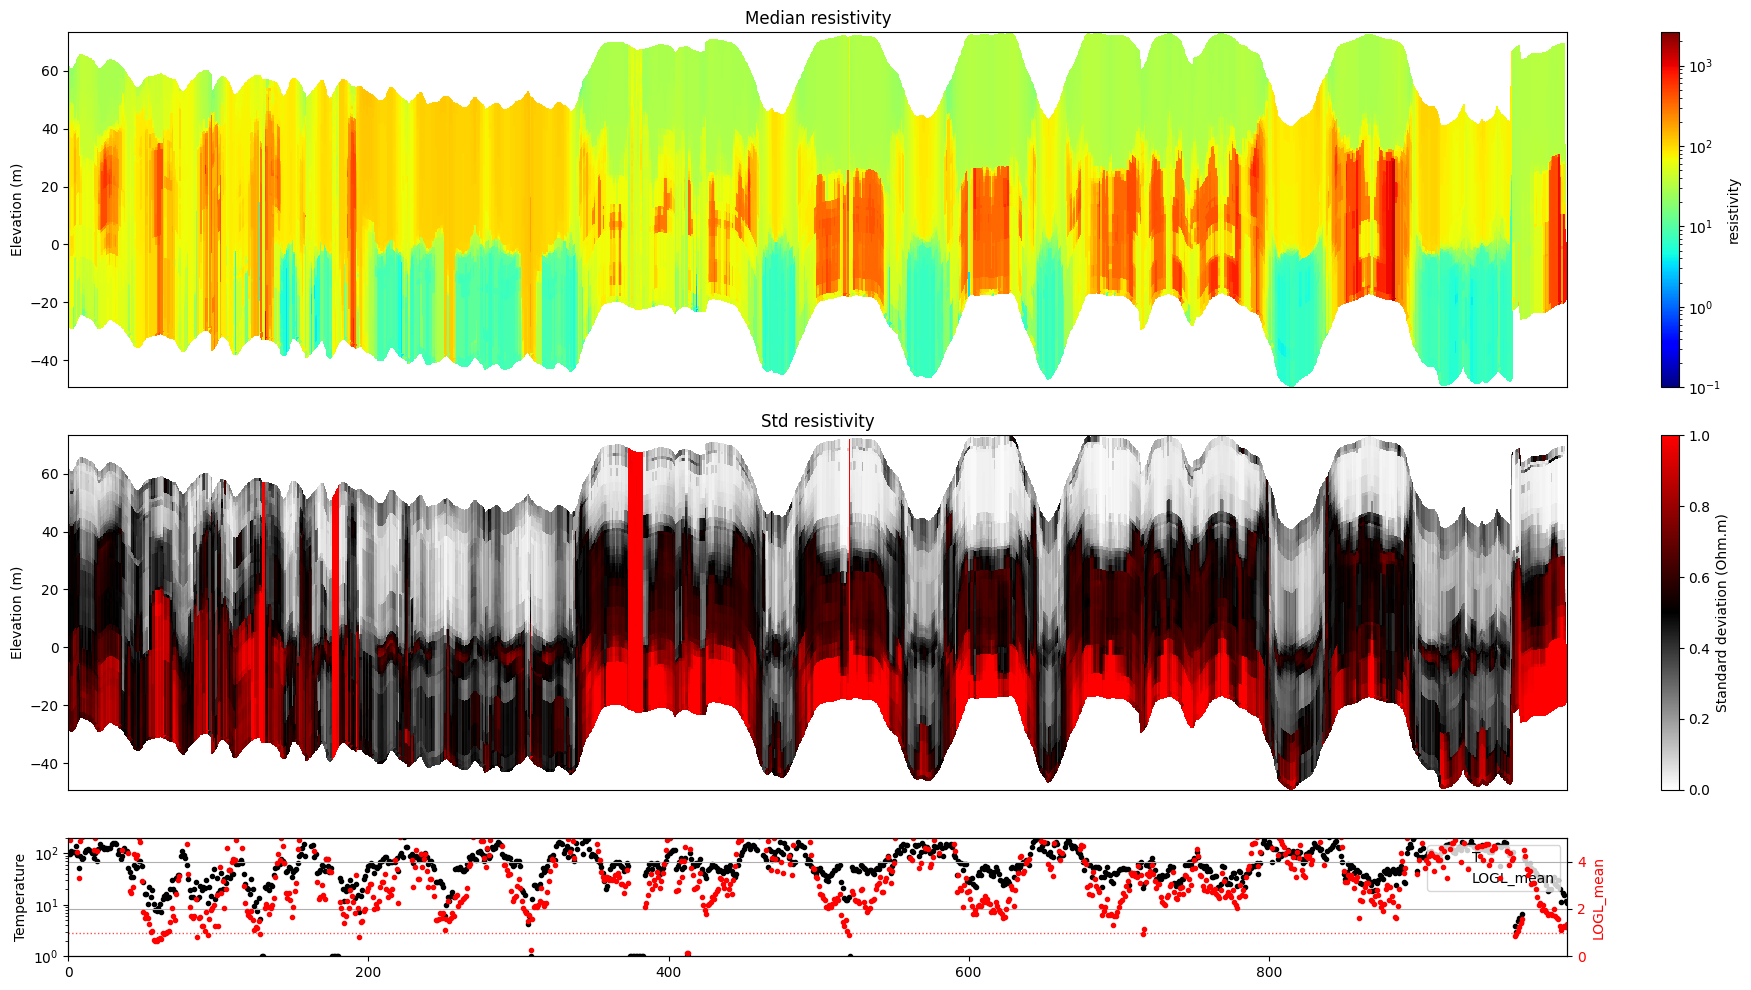

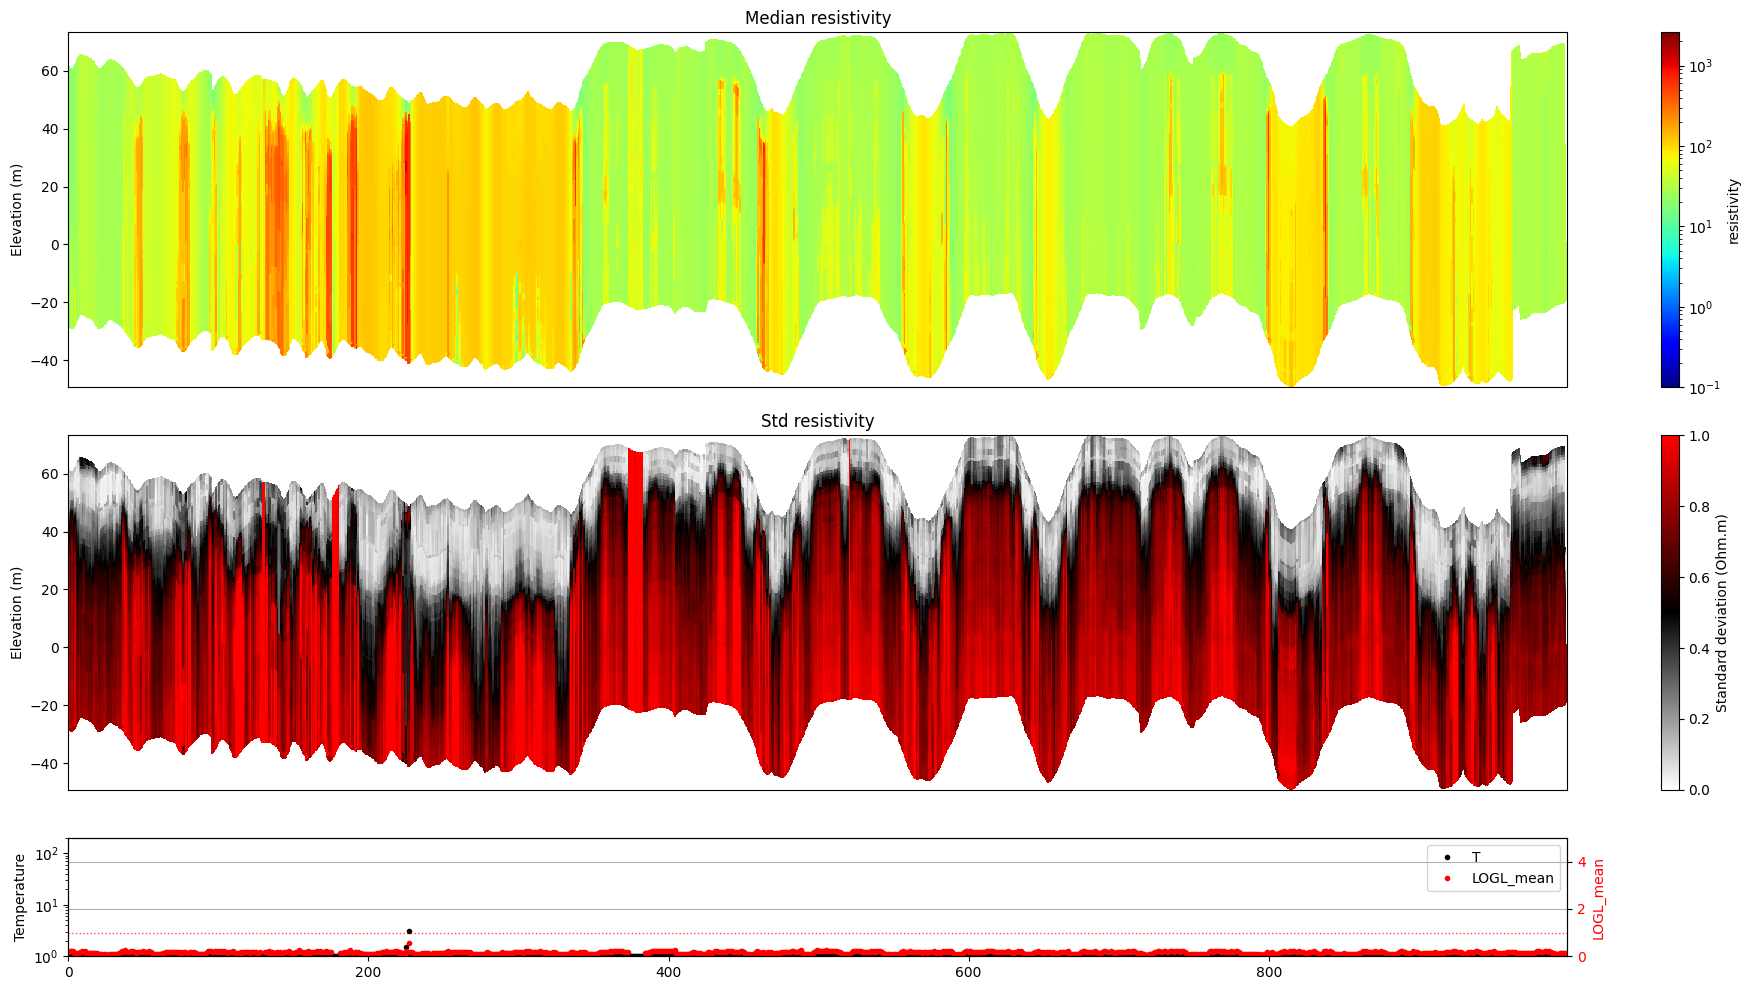

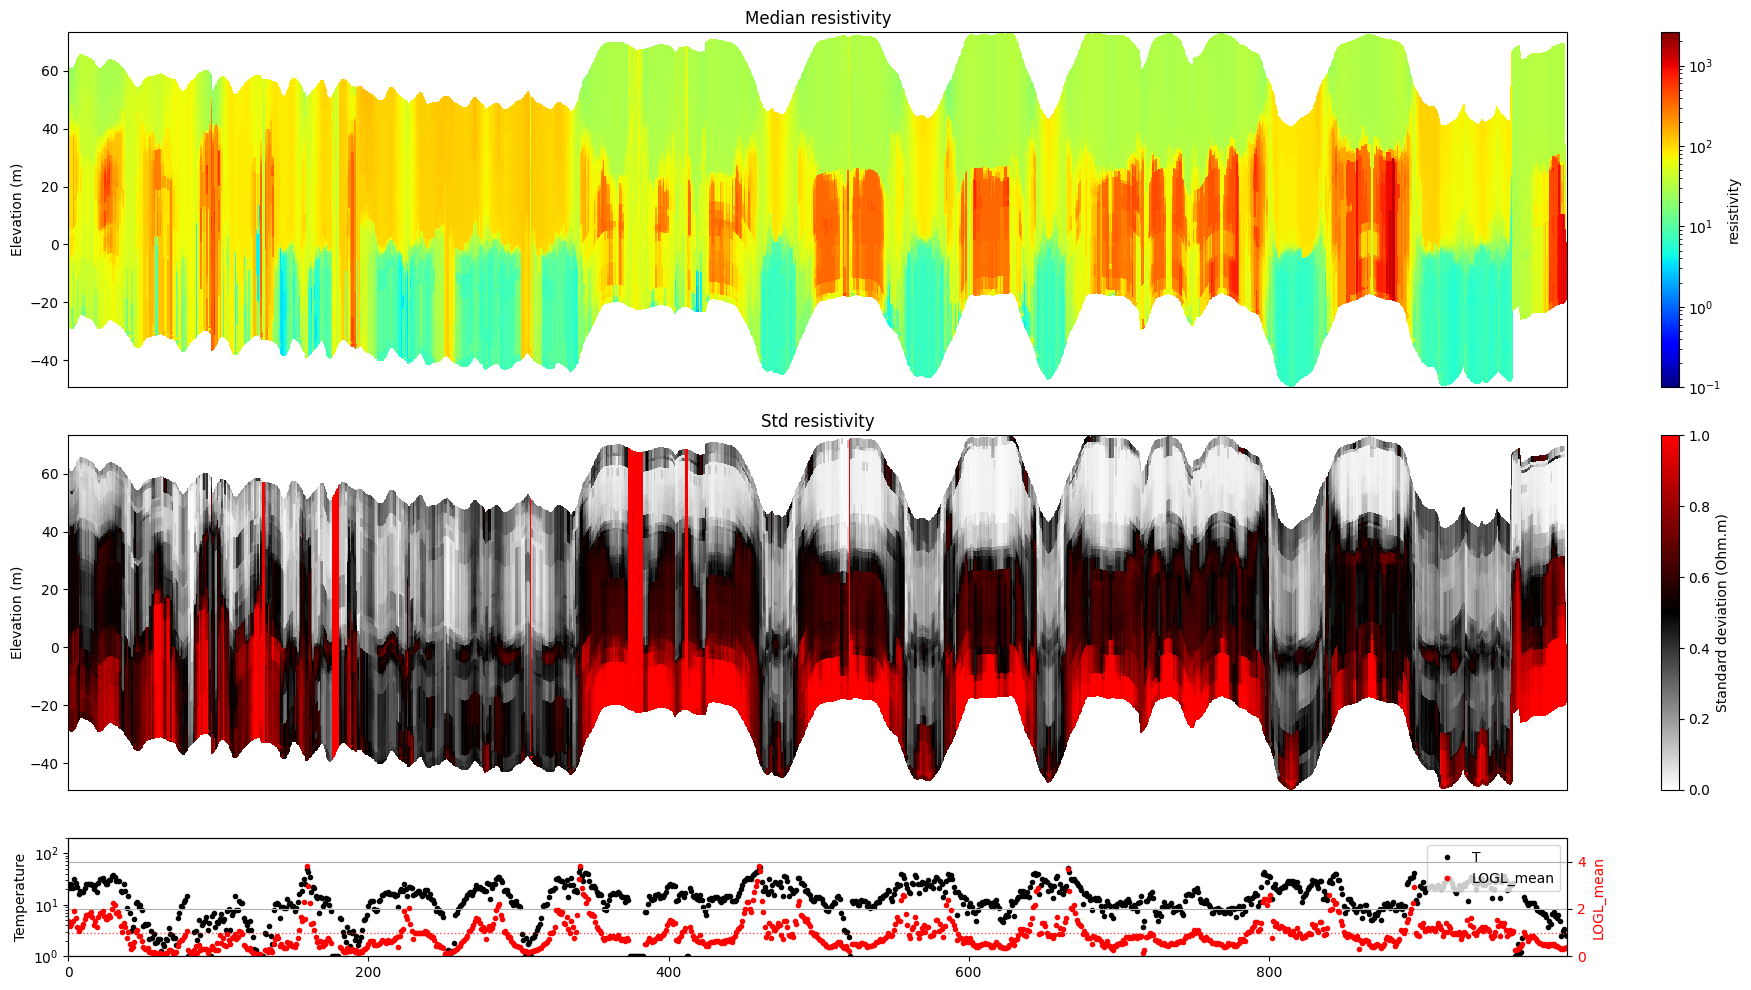

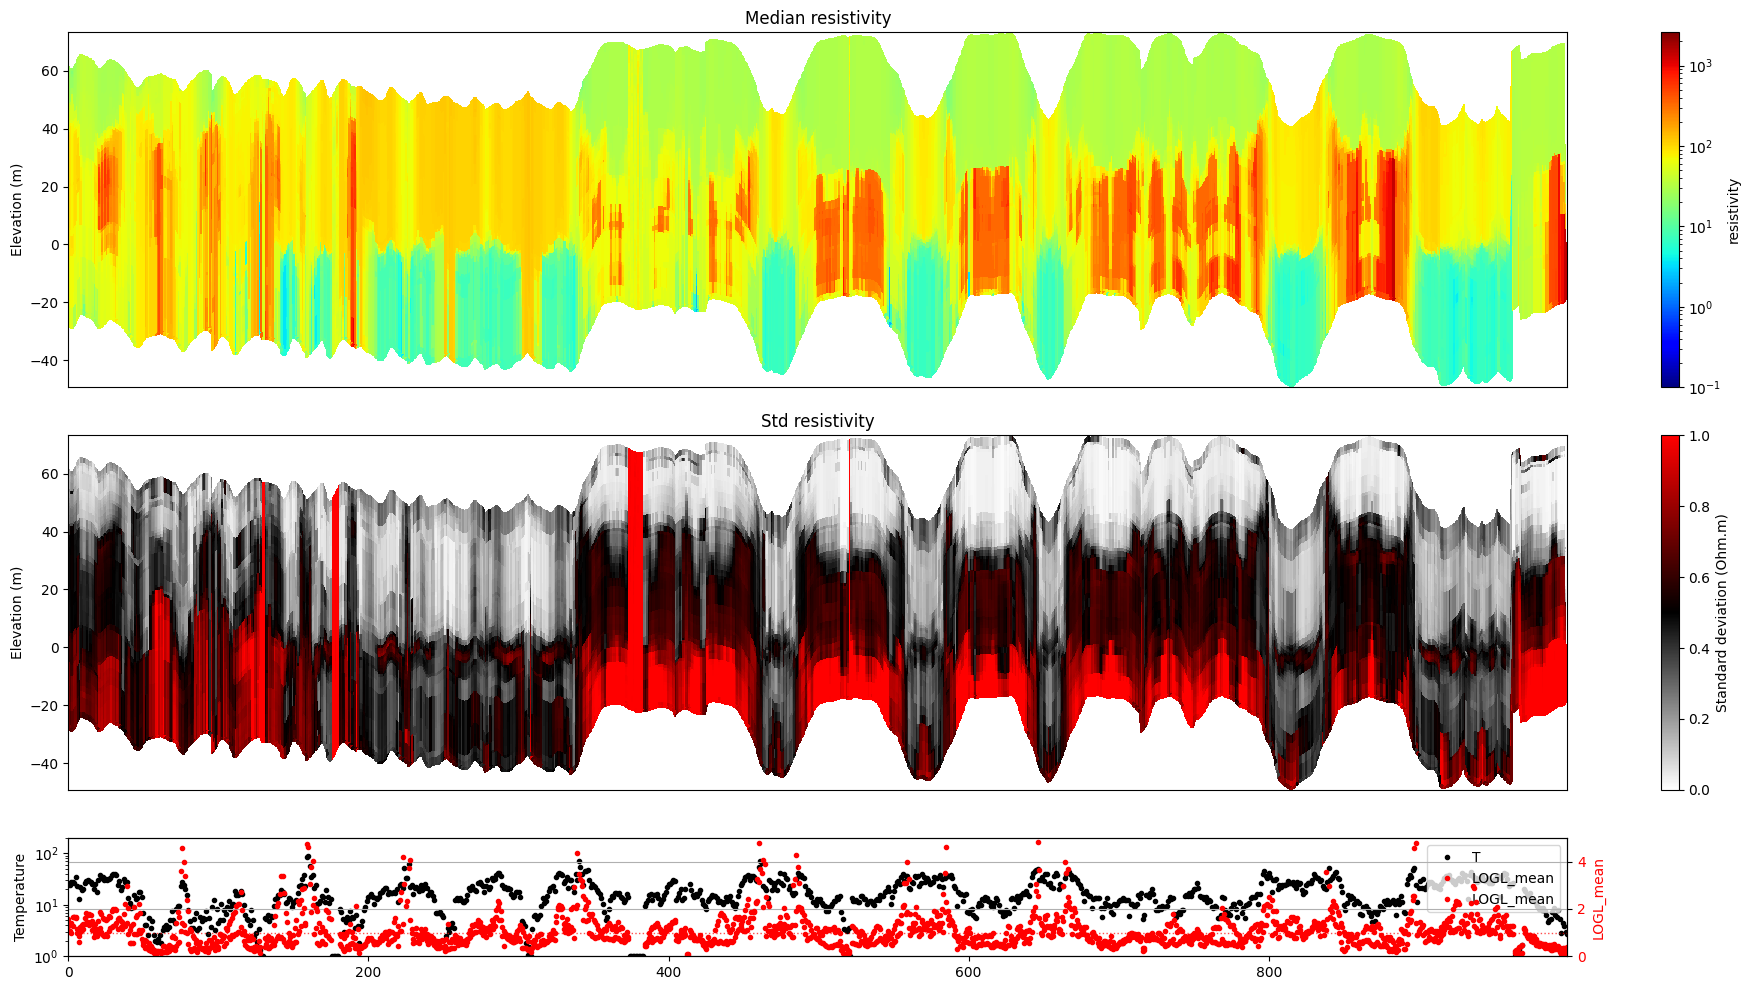

In [12]:
for f_post_h5 in f_post_arr:
    # % Plot Profiles
    ig.plot_profile(f_post_h5, i1=1000, i2=2000, im=1, hardcopy=hardcopy)

Plot size: wx=10.000000, wy=7.752841


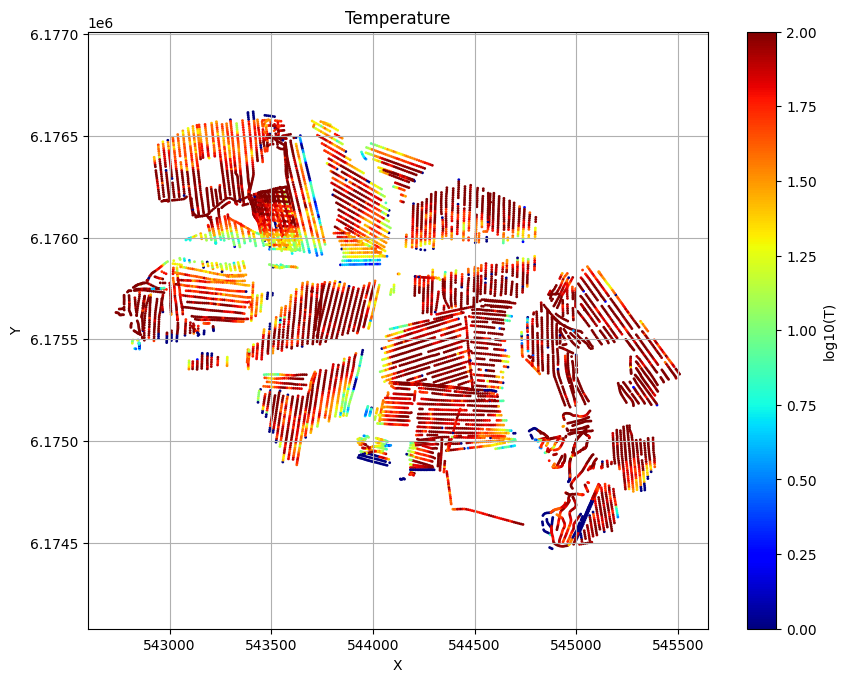

Plot size: wx=10.000000, wy=7.753924


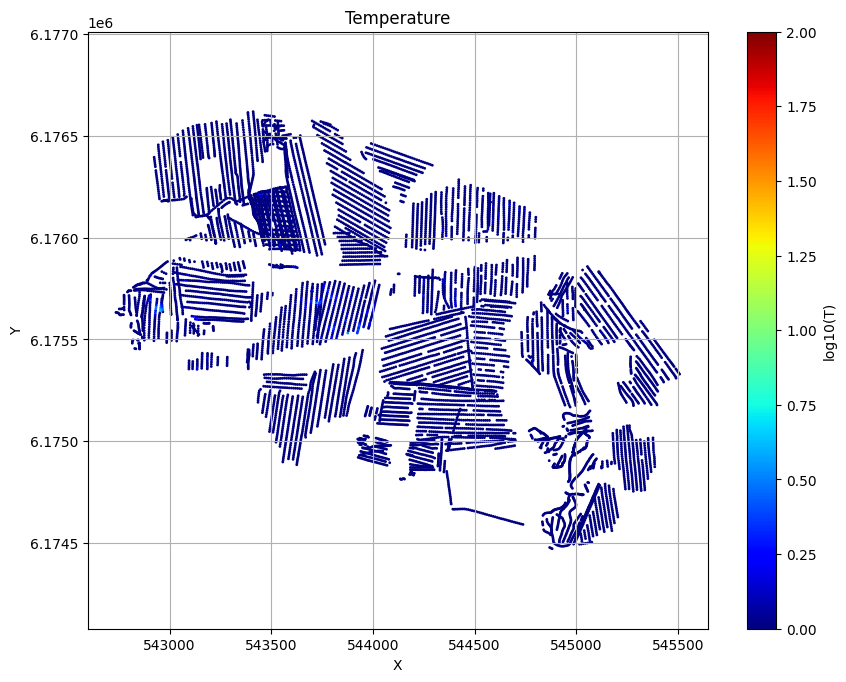

Plot size: wx=10.000000, wy=7.753924


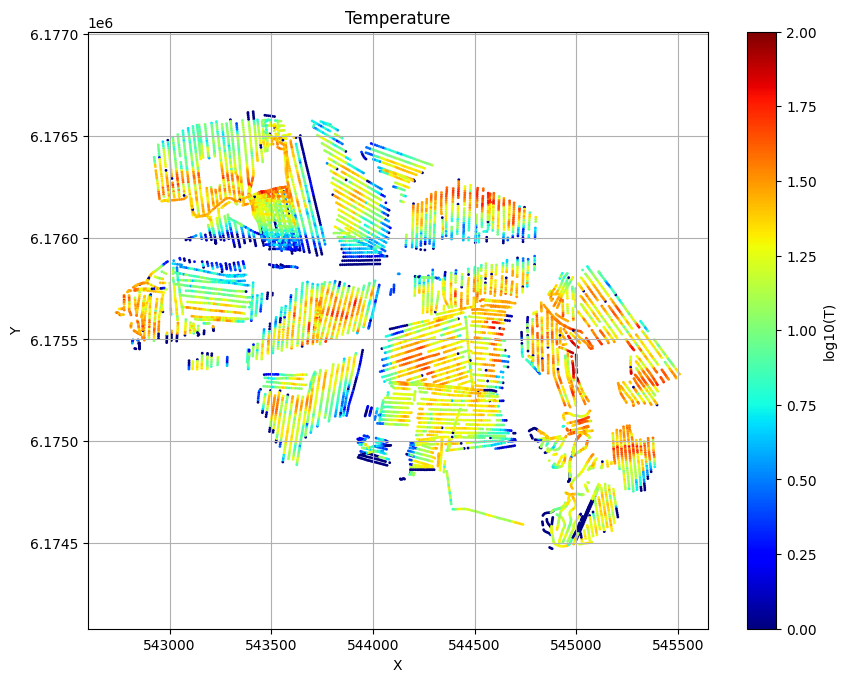

Plot size: wx=10.000000, wy=7.753924


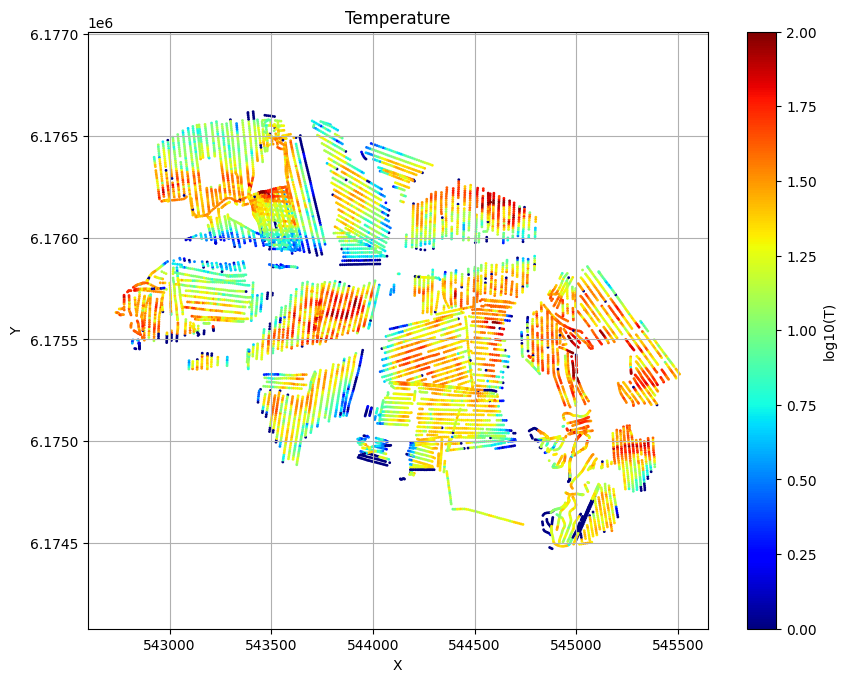

In [13]:
for f_post_h5 in f_post_arr:
    ig.plot_T_EV(f_post_h5, pl='T', hardcopy=hardcopy)
    plt.show()
    #ig.plot_T_EV(f_post_h5, pl='EV', hardcopy=hardcopy)

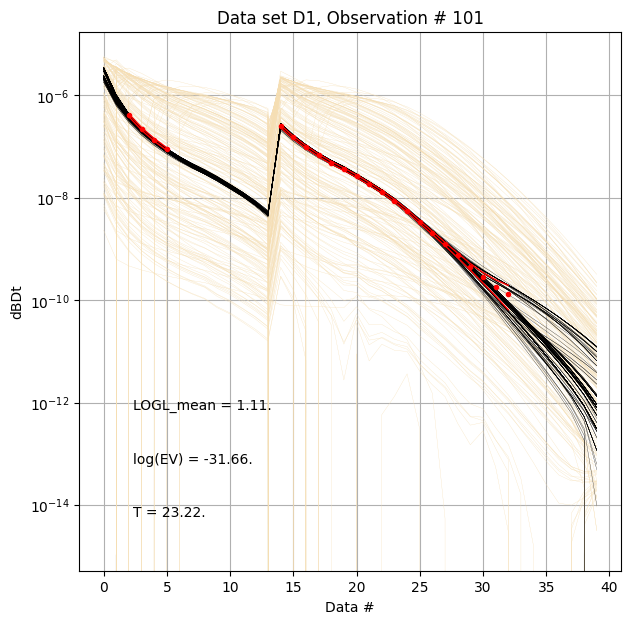

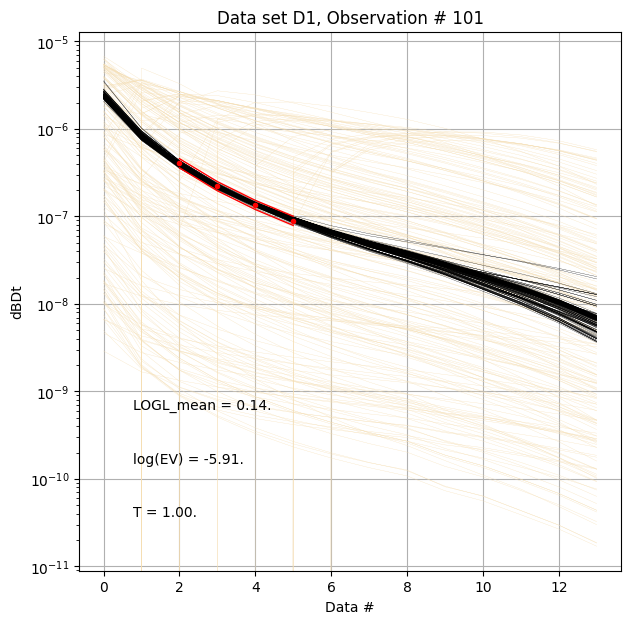

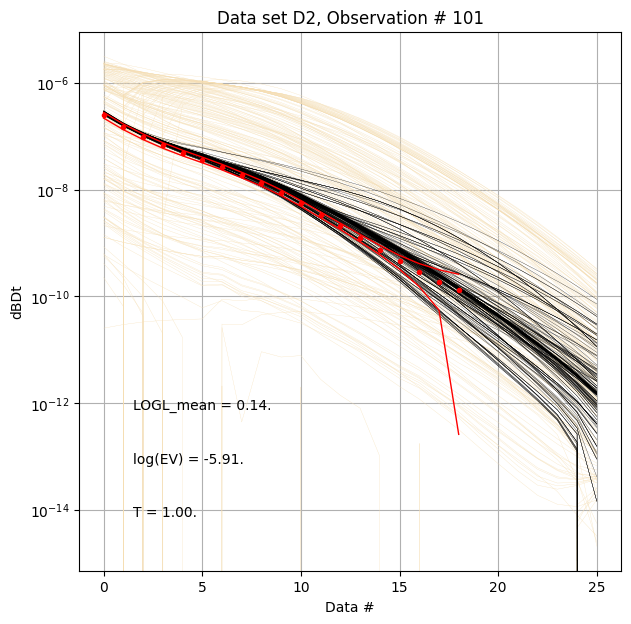

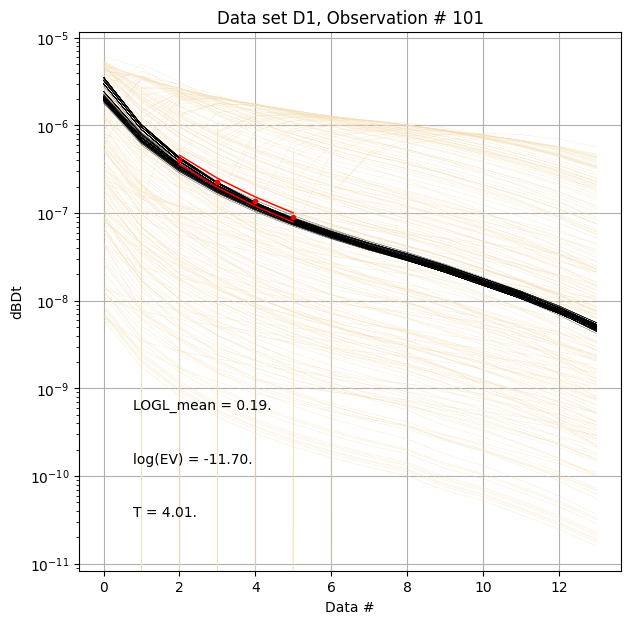

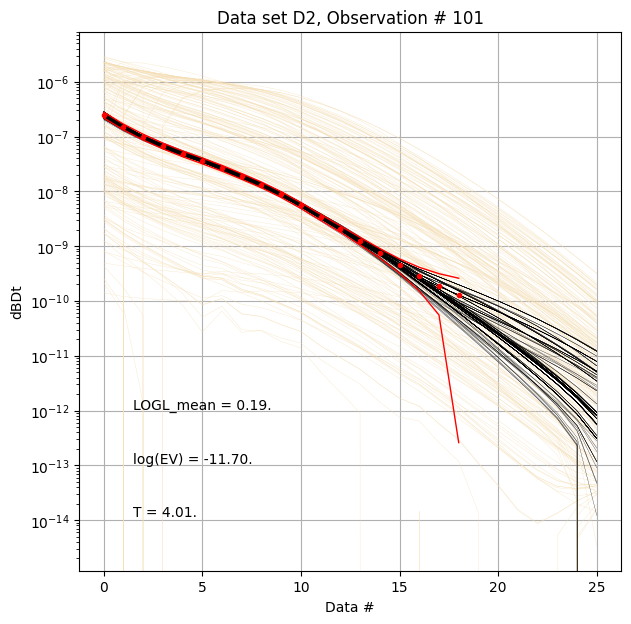

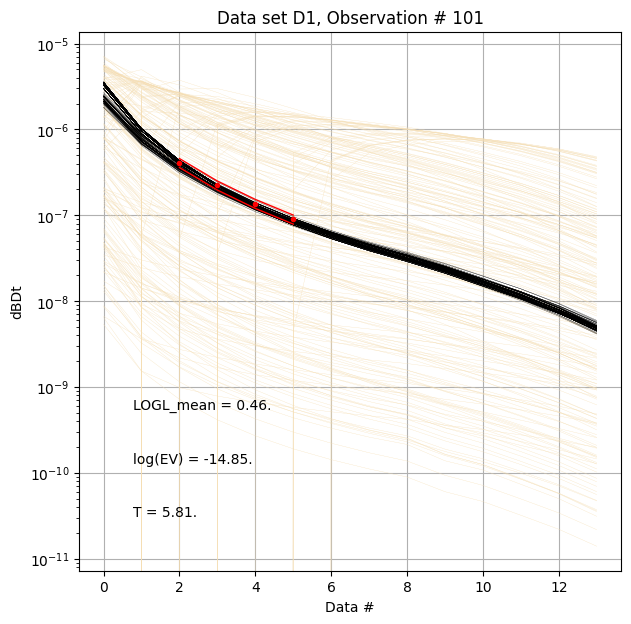

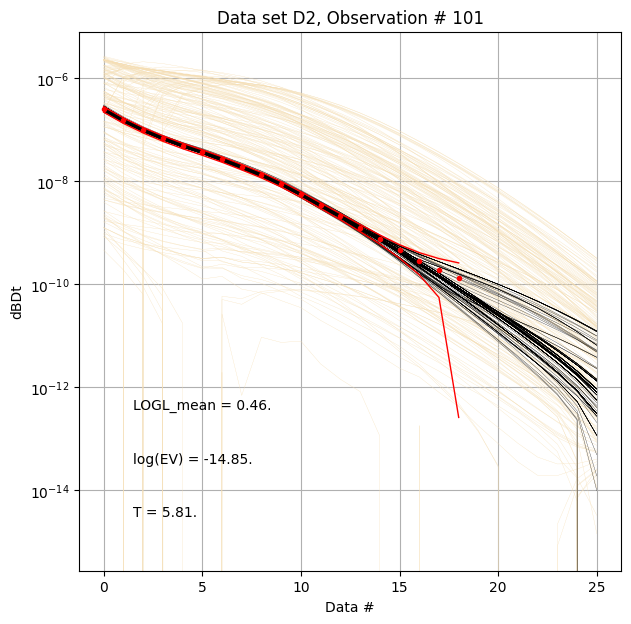

In [14]:
for f_post_h5 in f_post_arr:
    # % Plot prior, posterior, and observed  data
    ig.plot_data_prior_post(f_post_h5, i_plot=100, hardcopy=hardcopy)
    #ig.plot_data_prior_post(f_post_h5, i_plot=0, hardcopy=hardcopy)




Text(0, 0.5, 'N_UNIQUE')

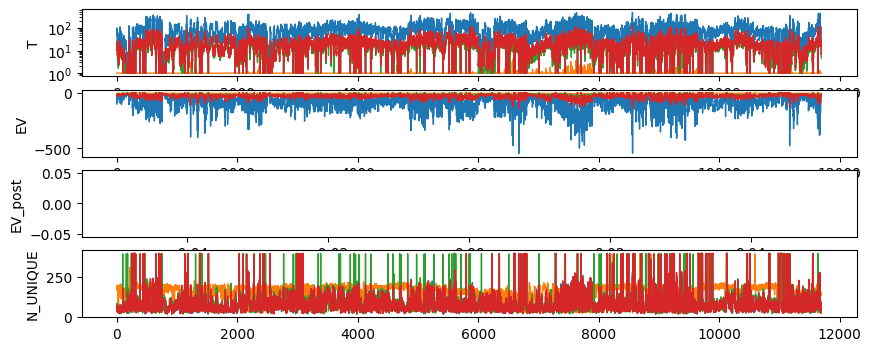

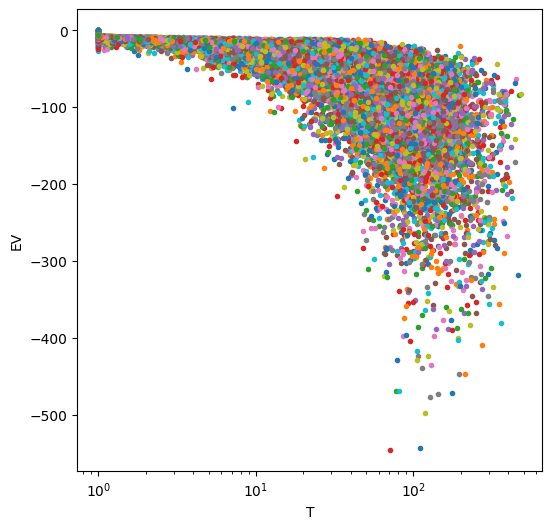

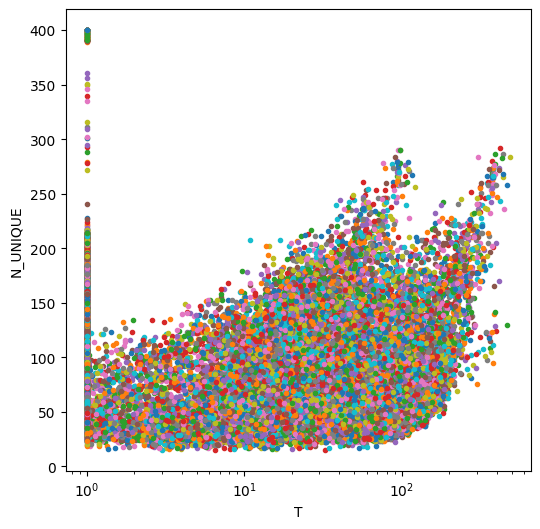

In [15]:
with h5py.File(f_data_h5, 'r') as f:    
    nobs = f['D1/d_obs'].shape[0]
    
ni=len(f_post_arr)

T = np.zeros((ni,nobs))
EV = np.zeros((ni,nobs))
EV_post = np.zeros((ni,nobs))
N_UNIQUE = np.zeros((ni,nobs))

i=-1
for f_post_h5 in f_post_arr:
    with h5py.File(f_post_h5, 'r') as f:
        i=i+1
        T[i] = f['/T'][:]
        EV[i] = f['/EV'][:]
        N_UNIQUE[i] = f['/N_UNIQUE'][:]
        EV_post[i] = f['/EV_post'][:]
    

fig, ax = plt.subplots(4,1,figsize=(10,4))
ax[0].semilogy(T.T,'-', linewidth=1)
ax[0].set_ylabel('T')
ax[1].plot(EV.T,'-', linewidth=1)
ax[1].set_ylabel('EV')
ax[2].plot(EV_post.T,'-', linewidth=1)
ax[2].set_ylabel('EV_post')
ax[3].plot(N_UNIQUE.T,'-', linewidth=1)
ax[3].set_ylabel('N_UNIQUE')

fig=plt.figure(figsize=(6,6))
plt.semilogx(T,EV,'.')
plt.xlabel('T')
plt.ylabel('EV')


fig=plt.figure(figsize=(6,6))
plt.semilogx(T,N_UNIQUE,'.')
plt.xlabel('T')
plt.ylabel('N_UNIQUE')



In [16]:
#ig.post_to_csv(f_post_h5)